In [ ]:
# Pull latest from GitHub (run when you want updates)
!cd /content/GNN-Sandia && git pull origin main

remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 3 (delta 2), reused 3 (delta 2), pack-reused 0 (from 0)
Unpacking objects: 100% (3/3), 341 bytes | 341.00 KiB/s, done.
From https://github.com/alitasavori/GNN-Sandia
 * branch            main       -> FETCH_HEAD
   36b4848..cb64bad  main       -> origin/main
Updating 36b4848..cb64bad
Fast-forward
 ieee34Mod1_with_loadshape.dss | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


## Colab setup (run this first)

**Enable GPU:** Runtime → Change runtime type → GPU

Run the cell below to clone the repo and install dependencies. This recreates the same environment as local (torch, torch-geometric, opendssdirect, pandas, numpy).

In [ ]:
# ============================================================
# COLAB SETUP — run this cell first
# Clones repo (if needed) and installs same env as local
# ============================================================
import os
import sys

# Clone repo to get all files (DSS, scripts, CSVs)
REPO_URL = "https://github.com/alitasavori/GNN-Sandia.git"
REPO_DIR = "/content/GNN-Sandia"
if not os.path.exists(REPO_DIR):
    !git clone {REPO_URL} {REPO_DIR}
os.chdir(REPO_DIR)
print(f"Working directory: {os.getcwd()}")

# Install dependencies (same as local: torch, torch-geometric, opendssdirect)
!pip install torch torch-geometric opendssdirect.py pandas numpy -q

# Verify
import torch
import opendssdirect as dss
print(f"PyTorch: {torch.__version__} | CUDA: {torch.cuda.is_available()}")
print(f"OpenDSS: OK")

Cloning into '/content/GNN-Sandia'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 20 (delta 5), reused 20 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (20/20), 679.56 KiB | 2.35 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Working directory: /content/GNN-Sandia
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.0/232.0 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 89.6 MB/s eta 0:00:00
PyTorch: 2.10.0+cu128 | CUDA: True
OpenDSS: OK


Total P (kW) = 1769.0 kW
Total Q (kVAR) = 1044.0 kVAR

20% lower:
P = 0.8 × 1769.0 = 1415.2 kW
Q = 0.8 × 1044.0 = 835.2 kVAR

100% higher (i.e., 2×):
P = 2.0 × 1769.0 = 3538.0 kW
Q = 2.0 × 1044.0 = 2088.0 kVAR


PV840 — 500 kW (50%)

PVSystem.PV840 @ Bus 840: Pmpp=500 kW (50.0%), Q≈0 kVAR | 3φ | kV=24.9 | kVA=500 | pf=1.0 | daily=IrradShape | MPPT only (Volt-VAR disabled)

PV860 — 500 kW (50%)

PVSystem.PV860 @ Bus 860: Pmpp=500 kW (50.0%), Q≈0 kVAR | 3φ | kV=24.9 | kVA=500 | pf=1.0 | daily=IrradShape | MPPT only (Volt-VAR disabled)


--------------------------------------------------

890 — 450.0 kW, 225.0 kVAR (P 25.44%, Q 21.55%)

S890 @ 890 : 450.0 (25.44%), 225.0 (21.55%) | M5 | Delta | 3φ


844 — 432.0 kW, 329.0 kVAR (P 24.42%, Q 31.51%)

S844 @ 844 : 405.0 (22.89%), 315.0 (30.17%) | M2 | Wye | 3φ
D842_844ra @ 844.1 : 4.5 (0.25%), 2.5 (0.24%) | M1 | Wye | 1φ
D844_846sb @ 844.2 : 12.5 (0.71%), 6.0 (0.57%) | M1 | Wye | 1φ
D844_846sc @ 844.3 : 10.0 (0.57%), 5.5 (0.53%) | M1 | Wye | 1φ


860 — 174.0 kW, 106.0 kVAR (P 9.84%, Q 10.15%)

S860 @ 860 : 60.0 (3.39%), 48.0 (4.60%) | M1 | Wye | 3φ
D834_860ra @ 860.1.2 : 8.0 (0.45%), 4.0 (0.38%) | M2 | Delta | 1φ
D834_860rb @ 860.2.3 : 10.0 (0.57%), 5.0 (0.48%) | M2 | Delta | 1φ
D834_860rc @ 860.3.1 : 55.0 (3.11%), 27.5 (2.63%) | M2 | Delta | 1φ
D860_836sa @ 860.1.2 : 15.0 (0.85%), 7.5 (0.72%) | M1 | Delta | 1φ
D860_836sb @ 860.2.3 : 5.0 (0.28%), 3.0 (0.29%) | M1 | Delta | 1φ
D860_836sc @ 860.3.1 : 21.0 (1.19%), 11.0 (1.05%) | M1 | Delta | 1φ


834 — 89.0 kW, 45.0 kVAR (P 5.03%, Q 4.31%)

D858_834ra @ 834.1.2 : 2.0 (0.11%), 1.0 (0.10%) | M1 | Delta | 1φ
D858_834rb @ 834.2.3 : 7.5 (0.42%), 4.0 (0.38%) | M1 | Delta | 1φ
D858_834rc @ 834.3.1 : 6.5 (0.37%), 3.5 (0.34%) | M1 | Delta | 1φ
D834_860sa @ 834.1.2 : 8.0 (0.45%), 4.0 (0.38%) | M2 | Delta | 1φ
D834_860sb @ 834.2.3 : 10.0 (0.57%), 5.0 (0.48%) | M2 | Delta | 1φ
D834_860sc @ 834.3.1 : 55.0 (3.11%), 27.5 (2.63%) | M2 | Delta | 1φ


820 — 84.5 kW, 43.5 kVAR (P 4.78%, Q 4.17%)

D818_820ra @ 820.1 : 17.0 (0.96%), 8.5 (0.81%) | M2 | Wye | 1φ
D820_822sa @ 820.1 : 67.5 (3.82%), 35.0 (3.35%) | M1 | Wye | 1φ


848 — 71.5 kW, 53.5 kVAR (P 4.04%, Q 5.12%)

S848 @ 848 : 60.0 (3.39%), 48.0 (4.60%) | M1 | Delta | 3φ
D846_848rb @ 848.2 : 11.5 (0.65%), 5.5 (0.53%) | M1 | Wye | 1φ


822 — 67.5 kW, 35.0 kVAR (P 3.82%, Q 3.35%)

D820_822ra @ 822.1 : 67.5 (3.82%), 35.0 (3.35%) | M1 | Wye | 1φ


836 — 61.0 kW, 31.5 kVAR (P 3.45%, Q 3.02%)

D860_836ra @ 836.1.2 : 15.0 (0.85%), 7.5 (0.72%) | M1 | Delta | 1φ
D860_836rb @ 836.2.3 : 5.0 (0.28%), 3.0 (0.29%) | M1 | Delta | 1φ
D860_836rc @ 836.3.1 : 21.0 (1.19%), 11.0 (1.05%) | M1 | Delta | 1φ
D836_840sa @ 836.1.2 : 9.0 (0.51%), 4.5 (0.43%) | M5 | Delta | 1φ
D836_840sb @ 836.2.3 : 11.0 (0.62%), 5.5 (0.53%) | M5 | Delta | 1φ


830 — 48.5 kW, 21.5 kVAR (P 2.74%, Q 2.06%)

S830a @ 830.1.2 : 10.0 (0.57%), 5.0 (0.48%) | M2 | Delta | 1φ
S830b @ 830.2.3 : 10.0 (0.57%), 5.0 (0.48%) | M2 | Delta | 1φ
S830c @ 830.3.1 : 25.0 (1.41%), 10.0 (0.96%) | M2 | Delta | 1φ
D828_830ra @ 830.1 : 3.5 (0.20%), 1.5 (0.14%) | M1 | Wye | 1φ


840 — 47.0 kW, 31.0 kVAR (P 2.66%, Q 2.97%)

S840 @ 840 : 27.0 (1.53%), 21.0 (2.01%) | M5 | Wye | 3φ
D836_840ra @ 840.1.2 : 9.0 (0.51%), 4.5 (0.43%) | M5 | Delta | 1φ
D836_840rb @ 840.2.3 : 11.0 (0.62%), 5.5 (0.53%) | M5 | Delta | 1φ


846 — 34.0 kW, 17.0 kVAR (P 1.92%, Q 1.63%)

D844_846rb @ 846.2 : 12.5 (0.71%), 6.0 (0.57%) | M1 | Wye | 1φ
D844_846rc @ 846.3 : 10.0 (0.57%), 5.5 (0.53%) | M1 | Wye | 1φ
D846_848sb @ 846.2 : 11.5 (0.65%), 5.5 (0.53%) | M1 | Wye | 1φ


802 — 27.5 kW, 14.5 kVAR (P 1.55%, Q 1.39%)

D802_806sb @ 802.2 : 15.0 (0.85%), 7.5 (0.72%) | M1 | Wye | 1φ
D802_806sc @ 802.3 : 12.5 (0.71%), 7.0 (0.67%) | M1 | Wye | 1φ


806 — 27.5 kW, 14.5 kVAR (P 1.55%, Q 1.39%)

D802_806rb @ 806.2 : 15.0 (0.85%), 7.5 (0.72%) | M1 | Wye | 1φ
D802_806rc @ 806.3 : 12.5 (0.71%), 7.0 (0.67%) | M1 | Wye | 1φ


858 — 24.5 kW, 12.5 kVAR (P 1.38%, Q 1.20%)

D832_858ra @ 858.1 : 3.5 (0.20%), 1.5 (0.14%) | M2 | Delta | 1φ
D832_858rb @ 858.2 : 1.0 (0.06%), 0.5 (0.05%) | M2 | Delta | 1φ
D832_858rc @ 858.3 : 3.0 (0.17%), 1.5 (0.14%) | M2 | Delta | 1φ
D858_864sb @ 858.1 : 1.0 (0.06%), 0.5 (0.05%) | M1 | Wye | 1φ
D858_834sa @ 858.1.2 : 2.0 (0.11%), 1.0 (0.10%) | M1 | Delta | 1φ
D858_834sb @ 858.2.3 : 7.5 (0.42%), 4.0 (0.38%) | M1 | Delta | 1φ
D858_834sc @ 858.3.1 : 6.5 (0.37%), 3.5 (0.34%) | M1 | Delta | 1φ


824 — 24.5 kW, 12.0 kVAR (P 1.38%, Q 1.15%)

D816_824rb @ 824.2 : 2.5 (0.14%), 1.0 (0.10%) | M5 | Delta | 1φ
D824_826sb @ 824.2 : 20.0 (1.13%), 10.0 (0.96%) | M5 | Wye | 1φ
D824_828sc @ 824.3 : 2.0 (0.11%), 1.0 (0.10%) | M1 | Wye | 1φ


826 — 20.0 kW, 10.0 kVAR (P 1.13%, Q 0.96%)

D824_826rb @ 826.2 : 20.0 (1.13%), 10.0 (0.96%) | M5 | Wye | 1φ


818 — 17.0 kW, 8.5 kVAR (P 0.96%, Q 0.81%)

D818_820sa @ 818.1 : 17.0 (0.96%), 8.5 (0.81%) | M2 | Wye | 1φ


838 — 14.0 kW, 7.0 kVAR (P 0.79%, Q 0.67%)

D862_838rb @ 838.2 : 14.0 (0.79%), 7.0 (0.67%) | M1 | Wye | 1φ


862 — 14.0 kW, 7.0 kVAR (P 0.79%, Q 0.67%)

D862_838sb @ 862.2 : 14.0 (0.79%), 7.0 (0.67%) | M1 | Wye | 1φ


810 — 8.0 kW, 4.0 kVAR (P 0.45%, Q 0.38%)

D808_810rb @ 810.2 : 8.0 (0.45%), 4.0 (0.38%) | M4 | Wye | 1φ


808 — 8.0 kW, 4.0 kVAR (P 0.45%, Q 0.38%)

D808_810sb @ 808.2 : 8.0 (0.45%), 4.0 (0.38%) | M4 | Wye | 1φ


832 — 7.5 kW, 3.5 kVAR (P 0.42%, Q 0.34%)

D832_858sa @ 832.1 : 3.5 (0.20%), 1.5 (0.14%) | M2 | Delta | 1φ
D832_858sb @ 832.2 : 1.0 (0.06%), 0.5 (0.05%) | M2 | Delta | 1φ
D832_858sc @ 832.3 : 3.0 (0.17%), 1.5 (0.14%) | M2 | Delta | 1φ


828 — 5.5 kW, 2.5 kVAR (P 0.31%, Q 0.24%)

D824_828rc @ 828.3 : 2.0 (0.11%), 1.0 (0.10%) | M1 | Wye | 1φ
D828_830sa @ 828.1 : 3.5 (0.20%), 1.5 (0.14%) | M1 | Wye | 1φ


842 — 4.5 kW, 2.5 kVAR (P 0.25%, Q 0.24%)

D842_844sa @ 842.1 : 4.5 (0.25%), 2.5 (0.24%) | M1 | Wye | 1φ


816 — 2.5 kW, 1.0 kVAR (P 0.14%, Q 0.10%)

D816_824sb @ 816.2 : 2.5 (0.14%), 1.0 (0.10%) | M5 | Delta | 1φ


854 — 2.0 kW, 1.0 kVAR (P 0.11%, Q 0.10%)

D854_856sb @ 854.2 : 2.0 (0.11%), 1.0 (0.10%) | M1 | Wye | 1φ


856 — 2.0 kW, 1.0 kVAR (P 0.11%, Q 0.10%)

D854_856rb @ 856.2 : 2.0 (0.11%), 1.0 (0.10%) | M1 | Wye | 1φ


864 — 1.0 kW, 0.5 kVAR (P 0.06%, Q 0.05%)

D858_864rb @ 864.1 : 1.0 (0.06%), 0.5 (0.05%) | M1 | Wye | 1φ


dataset generation


## What this code does, step by step (concise)

### 1) Reads your OpenDSS model once

* `compile_once()` clears OpenDSS state and compiles `ieee34Mod1_with_loadshape.dss`.
* `setup_daily()` sets OpenDSS to daily mode with 5-minute step size (288 points/day).
* `set_time_index(t)` moves OpenDSS solution time to the desired 5-minute index.

Why: you want repeated solves at specific time-of-day indices.

---

### 2) Finds the profile CSVs used by DSS

* `find_loadshape_csv_in_dss(...)` searches your DSS file for:

  * `New Loadshape.<loadshape_name> ... csvfile=...`
  * and similarly for the irradiance shape (PV profile).
* `resolve_csv_path(...)` converts the CSV path into an absolute path.

Why: the code needs the **exact time-series multipliers** that OpenDSS uses.

---

### 3) Loads the daily profiles into arrays

* `read_profile_csv_two_col_noheader(...)` reads a 2-column CSV (`time,value`) with no header.
* It returns a vector of length 288 (`mL` for load multiplier, `mPV` for PV multiplier).

Why: at any selected time `t`, your total load/PV is scaled by `mL[t]` and `mPV[t]`.

---

### 4) Builds the **bus-phase node list**

* `get_all_bus_phase_nodes()` grabs OpenDSS node names (like `"844.1"`) and keeps only phases 1–3.
* It builds:

  * `node_names` (sorted list of `"bus.phase"`)
  * maps: `node_to_bus`, `node_to_phase`
  * `bus_to_phases` (which phases exist at each bus)

Why: your GNN nodes are **bus-phases**, not buses.

---

### 5) Extracts **static phase edges** once and saves them

* `extract_static_phase_edges_to_csv()` iterates over **Lines** and **Transformers** (including regulators).
* **Lines**: For each line, creates one edge per phase between `from_bus.phase → to_bus.phase`. Uses the **diagonal** of the linecode R/X/C matrices (diagonal[i] → phase i+1). Multiplies per-length values by length to get R_full, X_full, C_full.
* **Transformers & regulators**: OpenDSS uses %R and XHL (percent), not matrices. We convert to ohms: `R_ohms = (%R/100)×(kV²/kVA)`, `X_ohms = (XHL/100)×(kV²/kVA)`, C=0. Same R/X used for all phases of a 3φ transformer; 1φ regulators get one edge per phase.
* All edges are **bidirectional** (both a→b and b→a).
* Saves to `gnn_edges_phase_static.csv`.

Why: your GNN edges are **bus-phase to bus-phase**, with **R_full, X_full, C_full** in comparable units (ohms).

---

### 6) Creates one “scenario” by sampling aggregate totals and noise levels

Inside `generate_gnn_snapshot_dataset_busphase()` for each scenario:

* `sample_scenario_from_baseline(...)` samples:

  * `P_load_total_kw`, `Q_load_total_kvar`, `P_pv_total_kw`
  * and noise levels `sigma_load`, `sigma_pv`
* It scales baseline values by random factors within your `RANGES`.
* It “clips” sigma to `[0, 0.5]` so noise can’t get absurd.

Why: each scenario is a different “day” of aggregate loading/PV and variability.

---

### 7) Selects timestamps using **3 profiles** (load, pv, net) with anchors + equal-pop bins

For the scenario:

* It builds three time profiles:

  * load profile: `mL`
  * pv profile: `mPV`
  * net proxy profile: `P_load*mL - P_pv*mPV`
* It splits `k_snapshots_per_scenario_total` into ~1/3 per profile.
* For each profile it selects times using:

  * **anchors** (min time index + max time index)
  * **equal-population bins** (rank-based bins, same count of time indices per bin)
  * samples a roughly equal number of times per bin
* Then it unions the times from all three selections.
* If union has too many times, it downsamples but tries to keep anchors.
* If union has too few times, it fills with random remaining times.

Why:

* anchors guarantee extreme operating points appear,
* equal-pop bins prevent bins with few time indices from being impossible to sample from,
* using 3 profiles ensures coverage of “load-high”, “pv-high”, and “net-stress” regions.

---

### 8) For each selected timestamp, it builds device setpoints then perturbs at device level

For each time `t`:

* `apply_snapshot_timeconditioned(...)` does:

  1. Computes time-conditioned totals using `mL[t]`, `mPV[t]`
  2. Allocates bus totals using `BUS_P_SHARE` and `BUS_Q_SHARE`
  3. Splits bus totals across phases (uniform across phases that have devices; fallback uniform across phases at bus)
  4. Allocates each bus-phase total to **individual load devices** using *fixed base composition fractions*
  5. Applies **random multiplicative noise** per device based on `sigma_load`
  6. Writes the perturbed `kW`, `kvar` into OpenDSS load objects
  7. Sets PV `Pmpp` based on PV share, applies noise based on `sigma_pv`, writes to OpenDSS PV objects
  8. Aggregates back into **bus-phase totals** (this is what you store as node features)

Why:

* You perturb at device level to preserve realistic device heterogeneity,
* but you store bus-phase totals for GNN features.

---

### 9) Solves OpenDSS power flow and stores bus-phase voltage targets

* `dss.Solution.Solve()`
* `get_all_node_voltage_pu_and_angle_filtered(...)` reads `vmag_pu` and `vang_deg` for every bus-phase node.

Why: these are your supervised learning targets.

---

## Outputs: what files are produced and their formats

The code writes **three files** into:
`gnn_samples_out/`

### 1) `gnn_edges_phase_static.npz`

Static graph (same for all samples). Contents include:

* `node_names`: array of strings like `"844.1"`, `"844.2"`, …
* `edge_u`, `edge_v`: integer indices into `node_names`
* `edge_from`, `edge_to`: string node IDs `"bus.phase"`
* `edge_line`: string like `"Line.XXX"` (OpenDSS line name)
* `edge_phase`: 1,2,3
* `edge_length`: line length in your OpenDSS units
* `R_full`, `X_full`, `C_full`: **full-length** diagonal values (per edge)

How you use it:

* build your GNN adjacency from `(edge_u, edge_v)`
* edge features are `[R_full, X_full, C_full]` (optionally include length too)

---

### 2) `gnn_sample_meta.csv`

One row per sample (sample = scenario + time index). Columns:

* Identifiers:

  * `sample_id`, `scenario_id`, `t_index`, `t_minutes`

* Scenario-level parameters:

  * `P_load_total_kw`, `Q_load_total_kvar`, `P_pv_total_kw`
  * `sigma_load`, `sigma_pv`

* Time multipliers:

  * `m_loadshape`, `m_irradshape`

* Time-conditioned totals:

  * `P_load_time_kw`, `Q_load_time_kvar`, `P_pv_time_kw`

* Realized totals after device noise:

  * `p_load_kw_set_total`, `q_load_kvar_set_total`, `p_pv_pmpp_kw_set_total`

* Profile values at that timestamp (for debugging/analysis):

  * `prof_load`, `prof_pv`, `prof_net`

This file is your “index”: it tells you which samples exist and what conditions generated them.

---

### 3) `gnn_node_features_and_targets.csv`

This is the main dataset table. **One row per (sample_id, bus-phase node).**

Columns:

* `sample_id`
* `node` (string `"bus.phase"`)
* `bus` (string `"844"`)
* `phase` (1–3)

Node input features (what you feed to GNN):

* `p_load_kw`
* `q_load_kvar`
* `p_pv_kw`
* `q_pv_kvar` (likely zero if Volt-VAR disabled)

Targets (what you predict):

* `vmag_pu`
* `vang_deg`

So if you have:

* `S` samples and `N` bus-phase nodes,
  you’ll have `S * N` rows in this file.

---

In [ ]:
import os
import re
import numpy as np
import pandas as pd
import opendssdirect as dss

# ============================================================
# CONFIG
# ============================================================
DSS_FILE = "ieee34Mod1_with_loadshape.dss"
NPTS = 288
STEP_MIN = 5

# IMPORTANT: update this list to match your feeder voltage levels if different.
# This is a "safe default" for IEEE-34 style models.
VOLTAGE_BASES_KV = [69.0, 24.9, 4.16, 0.48]

# Voltage sanity bounds to filter bad targets (non-converged / bad base / etc.)
VMAG_PU_MIN = 0.50
VMAG_PU_MAX = 1.50

BASELINE = dict(
    P_load_total_kw=1415.2,
    Q_load_total_kvar=835.2,
    P_pv_total_kw=1000.0,
    sigma_load=0.05,
    sigma_pv=0.05,
)

RANGES = dict(
    P_load_total_kw=(0.8, 1.2),
    Q_load_total_kvar=(0.8, 1.2),
    P_pv_total_kw=(0.6, 1.2),
    sigma_load=(0.5, 1.5),
    sigma_pv=(0.5, 1.5),
)

# ============================================================
# NEW: DEVICE-LEVEL P/Q SHARES (fractions of total system load)
# NEW: DEVICE->BUS-PHASE mapping weights (fractions of device contribution)
# NEW: PV shares and PV mapping
# ============================================================

DEVICE_P_SHARE = {
    "S890": 0.2544,
    "S844": 0.2289, "D842_844ra": 0.0025, "D844_846sb": 0.0071, "D844_846sc": 0.0057,
    "S860": 0.0339, "D834_860ra": 0.0045, "D834_860rb": 0.0057, "D834_860rc": 0.0311,
    "D860_836sa": 0.0085, "D860_836sb": 0.0028, "D860_836sc": 0.0119,

    "D858_834ra": 0.0011, "D858_834rb": 0.0042, "D858_834rc": 0.0037,
    "D834_860sa": 0.0045, "D834_860sb": 0.0057, "D834_860sc": 0.0311,

    "D818_820ra": 0.0096, "D820_822sa": 0.0382,

    "S848": 0.0339, "D846_848rb": 0.0065,

    "D820_822ra": 0.0382,

    "D860_836ra": 0.0085, "D860_836rb": 0.0028, "D860_836rc": 0.0119,
    "D836_840sa": 0.0051, "D836_840sb": 0.0062,

    "S830a": 0.0057, "S830b": 0.0057, "S830c": 0.0141, "D828_830ra": 0.0020,

    "S840": 0.0153, "D836_840ra": 0.0051, "D836_840rb": 0.0062,

    "D844_846rb": 0.0071, "D844_846rc": 0.0057, "D846_848sb": 0.0065,

    "D802_806sb": 0.0085, "D802_806sc": 0.0071,
    "D802_806rb": 0.0085, "D802_806rc": 0.0071,

    "D832_858ra": 0.0020, "D832_858rb": 0.0006, "D832_858rc": 0.0017,
    "D858_864sb": 0.0006,
    "D858_834sa": 0.0011, "D858_834sb": 0.0042, "D858_834sc": 0.0037,

    "D816_824rb": 0.0014, "D824_826sb": 0.0113, "D824_828sc": 0.0011,
    "D824_826rb": 0.0113,

    "D818_820sa": 0.0096,

    "D862_838rb": 0.0079,
    "D862_838sb": 0.0079,

    "D808_810rb": 0.0045,
    "D808_810sb": 0.0045,

    "D832_858sa": 0.0020, "D832_858sb": 0.0006, "D832_858sc": 0.0017,

    "D824_828rc": 0.0011, "D828_830sa": 0.0020,

    "D842_844sa": 0.0025,

    "D816_824sb": 0.0014,

    "D854_856sb": 0.0011, "D854_856rb": 0.0011,

    "D858_864rb": 0.0006,
}

DEVICE_Q_SHARE = {
    "S890": 0.2155,
    "S844": 0.3017, "D842_844ra": 0.0024, "D844_846sb": 0.0057, "D844_846sc": 0.0053,
    "S860": 0.0460, "D834_860ra": 0.0038, "D834_860rb": 0.0048, "D834_860rc": 0.0263,
    "D860_836sa": 0.0072, "D860_836sb": 0.0029, "D860_836sc": 0.0105,

    "D858_834ra": 0.0010, "D858_834rb": 0.0038, "D858_834rc": 0.0034,
    "D834_860sa": 0.0038, "D834_860sb": 0.0048, "D834_860sc": 0.0263,

    "D818_820ra": 0.0081, "D820_822sa": 0.0335,

    "S848": 0.0460, "D846_848rb": 0.0053,

    "D820_822ra": 0.0335,

    "D860_836ra": 0.0072, "D860_836rb": 0.0029, "D860_836rc": 0.0105,
    "D836_840sa": 0.0043, "D836_840sb": 0.0053,

    "S830a": 0.0048, "S830b": 0.0048, "S830c": 0.0096, "D828_830ra": 0.0014,

    "S840": 0.0201, "D836_840ra": 0.0043, "D836_840rb": 0.0053,

    "D844_846rb": 0.0057, "D844_846rc": 0.0053, "D846_848sb": 0.0053,

    "D802_806sb": 0.0072, "D802_806sc": 0.0067,
    "D802_806rb": 0.0072, "D802_806rc": 0.0067,

    "D832_858ra": 0.0014, "D832_858rb": 0.0005, "D832_858rc": 0.0014,
    "D858_864sb": 0.0005,
    "D858_834sa": 0.0010, "D858_834sb": 0.0038, "D858_834sc": 0.0034,

    "D816_824rb": 0.0010, "D824_826sb": 0.0096, "D824_828sc": 0.0010,
    "D824_826rb": 0.0096,

    "D818_820sa": 0.0081,

    "D862_838rb": 0.0067,
    "D862_838sb": 0.0067,

    "D808_810rb": 0.0038,
    "D808_810sb": 0.0038,

    "D832_858sa": 0.0014, "D832_858sb": 0.0005, "D832_858sc": 0.0014,

    "D824_828rc": 0.0010, "D828_830sa": 0.0014,

    "D842_844sa": 0.0024,

    "D816_824sb": 0.0010,

    "D854_856sb": 0.0010, "D854_856rb": 0.0010,

    "D858_864rb": 0.0005,
}

# device -> list of (bus, phase, weight)
DEVICE_TO_BUSPH = {
    # 3φ
    "S890": [("890", 1, 1/3), ("890", 2, 1/3), ("890", 3, 1/3)],
    "S844": [("844", 1, 1/3), ("844", 2, 1/3), ("844", 3, 1/3)],
    "S860": [("860", 1, 1/3), ("860", 2, 1/3), ("860", 3, 1/3)],
    "S848": [("848", 1, 1/3), ("848", 2, 1/3), ("848", 3, 1/3)],
    "S840": [("840", 1, 1/3), ("840", 2, 1/3), ("840", 3, 1/3)],

    # Wye 1φ
    "D842_844ra": [("844", 1, 1.0)],
    "D844_846sb": [("844", 2, 1.0)],
    "D844_846sc": [("844", 3, 1.0)],
    "D818_820ra": [("820", 1, 1.0)],
    "D820_822sa": [("820", 1, 1.0)],
    "D846_848rb": [("848", 2, 1.0)],
    "D820_822ra": [("822", 1, 1.0)],
    "D828_830ra": [("830", 1, 1.0)],
    "D844_846rb": [("846", 2, 1.0)],
    "D844_846rc": [("846", 3, 1.0)],
    "D846_848sb": [("846", 2, 1.0)],
    "D802_806sb": [("802", 2, 1.0)],
    "D802_806sc": [("802", 3, 1.0)],
    "D802_806rb": [("806", 2, 1.0)],
    "D802_806rc": [("806", 3, 1.0)],
    "D832_858ra": [("858", 1, 1.0)],
    "D832_858rb": [("858", 2, 1.0)],
    "D832_858rc": [("858", 3, 1.0)],
    "D858_864sb": [("858", 1, 1.0)],
    "D816_824rb": [("824", 2, 1.0)],
    "D824_826sb": [("824", 2, 1.0)],
    "D824_828sc": [("824", 3, 1.0)],
    "D824_826rb": [("826", 2, 1.0)],
    "D818_820sa": [("818", 1, 1.0)],
    "D862_838rb": [("838", 2, 1.0)],
    "D862_838sb": [("862", 2, 1.0)],
    "D808_810rb": [("810", 2, 1.0)],
    "D808_810sb": [("808", 2, 1.0)],
    "D832_858sa": [("832", 1, 1.0)],
    "D832_858sb": [("832", 2, 1.0)],
    "D832_858sc": [("832", 3, 1.0)],
    "D824_828rc": [("828", 3, 1.0)],
    "D828_830sa": [("828", 1, 1.0)],
    "D842_844sa": [("842", 1, 1.0)],
    "D816_824sb": [("816", 2, 1.0)],
    "D854_856sb": [("854", 2, 1.0)],
    "D854_856rb": [("856", 2, 1.0)],
    "D858_864rb": [("864", 1, 1.0)],

    # Delta 1φ (line-to-line -> split)
    "D834_860ra": [("860", 1, 0.5), ("860", 2, 0.5)],
    "D834_860rb": [("860", 2, 0.5), ("860", 3, 0.5)],
    "D834_860rc": [("860", 3, 0.5), ("860", 1, 0.5)],
    "D860_836sa": [("860", 1, 0.5), ("860", 2, 0.5)],
    "D860_836sb": [("860", 2, 0.5), ("860", 3, 0.5)],
    "D860_836sc": [("860", 3, 0.5), ("860", 1, 0.5)],

    "D858_834ra": [("834", 1, 0.5), ("834", 2, 0.5)],
    "D858_834rb": [("834", 2, 0.5), ("834", 3, 0.5)],
    "D858_834rc": [("834", 3, 0.5), ("834", 1, 0.5)],
    "D834_860sa": [("834", 1, 0.5), ("834", 2, 0.5)],
    "D834_860sb": [("834", 2, 0.5), ("834", 3, 0.5)],
    "D834_860sc": [("834", 3, 0.5), ("834", 1, 0.5)],

    "D860_836ra": [("836", 1, 0.5), ("836", 2, 0.5)],
    "D860_836rb": [("836", 2, 0.5), ("836", 3, 0.5)],
    "D860_836rc": [("836", 3, 0.5), ("836", 1, 0.5)],
    "D836_840sa": [("836", 1, 0.5), ("836", 2, 0.5)],
    "D836_840sb": [("836", 2, 0.5), ("836", 3, 0.5)],

    "S830a": [("830", 1, 0.5), ("830", 2, 0.5)],
    "S830b": [("830", 2, 0.5), ("830", 3, 0.5)],
    "S830c": [("830", 3, 0.5), ("830", 1, 0.5)],

    "D836_840ra": [("840", 1, 0.5), ("840", 2, 0.5)],
    "D836_840rb": [("840", 2, 0.5), ("840", 3, 0.5)],

    "D858_834sa": [("858", 1, 0.5), ("858", 2, 0.5)],
    "D858_834sb": [("858", 2, 0.5), ("858", 3, 0.5)],
    "D858_834sc": [("858", 3, 0.5), ("858", 1, 0.5)],
}

# PV shares (fractions of total PV Pmpp)
PV_PMMP_SHARE = {"pv840": 0.5, "pv860": 0.5}
PV_TO_BUSPH = {
    "pv840": [("840", 1, 1/3), ("840", 2, 1/3), ("840", 3, 1/3)],
    "pv860": [("860", 1, 1/3), ("860", 2, 1/3), ("860", 3, 1/3)],
}

# Output
OUT_DIR = "gnn_samples_out"
os.makedirs(OUT_DIR, exist_ok=True)

EDGE_PHASE_CSV = os.path.join(OUT_DIR, "gnn_edges_phase_static.csv")
NODE_CSV       = os.path.join(OUT_DIR, "gnn_node_features_and_targets.csv")
SAMPLE_CSV     = os.path.join(OUT_DIR, "gnn_sample_meta.csv")
NODE_INDEX_CSV = os.path.join(OUT_DIR, "gnn_node_index_master.csv")  # helpful for training

# ============================================================
# DSS compile + time setup
# ============================================================
def _apply_voltage_bases():
    vb = ",".join(str(v) for v in VOLTAGE_BASES_KV)
    dss.Text.Command(f'set voltagebases="{vb}"')
    dss.Text.Command("calcvoltagebases")

def compile_once():
    dss.Basic.ClearAll()
    dss_path = os.path.abspath(DSS_FILE)
    if not os.path.exists(dss_path):
        raise FileNotFoundError(f"DSS file not found: {dss_path}")
    dss.Text.Command(f'compile "{dss_path}"')
    _apply_voltage_bases()
    return dss_path

def setup_daily():
    dss.Text.Command("set mode=daily")
    dss.Text.Command(f"set stepsize={STEP_MIN}m")
    dss.Text.Command("set number=1")
    dss.Text.Command("set hour=0")
    dss.Text.Command("set sec=0")

def set_time_index(t):
    total_sec = int(t * STEP_MIN * 60)
    dss.Solution.Hour(total_sec // 3600)
    dss.Solution.Seconds(total_sec % 3600)

# ============================================================
# Parse DSS to find csvfile for a Loadshape.<name>
# ============================================================
def _strip_quotes(s):
    s = s.strip()
    if (s.startswith('"') and s.endswith('"')) or (s.startswith("'") and s.endswith("'")):
        return s[1:-1]
    return s

def find_loadshape_csv_in_dss(dss_path, loadshape_name):
    txt = open(dss_path, "r", encoding="utf-8", errors="ignore").read()
    pat = re.compile(rf"(?im)^\s*new\s+loadshape\.{re.escape(loadshape_name)}\b.*?$", re.MULTILINE)
    m = pat.search(txt)
    if not m:
        raise RuntimeError(f"Could not find 'New Loadshape.{loadshape_name}' in DSS file.")
    line = m.group(0)
    m2 = re.search(r"(?i)\bcsvfile\s*=\s*([^\s]+)", line)
    if not m2:
        raise RuntimeError(f"Loadshape.{loadshape_name} found, but no csvfile=... on that line:\n{line}")
    csv_token = _strip_quotes(m2.group(1))
    return csv_token, line

def resolve_csv_path(csv_token, dss_path):
    csv_token = csv_token.replace("\\", "/")
    if os.path.isabs(csv_token):
        return csv_token
    base = os.path.dirname(dss_path)
    return os.path.abspath(os.path.join(base, csv_token))

# ============================================================
# Profile reader
# ============================================================
def read_profile_csv_two_col_noheader(csv_path, npts=NPTS, debug=False):
    if not os.path.exists(csv_path):
        raise FileNotFoundError(f"CSV path not found: {csv_path}")

    df = pd.read_csv(csv_path, header=None)
    if df.shape[1] < 2:
        raise RuntimeError(f"{csv_path} must have at least 2 columns (time,value). Got {df.shape[1]}")

    t = pd.to_numeric(df.iloc[:, 0], errors="coerce").to_numpy()
    y = pd.to_numeric(df.iloc[:, 1], errors="coerce").to_numpy()
    mask = np.isfinite(t) & np.isfinite(y)

    if debug and (~mask).any():
        bad_idx = np.where(~mask)[0]
        print(f"[WARN] {csv_path}: {len(bad_idx)} non-numeric rows. Showing first 5:")
        print(df.iloc[bad_idx[:5], :2])

    y = y[mask]
    if len(y) < npts:
        raise RuntimeError(f"CSV {csv_path} has only {len(y)} valid points < required {npts}")
    return y[:npts]

# ============================================================
# Time selection: Anchors + Equal-population (rank-based) bins
# ============================================================
def _equal_population_bins_indices(x, B):
    x = np.asarray(x, dtype=float)
    T = len(x)
    order = np.argsort(x, kind="mergesort")
    B = max(1, int(B))
    base = T // B
    extra = T % B
    sizes = [base + (1 if b < extra else 0) for b in range(B)]
    bins = []
    start = 0
    for b in range(B):
        end = start + sizes[b]
        bins.append(order[start:end].tolist())
        start = end
    return bins

def select_times_anchors_equalpop(profile, K, B=10, include_anchors=True, rng=None):
    if rng is None:
        rng = np.random.default_rng(0)
    profile = np.asarray(profile, dtype=float)
    T = len(profile)
    if K <= 0:
        return []
    anchors = []
    if include_anchors:
        anchors = [int(np.argmin(profile)), int(np.argmax(profile))]
        anchors = list(dict.fromkeys(anchors))
    if len(anchors) >= K:
        return anchors[:K]
    bins = _equal_population_bins_indices(profile, B=B)
    sel = set(anchors)
    bins = [[t for t in bi if t not in sel] for bi in bins]
    remaining = K - len(anchors)
    base = remaining // max(1, int(B))
    extra = remaining % max(1, int(B))
    targets = [base + (1 if b < extra else 0) for b in range(max(1, int(B)))]
    selected = list(anchors)
    for b in range(len(bins)):
        take = targets[b] if b < len(targets) else 0
        if take <= 0:
            continue
        pool = bins[b]
        if len(pool) == 0:
            continue
        pick = rng.choice(pool, size=min(take, len(pool)), replace=False).tolist()
        selected += pick
        sel.update(pick)
    if len(selected) < K:
        pool = [t for t in range(T) if t not in sel]
        need = K - len(selected)
        if len(pool) > 0:
            selected += rng.choice(pool, size=min(need, len(pool)), replace=False).tolist()
    return selected[:K]

def split_total_K_across_profiles(K_total):
    K_total = int(K_total)
    base = K_total // 3
    extra = K_total % 3
    Ks = [base + (1 if i < extra else 0) for i in range(3)]
    return Ks[0], Ks[1], Ks[2]

def select_times_three_profiles(prof_load, prof_pv, prof_net, K_total, bins_by_profile, include_anchors=True, rng=None):
    if rng is None:
        rng = np.random.default_rng(0)
    T = len(prof_load)
    assert len(prof_pv) == T and len(prof_net) == T
    K_load, K_pv, K_net = split_total_K_across_profiles(K_total)
    B_load = int(bins_by_profile.get("load", 10))
    B_pv   = int(bins_by_profile.get("pv",   10))
    B_net  = int(bins_by_profile.get("net",  10))
    tL = select_times_anchors_equalpop(prof_load, K_load, B=B_load, include_anchors=include_anchors, rng=rng)
    tP = select_times_anchors_equalpop(prof_pv,   K_pv,   B=B_pv,   include_anchors=include_anchors, rng=rng)
    tN = select_times_anchors_equalpop(prof_net,  K_net,  B=B_net,  include_anchors=include_anchors, rng=rng)
    anchors_all = set()
    if include_anchors:
        anchors_all |= {int(np.argmin(prof_load)), int(np.argmax(prof_load))}
        anchors_all |= {int(np.argmin(prof_pv)),   int(np.argmax(prof_pv))}
        anchors_all |= {int(np.argmin(prof_net)),  int(np.argmax(prof_net))}
    union = list(dict.fromkeys(tL + tP + tN))
    union_set = set(union)
    if len(union) > K_total:
        keep = list(sorted([t for t in anchors_all if t in union_set]))
        keep_set = set(keep)
        remaining_pool = [t for t in union if t not in keep_set]
        need = K_total - len(keep)
        if need < 0:
            return keep[:K_total]
        if need == 0:
            return keep
        pick = rng.choice(remaining_pool, size=need, replace=False).tolist()
        return (keep + pick)[:K_total]
    if len(union) < K_total:
        sel = set(union)
        pool = [t for t in range(T) if t not in sel]
        need = K_total - len(union)
        if len(pool) > 0:
            union += rng.choice(pool, size=min(need, len(pool)), replace=False).tolist()
        return union[:K_total]
    return union[:K_total]

# ============================================================
# Node list + bus phases (preserve DSS order)
# ============================================================
def get_all_bus_phase_nodes():
    node_names_raw = list(dss.Circuit.AllNodeNames())
    node_names = []
    node_to_bus = {}
    node_to_phase = {}
    bus_to_phases = {}
    for n in node_names_raw:
        if "." not in n:
            continue
        bus, phs = n.split(".", 1)
        try:
            ph = int(phs)
        except Exception:
            continue
        if ph not in (1, 2, 3):
            continue
        name = f"{bus}.{ph}"
        if name in node_to_bus:
            continue
        node_names.append(name)
        node_to_bus[name] = bus
        node_to_phase[name] = ph
        bus_to_phases.setdefault(bus, set()).add(ph)
    bus_to_phases = {b: sorted(list(s)) for b, s in bus_to_phases.items()}
    return node_names, node_to_bus, node_to_phase, bus_to_phases

def parse_bus_spec(bus_full):
    parts = bus_full.split(".")
    bus = parts[0]
    phs = []
    for p in parts[1:]:
        try:
            ip = int(p)
            if ip in (1, 2, 3):
                phs.append(ip)
        except Exception:
            pass
    return bus, sorted(list(set(phs)))

# ============================================================
# Phase-edge extraction
#   FIXED BUG: correct conductor-index mapping for 1φ/2φ lines
# ============================================================
def list_to_sq(list_flat):
    arr = np.array(list_flat, dtype=float)
    k = int(np.sqrt(arr.size))
    return arr.reshape((k, k))

def pad_square(mat, n=3):
    mat = np.asarray(mat, dtype=float)
    out = np.zeros((n, n), dtype=float)
    k = mat.shape[0]
    out[:k, :k] = mat
    return out

def extract_static_phase_edges_to_csv(node_names_master, edge_csv_path=EDGE_PHASE_CSV, make_bidirectional=True):
    """
    Builds phase-level graph edges from DSS lines.
    If make_bidirectional=True, for every (b1.ph -> b2.ph) we also add (b2.ph -> b1.ph).
    """

    node_to_idx = {n: i for i, n in enumerate(node_names_master)}
    rows = []

    # Use a set to avoid accidental duplicates:
    # key = (u_idx, v_idx, phase, line_name)
    seen = set()

    def _add_edge(from_node, to_node, b_from, b_to, ph, elem_name, linecode, nph_line, length, r_per, x_per, c_per):
        """Add one edge. elem_name is e.g. 'Line.l1' or 'Transformer.XFM1' (used in seen key)."""
        if from_node not in node_to_idx or to_node not in node_to_idx:
            return
        u = int(node_to_idx[from_node])
        v = int(node_to_idx[to_node])

        key = (u, v, int(ph), elem_name)
        if key in seen:
            return
        seen.add(key)

        r_full = float(r_per * length)
        x_full = float(x_per * length)
        c_full = float(c_per * length)

        rows.append({
            "from_node": from_node,
            "to_node": to_node,
            "from_bus": b_from,
            "to_bus": b_to,
            "phase": int(ph),
            "line_name": elem_name,
            "linecode": linecode,
            "nph_line": int(nph_line),
            "length": float(length),

            "R_per_len": float(r_per),
            "X_per_len": float(x_per),
            "C_per_len": float(c_per),

            "R_full": r_full,
            "X_full": x_full,
            "C_full": c_full,

            "u_idx": u,
            "v_idx": v,
        })

    dss.Lines.First()
    while True:
        ln = dss.Lines.Name()
        dss.Circuit.SetActiveElement(f"Line.{ln}")
        busnames = dss.CktElement.BusNames()
        if len(busnames) < 2:
            if not dss.Lines.Next():
                break
            continue

        b1_full, b2_full = busnames[0], busnames[1]
        b1, phs1 = parse_bus_spec(b1_full)
        b2, phs2 = parse_bus_spec(b2_full)

        length = float(dss.Lines.Length())
        nph_line = int(dss.Lines.Phases())
        linecode = str(dss.Lines.LineCode()).strip()

        use_linecode = (linecode != "")
        if use_linecode:
            try:
                dss.LineCodes.Name(linecode)
                Rm = dss.LineCodes.Rmatrix()
                Xm = dss.LineCodes.Xmatrix()
                Cm = dss.LineCodes.Cmatrix()
                use_linecode = (len(Rm) > 0 and len(Xm) > 0)
            except Exception:
                use_linecode = False

        if use_linecode:
            Rraw = list_to_sq(Rm)
            Xraw = list_to_sq(Xm)
            Craw = list_to_sq(Cm) if len(Cm) > 0 else np.zeros_like(Rraw)

            kmat = Rraw.shape[0]  # 1, 2, or 3

        else:
            r1 = float(dss.Lines.R1())
            x1 = float(dss.Lines.X1())
            Rraw = np.diag([r1, r1, r1])
            Xraw = np.diag([x1, x1, x1])
            Craw = np.zeros((3, 3), dtype=float)
            kmat = 3

        # Determine which phases to create phase-edges for
        if len(phs1) == 0 or len(phs2) == 0:
            phs = list(range(1, min(3, nph_line) + 1))
        else:
            phs = sorted(list(set(phs1).intersection(set(phs2))))
            if len(phs) == 0:
                phs = sorted(list(set(phs1).union(set(phs2))))
        phs = [ph for ph in phs if ph in (1, 2, 3)]
        if len(phs) == 0:
            phs = list(range(1, min(3, nph_line) + 1))

        for ph in phs:
            # Determine local conductor index (pos_local) for this line matrix
            # For 3φ matrices we assume A,B,C => phase 1/2/3 -> 0/1/2
            # For 1φ/2φ matrices: assume the matrix ordering matches the phases present on the element
            # (phs is our best available phase list for the element terminals)
            if kmat >= 3:
                pos_local = ph - 1
            else:
                if ph not in phs:
                    continue
                pos_local = phs.index(ph)

            # Index into the raw (k×k) matrices
            r_per = float(Rraw[pos_local, pos_local])
            x_per = float(Xraw[pos_local, pos_local])
            c_per = float(Craw[pos_local, pos_local])


            from_node = f"{b1}.{ph}"
            to_node   = f"{b2}.{ph}"
            elem_name = f"Line.{ln}"

            # forward
            _add_edge(from_node, to_node, b1, b2, ph, elem_name, linecode, nph_line, length, r_per, x_per, c_per)

            # reverse (if requested)
            if make_bidirectional:
                _add_edge(to_node, from_node, b2, b1, ph, elem_name, linecode, nph_line, length, r_per, x_per, c_per)


        if not dss.Lines.Next():
            break

    # ============================================================
    # Transformers and regulators (XFM1, regA1/2/3, regB1/2/3)
    # R/X in ohms: Z_base = kV²/kVA, R = (%R/100)*Z_base, X = (XHL/100)*Z_base
    # ============================================================
    dss.Transformers.First()
    while True:
        xname = dss.Transformers.Name()
        elem_name = f"Transformer.{xname}"
        dss.Circuit.SetActiveElement(elem_name)
        busnames = dss.CktElement.BusNames()
        if len(busnames) < 2:
            if not dss.Transformers.Next():
                break
            continue

        b1_full, b2_full = busnames[0], busnames[1]
        b1, phs1 = parse_bus_spec(b1_full)
        b2, phs2 = parse_bus_spec(b2_full)

        nph = int(dss.CktElement.NumPhases())
        xhl = float(dss.Transformers.Xhl())
        # Get kV, kVA, %R from winding 1 (base for Z)
        dss.Transformers.Wdg(1)
        kv1 = float(dss.Transformers.kV())
        kva1 = float(dss.Transformers.kVA())
        r1_pct = float(dss.Transformers.R())
        r2_pct = 0.0
        if dss.Transformers.NumWindings() >= 2:
            dss.Transformers.Wdg(2)
            r2_pct = float(dss.Transformers.R())
        r_total_pct = r1_pct + r2_pct
        if kv1 <= 0 or kva1 <= 0:
            if not dss.Transformers.Next():
                break
            continue
        z_base = (kv1 ** 2) / kva1
        r_ohms = (r_total_pct / 100.0) * z_base
        x_ohms = (xhl / 100.0) * z_base
        c_ohms = 0.0

        if len(phs1) == 0 or len(phs2) == 0:
            phs = list(range(1, min(3, nph) + 1))
        else:
            phs = sorted(list(set(phs1).intersection(set(phs2))))
            if len(phs) == 0:
                phs = sorted(list(set(phs1).union(set(phs2))))
        phs = [ph for ph in phs if ph in (1, 2, 3)]
        if len(phs) == 0:
            phs = list(range(1, min(3, nph) + 1))

        for ph in phs:
            from_node = f"{b1}.{ph}"
            to_node = f"{b2}.{ph}"
            _add_edge(from_node, to_node, b1, b2, ph, elem_name, "xfmr", nph, 1.0, r_ohms, x_ohms, c_ohms)
            if make_bidirectional:
                _add_edge(to_node, from_node, b2, b1, ph, elem_name, "xfmr", nph, 1.0, r_ohms, x_ohms, c_ohms)

        if not dss.Transformers.Next():
            break

    df_e = pd.DataFrame(rows)
    df_e.to_csv(edge_csv_path, index=False)
    print(f"[saved] phase-edge CSV -> {edge_csv_path} | rows={len(df_e)} | cols={df_e.shape[1]} | bidirectional={make_bidirectional}")
    return df_e


# ============================================================
# Voltage read (targets) - robust pu conversion
# ============================================================
def get_all_node_voltage_pu_and_angle_filtered(node_names_keep):
    buses = sorted(list({n.split(".")[0] for n in node_names_keep}))
    bus_cache = {}
    for bus in buses:
        dss.Circuit.SetActiveBus(bus)
        bus_nodes = list(dss.Bus.Nodes())
        if hasattr(dss.Bus, "puVmagAngle"):
            arr = list(dss.Bus.puVmagAngle())
            mags = arr[0::2]
            angs = arr[1::2]
            tmp = {int(nn): (float(m), float(a)) for nn, m, a in zip(bus_nodes, mags, angs)}
        else:
            arr = list(dss.Bus.VMagAngle())
            mags_v = arr[0::2]
            angs = arr[1::2]
            kvbase = float(dss.Bus.kVBase())
            if kvbase <= 0:
                tmp = {int(nn): (np.nan, np.nan) for nn in bus_nodes}
            else:
                vbase = kvbase * 1000.0
                tmp = {int(nn): (float(mv) / vbase, float(a)) for nn, mv, a in zip(bus_nodes, mags_v, angs)}
        bus_cache[bus] = {ph: tmp[ph] for ph in tmp.keys() if ph in (1, 2, 3)}

    vmag = []
    vang = []
    for n in node_names_keep:
        bus, phs = n.split(".")
        ph = int(phs)
        vm, va = bus_cache.get(bus, {}).get(ph, (np.nan, np.nan))
        vmag.append(float(vm))
        vang.append(float(va))
    return vmag, vang

# ============================================================
# Scenario sampling + noise
# ============================================================
def sample_scenario_from_baseline(baseline, ranges, rng):
    sc = dict(baseline)
    for k, (lo, hi) in ranges.items():
        f = float(rng.uniform(lo, hi))
        sc[k] = float(baseline[k]) * f
    sc["sigma_load"] = float(np.clip(sc["sigma_load"], 0.0, 0.5))
    sc["sigma_pv"]   = float(np.clip(sc["sigma_pv"],   0.0, 0.5))
    return sc

def _noise_factor(rng, sigma):
    return max(0.0, 1.0 + float(rng.normal(0.0, sigma)))

# ============================================================
# NEW: Build device->actual DSS element mapping + connectivity weights
# ============================================================
def _normalize_name(s: str) -> str:
    return str(s).strip().lower()

def build_load_device_maps(bus_to_phases):
    loads_dss = list(dss.Loads.AllNames())
    loads_dss_lut = {_normalize_name(n): n for n in loads_dss}

    dev_to_dss = {}
    missing = []
    for dev_key in DEVICE_P_SHARE.keys():
        k = _normalize_name(dev_key)
        if k in loads_dss_lut:
            dev_to_dss[k] = loads_dss_lut[k]
        else:
            missing.append(dev_key)

    if missing:
        print(f"[WARN] {len(missing)} load devices in DEVICE_P_SHARE not found in DSS Loads: {missing[:10]}{'...' if len(missing)>10 else ''}")

    dev_to_busph = {}
    for dev_key, lst in DEVICE_TO_BUSPH.items():
        dev_to_busph[_normalize_name(dev_key)] = [(str(b), int(ph), float(w)) for (b, ph, w) in lst]

    return loads_dss, dev_to_dss, dev_to_busph

def build_pv_device_maps():
    pv_dss = list(dss.PVsystems.AllNames())
    pv_dss_lut = {_normalize_name(n): n for n in pv_dss}

    pv_to_dss = {}
    missing = []
    for pv_key in PV_PMMP_SHARE.keys():
        k = _normalize_name(pv_key)
        if k in pv_dss_lut:
            pv_to_dss[k] = pv_dss_lut[k]
        else:
            missing.append(pv_key)

    if missing:
        print(f"[WARN] {len(missing)} PV devices in PV_PMMP_SHARE not found in DSS PVsystems: {missing}")

    pv_to_busph = {}
    for pv_key, lst in PV_TO_BUSPH.items():
        pv_to_busph[_normalize_name(pv_key)] = [(str(b), int(ph), float(w)) for (b, ph, w) in lst]

    return pv_dss, pv_to_dss, pv_to_busph

# ============================================================
# Apply ONE snapshot at time t (UPDATED MINIMALLY)
# ============================================================
def apply_snapshot_timeconditioned(
    P_load_total_kw, Q_load_total_kvar, P_pv_total_kw,
    mL_t, mPV_t,
    loads_dss, dev_to_dss_load, dev_to_busph_load,
    pv_dss, pv_to_dss, pv_to_busph,
    sigma_load, sigma_pv,
    rng
):
    P_load_t = float(P_load_total_kw) * float(mL_t)
    Q_load_t = float(Q_load_total_kvar) * float(mL_t)
    P_pv_t   = float(P_pv_total_kw) * float(mPV_t)

    busphP_load = {}
    busphQ_load = {}

    for dev_key_raw in DEVICE_P_SHARE.keys():
        dev_key = _normalize_name(dev_key_raw)
        if dev_key not in dev_to_dss_load:
            continue
        if dev_key not in dev_to_busph_load:
            continue

        p0 = P_load_t * float(DEVICE_P_SHARE.get(dev_key_raw, 0.0))
        q0 = Q_load_t * float(DEVICE_Q_SHARE.get(dev_key_raw, 0.0))

        fp = _noise_factor(rng, sigma_load)
        fq = _noise_factor(rng, sigma_load)
        p_set = float(p0 * fp)
        q_set = float(q0 * fq)

        ln = dev_to_dss_load[dev_key]
        dss.Loads.Name(ln)
        dss.Loads.kW(p_set)
        dss.Loads.kvar(q_set)

        for (bus, ph, w) in dev_to_busph_load[dev_key]:
            busphP_load[(bus, ph)] = busphP_load.get((bus, ph), 0.0) + p_set * w
            busphQ_load[(bus, ph)] = busphQ_load.get((bus, ph), 0.0) + q_set * w

    busphP_pv = {}
    busphQ_pv = {}
    for pv_key_raw in PV_PMMP_SHARE.keys():
        pv_key = _normalize_name(pv_key_raw)
        if pv_key not in pv_to_dss:
            continue
        if pv_key not in pv_to_busph:
            continue

        pmpp0 = P_pv_t * float(PV_PMMP_SHARE.get(pv_key_raw, 0.0))
        f = _noise_factor(rng, sigma_pv)
        pmpp_set = float(pmpp0 * f)

        pvname = pv_to_dss[pv_key]
        dss.PVsystems.Name(pvname)
        dss.PVsystems.Pmpp(pmpp_set)

        for (bus, ph, w) in pv_to_busph[pv_key]:
            busphP_pv[(bus, ph)] = busphP_pv.get((bus, ph), 0.0) + pmpp_set * w
            busphQ_pv[(bus, ph)] = busphQ_pv.get((bus, ph), 0.0) + 0.0

    totals = dict(
        P_load_time_kw=P_load_t,
        Q_load_time_kvar=Q_load_t,
        P_pv_time_kw=P_pv_t,
        p_load_kw_set_total=float(sum(busphP_load.values())),
        q_load_kvar_set_total=float(sum(busphQ_load.values())),
        p_pv_pmpp_kw_set_total=float(sum(busphP_pv.values())),
    )
    return totals, busphP_load, busphQ_load, busphP_pv, busphQ_pv

# ============================================================
# MAIN
# ============================================================
def generate_gnn_snapshot_dataset_busphase(
    n_scenarios=5,
    k_snapshots_per_scenario_total=24,
    bins_by_profile=None,
    include_anchors=True,
    master_seed=20260130,
    loadshape_name="5minDayShape",
    irradshape_name="IrradShape",
):
    if bins_by_profile is None:
        bins_by_profile = {"load": 10, "pv": 10, "net": 10}

    dss_path = compile_once()
    setup_daily()

    node_names_master, _, _, bus_to_phases_master = get_all_bus_phase_nodes()
    node_to_idx_master = {n: i for i, n in enumerate(node_names_master)}

    pd.DataFrame(
        {"node": node_names_master, "node_idx": np.arange(len(node_names_master), dtype=int)}
    ).to_csv(NODE_INDEX_CSV, index=False)
    print(f"[saved] master node index -> {NODE_INDEX_CSV} | N_nodes={len(node_names_master)}")

    df_edges = extract_static_phase_edges_to_csv(
        node_names_master=node_names_master,
        edge_csv_path=EDGE_PHASE_CSV
    )

    csvL_token, lineL = find_loadshape_csv_in_dss(dss_path, loadshape_name)
    csvPV_token, linePV = find_loadshape_csv_in_dss(dss_path, irradshape_name)
    csvL = resolve_csv_path(csvL_token, dss_path)
    csvPV = resolve_csv_path(csvPV_token, dss_path)

    print("Loadshape line:", lineL)
    print("Irradshape line:", linePV)
    print("Resolved load CSV:", csvL)
    print("Resolved irrad CSV:", csvPV)

    mL = read_profile_csv_two_col_noheader(csvL, npts=NPTS, debug=True)
    mPV = read_profile_csv_two_col_noheader(csvPV, npts=NPTS, debug=True)

    rng_master = np.random.default_rng(master_seed)

    rows_sample = []
    rows_node = []
    sample_id = 0
    kept = 0
    skipped_nonconv = 0
    skipped_badV = 0

    for s in range(n_scenarios):
        dss.Basic.ClearAll()
        dss.Text.Command(f'compile "{dss_path}"')
        _apply_voltage_bases()
        setup_daily()

        node_names_s, _, _, bus_to_phases = get_all_bus_phase_nodes()

        if len(node_names_s) != len(node_names_master):
            raise RuntimeError(
                f"Scenario {s}: node count mismatch vs master "
                f"({len(node_names_s)} != {len(node_names_master)})."
            )

        first_mismatch = None
        for i, (a, b) in enumerate(zip(node_names_s, node_names_master)):
            if a != b:
                first_mismatch = i
                break
        if first_mismatch is not None:
            raise RuntimeError(
                f"Scenario {s}: node ORDER mismatch at i={first_mismatch}\n"
                f"  scenario: {node_names_s[:10]}\n"
                f"  master  : {node_names_master[:10]}\n"
                f"Fix get_all_bus_phase_nodes(): must preserve DSS AllNodeNames() order and include sourcebus.*"
            )

        loads_dss, dev_to_dss_load, dev_to_busph_load = build_load_device_maps(bus_to_phases)
        pv_dss, pv_to_dss, pv_to_busph = build_pv_device_maps()

        sc = sample_scenario_from_baseline(BASELINE, RANGES, rng_master)
        P_load = sc["P_load_total_kw"]
        Q_load = sc["Q_load_total_kvar"]
        P_pv   = sc["P_pv_total_kw"]
        sigL   = sc["sigma_load"]
        sigPV  = sc["sigma_pv"]

        prof_load = mL
        prof_pv   = mPV
        prof_net  = (P_load * mL) - (P_pv * mPV)

        rng_times = np.random.default_rng(int(rng_master.integers(0, 2**31 - 1)))
        times = select_times_three_profiles(
            prof_load=prof_load,
            prof_pv=prof_pv,
            prof_net=prof_net,
            K_total=k_snapshots_per_scenario_total,
            bins_by_profile=bins_by_profile,
            include_anchors=include_anchors,
            rng=rng_times
        )
        times = [int(t) for t in times]

        rng_solve = np.random.default_rng(int(rng_master.integers(0, 2**31 - 1)))

        for t in times:
            set_time_index(t)

            totals, busphP_load, busphQ_load, busphP_pv, busphQ_pv = apply_snapshot_timeconditioned(
                P_load_total_kw=P_load,
                Q_load_total_kvar=Q_load,
                P_pv_total_kw=P_pv,
                mL_t=float(mL[t]),
                mPV_t=float(mPV[t]),
                loads_dss=loads_dss,
                dev_to_dss_load=dev_to_dss_load,
                dev_to_busph_load=dev_to_busph_load,
                pv_dss=pv_dss,
                pv_to_dss=pv_to_dss,
                pv_to_busph=pv_to_busph,
                sigma_load=sigL,
                sigma_pv=sigPV,
                rng=rng_solve
            )

            dss.Solution.Solve()

            if not dss.Solution.Converged():
                skipped_nonconv += 1
                continue

            vmag_m, vang_m = get_all_node_voltage_pu_and_angle_filtered(node_names_master)

            vmag_arr = np.asarray(vmag_m, dtype=float)
            if (not np.isfinite(vmag_arr).all()) or (vmag_arr.min() < VMAG_PU_MIN) or (vmag_arr.max() > VMAG_PU_MAX):
                skipped_badV += 1
                continue

            vdict_m = {n: (float(vm), float(va)) for n, vm, va in zip(node_names_master, vmag_m, vang_m)}

            rows_sample.append({
                "sample_id": sample_id,
                "scenario_id": s,
                "t_index": t,
                "t_minutes": t * STEP_MIN,

                "P_load_total_kw": float(P_load),
                "Q_load_total_kvar": float(Q_load),
                "P_pv_total_kw": float(P_pv),
                "sigma_load": float(sigL),
                "sigma_pv": float(sigPV),

                "m_loadshape": float(mL[t]),
                "m_irradshape": float(mPV[t]),

                "P_load_time_kw": float(totals["P_load_time_kw"]),
                "Q_load_time_kvar": float(totals["Q_load_time_kvar"]),
                "P_pv_time_kw": float(totals["P_pv_time_kw"]),

                "p_load_kw_set_total": float(totals["p_load_kw_set_total"]),
                "q_load_kvar_set_total": float(totals["q_load_kvar_set_total"]),
                "p_pv_pmpp_kw_set_total": float(totals["p_pv_pmpp_kw_set_total"]),

                "prof_load": float(prof_load[t]),
                "prof_pv": float(prof_pv[t]),
                "prof_net": float(prof_net[t]),
            })

            for n in node_names_master:
                bus, phs = n.split(".")
                ph = int(phs)

                p_load_node = float(busphP_load.get((bus, ph), 0.0))
                q_load_node = float(busphQ_load.get((bus, ph), 0.0))
                p_pv_node   = float(busphP_pv.get((bus, ph), 0.0))
                q_pv_node   = float(busphQ_pv.get((bus, ph), 0.0))

                vm, va = vdict_m.get(n, (np.nan, np.nan))

                rows_node.append({
                    "sample_id": sample_id,
                    "node": n,
                    "node_idx": int(node_to_idx_master[n]),
                    "bus": bus,
                    "phase": int(ph),

                    "p_load_kw": p_load_node,
                    "q_load_kvar": q_load_node,
                    "p_pv_kw": p_pv_node,
                    "q_pv_kvar": q_pv_node,

                    "vmag_pu": float(vm),
                    "vang_deg": float(va),
                })

            sample_id += 1
            kept += 1

        print(
            f"[scenario {s+1}/{n_scenarios}] requested_snapshots={len(times)} "
            f"kept_so_far={kept} skipped_nonconv={skipped_nonconv} skipped_badV={skipped_badV} "
            f"Pload={P_load:.1f} Qload={Q_load:.1f} Ppv={P_pv:.1f} sigL={sigL:.3f} sigPV={sigPV:.3f} "
            f"bins={bins_by_profile}"
        )

    df_sample = pd.DataFrame(rows_sample)
    df_node = pd.DataFrame(rows_node)

    df_sample.to_csv(SAMPLE_CSV, index=False)
    df_node.to_csv(NODE_CSV, index=False)

    print("\nSaved:")
    print(" ", EDGE_PHASE_CSV)
    print(" ", NODE_INDEX_CSV)
    print(" ", SAMPLE_CSV)
    print(" ", NODE_CSV)
    print("Total kept samples:", df_sample["sample_id"].nunique(), " | node-rows:", len(df_node))
    print("Skipped non-converged:", skipped_nonconv, " | skipped bad V:", skipped_badV)

    return df_edges, df_sample, df_node

# ============================================================
# RUN
# ============================================================
df_edges, df_samples, df_nodes = generate_gnn_snapshot_dataset_busphase(
    n_scenarios=200,
    k_snapshots_per_scenario_total=960,
    bins_by_profile={"load": 10, "pv": 10, "net": 10},
    include_anchors=True,
    master_seed=20260130,
)


[saved] master node index -> gnn_samples_out/gnn_node_index_master.csv | N_nodes=95
[saved] phase-edge CSV -> gnn_samples_out/gnn_edges_phase_static.csv | rows=184 | cols=17 | bidirectional=True
Loadshape line: New Loadshape.5minDayShape npts=288 interval=0 csvfile="5minDayShape.csv"
Irradshape line: New Loadshape.IrradShape npts=288 interval=0 csvfile="5MinuteIrradiance.csv"
Resolved load CSV: /content/GNN-Sandia/5minDayShape.csv
Resolved irrad CSV: /content/GNN-Sandia/5MinuteIrradiance.csv
[scenario 1/200] requested_snapshots=288 kept_so_far=288 skipped_nonconv=0 skipped_badV=0 Pload=1162.6 Qload=916.3 Ppv=626.0 sigL=0.033 sigPV=0.068 bins={'load': 10, 'pv': 10, 'net': 10}
[scenario 2/200] requested_snapshots=288 kept_so_far=576 skipped_nonconv=0 skipped_badV=0 Pload=1139.0 Qload=679.9 Ppv=916.6 sigL=0.030 sigPV=0.028 bins={'load': 10, 'pv': 10, 'net': 10}
[scenario 3/200] requested_snapshots=288 kept_so_far=864 skipped_nonconv=0 skipped_badV=0 Pload=1244.0 Qload=966.9 Ppv=738.1 sigL

## Dataset generation: full injection (P_inj, Q_inj) with upstream grid + capacitors

**Standalone block** — runs independently (all helpers included in `run_injection_dataset.py`).

Same scenario/snapshot flow as the main block, but outputs **node injected P and Q** as features:

- **Source bus (sourcebus.1/2/3)**: P and Q from upstream grid (read via `Circuit.TotalPower()` after each solve)
- **Capacitor buses (844, 848)**: Add fixed capacitor Q (C844: 100 kVAR/phase, C848: 150 kVAR/phase)
- **All other nodes**: p_inj = p_pv - p_load, q_inj = -q_load (+ capacitor Q where applicable)

Saves to **`gnn_samples_inj_full/`** (separate folder from `gnn_samples_out/`) with columns: sample_id, node, node_idx, bus, phase, **p_inj_kw**, **q_inj_kvar**, vmag_pu, vang_deg.

In [ ]:
# ============================================================
# Run standalone injection dataset generation (all helpers in script)
# Output: gnn_samples_inj_full/
# ============================================================
exec(open("run_injection_dataset.py", encoding="utf-8").read())

[saved] master node index -> gnn_samples_inj_full/gnn_node_index_master.csv | N_nodes=95
[saved] phase-edge CSV -> gnn_samples_inj_full/gnn_edges_phase_static.csv | rows=184 | cols=17 | bidirectional=True
Loadshape line: New Loadshape.5minDayShape npts=288 interval=0 csvfile="5minDayShape.csv"
Irradshape line: New Loadshape.IrradShape npts=288 interval=0 csvfile="5MinuteIrradiance.csv"
Resolved load CSV: /content/GNN-Sandia/5minDayShape.csv
Resolved irrad CSV: /content/GNN-Sandia/5MinuteIrradiance.csv
[scenario 1/200] kept=288 skip_nonconv=0 skip_badV=0 Pload=1162.6 Qload=916.3 Ppv=626.0
[scenario 2/200] kept=576 skip_nonconv=0 skip_badV=0 Pload=1139.0 Qload=679.9 Ppv=916.6
[scenario 3/200] kept=864 skip_nonconv=0 skip_badV=0 Pload=1244.0 Qload=966.9 Ppv=738.1
[scenario 4/200] kept=1152 skip_nonconv=0 skip_badV=0 Pload=1574.8 Qload=970.1 Ppv=776.6
[scenario 5/200] kept=1440 skip_nonconv=0 skip_badV=0 Pload=1169.7 Qload=733.8 Ppv=869.9
[scenario 6/200] kept=1728 skip_nonconv=0 skip_badV

## Third dataset generation: per-node load-type features (M1/M2/M4/M5 P&Q, cap Q, PV P, grid P/Q)

**Standalone block** — runs independently (uses `run_loadtype_dataset.py`).

Same scenario/snapshot flow as the second block, but outputs **14 node features** per (sample, node):

- **1 electrical distance**: electrical_distance_ohm — path impedance |Z| from source (ohms)
- **8 load features**: M1_P, M1_Q, M2_P, M2_Q, M4_P, M4_Q, M5_P, M5_Q — nominal values aggregated per node using DEVICE_TO_BUSPH weights (half for 2φ wye, split for 3φ delta)
- **1 capacitor feature**: q_cap (nominal Q injected at node = total cap Q / N phases)
- **1 PV feature**: p_pv (nominal PV P at node)
- **2 system balance features**: p_sys_balance_kw, q_sys_balance_kvar — nominal power balance (ΣP_load − ΣP_pv, ΣQ_load − ΣQ_cap) at **every node** (same value per sample)

Saves to **`gnn_samples_loadtype_full/`** with columns: sample_id, node, electrical_distance_ohm, m1_p_kw, m1_q_kvar, ..., q_cap_kvar, p_pv_kw, p_sys_balance_kw, q_sys_balance_kvar, vmag_pu, vang_deg.

In [ ]:
# ============================================================
# Third dataset: run load-type feature generation
# Output: gnn_samples_loadtype_full/
# ============================================================
exec(open("run_loadtype_dataset.py", encoding="utf-8").read())

## Fourth dataset generation: delta-V prediction (voltage change due to PV)

**Standalone block** — runs independently (uses `run_deltav_dataset.py`).

**Scenario structure (different from datasets 1–3):**
- **Constant loads** for the whole scenario: P_load, Q_load fixed per scenario.
- **Step 1:** Solve power flow with **zero PV** → store voltages at each bus-phase (node) as `vmag_zero_pv_pu`.
- **Step 2:** For that scenario, vary **only PV** (m_PV in [0.1, 1.0]) to create k samples per scenario (k varies to hit total exactly).
- **Features:** All Load-type features from dataset 3 **plus** `vmag_zero_pv_pu` (voltage when PV=0).
- **Target:** `vmag_delta_pu` = V_with_PV − V_zero_PV (voltage change due to PV).
- **Scenarios:** 1,000 scenarios, ~57 samples per scenario → total 57,600 samples.
- **Edges:** Same as dataset 3 (R_full, X_full).

Saves to **`gnn_samples_deltav_full/`** with columns: sample_id, node, electrical_distance_ohm, m1_p_kw, ..., q_cap_kvar, p_pv_kw, p_sys_balance_kw, q_sys_balance_kvar, **vmag_zero_pv_pu**, **vmag_delta_pu** (target).

In [ ]:
# ============================================================
# Fourth dataset: run delta-V feature generation
# Output: gnn_samples_deltav_full/
# ============================================================
exec(open("run_deltav_dataset.py", encoding="utf-8").read())

[saved] master node index -> gnn_samples_deltav_full/gnn_node_index_master.csv | N_nodes=95
[saved] phase-edge CSV -> gnn_samples_deltav_full/gnn_edges_phase_static.csv | rows=184 | cols=17 | bidirectional=True
[scenario 1/400] kept=480 skip_nonconv=0 skip_badV=0 Pload=1162.6 Qload=916.3 Ppv_base=626.0
[scenario 2/400] kept=960 skip_nonconv=0 skip_badV=0 Pload=1139.0 Qload=679.9 Ppv_base=916.6
[scenario 3/400] kept=1440 skip_nonconv=0 skip_badV=0 Pload=1495.1 Qload=734.2 Ppv_base=1136.5
[scenario 4/400] kept=1920 skip_nonconv=0 skip_badV=0 Pload=1321.6 Qload=929.4 Ppv_base=1142.2
[scenario 5/400] kept=2400 skip_nonconv=0 skip_badV=0 Pload=1184.1 Qload=748.9 Ppv_base=639.8
[scenario 6/400] kept=2880 skip_nonconv=0 skip_badV=0 Pload=1334.6 Qload=763.6 Ppv_base=974.2
[scenario 7/400] kept=3360 skip_nonconv=0 skip_badV=0 Pload=1210.1 Qload=859.3 Ppv_base=1055.7
[scenario 8/400] kept=3840 skip_nonconv=0 skip_badV=0 Pload=1516.1 Qload=959.6 Ppv_base=612.8
[scenario 9/400] kept=4320 skip_nonconv=0 skip_badV=0 Pload=1389.1 Qload=689.7 Ppv_base=983.3
[scenario 10/400] kept=4800 skip_nonconv=0 skip_badV=0 Pload=1622.6 Qload=871.1 Ppv_base=943.4
[scenario 11/400] kept=5280 skip_nonconv=0 skip_badV=0 Pload=1214.6 Qload=945.7 Ppv_base=1035.2
[scenario 12/400] kept=5760 skip_nonconv=0 skip_badV=0 Pload=1578.9 Qload=759.2 Ppv_base=679.2
[scenario 13/400] kept=6240 skip_nonconv=0 skip_badV=0 Pload=1350.2 Qload=978.4 Ppv_base=1083.1
[scenario 14/400] kept=6720 skip_nonconv=0 skip_badV=0 Pload=1560.8 Qload=951.7 Ppv_base=991.5
[scenario 15/400] kept=7200 skip_nonconv=0 skip_badV=0 Pload=1299.9 Qload=955.1 Ppv_base=729.9
[scenario 16/400] kept=7680 skip_nonconv=0 skip_badV=0 Pload=1455.7 Qload=898.4 Ppv_base=1088.4
[scenario 17/400] kept=8160 skip_nonconv=0 skip_badV=0 Pload=1381.1 Qload=868.0 Ppv_base=1144.2
[scenario 18/400] kept=8640 skip_nonconv=0 skip_badV=0 Pload=1530.1 Qload=833.4 Ppv_base=812.2
[scenario 19/400] kept=9120 skip_nonconv=0 skip_badV=0 Pload=1630.5 Qload=776.5 Ppv_base=823.6
[scenario 20/400] kept=9600 skip_nonconv=0 skip_badV=0 Pload=1212.2 Qload=731.1 Ppv_base=978.9
[scenario 21/400] kept=10080 skip_nonconv=0 skip_badV=0 Pload=1453.9 Qload=979.8 Ppv_base=806.1
[scenario 22/400] kept=10560 skip_nonconv=0 skip_badV=0 Pload=1617.1 Qload=777.4 Ppv_base=1067.1
[scenario 23/400] kept=11040 skip_nonconv=0 skip_badV=0 Pload=1490.4 Qload=772.8 Ppv_base=753.5
[scenario 24/400] kept=11520 skip_nonconv=0 skip_badV=0 Pload=1183.5 Qload=771.8 Ppv_base=905.6
[scenario 25/400] kept=12000 skip_nonconv=0 skip_badV=0 Pload=1449.3 Qload=908.5 Ppv_base=793.2
[scenario 26/400] kept=12480 skip_nonconv=0 skip_badV=0 Pload=1183.8 Qload=740.4 Ppv_base=1080.6
[scenario 27/400] kept=12960 skip_nonconv=0 skip_badV=0 Pload=1231.4 Qload=826.3 Ppv_base=835.8
[scenario 28/400] kept=13440 skip_nonconv=0 skip_badV=0 Pload=1507.5 Qload=694.7 Ppv_base=849.8
[scenario 29/400] kept=13920 skip_nonconv=0 skip_badV=0 Pload=1302.9 Qload=705.7 Ppv_base=636.5
[scenario 30/400] kept=14400 skip_nonconv=0 skip_badV=0 Pload=1500.3 Qload=770.2 Ppv_base=706.5
[scenario 31/400] kept=14880 skip_nonconv=0 skip_badV=0 Pload=1573.2 Qload=954.0 Ppv_base=1152.3
[scenario 32/400] kept=15360 skip_nonconv=0 skip_badV=0 Pload=1345.7 Qload=883.0 Ppv_base=1155.6
[scenario 33/400] kept=15840 skip_nonconv=0 skip_badV=0 Pload=1559.9 Qload=928.7 Ppv_base=800.6
[scenario 34/400] kept=16320 skip_nonconv=0 skip_badV=0 Pload=1205.6 Qload=868.7 Ppv_base=658.2
[scenario 35/400] kept=16800 skip_nonconv=0 skip_badV=0 Pload=1311.7 Qload=678.6 Ppv_base=689.8
[scenario 36/400] kept=17280 skip_nonconv=0 skip_badV=0 Pload=1317.2 Qload=957.6 Ppv_base=1023.1
[scenario 37/400] kept=17760 skip_nonconv=0 skip_badV=0 Pload=1611.2 Qload=994.8 Ppv_base=1042.5
[scenario 38/400] kept=18240 skip_nonconv=0 skip_badV=0 Pload=1185.2 Qload=766.6 Ppv_base=1061.7
[scenario 39/400] kept=18720 skip_nonconv=0 skip_badV=0 Pload=1183.8 Qload=962.0 Ppv_base=679.0
[scenario 40/400] kept=19200 skip_nonconv=0 skip_badV=0 Pload=1476.4 Qload=895.2 Ppv_base=879.8
[scenario 41/400] kept=19680 skip_nonconv=0 skip_badV=0 Pload=1393.2 Qload=849.5 Ppv_base=1024.3
[scenario 42/400] kept=20160 skip_nonconv=0 skip_badV=0 Pload=1401.8 Qload=716.2 Ppv_base=630.8
[scenario 43/400] kept=20640 skip_nonconv=0 skip_badV=0 Pload=1406.6 Qload=1001.6 Ppv_base=1019.3
[scenario 44/400] kept=21120 skip_nonconv=0 skip_badV=0 Pload=1524.6 Qload=900.8 Ppv_base=669.1
[scenario 45/400] kept=21600 skip_nonconv=0 skip_badV=0 Pload=1546.2 Qload=812.9 Ppv_base=675.7
[scenario 46/400] kept=22080 skip_nonconv=0 skip_badV=0 Pload=1363.4 Qload=691.0 Ppv_base=678.0
[scenario 47/400] kept=22560 skip_nonconv=0 skip_badV=0 Pload=1200.5 Qload=799.0 Ppv_base=1176.8
[scenario 48/400] kept=23040 skip_nonconv=0 skip_badV=0 Pload=1476.3 Qload=878.0 Ppv_base=869.3
[scenario 49/400] kept=23520 skip_nonconv=0 skip_badV=0 Pload=1662.5 Qload=851.4 Ppv_base=695.8
[scenario 50/400] kept=24000 skip_nonconv=0 skip_badV=0 Pload=1198.9 Qload=701.9 Ppv_base=646.9
[scenario 51/400] kept=24480 skip_nonconv=0 skip_badV=0 Pload=1364.4 Qload=749.8 Ppv_base=1080.7
[scenario 52/400] kept=24960 skip_nonconv=0 skip_badV=0 Pload=1479.3 Qload=750.4 Ppv_base=1119.9
[scenario 53/400] kept=25440 skip_nonconv=0 skip_badV=0 Pload=1190.3 Qload=711.7 Ppv_base=886.1
[scenario 54/400] kept=25920 skip_nonconv=0 skip_badV=0 Pload=1685.5 Qload=743.6 Ppv_base=877.8
[scenario 55/400] kept=26400 skip_nonconv=0 skip_badV=0 Pload=1403.6 Qload=703.9 Ppv_base=927.3
[scenario 56/400] kept=26880 skip_nonconv=0 skip_badV=0 Pload=1196.2 Qload=843.2 Ppv_base=891.6
[scenario 57/400] kept=27360 skip_nonconv=0 skip_badV=0 Pload=1509.0 Qload=773.0 Ppv_base=867.8
[scenario 58/400] kept=27840 skip_nonconv=0 skip_badV=0 Pload=1203.9 Qload=943.0 Ppv_base=1014.0
[scenario 59/400] kept=28320 skip_nonconv=0 skip_badV=0 Pload=1252.1 Qload=920.9 Ppv_base=1024.7
[scenario 60/400] kept=28800 skip_nonconv=0 skip_badV=0 Pload=1421.6 Qload=928.3 Ppv_base=858.5
[scenario 61/400] kept=29280 skip_nonconv=0 skip_badV=0 Pload=1215.2 Qload=987.3 Ppv_base=729.6
[scenario 62/400] kept=29760 skip_nonconv=0 skip_badV=0 Pload=1271.9 Qload=705.0 Ppv_base=1088.0
[scenario 63/400] kept=30240 skip_nonconv=0 skip_badV=0 Pload=1438.3 Qload=688.3 Ppv_base=1179.6
[scenario 64/400] kept=30720 skip_nonconv=0 skip_badV=0 Pload=1535.7 Qload=761.3 Ppv_base=627.1
[scenario 65/400] kept=31200 skip_nonconv=0 skip_badV=0 Pload=1676.6 Qload=750.8 Ppv_base=1155.3
[scenario 66/400] kept=31680 skip_nonconv=0 skip_badV=0 Pload=1419.2 Qload=834.3 Ppv_base=1168.0
[scenario 67/400] kept=32160 skip_nonconv=0 skip_badV=0 Pload=1528.4 Qload=814.7 Ppv_base=1154.1
[scenario 68/400] kept=32640 skip_nonconv=0 skip_badV=0 Pload=1682.3 Qload=731.1 Ppv_base=1048.2
[scenario 69/400] kept=33120 skip_nonconv=0 skip_badV=0 Pload=1411.3 Qload=737.5 Ppv_base=611.1
[scenario 70/400] kept=33600 skip_nonconv=0 skip_badV=0 Pload=1395.4 Qload=790.3 Ppv_base=1020.5
[scenario 71/400] kept=34080 skip_nonconv=0 skip_badV=0 Pload=1247.1 Qload=740.2 Ppv_base=953.1
[scenario 72/400] kept=34560 skip_nonconv=0 skip_badV=0 Pload=1697.5 Qload=936.4 Ppv_base=1093.0
[scenario 73/400] kept=35040 skip_nonconv=0 skip_badV=0 Pload=1330.7 Qload=937.7 Ppv_base=945.0
[scenario 74/400] kept=35520 skip_nonconv=0 skip_badV=0 Pload=1137.4 Qload=842.3 Ppv_base=809.5
[scenario 75/400] kept=36000 skip_nonconv=0 skip_badV=0 Pload=1286.5 Qload=783.2 Ppv_base=653.6
[scenario 76/400] kept=36480 skip_nonconv=0 skip_badV=0 Pload=1265.8 Qload=679.4 Ppv_base=782.6
[scenario 77/400] kept=36960 skip_nonconv=0 skip_badV=0 Pload=1529.1 Qload=853.4 Ppv_base=613.1
[scenario 78/400] kept=37440 skip_nonconv=0 skip_badV=0 Pload=1631.9 Qload=712.2 Ppv_base=973.4
[scenario 79/400] kept=37920 skip_nonconv=0 skip_badV=0 Pload=1241.2 Qload=670.1 Ppv_base=1112.6
[scenario 80/400] kept=38400 skip_nonconv=0 skip_badV=0 Pload=1662.9 Qload=902.3 Ppv_base=988.5
[scenario 81/400] kept=38880 skip_nonconv=0 skip_badV=0 Pload=1231.9 Qload=703.6 Ppv_base=784.3
[scenario 82/400] kept=39360 skip_nonconv=0 skip_badV=0 Pload=1547.7 Qload=875.4 Ppv_base=1029.8
[scenario 83/400] kept=39840 skip_nonconv=0 skip_badV=0 Pload=1479.8 Qload=952.2 Ppv_base=1194.6
[scenario 84/400] kept=40320 skip_nonconv=0 skip_badV=0 Pload=1474.8 Qload=885.4 Ppv_base=1029.2
[scenario 85/400] kept=40800 skip_nonconv=0 skip_badV=0 Pload=1362.9 Qload=810.0 Ppv_base=828.1
[scenario 86/400] kept=41280 skip_nonconv=0 skip_badV=0 Pload=1273.4 Qload=747.9 Ppv_base=832.8
[scenario 87/400] kept=41760 skip_nonconv=0 skip_badV=0 Pload=1644.3 Qload=962.3 Ppv_base=992.6
[scenario 88/400] kept=42240 skip_nonconv=0 skip_badV=0 Pload=1166.6 Qload=701.4 Ppv_base=1143.6
[scenario 89/400] kept=42720 skip_nonconv=0 skip_badV=0 Pload=1214.4 Qload=895.4 Ppv_base=975.5
[scenario 90/400] kept=43200 skip_nonconv=0 skip_badV=0 Pload=1304.4 Qload=823.6 Ppv_base=1038.9
[scenario 91/400] kept=43680 skip_nonconv=0 skip_badV=0 Pload=1618.2 Qload=981.9 Ppv_base=1057.2
[scenario 92/400] kept=44160 skip_nonconv=0 skip_badV=0 Pload=1551.3 Qload=814.5 Ppv_base=950.3
[scenario 93/400] kept=44640 skip_nonconv=0 skip_badV=0 Pload=1619.5 Qload=888.6 Ppv_base=887.8
[scenario 94/400] kept=45120 skip_nonconv=0 skip_badV=0 Pload=1189.2 Qload=990.8 Ppv_base=1157.1
[scenario 95/400] kept=45600 skip_nonconv=0 skip_badV=0 Pload=1424.9 Qload=677.5 Ppv_base=1183.7
[scenario 96/400] kept=46080 skip_nonconv=0 skip_badV=0 Pload=1199.9 Qload=901.1 Ppv_base=1003.6
[scenario 97/400] kept=46560 skip_nonconv=0 skip_badV=0 Pload=1629.8 Qload=823.0 Ppv_base=752.9
[scenario 98/400] kept=47040 skip_nonconv=0 skip_badV=0 Pload=1631.2 Qload=837.7 Ppv_base=907.3
[scenario 99/400] kept=47520 skip_nonconv=0 skip_badV=0 Pload=1698.1 Qload=874.5 Ppv_base=780.9
[scenario 100/400] kept=48000 skip_nonconv=0 skip_badV=0 Pload=1600.1 Qload=734.8 Ppv_base=948.3
[scenario 101/400] kept=48480 skip_nonconv=0 skip_badV=0 Pload=1257.5 Qload=906.3 Ppv_base=1098.2
[scenario 102/400] kept=48960 skip_nonconv=0 skip_badV=0 Pload=1395.0 Qload=985.2 Ppv_base=943.9
[scenario 103/400] kept=49440 skip_nonconv=0 skip_badV=0 Pload=1201.7 Qload=757.5 Ppv_base=630.5
[scenario 104/400] kept=49920 skip_nonconv=0 skip_badV=0 Pload=1670.4 Qload=844.3 Ppv_base=756.1
[scenario 105/400] kept=50400 skip_nonconv=0 skip_badV=0 Pload=1363.6 Qload=690.3 Ppv_base=675.0
[scenario 106/400] kept=50880 skip_nonconv=0 skip_badV=0 Pload=1554.6 Qload=749.1 Ppv_base=1064.8
[scenario 107/400] kept=51360 skip_nonconv=0 skip_badV=0 Pload=1556.9 Qload=682.7 Ppv_base=624.5
[scenario 108/400] kept=51840 skip_nonconv=0 skip_badV=0 Pload=1649.8 Qload=886.3 Ppv_base=678.6
[scenario 109/400] kept=52320 skip_nonconv=0 skip_badV=0 Pload=1180.1 Qload=894.1 Ppv_base=1021.9
[scenario 110/400] kept=52800 skip_nonconv=0 skip_badV=0 Pload=1235.0 Qload=908.2 Ppv_base=779.3
[scenario 111/400] kept=53280 skip_nonconv=0 skip_badV=0 Pload=1472.0 Qload=788.6 Ppv_base=847.6
[scenario 112/400] kept=53760 skip_nonconv=0 skip_badV=0 Pload=1407.4 Qload=716.2 Ppv_base=1040.4
[scenario 113/400] kept=54240 skip_nonconv=0 skip_badV=0 Pload=1483.4 Qload=811.4 Ppv_base=932.6
[scenario 114/400] kept=54720 skip_nonconv=0 skip_badV=0 Pload=1623.2 Qload=927.6 Ppv_base=825.3
[scenario 115/400] kept=55200 skip_nonconv=0 skip_badV=0 Pload=1321.9 Qload=828.9 Ppv_base=1052.7
[scenario 116/400] kept=55680 skip_nonconv=0 skip_badV=0 Pload=1423.4 Qload=894.4 Ppv_base=877.1
[scenario 117/400] kept=56160 skip_nonconv=0 skip_badV=0 Pload=1568.5 Qload=897.7 Ppv_base=622.4
[scenario 118/400] kept=56640 skip_nonconv=0 skip_badV=0 Pload=1352.7 Qload=697.3 Ppv_base=741.4
[scenario 119/400] kept=57120 skip_nonconv=0 skip_badV=0 Pload=1238.2 Qload=689.4 Ppv_base=722.6
[scenario 120/400] kept=57600 skip_nonconv=0 skip_badV=0 Pload=1316.8 Qload=739.1 Ppv_base=798.1
[scenario 121/400] kept=58080 skip_nonconv=0 skip_badV=0 Pload=1190.2 Qload=792.4 Ppv_base=846.3
[scenario 122/400] kept=58560 skip_nonconv=0 skip_badV=0 Pload=1457.0 Qload=787.3 Ppv_base=1117.3
[scenario 123/400] kept=59040 skip_nonconv=0 skip_badV=0 Pload=1667.9 Qload=879.5 Ppv_base=686.6
[scenario 124/400] kept=59520 skip_nonconv=0 skip_badV=0 Pload=1149.8 Qload=730.8 Ppv_base=821.1
[scenario 125/400] kept=60000 skip_nonconv=0 skip_badV=0 Pload=1585.3 Qload=771.5 Ppv_base=961.9
[scenario 126/400] kept=60480 skip_nonconv=0 skip_badV=0 Pload=1331.1 Qload=930.0 Ppv_base=713.6
[scenario 127/400] kept=60960 skip_nonconv=0 skip_badV=0 Pload=1556.2 Qload=877.7 Ppv_base=1015.3
[scenario 128/400] kept=61440 skip_nonconv=0 skip_badV=0 Pload=1178.8 Qload=712.7 Ppv_base=1070.7
[scenario 129/400] kept=61920 skip_nonconv=0 skip_badV=0 Pload=1558.9 Qload=992.5 Ppv_base=745.4
[scenario 130/400] kept=62400 skip_nonconv=0 skip_badV=0 Pload=1591.1 Qload=743.5 Ppv_base=998.7
[scenario 131/400] kept=62880 skip_nonconv=0 skip_badV=0 Pload=1572.8 Qload=986.4 Ppv_base=809.9
[scenario 132/400] kept=63360 skip_nonconv=0 skip_badV=0 Pload=1402.0 Qload=995.5 Ppv_base=1180.4
[scenario 133/400] kept=63840 skip_nonconv=0 skip_badV=0 Pload=1244.5 Qload=950.2 Ppv_base=808.4
[scenario 134/400] kept=64320 skip_nonconv=0 skip_badV=0 Pload=1595.1 Qload=878.4 Ppv_base=622.6
[scenario 135/400] kept=64800 skip_nonconv=0 skip_badV=0 Pload=1632.7 Qload=929.0 Ppv_base=1166.0
[scenario 136/400] kept=65280 skip_nonconv=0 skip_badV=0 Pload=1596.1 Qload=702.5 Ppv_base=1147.1
[scenario 137/400] kept=65760 skip_nonconv=0 skip_badV=0 Pload=1606.5 Qload=855.6 Ppv_base=914.3
[scenario 138/400] kept=66240 skip_nonconv=0 skip_badV=0 Pload=1523.0 Qload=948.1 Ppv_base=697.7
[scenario 139/400] kept=66720 skip_nonconv=0 skip_badV=0 Pload=1486.6 Qload=687.8 Ppv_base=668.6
[scenario 140/400] kept=67200 skip_nonconv=0 skip_badV=0 Pload=1444.8 Qload=933.2 Ppv_base=1097.2
[scenario 141/400] kept=67680 skip_nonconv=0 skip_badV=0 Pload=1250.4 Qload=972.4 Ppv_base=771.0
[scenario 142/400] kept=68160 skip_nonconv=0 skip_badV=0 Pload=1310.4 Qload=872.9 Ppv_base=903.5
[scenario 143/400] kept=68640 skip_nonconv=0 skip_badV=0 Pload=1392.6 Qload=675.8 Ppv_base=1009.5
[scenario 144/400] kept=69120 skip_nonconv=0 skip_badV=0 Pload=1244.6 Qload=828.0 Ppv_base=1168.5
[scenario 145/400] kept=69600 skip_nonconv=0 skip_badV=0 Pload=1594.4 Qload=701.3 Ppv_base=1136.8
[scenario 146/400] kept=70080 skip_nonconv=0 skip_badV=0 Pload=1134.5 Qload=726.3 Ppv_base=669.6
[scenario 147/400] kept=70560 skip_nonconv=0 skip_badV=0 Pload=1434.9 Qload=889.4 Ppv_base=972.8
[scenario 148/400] kept=71040 skip_nonconv=0 skip_badV=0 Pload=1310.4 Qload=806.4 Ppv_base=729.0
[scenario 149/400] kept=71520 skip_nonconv=0 skip_badV=0 Pload=1232.0 Qload=999.1 Ppv_base=886.8
[scenario 150/400] kept=72000 skip_nonconv=0 skip_badV=0 Pload=1591.8 Qload=721.4 Ppv_base=683.9
[scenario 151/400] kept=72480 skip_nonconv=0 skip_badV=0 Pload=1227.4 Qload=848.5 Ppv_base=895.7
[scenario 152/400] kept=72960 skip_nonconv=0 skip_badV=0 Pload=1398.1 Qload=735.0 Ppv_base=762.4
[scenario 153/400] kept=73440 skip_nonconv=0 skip_badV=0 Pload=1645.5 Qload=932.0 Ppv_base=795.8
[scenario 154/400] kept=73920 skip_nonconv=0 skip_badV=0 Pload=1208.9 Qload=888.7 Ppv_base=953.2
[scenario 155/400] kept=74400 skip_nonconv=0 skip_badV=0 Pload=1423.9 Qload=841.6 Ppv_base=982.2
[scenario 156/400] kept=74880 skip_nonconv=0 skip_badV=0 Pload=1211.0 Qload=911.4 Ppv_base=1021.7
[scenario 157/400] kept=75360 skip_nonconv=0 skip_badV=0 Pload=1289.6 Qload=982.8 Ppv_base=1120.2
[scenario 158/400] kept=75840 skip_nonconv=0 skip_badV=0 Pload=1286.9 Qload=669.5 Ppv_base=689.6
[scenario 159/400] kept=76320 skip_nonconv=0 skip_badV=0 Pload=1401.4 Qload=857.6 Ppv_base=948.0
[scenario 160/400] kept=76800 skip_nonconv=0 skip_badV=0 Pload=1318.7 Qload=777.7 Ppv_base=876.0
[scenario 161/400] kept=77280 skip_nonconv=0 skip_badV=0 Pload=1413.8 Qload=748.9 Ppv_base=893.3
[scenario 162/400] kept=77760 skip_nonconv=0 skip_badV=0 Pload=1664.5 Qload=825.7 Ppv_base=1118.5
[scenario 163/400] kept=78240 skip_nonconv=0 skip_badV=0 Pload=1325.6 Qload=842.1 Ppv_base=809.2
[scenario 164/400] kept=78720 skip_nonconv=0 skip_badV=0 Pload=1619.0 Qload=802.4 Ppv_base=612.2
[scenario 165/400] kept=79200 skip_nonconv=0 skip_badV=0 Pload=1431.8 Qload=756.6 Ppv_base=1102.5
[scenario 166/400] kept=79680 skip_nonconv=0 skip_badV=0 Pload=1149.4 Qload=908.1 Ppv_base=619.9
[scenario 167/400] kept=80160 skip_nonconv=0 skip_badV=0 Pload=1467.6 Qload=873.3 Ppv_base=794.0
[scenario 168/400] kept=80640 skip_nonconv=0 skip_badV=0 Pload=1681.6 Qload=748.8 Ppv_base=691.2
[scenario 169/400] kept=81120 skip_nonconv=0 skip_badV=0 Pload=1570.9 Qload=936.4 Ppv_base=1133.0
[scenario 170/400] kept=81600 skip_nonconv=0 skip_badV=0 Pload=1259.8 Qload=689.1 Ppv_base=1160.1
[scenario 171/400] kept=82080 skip_nonconv=0 skip_badV=0 Pload=1147.3 Qload=953.5 Ppv_base=1001.5
[scenario 172/400] kept=82560 skip_nonconv=0 skip_badV=0 Pload=1436.9 Qload=885.2 Ppv_base=803.7
[scenario 173/400] kept=83040 skip_nonconv=0 skip_badV=0 Pload=1428.9 Qload=796.4 Ppv_base=1072.3
[scenario 174/400] kept=83520 skip_nonconv=0 skip_badV=0 Pload=1307.6 Qload=953.8 Ppv_base=850.5
[scenario 175/400] kept=84000 skip_nonconv=0 skip_badV=0 Pload=1338.8 Qload=721.9 Ppv_base=981.0
[scenario 176/400] kept=84480 skip_nonconv=0 skip_badV=0 Pload=1583.9 Qload=997.9 Ppv_base=695.6
[scenario 177/400] kept=84960 skip_nonconv=0 skip_badV=0 Pload=1509.3 Qload=952.8 Ppv_base=936.3
[scenario 178/400] kept=85440 skip_nonconv=0 skip_badV=0 Pload=1557.2 Qload=789.3 Ppv_base=989.3
[scenario 179/400] kept=85920 skip_nonconv=0 skip_badV=0 Pload=1686.1 Qload=936.2 Ppv_base=1124.0
[scenario 180/400] kept=86400 skip_nonconv=0 skip_badV=0 Pload=1646.5 Qload=826.6 Ppv_base=987.4
[scenario 181/400] kept=86880 skip_nonconv=0 skip_badV=0 Pload=1190.7 Qload=801.1 Ppv_base=714.8
[scenario 182/400] kept=87360 skip_nonconv=0 skip_badV=0 Pload=1585.3 Qload=917.0 Ppv_base=1013.7
[scenario 183/400] kept=87840 skip_nonconv=0 skip_badV=0 Pload=1256.5 Qload=848.4 Ppv_base=1061.5
[scenario 184/400] kept=88320 skip_nonconv=0 skip_badV=0 Pload=1489.8 Qload=826.6 Ppv_base=1106.0
[scenario 185/400] kept=88800 skip_nonconv=0 skip_badV=0 Pload=1651.4 Qload=770.6 Ppv_base=935.5
[scenario 186/400] kept=89280 skip_nonconv=0 skip_badV=0 Pload=1221.4 Qload=777.6 Ppv_base=1123.6
[scenario 187/400] kept=89760 skip_nonconv=0 skip_badV=0 Pload=1418.8 Qload=921.1 Ppv_base=888.6
[scenario 188/400] kept=90240 skip_nonconv=0 skip_badV=0 Pload=1375.2 Qload=814.0 Ppv_base=905.9
[scenario 189/400] kept=90720 skip_nonconv=0 skip_badV=0 Pload=1303.8 Qload=849.1 Ppv_base=818.7
[scenario 190/400] kept=91200 skip_nonconv=0 skip_badV=0 Pload=1498.8 Qload=882.4 Ppv_base=631.4
[scenario 191/400] kept=91680 skip_nonconv=0 skip_badV=0 Pload=1183.1 Qload=751.2 Ppv_base=884.3
[scenario 192/400] kept=92160 skip_nonconv=0 skip_badV=0 Pload=1623.6 Qload=740.4 Ppv_base=665.8
[scenario 193/400] kept=92640 skip_nonconv=0 skip_badV=0 Pload=1199.7 Qload=757.5 Ppv_base=1008.7
[scenario 194/400] kept=93120 skip_nonconv=0 skip_badV=0 Pload=1336.4 Qload=721.0 Ppv_base=811.7
[scenario 195/400] kept=93600 skip_nonconv=0 skip_badV=0 Pload=1691.4 Qload=678.5 Ppv_base=690.4
[scenario 196/400] kept=94080 skip_nonconv=0 skip_badV=0 Pload=1537.1 Qload=939.0 Ppv_base=941.6
[scenario 197/400] kept=94560 skip_nonconv=0 skip_badV=0 Pload=1659.6 Qload=981.7 Ppv_base=622.0
[scenario 198/400] kept=95040 skip_nonconv=0 skip_badV=0 Pload=1251.3 Qload=996.7 Ppv_base=649.3
[scenario 199/400] kept=95520 skip_nonconv=0 skip_badV=0 Pload=1659.8 Qload=881.8 Ppv_base=913.2
[scenario 200/400] kept=96000 skip_nonconv=0 skip_badV=0 Pload=1274.7 Qload=746.2 Ppv_base=831.0
[scenario 201/400] kept=96480 skip_nonconv=0 skip_badV=0 Pload=1680.8 Qload=803.7 Ppv_base=859.6
[scenario 202/400] kept=96960 skip_nonconv=0 skip_badV=0 Pload=1142.0 Qload=901.9 Ppv_base=877.0
[scenario 203/400] kept=97440 skip_nonconv=0 skip_badV=0 Pload=1252.2 Qload=728.5 Ppv_base=665.9
[scenario 204/400] kept=97920 skip_nonconv=0 skip_badV=0 Pload=1257.1 Qload=970.5 Ppv_base=1092.4
[scenario 205/400] kept=98400 skip_nonconv=0 skip_badV=0 Pload=1545.4 Qload=698.8 Ppv_base=615.9
[scenario 206/400] kept=98880 skip_nonconv=0 skip_badV=0 Pload=1505.9 Qload=673.8 Ppv_base=885.4
[scenario 207/400] kept=99360 skip_nonconv=0 skip_badV=0 Pload=1455.1 Qload=745.4 Ppv_base=1192.3
[scenario 208/400] kept=99840 skip_nonconv=0 skip_badV=0 Pload=1424.9 Qload=938.3 Ppv_base=1186.8
[scenario 209/400] kept=100320 skip_nonconv=0 skip_badV=0 Pload=1521.8 Qload=995.1 Ppv_base=711.7
[scenario 210/400] kept=100800 skip_nonconv=0 skip_badV=0 Pload=1370.3 Qload=983.6 Ppv_base=1007.2
[scenario 211/400] kept=101280 skip_nonconv=0 skip_badV=0 Pload=1328.2 Qload=845.0 Ppv_base=1198.7
[scenario 212/400] kept=101760 skip_nonconv=0 skip_badV=0 Pload=1393.3 Qload=914.7 Ppv_base=1124.3
[scenario 213/400] kept=102240 skip_nonconv=0 skip_badV=0 Pload=1684.1 Qload=824.1 Ppv_base=617.7
[scenario 214/400] kept=102720 skip_nonconv=0 skip_badV=0 Pload=1165.8 Qload=746.6 Ppv_base=802.6
[scenario 215/400] kept=103200 skip_nonconv=0 skip_badV=0 Pload=1429.9 Qload=689.6 Ppv_base=1166.7
[scenario 216/400] kept=103680 skip_nonconv=0 skip_badV=0 Pload=1674.3 Qload=899.3 Ppv_base=764.0
[scenario 217/400] kept=104160 skip_nonconv=0 skip_badV=0 Pload=1420.7 Qload=734.2 Ppv_base=768.7
[scenario 218/400] kept=104640 skip_nonconv=0 skip_badV=0 Pload=1469.5 Qload=760.5 Ppv_base=1105.4
[scenario 219/400] kept=105120 skip_nonconv=0 skip_badV=0 Pload=1497.7 Qload=989.4 Ppv_base=1063.3
[scenario 220/400] kept=105600 skip_nonconv=0 skip_badV=0 Pload=1654.1 Qload=797.7 Ppv_base=627.2
[scenario 221/400] kept=106080 skip_nonconv=0 skip_badV=0 Pload=1534.9 Qload=681.7 Ppv_base=983.8
[scenario 222/400] kept=106560 skip_nonconv=0 skip_badV=0 Pload=1255.1 Qload=736.6 Ppv_base=702.3
[scenario 223/400] kept=107040 skip_nonconv=0 skip_badV=0 Pload=1511.6 Qload=814.6 Ppv_base=851.0
[scenario 224/400] kept=107520 skip_nonconv=0 skip_badV=0 Pload=1559.7 Qload=915.6 Ppv_base=948.3
[scenario 225/400] kept=108000 skip_nonconv=0 skip_badV=0 Pload=1636.0 Qload=984.2 Ppv_base=753.7
[scenario 226/400] kept=108480 skip_nonconv=0 skip_badV=0 Pload=1350.4 Qload=807.4 Ppv_base=843.4
[scenario 227/400] kept=108960 skip_nonconv=0 skip_badV=0 Pload=1493.4 Qload=720.7 Ppv_base=930.6
[scenario 228/400] kept=109440 skip_nonconv=0 skip_badV=0 Pload=1346.5 Qload=934.9 Ppv_base=976.9
[scenario 229/400] kept=109920 skip_nonconv=0 skip_badV=0 Pload=1604.9 Qload=885.0 Ppv_base=880.6
[scenario 230/400] kept=110400 skip_nonconv=0 skip_badV=0 Pload=1279.6 Qload=692.9 Ppv_base=736.0
[scenario 231/400] kept=110880 skip_nonconv=0 skip_badV=0 Pload=1457.4 Qload=708.3 Ppv_base=810.2
[scenario 232/400] kept=111360 skip_nonconv=0 skip_badV=0 Pload=1634.7 Qload=925.6 Ppv_base=920.2
[scenario 233/400] kept=111840 skip_nonconv=0 skip_badV=0 Pload=1538.4 Qload=910.4 Ppv_base=666.5
[scenario 234/400] kept=112320 skip_nonconv=0 skip_badV=0 Pload=1565.6 Qload=937.1 Ppv_base=1001.7
[scenario 235/400] kept=112800 skip_nonconv=0 skip_badV=0 Pload=1649.8 Qload=679.0 Ppv_base=725.3
[scenario 236/400] kept=113280 skip_nonconv=0 skip_badV=0 Pload=1460.2 Qload=734.6 Ppv_base=1079.5
[scenario 237/400] kept=113760 skip_nonconv=0 skip_badV=0 Pload=1304.5 Qload=935.9 Ppv_base=1164.3
[scenario 238/400] kept=114240 skip_nonconv=0 skip_badV=0 Pload=1363.9 Qload=703.8 Ppv_base=924.6
[scenario 239/400] kept=114720 skip_nonconv=0 skip_badV=0 Pload=1594.6 Qload=786.6 Ppv_base=1147.0
[scenario 240/400] kept=115200 skip_nonconv=0 skip_badV=0 Pload=1621.9 Qload=844.2 Ppv_base=901.1
[scenario 241/400] kept=115680 skip_nonconv=0 skip_badV=0 Pload=1497.3 Qload=693.1 Ppv_base=644.4
[scenario 242/400] kept=116160 skip_nonconv=0 skip_badV=0 Pload=1392.9 Qload=797.9 Ppv_base=941.6
[scenario 243/400] kept=116640 skip_nonconv=0 skip_badV=0 Pload=1442.1 Qload=767.7 Ppv_base=1008.5
[scenario 244/400] kept=117120 skip_nonconv=0 skip_badV=0 Pload=1326.7 Qload=951.1 Ppv_base=1035.9
[scenario 245/400] kept=117600 skip_nonconv=0 skip_badV=0 Pload=1501.6 Qload=918.7 Ppv_base=777.9
[scenario 246/400] kept=118080 skip_nonconv=0 skip_badV=0 Pload=1523.5 Qload=688.1 Ppv_base=663.7
[scenario 247/400] kept=118560 skip_nonconv=0 skip_badV=0 Pload=1392.4 Qload=978.8 Ppv_base=833.2
[scenario 248/400] kept=119040 skip_nonconv=0 skip_badV=0 Pload=1443.3 Qload=936.0 Ppv_base=939.1
[scenario 249/400] kept=119520 skip_nonconv=0 skip_badV=0 Pload=1303.2 Qload=941.5 Ppv_base=1121.0
[scenario 250/400] kept=120000 skip_nonconv=0 skip_badV=0 Pload=1446.1 Qload=683.3 Ppv_base=685.6
[scenario 251/400] kept=120480 skip_nonconv=0 skip_badV=0 Pload=1182.9 Qload=882.5 Ppv_base=783.2
[scenario 252/400] kept=120960 skip_nonconv=0 skip_badV=0 Pload=1235.7 Qload=689.4 Ppv_base=1107.7
[scenario 253/400] kept=121440 skip_nonconv=0 skip_badV=0 Pload=1310.4 Qload=800.0 Ppv_base=833.4
[scenario 254/400] kept=121920 skip_nonconv=0 skip_badV=0 Pload=1279.4 Qload=883.6 Ppv_base=1014.8
[scenario 255/400] kept=122400 skip_nonconv=0 skip_badV=0 Pload=1558.4 Qload=743.7 Ppv_base=1156.6
[scenario 256/400] kept=122880 skip_nonconv=0 skip_badV=0 Pload=1208.0 Qload=763.7 Ppv_base=1168.8
[scenario 257/400] kept=123360 skip_nonconv=0 skip_badV=0 Pload=1494.9 Qload=936.4 Ppv_base=1025.7
[scenario 258/400] kept=123840 skip_nonconv=0 skip_badV=0 Pload=1343.5 Qload=879.6 Ppv_base=661.6
[scenario 259/400] kept=124320 skip_nonconv=0 skip_badV=0 Pload=1262.6 Qload=930.8 Ppv_base=842.1
[scenario 260/400] kept=124800 skip_nonconv=0 skip_badV=0 Pload=1155.5 Qload=820.3 Ppv_base=751.3
[scenario 261/400] kept=125280 skip_nonconv=0 skip_badV=0 Pload=1305.2 Qload=783.4 Ppv_base=1186.3
[scenario 262/400] kept=125760 skip_nonconv=0 skip_badV=0 Pload=1274.2 Qload=824.4 Ppv_base=971.8
[scenario 263/400] kept=126240 skip_nonconv=0 skip_badV=0 Pload=1672.0 Qload=881.0 Ppv_base=917.7
[scenario 264/400] kept=126720 skip_nonconv=0 skip_badV=0 Pload=1239.6 Qload=910.7 Ppv_base=820.0
[scenario 265/400] kept=127200 skip_nonconv=0 skip_badV=0 Pload=1321.2 Qload=755.0 Ppv_base=820.1
[scenario 266/400] kept=127680 skip_nonconv=0 skip_badV=0 Pload=1210.2 Qload=990.9 Ppv_base=615.5
[scenario 267/400] kept=128160 skip_nonconv=0 skip_badV=0 Pload=1341.3 Qload=896.5 Ppv_base=740.2
[scenario 268/400] kept=128640 skip_nonconv=0 skip_badV=0 Pload=1510.3 Qload=725.7 Ppv_base=807.5
[scenario 269/400] kept=129120 skip_nonconv=0 skip_badV=0 Pload=1692.4 Qload=980.5 Ppv_base=688.2
[scenario 270/400] kept=129600 skip_nonconv=0 skip_badV=0 Pload=1293.3 Qload=674.1 Ppv_base=958.1
[scenario 271/400] kept=130080 skip_nonconv=0 skip_badV=0 Pload=1296.1 Qload=698.5 Ppv_base=809.6
[scenario 272/400] kept=130560 skip_nonconv=0 skip_badV=0 Pload=1605.7 Qload=999.4 Ppv_base=761.4
[scenario 273/400] kept=131040 skip_nonconv=0 skip_badV=0 Pload=1449.2 Qload=673.4 Ppv_base=1123.0
[scenario 274/400] kept=131520 skip_nonconv=0 skip_badV=0 Pload=1296.8 Qload=729.0 Ppv_base=1118.4
[scenario 275/400] kept=132000 skip_nonconv=0 skip_badV=0 Pload=1643.0 Qload=721.6 Ppv_base=794.8
[scenario 276/400] kept=132480 skip_nonconv=0 skip_badV=0 Pload=1635.4 Qload=915.3 Ppv_base=1094.0
[scenario 277/400] kept=132960 skip_nonconv=0 skip_badV=0 Pload=1350.6 Qload=838.2 Ppv_base=690.5
[scenario 278/400] kept=133440 skip_nonconv=0 skip_badV=0 Pload=1187.2 Qload=851.8 Ppv_base=850.4
[scenario 279/400] kept=133920 skip_nonconv=0 skip_badV=0 Pload=1232.7 Qload=733.0 Ppv_base=915.7
[scenario 280/400] kept=134400 skip_nonconv=0 skip_badV=0 Pload=1626.7 Qload=933.3 Ppv_base=673.4
[scenario 281/400] kept=134880 skip_nonconv=0 skip_badV=0 Pload=1233.6 Qload=924.3 Ppv_base=912.4
[scenario 282/400] kept=135360 skip_nonconv=0 skip_badV=0 Pload=1540.8 Qload=841.7 Ppv_base=1130.3
[scenario 283/400] kept=135840 skip_nonconv=0 skip_badV=0 Pload=1202.4 Qload=967.9 Ppv_base=1014.4
[scenario 284/400] kept=136320 skip_nonconv=0 skip_badV=0 Pload=1684.4 Qload=913.3 Ppv_base=728.1
[scenario 285/400] kept=136800 skip_nonconv=0 skip_badV=0 Pload=1382.6 Qload=775.5 Ppv_base=753.2
[scenario 286/400] kept=137280 skip_nonconv=0 skip_badV=0 Pload=1643.0 Qload=802.6 Ppv_base=904.0
[scenario 287/400] kept=137760 skip_nonconv=0 skip_badV=0 Pload=1493.6 Qload=699.0 Ppv_base=874.0
[scenario 288/400] kept=138240 skip_nonconv=0 skip_badV=0 Pload=1627.8 Qload=913.2 Ppv_base=878.2
[scenario 289/400] kept=138720 skip_nonconv=0 skip_badV=0 Pload=1660.0 Qload=868.0 Ppv_base=1138.8
[scenario 290/400] kept=139200 skip_nonconv=0 skip_badV=0 Pload=1520.7 Qload=797.5 Ppv_base=1092.0
[scenario 291/400] kept=139680 skip_nonconv=0 skip_badV=0 Pload=1282.6 Qload=844.7 Ppv_base=845.7
[scenario 292/400] kept=140160 skip_nonconv=0 skip_badV=0 Pload=1586.0 Qload=786.8 Ppv_base=809.9
[scenario 293/400] kept=140640 skip_nonconv=0 skip_badV=0 Pload=1229.5 Qload=758.5 Ppv_base=851.4
[scenario 294/400] kept=141120 skip_nonconv=0 skip_badV=0 Pload=1309.0 Qload=958.7 Ppv_base=1042.4
[scenario 295/400] kept=141600 skip_nonconv=0 skip_badV=0 Pload=1292.8 Qload=753.5 Ppv_base=717.3
[scenario 296/400] kept=142080 skip_nonconv=0 skip_badV=0 Pload=1267.9 Qload=681.4 Ppv_base=636.1
[scenario 297/400] kept=142560 skip_nonconv=0 skip_badV=0 Pload=1175.0 Qload=924.7 Ppv_base=863.8
[scenario 298/400] kept=143040 skip_nonconv=0 skip_badV=0 Pload=1288.0 Qload=863.4 Ppv_base=880.4
[scenario 299/400] kept=143520 skip_nonconv=0 skip_badV=0 Pload=1551.0 Qload=775.6 Ppv_base=715.1
[scenario 300/400] kept=144000 skip_nonconv=0 skip_badV=0 Pload=1626.4 Qload=862.1 Ppv_base=1032.1
[scenario 301/400] kept=144480 skip_nonconv=0 skip_badV=0 Pload=1484.4 Qload=715.9 Ppv_base=996.2
[scenario 302/400] kept=144960 skip_nonconv=0 skip_badV=0 Pload=1423.3 Qload=848.1 Ppv_base=621.6
[scenario 303/400] kept=145440 skip_nonconv=0 skip_badV=0 Pload=1514.7 Qload=923.8 Ppv_base=943.4
[scenario 304/400] kept=145920 skip_nonconv=0 skip_badV=0 Pload=1377.5 Qload=811.1 Ppv_base=1039.9
[scenario 305/400] kept=146400 skip_nonconv=0 skip_badV=0 Pload=1215.9 Qload=692.2 Ppv_base=782.9
[scenario 306/400] kept=146880 skip_nonconv=0 skip_badV=0 Pload=1617.4 Qload=845.3 Ppv_base=955.8
[scenario 307/400] kept=147360 skip_nonconv=0 skip_badV=0 Pload=1349.3 Qload=688.0 Ppv_base=636.5
[scenario 308/400] kept=147840 skip_nonconv=0 skip_badV=0 Pload=1369.7 Qload=983.9 Ppv_base=727.7
[scenario 309/400] kept=148320 skip_nonconv=0 skip_badV=0 Pload=1247.0 Qload=1002.1 Ppv_base=635.7
[scenario 310/400] kept=148800 skip_nonconv=0 skip_badV=0 Pload=1649.0 Qload=708.6 Ppv_base=1150.2
[scenario 311/400] kept=149280 skip_nonconv=0 skip_badV=0 Pload=1432.0 Qload=877.3 Ppv_base=961.0
[scenario 312/400] kept=149760 skip_nonconv=0 skip_badV=0 Pload=1368.0 Qload=816.4 Ppv_base=1085.5
[scenario 313/400] kept=150240 skip_nonconv=0 skip_badV=0 Pload=1295.5 Qload=865.2 Ppv_base=1045.2
[scenario 314/400] kept=150720 skip_nonconv=0 skip_badV=0 Pload=1418.2 Qload=680.9 Ppv_base=1132.8
[scenario 315/400] kept=151200 skip_nonconv=0 skip_badV=0 Pload=1671.3 Qload=831.6 Ppv_base=901.6
[scenario 316/400] kept=151680 skip_nonconv=0 skip_badV=0 Pload=1486.4 Qload=948.8 Ppv_base=1171.4
[scenario 317/400] kept=152160 skip_nonconv=0 skip_badV=0 Pload=1169.4 Qload=998.3 Ppv_base=1042.1
[scenario 318/400] kept=152640 skip_nonconv=0 skip_badV=0 Pload=1198.3 Qload=978.7 Ppv_base=935.7
[scenario 319/400] kept=153120 skip_nonconv=0 skip_badV=0 Pload=1689.1 Qload=775.0 Ppv_base=722.2
[scenario 320/400] kept=153600 skip_nonconv=0 skip_badV=0 Pload=1518.9 Qload=949.4 Ppv_base=1104.9
[scenario 321/400] kept=154080 skip_nonconv=0 skip_badV=0 Pload=1149.7 Qload=811.7 Ppv_base=1035.7
[scenario 322/400] kept=154560 skip_nonconv=0 skip_badV=0 Pload=1463.2 Qload=951.5 Ppv_base=1167.4
[scenario 323/400] kept=155040 skip_nonconv=0 skip_badV=0 Pload=1353.2 Qload=804.4 Ppv_base=777.8
[scenario 324/400] kept=155520 skip_nonconv=0 skip_badV=0 Pload=1189.3 Qload=788.3 Ppv_base=1066.2
[scenario 325/400] kept=156000 skip_nonconv=0 skip_badV=0 Pload=1583.4 Qload=727.5 Ppv_base=951.8
[scenario 326/400] kept=156480 skip_nonconv=0 skip_badV=0 Pload=1506.3 Qload=953.4 Ppv_base=750.4
[scenario 327/400] kept=156960 skip_nonconv=0 skip_badV=0 Pload=1555.4 Qload=952.0 Ppv_base=612.5
[scenario 328/400] kept=157440 skip_nonconv=0 skip_badV=0 Pload=1180.1 Qload=779.2 Ppv_base=806.4
[scenario 329/400] kept=157920 skip_nonconv=0 skip_badV=0 Pload=1163.6 Qload=742.9 Ppv_base=1147.2
[scenario 330/400] kept=158400 skip_nonconv=0 skip_badV=0 Pload=1451.9 Qload=992.8 Ppv_base=968.5
[scenario 331/400] kept=158880 skip_nonconv=0 skip_badV=0 Pload=1183.8 Qload=835.8 Ppv_base=1041.6
[scenario 332/400] kept=159360 skip_nonconv=0 skip_badV=0 Pload=1349.2 Qload=927.6 Ppv_base=852.6
[scenario 333/400] kept=159840 skip_nonconv=0 skip_badV=0 Pload=1449.2 Qload=815.3 Ppv_base=706.2
[scenario 334/400] kept=160320 skip_nonconv=0 skip_badV=0 Pload=1229.6 Qload=706.2 Ppv_base=1031.6
[scenario 335/400] kept=160800 skip_nonconv=0 skip_badV=0 Pload=1390.3 Qload=931.7 Ppv_base=1067.8
[scenario 336/400] kept=161280 skip_nonconv=0 skip_badV=0 Pload=1639.0 Qload=835.1 Ppv_base=1055.7
[scenario 337/400] kept=161760 skip_nonconv=0 skip_badV=0 Pload=1323.6 Qload=680.6 Ppv_base=1147.0
[scenario 338/400] kept=162240 skip_nonconv=0 skip_badV=0 Pload=1202.2 Qload=891.1 Ppv_base=784.8
[scenario 339/400] kept=162720 skip_nonconv=0 skip_badV=0 Pload=1477.2 Qload=786.1 Ppv_base=1047.3
[scenario 340/400] kept=163200 skip_nonconv=0 skip_badV=0 Pload=1276.6 Qload=784.8 Ppv_base=775.5
[scenario 341/400] kept=163680 skip_nonconv=0 skip_badV=0 Pload=1660.3 Qload=913.4 Ppv_base=1173.7
[scenario 342/400] kept=164160 skip_nonconv=0 skip_badV=0 Pload=1524.9 Qload=975.1 Ppv_base=842.4
[scenario 343/400] kept=164640 skip_nonconv=0 skip_badV=0 Pload=1415.8 Qload=867.5 Ppv_base=804.4
[scenario 344/400] kept=165120 skip_nonconv=0 skip_badV=0 Pload=1400.0 Qload=801.8 Ppv_base=714.1
[scenario 345/400] kept=165600 skip_nonconv=0 skip_badV=0 Pload=1202.1 Qload=811.3 Ppv_base=1136.3
[scenario 346/400] kept=166080 skip_nonconv=0 skip_badV=0 Pload=1428.5 Qload=753.5 Ppv_base=871.1
[scenario 347/400] kept=166560 skip_nonconv=0 skip_badV=0 Pload=1149.9 Qload=881.6 Ppv_base=810.3
[scenario 348/400] kept=167040 skip_nonconv=0 skip_badV=0 Pload=1655.8 Qload=847.5 Ppv_base=676.4
[scenario 349/400] kept=167520 skip_nonconv=0 skip_badV=0 Pload=1264.4 Qload=899.4 Ppv_base=646.4
[scenario 350/400] kept=168000 skip_nonconv=0 skip_badV=0 Pload=1271.5 Qload=855.8 Ppv_base=707.2
[scenario 351/400] kept=168480 skip_nonconv=0 skip_badV=0 Pload=1171.8 Qload=950.9 Ppv_base=921.2
[scenario 352/400] kept=168960 skip_nonconv=0 skip_badV=0 Pload=1679.1 Qload=884.8 Ppv_base=949.2
[scenario 353/400] kept=169440 skip_nonconv=0 skip_badV=0 Pload=1271.9 Qload=723.3 Ppv_base=771.6
[scenario 354/400] kept=169920 skip_nonconv=0 skip_badV=0 Pload=1511.0 Qload=757.9 Ppv_base=878.8
[scenario 355/400] kept=170400 skip_nonconv=0 skip_badV=0 Pload=1573.8 Qload=682.5 Ppv_base=757.4
[scenario 356/400] kept=170880 skip_nonconv=0 skip_badV=0 Pload=1674.1 Qload=766.3 Ppv_base=914.3
[scenario 357/400] kept=171360 skip_nonconv=0 skip_badV=0 Pload=1162.3 Qload=702.7 Ppv_base=867.8
[scenario 358/400] kept=171840 skip_nonconv=0 skip_badV=0 Pload=1426.6 Qload=773.4 Ppv_base=930.7
[scenario 359/400] kept=172320 skip_nonconv=0 skip_badV=0 Pload=1149.6 Qload=684.8 Ppv_base=1188.2
[scenario 360/400] kept=172800 skip_nonconv=0 skip_badV=0 Pload=1548.9 Qload=920.5 Ppv_base=963.5
[scenario 361/400] kept=173280 skip_nonconv=0 skip_badV=0 Pload=1324.1 Qload=849.9 Ppv_base=858.0
[scenario 362/400] kept=173760 skip_nonconv=0 skip_badV=0 Pload=1173.4 Qload=948.4 Ppv_base=772.6
[scenario 363/400] kept=174240 skip_nonconv=0 skip_badV=0 Pload=1444.9 Qload=839.3 Ppv_base=634.8
[scenario 364/400] kept=174720 skip_nonconv=0 skip_badV=0 Pload=1238.6 Qload=755.5 Ppv_base=621.8
[scenario 365/400] kept=175200 skip_nonconv=0 skip_badV=0 Pload=1469.7 Qload=790.2 Ppv_base=632.3
[scenario 366/400] kept=175680 skip_nonconv=0 skip_badV=0 Pload=1144.8 Qload=979.6 Ppv_base=1179.0
[scenario 367/400] kept=176160 skip_nonconv=0 skip_badV=0 Pload=1195.6 Qload=979.3 Ppv_base=1139.2
[scenario 368/400] kept=176640 skip_nonconv=0 skip_badV=0 Pload=1637.4 Qload=864.4 Ppv_base=1081.8
[scenario 369/400] kept=177120 skip_nonconv=0 skip_badV=0 Pload=1428.1 Qload=976.0 Ppv_base=934.9
[scenario 370/400] kept=177600 skip_nonconv=0 skip_badV=0 Pload=1591.3 Qload=918.5 Ppv_base=1020.1
[scenario 371/400] kept=178080 skip_nonconv=0 skip_badV=0 Pload=1182.2 Qload=972.2 Ppv_base=833.1
[scenario 372/400] kept=178560 skip_nonconv=0 skip_badV=0 Pload=1286.7 Qload=997.5 Ppv_base=906.5
[scenario 373/400] kept=179040 skip_nonconv=0 skip_badV=0 Pload=1155.2 Qload=899.1 Ppv_base=1190.5
[scenario 374/400] kept=179520 skip_nonconv=0 skip_badV=0 Pload=1311.9 Qload=900.7 Ppv_base=1195.5
[scenario 375/400] kept=180000 skip_nonconv=0 skip_badV=0 Pload=1250.9 Qload=971.9 Ppv_base=634.8
[scenario 376/400] kept=180480 skip_nonconv=0 skip_badV=0 Pload=1279.8 Qload=923.0 Ppv_base=1145.2
[scenario 377/400] kept=180960 skip_nonconv=0 skip_badV=0 Pload=1549.4 Qload=721.5 Ppv_base=1032.7
[scenario 378/400] kept=181440 skip_nonconv=0 skip_badV=0 Pload=1304.2 Qload=995.7 Ppv_base=910.2
[scenario 379/400] kept=181920 skip_nonconv=0 skip_badV=0 Pload=1579.7 Qload=909.8 Ppv_base=1000.9
[scenario 380/400] kept=182400 skip_nonconv=0 skip_badV=0 Pload=1529.7 Qload=697.5 Ppv_base=659.2
[scenario 381/400] kept=182880 skip_nonconv=0 skip_badV=0 Pload=1302.9 Qload=783.0 Ppv_base=1182.8
[scenario 382/400] kept=183360 skip_nonconv=0 skip_badV=0 Pload=1467.2 Qload=698.8 Ppv_base=1163.2
[scenario 383/400] kept=183840 skip_nonconv=0 skip_badV=0 Pload=1273.9 Qload=772.1 Ppv_base=1026.5
[scenario 384/400] kept=184320 skip_nonconv=0 skip_badV=0 Pload=1245.6 Qload=792.4 Ppv_base=1127.2
[scenario 385/400] kept=184800 skip_nonconv=0 skip_badV=0 Pload=1525.4 Qload=707.6 Ppv_base=632.8
[scenario 386/400] kept=185280 skip_nonconv=0 skip_badV=0 Pload=1478.2 Qload=703.6 Ppv_base=697.1
[scenario 387/400] kept=185760 skip_nonconv=0 skip_badV=0 Pload=1562.8 Qload=909.8 Ppv_base=812.4
[scenario 388/400] kept=186240 skip_nonconv=0 skip_badV=0 Pload=1669.2 Qload=723.1 Ppv_base=739.0
[scenario 389/400] kept=186720 skip_nonconv=0 skip_badV=0 Pload=1425.1 Qload=736.1 Ppv_base=1097.0
[scenario 390/400] kept=187200 skip_nonconv=0 skip_badV=0 Pload=1459.1 Qload=827.8 Ppv_base=1195.7
[scenario 391/400] kept=187680 skip_nonconv=0 skip_badV=0 Pload=1688.8 Qload=712.8 Ppv_base=1067.4
[scenario 392/400] kept=188160 skip_nonconv=0 skip_badV=0 Pload=1620.2 Qload=943.9 Ppv_base=761.9
[scenario 393/400] kept=188640 skip_nonconv=0 skip_badV=0 Pload=1136.0 Qload=948.6 Ppv_base=812.6
[scenario 394/400] kept=189120 skip_nonconv=0 skip_badV=0 Pload=1518.3 Qload=777.9 Ppv_base=954.1
[scenario 395/400] kept=189600 skip_nonconv=0 skip_badV=0 Pload=1428.5 Qload=872.4 Ppv_base=963.0
[scenario 396/400] kept=190080 skip_nonconv=0 skip_badV=0 Pload=1326.9 Qload=683.9 Ppv_base=958.6
[scenario 397/400] kept=190560 skip_nonconv=0 skip_badV=0 Pload=1391.4 Qload=815.7 Ppv_base=1021.2
[scenario 398/400] kept=191040 skip_nonconv=0 skip_badV=0 Pload=1440.0 Qload=971.2 Ppv_base=1102.3
[scenario 399/400] kept=191520 skip_nonconv=0 skip_badV=0 Pload=1146.8 Qload=791.9 Ppv_base=922.1
[scenario 400/400] kept=192000 skip_nonconv=0 skip_badV=0 Pload=1425.3 Qload=944.3 Ppv_base=1021.1

[DELTA-V DATASET] Saved to gnn_samples_deltav_full/
  gnn_samples_deltav_full/gnn_node_features_and_targets.csv | samples=192000 | node-rows=18240000
  Features per node: electrical_distance_ohm, m1_p, m1_q, m2_p, m2_q, m4_p, m4_q, m5_p, m5_q, q_cap, p_pv, p_sys_balance, q_sys_balance, vmag_zero_pv_pu
  Target: vmag_delta_pu (= vmag_with_pv - vmag_zero_pv)
  Skipped: nonconv=0 badV=0

## Fifth dataset generation: delta-V with 5× PV scaling

**Standalone block** — runs independently (uses `run_deltav_5x_dataset.py`).

Same structure as the fourth dataset, but **PV power is scaled by 5×** to produce larger delta-V values (better for relative error comparison).

- **PV scale:** 5× (P_pv_total = P_pv_baseline × 5 × m_PV)
- **Scenarios:** 1,000 scenarios, ~57 samples per scenario → total 57,600 samples.
- **Target:** `vmag_delta_pu` (larger magnitude than fourth dataset).

Saves to **`gnn_samples_deltav_5x_full/`**

In [ ]:
# ============================================================
# Fifth dataset: run delta-V 5× PV feature generation
# Output: gnn_samples_deltav_5x_full/
# ============================================================
exec(open("run_deltav_5x_dataset.py", encoding="utf-8").read())

[saved] master node index -> gnn_samples_deltav_5x_full/gnn_node_index_master.csv | N_nodes=95
[saved] phase-edge CSV -> gnn_samples_deltav_5x_full/gnn_edges_phase_static.csv | rows=184 | cols=17 | bidirectional=True
[scenario 1/1000] kept=58 skip_nonconv=0 skip_badV=0 Pload=1162.6 Qload=916.3 Ppv_base=626.0 (×5.0)
[scenario 2/1000] kept=116 skip_nonconv=0 skip_badV=0 Pload=1139.0 Qload=679.9 Ppv_base=916.6 (×5.0)
[scenario 3/1000] kept=174 skip_nonconv=0 skip_badV=0 Pload=1495.1 Qload=734.2 Ppv_base=1136.5 (×5.0)
[scenario 4/1000] kept=232 skip_nonconv=0 skip_badV=0 Pload=1321.6 Qload=929.4 Ppv_base=1142.2 (×5.0)
[scenario 5/1000] kept=290 skip_nonconv=0 skip_badV=0 Pload=1184.1 Qload=748.9 Ppv_base=639.8 (×5.0)
[scenario 6/1000] kept=348 skip_nonconv=0 skip_badV=0 Pload=1334.6 Qload=763.6 Ppv_base=974.2 (×5.0)
[scenario 7/1000] kept=406 skip_nonconv=0 skip_badV=0 Pload=1210.1 Qload=859.3 Ppv_base=1055.7 (×5.0)
[scenario 8/1000] kept=464 skip_nonconv=0 skip_badV=0 Pload=1516.1 Qload=959.6 Ppv_base=612.8 (×5.0)
[scenario 9/1000] kept=522 skip_nonconv=0 skip_badV=0 Pload=1389.1 Qload=689.7 Ppv_base=983.3 (×5.0)
[scenario 10/1000] kept=580 skip_nonconv=0 skip_badV=0 Pload=1622.6 Qload=871.1 Ppv_base=943.4 (×5.0)
[scenario 11/1000] kept=638 skip_nonconv=0 skip_badV=0 Pload=1214.6 Qload=945.7 Ppv_base=1035.2 (×5.0)
[scenario 12/1000] kept=696 skip_nonconv=0 skip_badV=0 Pload=1578.9 Qload=759.2 Ppv_base=679.2 (×5.0)
[scenario 13/1000] kept=754 skip_nonconv=0 skip_badV=0 Pload=1350.2 Qload=978.4 Ppv_base=1083.1 (×5.0)
[scenario 14/1000] kept=812 skip_nonconv=0 skip_badV=0 Pload=1560.8 Qload=951.7 Ppv_base=991.5 (×5.0)
[scenario 15/1000] kept=870 skip_nonconv=0 skip_badV=0 Pload=1299.9 Qload=955.1 Ppv_base=729.9 (×5.0)
[scenario 16/1000] kept=928 skip_nonconv=0 skip_badV=0 Pload=1455.7 Qload=898.4 Ppv_base=1088.4 (×5.0)
[scenario 17/1000] kept=986 skip_nonconv=0 skip_badV=0 Pload=1381.1 Qload=868.0 Ppv_base=1144.2 (×5.0)
[scenario 18/1000] kept=1044 skip_nonconv=0 skip_badV=0 Pload=1530.1 Qload=833.4 Ppv_base=812.2 (×5.0)
[scenario 19/1000] kept=1102 skip_nonconv=0 skip_badV=0 Pload=1630.5 Qload=776.5 Ppv_base=823.6 (×5.0)
[scenario 20/1000] kept=1160 skip_nonconv=0 skip_badV=0 Pload=1212.2 Qload=731.1 Ppv_base=978.9 (×5.0)
[scenario 21/1000] kept=1218 skip_nonconv=0 skip_badV=0 Pload=1453.9 Qload=979.8 Ppv_base=806.1 (×5.0)
[scenario 22/1000] kept=1276 skip_nonconv=0 skip_badV=0 Pload=1617.1 Qload=777.4 Ppv_base=1067.1 (×5.0)
[scenario 23/1000] kept=1334 skip_nonconv=0 skip_badV=0 Pload=1490.4 Qload=772.8 Ppv_base=753.5 (×5.0)
[scenario 24/1000] kept=1392 skip_nonconv=0 skip_badV=0 Pload=1183.5 Qload=771.8 Ppv_base=905.6 (×5.0)
[scenario 25/1000] kept=1450 skip_nonconv=0 skip_badV=0 Pload=1449.3 Qload=908.5 Ppv_base=793.2 (×5.0)
[scenario 26/1000] kept=1508 skip_nonconv=0 skip_badV=0 Pload=1183.8 Qload=740.4 Ppv_base=1080.6 (×5.0)
[scenario 27/1000] kept=1566 skip_nonconv=0 skip_badV=0 Pload=1231.4 Qload=826.3 Ppv_base=835.8 (×5.0)
[scenario 28/1000] kept=1624 skip_nonconv=0 skip_badV=0 Pload=1507.5 Qload=694.7 Ppv_base=849.8 (×5.0)
[scenario 29/1000] kept=1682 skip_nonconv=0 skip_badV=0 Pload=1302.9 Qload=705.7 Ppv_base=636.5 (×5.0)
[scenario 30/1000] kept=1740 skip_nonconv=0 skip_badV=0 Pload=1500.3 Qload=770.2 Ppv_base=706.5 (×5.0)
[scenario 31/1000] kept=1798 skip_nonconv=0 skip_badV=0 Pload=1573.2 Qload=954.0 Ppv_base=1152.3 (×5.0)
[scenario 32/1000] kept=1856 skip_nonconv=0 skip_badV=0 Pload=1345.7 Qload=883.0 Ppv_base=1155.6 (×5.0)
[scenario 33/1000] kept=1914 skip_nonconv=0 skip_badV=0 Pload=1559.9 Qload=928.7 Ppv_base=800.6 (×5.0)
[scenario 34/1000] kept=1972 skip_nonconv=0 skip_badV=0 Pload=1205.6 Qload=868.7 Ppv_base=658.2 (×5.0)
[scenario 35/1000] kept=2030 skip_nonconv=0 skip_badV=0 Pload=1311.7 Qload=678.6 Ppv_base=689.8 (×5.0)
[scenario 36/1000] kept=2088 skip_nonconv=0 skip_badV=0 Pload=1317.2 Qload=957.6 Ppv_base=1023.1 (×5.0)
[scenario 37/1000] kept=2146 skip_nonconv=0 skip_badV=0 Pload=1611.2 Qload=994.8 Ppv_base=1042.5 (×5.0)
[scenario 38/1000] kept=2204 skip_nonconv=0 skip_badV=0 Pload=1185.2 Qload=766.6 Ppv_base=1061.7 (×5.0)
[scenario 39/1000] kept=2262 skip_nonconv=0 skip_badV=0 Pload=1183.8 Qload=962.0 Ppv_base=679.0 (×5.0)
[scenario 40/1000] kept=2320 skip_nonconv=0 skip_badV=0 Pload=1476.4 Qload=895.2 Ppv_base=879.8 (×5.0)
[scenario 41/1000] kept=2378 skip_nonconv=0 skip_badV=0 Pload=1393.2 Qload=849.5 Ppv_base=1024.3 (×5.0)
[scenario 42/1000] kept=2436 skip_nonconv=0 skip_badV=0 Pload=1401.8 Qload=716.2 Ppv_base=630.8 (×5.0)
[scenario 43/1000] kept=2494 skip_nonconv=0 skip_badV=0 Pload=1406.6 Qload=1001.6 Ppv_base=1019.3 (×5.0)
[scenario 44/1000] kept=2552 skip_nonconv=0 skip_badV=0 Pload=1524.6 Qload=900.8 Ppv_base=669.1 (×5.0)
[scenario 45/1000] kept=2610 skip_nonconv=0 skip_badV=0 Pload=1546.2 Qload=812.9 Ppv_base=675.7 (×5.0)
[scenario 46/1000] kept=2668 skip_nonconv=0 skip_badV=0 Pload=1363.4 Qload=691.0 Ppv_base=678.0 (×5.0)
[scenario 47/1000] kept=2726 skip_nonconv=0 skip_badV=0 Pload=1200.5 Qload=799.0 Ppv_base=1176.8 (×5.0)
[scenario 48/1000] kept=2784 skip_nonconv=0 skip_badV=0 Pload=1476.3 Qload=878.0 Ppv_base=869.3 (×5.0)
[scenario 49/1000] kept=2842 skip_nonconv=0 skip_badV=0 Pload=1662.5 Qload=851.4 Ppv_base=695.8 (×5.0)
[scenario 50/1000] kept=2900 skip_nonconv=0 skip_badV=0 Pload=1198.9 Qload=701.9 Ppv_base=646.9 (×5.0)
[scenario 51/1000] kept=2958 skip_nonconv=0 skip_badV=0 Pload=1364.4 Qload=749.8 Ppv_base=1080.7 (×5.0)
[scenario 52/1000] kept=3016 skip_nonconv=0 skip_badV=0 Pload=1479.3 Qload=750.4 Ppv_base=1119.9 (×5.0)
[scenario 53/1000] kept=3074 skip_nonconv=0 skip_badV=0 Pload=1190.3 Qload=711.7 Ppv_base=886.1 (×5.0)
[scenario 54/1000] kept=3132 skip_nonconv=0 skip_badV=0 Pload=1685.5 Qload=743.6 Ppv_base=877.8 (×5.0)
[scenario 55/1000] kept=3190 skip_nonconv=0 skip_badV=0 Pload=1403.6 Qload=703.9 Ppv_base=927.3 (×5.0)
[scenario 56/1000] kept=3248 skip_nonconv=0 skip_badV=0 Pload=1196.2 Qload=843.2 Ppv_base=891.6 (×5.0)
[scenario 57/1000] kept=3306 skip_nonconv=0 skip_badV=0 Pload=1509.0 Qload=773.0 Ppv_base=867.8 (×5.0)
[scenario 58/1000] kept=3364 skip_nonconv=0 skip_badV=0 Pload=1203.9 Qload=943.0 Ppv_base=1014.0 (×5.0)
[scenario 59/1000] kept=3422 skip_nonconv=0 skip_badV=0 Pload=1252.1 Qload=920.9 Ppv_base=1024.7 (×5.0)
[scenario 60/1000] kept=3480 skip_nonconv=0 skip_badV=0 Pload=1421.6 Qload=928.3 Ppv_base=858.5 (×5.0)
[scenario 61/1000] kept=3538 skip_nonconv=0 skip_badV=0 Pload=1215.2 Qload=987.3 Ppv_base=729.6 (×5.0)
[scenario 62/1000] kept=3596 skip_nonconv=0 skip_badV=0 Pload=1271.9 Qload=705.0 Ppv_base=1088.0 (×5.0)
[scenario 63/1000] kept=3654 skip_nonconv=0 skip_badV=0 Pload=1438.3 Qload=688.3 Ppv_base=1179.6 (×5.0)
[scenario 64/1000] kept=3712 skip_nonconv=0 skip_badV=0 Pload=1535.7 Qload=761.3 Ppv_base=627.1 (×5.0)
[scenario 65/1000] kept=3770 skip_nonconv=0 skip_badV=0 Pload=1676.6 Qload=750.8 Ppv_base=1155.3 (×5.0)
[scenario 66/1000] kept=3828 skip_nonconv=0 skip_badV=0 Pload=1419.2 Qload=834.3 Ppv_base=1168.0 (×5.0)
[scenario 67/1000] kept=3886 skip_nonconv=0 skip_badV=0 Pload=1528.4 Qload=814.7 Ppv_base=1154.1 (×5.0)
[scenario 68/1000] kept=3944 skip_nonconv=0 skip_badV=0 Pload=1682.3 Qload=731.1 Ppv_base=1048.2 (×5.0)
[scenario 69/1000] kept=4002 skip_nonconv=0 skip_badV=0 Pload=1411.3 Qload=737.5 Ppv_base=611.1 (×5.0)
[scenario 70/1000] kept=4060 skip_nonconv=0 skip_badV=0 Pload=1395.4 Qload=790.3 Ppv_base=1020.5 (×5.0)
[scenario 71/1000] kept=4118 skip_nonconv=0 skip_badV=0 Pload=1247.1 Qload=740.2 Ppv_base=953.1 (×5.0)
[scenario 72/1000] kept=4176 skip_nonconv=0 skip_badV=0 Pload=1697.5 Qload=936.4 Ppv_base=1093.0 (×5.0)
[scenario 73/1000] kept=4234 skip_nonconv=0 skip_badV=0 Pload=1330.7 Qload=937.7 Ppv_base=945.0 (×5.0)
[scenario 74/1000] kept=4292 skip_nonconv=0 skip_badV=0 Pload=1137.4 Qload=842.3 Ppv_base=809.5 (×5.0)
[scenario 75/1000] kept=4350 skip_nonconv=0 skip_badV=0 Pload=1286.5 Qload=783.2 Ppv_base=653.6 (×5.0)
[scenario 76/1000] kept=4408 skip_nonconv=0 skip_badV=0 Pload=1265.8 Qload=679.4 Ppv_base=782.6 (×5.0)
[scenario 77/1000] kept=4466 skip_nonconv=0 skip_badV=0 Pload=1529.1 Qload=853.4 Ppv_base=613.1 (×5.0)
[scenario 78/1000] kept=4524 skip_nonconv=0 skip_badV=0 Pload=1631.9 Qload=712.2 Ppv_base=973.4 (×5.0)
[scenario 79/1000] kept=4582 skip_nonconv=0 skip_badV=0 Pload=1241.2 Qload=670.1 Ppv_base=1112.6 (×5.0)
[scenario 80/1000] kept=4640 skip_nonconv=0 skip_badV=0 Pload=1662.9 Qload=902.3 Ppv_base=988.5 (×5.0)
[scenario 81/1000] kept=4698 skip_nonconv=0 skip_badV=0 Pload=1231.9 Qload=703.6 Ppv_base=784.3 (×5.0)
[scenario 82/1000] kept=4756 skip_nonconv=0 skip_badV=0 Pload=1547.7 Qload=875.4 Ppv_base=1029.8 (×5.0)
[scenario 83/1000] kept=4814 skip_nonconv=0 skip_badV=0 Pload=1479.8 Qload=952.2 Ppv_base=1194.6 (×5.0)
[scenario 84/1000] kept=4872 skip_nonconv=0 skip_badV=0 Pload=1474.8 Qload=885.4 Ppv_base=1029.2 (×5.0)
[scenario 85/1000] kept=4930 skip_nonconv=0 skip_badV=0 Pload=1362.9 Qload=810.0 Ppv_base=828.1 (×5.0)
[scenario 86/1000] kept=4988 skip_nonconv=0 skip_badV=0 Pload=1273.4 Qload=747.9 Ppv_base=832.8 (×5.0)
[scenario 87/1000] kept=5046 skip_nonconv=0 skip_badV=0 Pload=1644.3 Qload=962.3 Ppv_base=992.6 (×5.0)
[scenario 88/1000] kept=5104 skip_nonconv=0 skip_badV=0 Pload=1166.6 Qload=701.4 Ppv_base=1143.6 (×5.0)
[scenario 89/1000] kept=5162 skip_nonconv=0 skip_badV=0 Pload=1214.4 Qload=895.4 Ppv_base=975.5 (×5.0)
[scenario 90/1000] kept=5220 skip_nonconv=0 skip_badV=0 Pload=1304.4 Qload=823.6 Ppv_base=1038.9 (×5.0)
[scenario 91/1000] kept=5278 skip_nonconv=0 skip_badV=0 Pload=1618.2 Qload=981.9 Ppv_base=1057.2 (×5.0)
[scenario 92/1000] kept=5336 skip_nonconv=0 skip_badV=0 Pload=1551.3 Qload=814.5 Ppv_base=950.3 (×5.0)
[scenario 93/1000] kept=5394 skip_nonconv=0 skip_badV=0 Pload=1619.5 Qload=888.6 Ppv_base=887.8 (×5.0)
[scenario 94/1000] kept=5452 skip_nonconv=0 skip_badV=0 Pload=1189.2 Qload=990.8 Ppv_base=1157.1 (×5.0)
[scenario 95/1000] kept=5510 skip_nonconv=0 skip_badV=0 Pload=1424.9 Qload=677.5 Ppv_base=1183.7 (×5.0)
[scenario 96/1000] kept=5568 skip_nonconv=0 skip_badV=0 Pload=1199.9 Qload=901.1 Ppv_base=1003.6 (×5.0)
[scenario 97/1000] kept=5626 skip_nonconv=0 skip_badV=0 Pload=1629.8 Qload=823.0 Ppv_base=752.9 (×5.0)
[scenario 98/1000] kept=5684 skip_nonconv=0 skip_badV=0 Pload=1631.2 Qload=837.7 Ppv_base=907.3 (×5.0)
[scenario 99/1000] kept=5742 skip_nonconv=0 skip_badV=0 Pload=1698.1 Qload=874.5 Ppv_base=780.9 (×5.0)
[scenario 100/1000] kept=5800 skip_nonconv=0 skip_badV=0 Pload=1600.1 Qload=734.8 Ppv_base=948.3 (×5.0)
[scenario 101/1000] kept=5858 skip_nonconv=0 skip_badV=0 Pload=1257.5 Qload=906.3 Ppv_base=1098.2 (×5.0)
[scenario 102/1000] kept=5916 skip_nonconv=0 skip_badV=0 Pload=1395.0 Qload=985.2 Ppv_base=943.9 (×5.0)
[scenario 103/1000] kept=5974 skip_nonconv=0 skip_badV=0 Pload=1201.7 Qload=757.5 Ppv_base=630.5 (×5.0)
[scenario 104/1000] kept=6032 skip_nonconv=0 skip_badV=0 Pload=1670.4 Qload=844.3 Ppv_base=756.1 (×5.0)
[scenario 105/1000] kept=6090 skip_nonconv=0 skip_badV=0 Pload=1363.6 Qload=690.3 Ppv_base=675.0 (×5.0)
[scenario 106/1000] kept=6148 skip_nonconv=0 skip_badV=0 Pload=1554.6 Qload=749.1 Ppv_base=1064.8 (×5.0)
[scenario 107/1000] kept=6206 skip_nonconv=0 skip_badV=0 Pload=1556.9 Qload=682.7 Ppv_base=624.5 (×5.0)
[scenario 108/1000] kept=6264 skip_nonconv=0 skip_badV=0 Pload=1649.8 Qload=886.3 Ppv_base=678.6 (×5.0)
[scenario 109/1000] kept=6322 skip_nonconv=0 skip_badV=0 Pload=1180.1 Qload=894.1 Ppv_base=1021.9 (×5.0)
[scenario 110/1000] kept=6380 skip_nonconv=0 skip_badV=0 Pload=1235.0 Qload=908.2 Ppv_base=779.3 (×5.0)
[scenario 111/1000] kept=6438 skip_nonconv=0 skip_badV=0 Pload=1472.0 Qload=788.6 Ppv_base=847.6 (×5.0)
[scenario 112/1000] kept=6496 skip_nonconv=0 skip_badV=0 Pload=1407.4 Qload=716.2 Ppv_base=1040.4 (×5.0)
[scenario 113/1000] kept=6554 skip_nonconv=0 skip_badV=0 Pload=1483.4 Qload=811.4 Ppv_base=932.6 (×5.0)
[scenario 114/1000] kept=6612 skip_nonconv=0 skip_badV=0 Pload=1623.2 Qload=927.6 Ppv_base=825.3 (×5.0)
[scenario 115/1000] kept=6670 skip_nonconv=0 skip_badV=0 Pload=1321.9 Qload=828.9 Ppv_base=1052.7 (×5.0)
[scenario 116/1000] kept=6728 skip_nonconv=0 skip_badV=0 Pload=1423.4 Qload=894.4 Ppv_base=877.1 (×5.0)
[scenario 117/1000] kept=6786 skip_nonconv=0 skip_badV=0 Pload=1568.5 Qload=897.7 Ppv_base=622.4 (×5.0)
[scenario 118/1000] kept=6844 skip_nonconv=0 skip_badV=0 Pload=1352.7 Qload=697.3 Ppv_base=741.4 (×5.0)
[scenario 119/1000] kept=6902 skip_nonconv=0 skip_badV=0 Pload=1238.2 Qload=689.4 Ppv_base=722.6 (×5.0)
[scenario 120/1000] kept=6960 skip_nonconv=0 skip_badV=0 Pload=1316.8 Qload=739.1 Ppv_base=798.1 (×5.0)
[scenario 121/1000] kept=7018 skip_nonconv=0 skip_badV=0 Pload=1190.2 Qload=792.4 Ppv_base=846.3 (×5.0)
[scenario 122/1000] kept=7076 skip_nonconv=0 skip_badV=0 Pload=1457.0 Qload=787.3 Ppv_base=1117.3 (×5.0)
[scenario 123/1000] kept=7134 skip_nonconv=0 skip_badV=0 Pload=1667.9 Qload=879.5 Ppv_base=686.6 (×5.0)
[scenario 124/1000] kept=7192 skip_nonconv=0 skip_badV=0 Pload=1149.8 Qload=730.8 Ppv_base=821.1 (×5.0)
[scenario 125/1000] kept=7250 skip_nonconv=0 skip_badV=0 Pload=1585.3 Qload=771.5 Ppv_base=961.9 (×5.0)
[scenario 126/1000] kept=7308 skip_nonconv=0 skip_badV=0 Pload=1331.1 Qload=930.0 Ppv_base=713.6 (×5.0)
[scenario 127/1000] kept=7366 skip_nonconv=0 skip_badV=0 Pload=1556.2 Qload=877.7 Ppv_base=1015.3 (×5.0)
[scenario 128/1000] kept=7424 skip_nonconv=0 skip_badV=0 Pload=1178.8 Qload=712.7 Ppv_base=1070.7 (×5.0)
[scenario 129/1000] kept=7482 skip_nonconv=0 skip_badV=0 Pload=1558.9 Qload=992.5 Ppv_base=745.4 (×5.0)
[scenario 130/1000] kept=7540 skip_nonconv=0 skip_badV=0 Pload=1591.1 Qload=743.5 Ppv_base=998.7 (×5.0)
[scenario 131/1000] kept=7598 skip_nonconv=0 skip_badV=0 Pload=1572.8 Qload=986.4 Ppv_base=809.9 (×5.0)
[scenario 132/1000] kept=7656 skip_nonconv=0 skip_badV=0 Pload=1402.0 Qload=995.5 Ppv_base=1180.4 (×5.0)
[scenario 133/1000] kept=7714 skip_nonconv=0 skip_badV=0 Pload=1244.5 Qload=950.2 Ppv_base=808.4 (×5.0)
[scenario 134/1000] kept=7772 skip_nonconv=0 skip_badV=0 Pload=1595.1 Qload=878.4 Ppv_base=622.6 (×5.0)
[scenario 135/1000] kept=7830 skip_nonconv=0 skip_badV=0 Pload=1632.7 Qload=929.0 Ppv_base=1166.0 (×5.0)
[scenario 136/1000] kept=7888 skip_nonconv=0 skip_badV=0 Pload=1596.1 Qload=702.5 Ppv_base=1147.1 (×5.0)
[scenario 137/1000] kept=7946 skip_nonconv=0 skip_badV=0 Pload=1606.5 Qload=855.6 Ppv_base=914.3 (×5.0)
[scenario 138/1000] kept=8004 skip_nonconv=0 skip_badV=0 Pload=1523.0 Qload=948.1 Ppv_base=697.7 (×5.0)
[scenario 139/1000] kept=8062 skip_nonconv=0 skip_badV=0 Pload=1486.6 Qload=687.8 Ppv_base=668.6 (×5.0)
[scenario 140/1000] kept=8120 skip_nonconv=0 skip_badV=0 Pload=1444.8 Qload=933.2 Ppv_base=1097.2 (×5.0)
[scenario 141/1000] kept=8178 skip_nonconv=0 skip_badV=0 Pload=1250.4 Qload=972.4 Ppv_base=771.0 (×5.0)
[scenario 142/1000] kept=8236 skip_nonconv=0 skip_badV=0 Pload=1310.4 Qload=872.9 Ppv_base=903.5 (×5.0)
[scenario 143/1000] kept=8294 skip_nonconv=0 skip_badV=0 Pload=1392.6 Qload=675.8 Ppv_base=1009.5 (×5.0)
[scenario 144/1000] kept=8352 skip_nonconv=0 skip_badV=0 Pload=1244.6 Qload=828.0 Ppv_base=1168.5 (×5.0)
[scenario 145/1000] kept=8410 skip_nonconv=0 skip_badV=0 Pload=1594.4 Qload=701.3 Ppv_base=1136.8 (×5.0)
[scenario 146/1000] kept=8468 skip_nonconv=0 skip_badV=0 Pload=1134.5 Qload=726.3 Ppv_base=669.6 (×5.0)
[scenario 147/1000] kept=8526 skip_nonconv=0 skip_badV=0 Pload=1434.9 Qload=889.4 Ppv_base=972.8 (×5.0)
[scenario 148/1000] kept=8584 skip_nonconv=0 skip_badV=0 Pload=1310.4 Qload=806.4 Ppv_base=729.0 (×5.0)
[scenario 149/1000] kept=8642 skip_nonconv=0 skip_badV=0 Pload=1232.0 Qload=999.1 Ppv_base=886.8 (×5.0)
[scenario 150/1000] kept=8700 skip_nonconv=0 skip_badV=0 Pload=1591.8 Qload=721.4 Ppv_base=683.9 (×5.0)
[scenario 151/1000] kept=8758 skip_nonconv=0 skip_badV=0 Pload=1227.4 Qload=848.5 Ppv_base=895.7 (×5.0)
[scenario 152/1000] kept=8816 skip_nonconv=0 skip_badV=0 Pload=1398.1 Qload=735.0 Ppv_base=762.4 (×5.0)
[scenario 153/1000] kept=8874 skip_nonconv=0 skip_badV=0 Pload=1645.5 Qload=932.0 Ppv_base=795.8 (×5.0)
[scenario 154/1000] kept=8932 skip_nonconv=0 skip_badV=0 Pload=1208.9 Qload=888.7 Ppv_base=953.2 (×5.0)
[scenario 155/1000] kept=8990 skip_nonconv=0 skip_badV=0 Pload=1423.9 Qload=841.6 Ppv_base=982.2 (×5.0)
[scenario 156/1000] kept=9048 skip_nonconv=0 skip_badV=0 Pload=1211.0 Qload=911.4 Ppv_base=1021.7 (×5.0)
[scenario 157/1000] kept=9106 skip_nonconv=0 skip_badV=0 Pload=1289.6 Qload=982.8 Ppv_base=1120.2 (×5.0)
[scenario 158/1000] kept=9164 skip_nonconv=0 skip_badV=0 Pload=1286.9 Qload=669.5 Ppv_base=689.6 (×5.0)
[scenario 159/1000] kept=9222 skip_nonconv=0 skip_badV=0 Pload=1401.4 Qload=857.6 Ppv_base=948.0 (×5.0)
[scenario 160/1000] kept=9280 skip_nonconv=0 skip_badV=0 Pload=1318.7 Qload=777.7 Ppv_base=876.0 (×5.0)
[scenario 161/1000] kept=9338 skip_nonconv=0 skip_badV=0 Pload=1413.8 Qload=748.9 Ppv_base=893.3 (×5.0)
[scenario 162/1000] kept=9396 skip_nonconv=0 skip_badV=0 Pload=1664.5 Qload=825.7 Ppv_base=1118.5 (×5.0)
[scenario 163/1000] kept=9454 skip_nonconv=0 skip_badV=0 Pload=1325.6 Qload=842.1 Ppv_base=809.2 (×5.0)
[scenario 164/1000] kept=9512 skip_nonconv=0 skip_badV=0 Pload=1619.0 Qload=802.4 Ppv_base=612.2 (×5.0)
[scenario 165/1000] kept=9570 skip_nonconv=0 skip_badV=0 Pload=1431.8 Qload=756.6 Ppv_base=1102.5 (×5.0)
[scenario 166/1000] kept=9628 skip_nonconv=0 skip_badV=0 Pload=1149.4 Qload=908.1 Ppv_base=619.9 (×5.0)
[scenario 167/1000] kept=9686 skip_nonconv=0 skip_badV=0 Pload=1467.6 Qload=873.3 Ppv_base=794.0 (×5.0)
[scenario 168/1000] kept=9744 skip_nonconv=0 skip_badV=0 Pload=1681.6 Qload=748.8 Ppv_base=691.2 (×5.0)
[scenario 169/1000] kept=9802 skip_nonconv=0 skip_badV=0 Pload=1570.9 Qload=936.4 Ppv_base=1133.0 (×5.0)
[scenario 170/1000] kept=9860 skip_nonconv=0 skip_badV=0 Pload=1259.8 Qload=689.1 Ppv_base=1160.1 (×5.0)
[scenario 171/1000] kept=9918 skip_nonconv=0 skip_badV=0 Pload=1147.3 Qload=953.5 Ppv_base=1001.5 (×5.0)
[scenario 172/1000] kept=9976 skip_nonconv=0 skip_badV=0 Pload=1436.9 Qload=885.2 Ppv_base=803.7 (×5.0)
[scenario 173/1000] kept=10034 skip_nonconv=0 skip_badV=0 Pload=1428.9 Qload=796.4 Ppv_base=1072.3 (×5.0)
[scenario 174/1000] kept=10092 skip_nonconv=0 skip_badV=0 Pload=1307.6 Qload=953.8 Ppv_base=850.5 (×5.0)
[scenario 175/1000] kept=10150 skip_nonconv=0 skip_badV=0 Pload=1338.8 Qload=721.9 Ppv_base=981.0 (×5.0)
[scenario 176/1000] kept=10208 skip_nonconv=0 skip_badV=0 Pload=1583.9 Qload=997.9 Ppv_base=695.6 (×5.0)
[scenario 177/1000] kept=10266 skip_nonconv=0 skip_badV=0 Pload=1509.3 Qload=952.8 Ppv_base=936.3 (×5.0)
[scenario 178/1000] kept=10324 skip_nonconv=0 skip_badV=0 Pload=1557.2 Qload=789.3 Ppv_base=989.3 (×5.0)
[scenario 179/1000] kept=10382 skip_nonconv=0 skip_badV=0 Pload=1686.1 Qload=936.2 Ppv_base=1124.0 (×5.0)
[scenario 180/1000] kept=10440 skip_nonconv=0 skip_badV=0 Pload=1646.5 Qload=826.6 Ppv_base=987.4 (×5.0)
[scenario 181/1000] kept=10498 skip_nonconv=0 skip_badV=0 Pload=1190.7 Qload=801.1 Ppv_base=714.8 (×5.0)
[scenario 182/1000] kept=10556 skip_nonconv=0 skip_badV=0 Pload=1585.3 Qload=917.0 Ppv_base=1013.7 (×5.0)
[scenario 183/1000] kept=10614 skip_nonconv=0 skip_badV=0 Pload=1256.5 Qload=848.4 Ppv_base=1061.5 (×5.0)
[scenario 184/1000] kept=10672 skip_nonconv=0 skip_badV=0 Pload=1489.8 Qload=826.6 Ppv_base=1106.0 (×5.0)
[scenario 185/1000] kept=10730 skip_nonconv=0 skip_badV=0 Pload=1651.4 Qload=770.6 Ppv_base=935.5 (×5.0)
[scenario 186/1000] kept=10788 skip_nonconv=0 skip_badV=0 Pload=1221.4 Qload=777.6 Ppv_base=1123.6 (×5.0)
[scenario 187/1000] kept=10846 skip_nonconv=0 skip_badV=0 Pload=1418.8 Qload=921.1 Ppv_base=888.6 (×5.0)
[scenario 188/1000] kept=10904 skip_nonconv=0 skip_badV=0 Pload=1375.2 Qload=814.0 Ppv_base=905.9 (×5.0)
[scenario 189/1000] kept=10962 skip_nonconv=0 skip_badV=0 Pload=1303.8 Qload=849.1 Ppv_base=818.7 (×5.0)
[scenario 190/1000] kept=11020 skip_nonconv=0 skip_badV=0 Pload=1498.8 Qload=882.4 Ppv_base=631.4 (×5.0)
[scenario 191/1000] kept=11078 skip_nonconv=0 skip_badV=0 Pload=1183.1 Qload=751.2 Ppv_base=884.3 (×5.0)
[scenario 192/1000] kept=11136 skip_nonconv=0 skip_badV=0 Pload=1623.6 Qload=740.4 Ppv_base=665.8 (×5.0)
[scenario 193/1000] kept=11194 skip_nonconv=0 skip_badV=0 Pload=1199.7 Qload=757.5 Ppv_base=1008.7 (×5.0)
[scenario 194/1000] kept=11252 skip_nonconv=0 skip_badV=0 Pload=1336.4 Qload=721.0 Ppv_base=811.7 (×5.0)
[scenario 195/1000] kept=11310 skip_nonconv=0 skip_badV=0 Pload=1691.4 Qload=678.5 Ppv_base=690.4 (×5.0)
[scenario 196/1000] kept=11368 skip_nonconv=0 skip_badV=0 Pload=1537.1 Qload=939.0 Ppv_base=941.6 (×5.0)
[scenario 197/1000] kept=11426 skip_nonconv=0 skip_badV=0 Pload=1659.6 Qload=981.7 Ppv_base=622.0 (×5.0)
[scenario 198/1000] kept=11484 skip_nonconv=0 skip_badV=0 Pload=1251.3 Qload=996.7 Ppv_base=649.3 (×5.0)
[scenario 199/1000] kept=11542 skip_nonconv=0 skip_badV=0 Pload=1659.8 Qload=881.8 Ppv_base=913.2 (×5.0)
[scenario 200/1000] kept=11600 skip_nonconv=0 skip_badV=0 Pload=1274.7 Qload=746.2 Ppv_base=831.0 (×5.0)
[scenario 201/1000] kept=11658 skip_nonconv=0 skip_badV=0 Pload=1680.8 Qload=803.7 Ppv_base=859.6 (×5.0)
[scenario 202/1000] kept=11716 skip_nonconv=0 skip_badV=0 Pload=1142.0 Qload=901.9 Ppv_base=877.0 (×5.0)
[scenario 203/1000] kept=11774 skip_nonconv=0 skip_badV=0 Pload=1252.2 Qload=728.5 Ppv_base=665.9 (×5.0)
[scenario 204/1000] kept=11832 skip_nonconv=0 skip_badV=0 Pload=1257.1 Qload=970.5 Ppv_base=1092.4 (×5.0)
[scenario 205/1000] kept=11890 skip_nonconv=0 skip_badV=0 Pload=1545.4 Qload=698.8 Ppv_base=615.9 (×5.0)
[scenario 206/1000] kept=11948 skip_nonconv=0 skip_badV=0 Pload=1505.9 Qload=673.8 Ppv_base=885.4 (×5.0)
[scenario 207/1000] kept=12006 skip_nonconv=0 skip_badV=0 Pload=1455.1 Qload=745.4 Ppv_base=1192.3 (×5.0)
[scenario 208/1000] kept=12064 skip_nonconv=0 skip_badV=0 Pload=1424.9 Qload=938.3 Ppv_base=1186.8 (×5.0)
[scenario 209/1000] kept=12122 skip_nonconv=0 skip_badV=0 Pload=1521.8 Qload=995.1 Ppv_base=711.7 (×5.0)
[scenario 210/1000] kept=12180 skip_nonconv=0 skip_badV=0 Pload=1370.3 Qload=983.6 Ppv_base=1007.2 (×5.0)
[scenario 211/1000] kept=12238 skip_nonconv=0 skip_badV=0 Pload=1328.2 Qload=845.0 Ppv_base=1198.7 (×5.0)
[scenario 212/1000] kept=12296 skip_nonconv=0 skip_badV=0 Pload=1393.3 Qload=914.7 Ppv_base=1124.3 (×5.0)
[scenario 213/1000] kept=12354 skip_nonconv=0 skip_badV=0 Pload=1684.1 Qload=824.1 Ppv_base=617.7 (×5.0)
[scenario 214/1000] kept=12412 skip_nonconv=0 skip_badV=0 Pload=1165.8 Qload=746.6 Ppv_base=802.6 (×5.0)
[scenario 215/1000] kept=12470 skip_nonconv=0 skip_badV=0 Pload=1429.9 Qload=689.6 Ppv_base=1166.7 (×5.0)
[scenario 216/1000] kept=12528 skip_nonconv=0 skip_badV=0 Pload=1674.3 Qload=899.3 Ppv_base=764.0 (×5.0)
[scenario 217/1000] kept=12586 skip_nonconv=0 skip_badV=0 Pload=1420.7 Qload=734.2 Ppv_base=768.7 (×5.0)
[scenario 218/1000] kept=12644 skip_nonconv=0 skip_badV=0 Pload=1469.5 Qload=760.5 Ppv_base=1105.4 (×5.0)
[scenario 219/1000] kept=12702 skip_nonconv=0 skip_badV=0 Pload=1497.7 Qload=989.4 Ppv_base=1063.3 (×5.0)
[scenario 220/1000] kept=12760 skip_nonconv=0 skip_badV=0 Pload=1654.1 Qload=797.7 Ppv_base=627.2 (×5.0)
[scenario 221/1000] kept=12818 skip_nonconv=0 skip_badV=0 Pload=1534.9 Qload=681.7 Ppv_base=983.8 (×5.0)
[scenario 222/1000] kept=12876 skip_nonconv=0 skip_badV=0 Pload=1255.1 Qload=736.6 Ppv_base=702.3 (×5.0)
[scenario 223/1000] kept=12934 skip_nonconv=0 skip_badV=0 Pload=1511.6 Qload=814.6 Ppv_base=851.0 (×5.0)
[scenario 224/1000] kept=12992 skip_nonconv=0 skip_badV=0 Pload=1559.7 Qload=915.6 Ppv_base=948.3 (×5.0)
[scenario 225/1000] kept=13050 skip_nonconv=0 skip_badV=0 Pload=1636.0 Qload=984.2 Ppv_base=753.7 (×5.0)
[scenario 226/1000] kept=13108 skip_nonconv=0 skip_badV=0 Pload=1350.4 Qload=807.4 Ppv_base=843.4 (×5.0)
[scenario 227/1000] kept=13166 skip_nonconv=0 skip_badV=0 Pload=1493.4 Qload=720.7 Ppv_base=930.6 (×5.0)
[scenario 228/1000] kept=13224 skip_nonconv=0 skip_badV=0 Pload=1346.5 Qload=934.9 Ppv_base=976.9 (×5.0)
[scenario 229/1000] kept=13282 skip_nonconv=0 skip_badV=0 Pload=1604.9 Qload=885.0 Ppv_base=880.6 (×5.0)
[scenario 230/1000] kept=13340 skip_nonconv=0 skip_badV=0 Pload=1279.6 Qload=692.9 Ppv_base=736.0 (×5.0)
[scenario 231/1000] kept=13398 skip_nonconv=0 skip_badV=0 Pload=1457.4 Qload=708.3 Ppv_base=810.2 (×5.0)
[scenario 232/1000] kept=13456 skip_nonconv=0 skip_badV=0 Pload=1634.7 Qload=925.6 Ppv_base=920.2 (×5.0)
[scenario 233/1000] kept=13514 skip_nonconv=0 skip_badV=0 Pload=1538.4 Qload=910.4 Ppv_base=666.5 (×5.0)
[scenario 234/1000] kept=13572 skip_nonconv=0 skip_badV=0 Pload=1565.6 Qload=937.1 Ppv_base=1001.7 (×5.0)
[scenario 235/1000] kept=13630 skip_nonconv=0 skip_badV=0 Pload=1649.8 Qload=679.0 Ppv_base=725.3 (×5.0)
[scenario 236/1000] kept=13688 skip_nonconv=0 skip_badV=0 Pload=1460.2 Qload=734.6 Ppv_base=1079.5 (×5.0)
[scenario 237/1000] kept=13746 skip_nonconv=0 skip_badV=0 Pload=1304.5 Qload=935.9 Ppv_base=1164.3 (×5.0)
[scenario 238/1000] kept=13804 skip_nonconv=0 skip_badV=0 Pload=1363.9 Qload=703.8 Ppv_base=924.6 (×5.0)
[scenario 239/1000] kept=13862 skip_nonconv=0 skip_badV=0 Pload=1594.6 Qload=786.6 Ppv_base=1147.0 (×5.0)
[scenario 240/1000] kept=13920 skip_nonconv=0 skip_badV=0 Pload=1621.9 Qload=844.2 Ppv_base=901.1 (×5.0)
[scenario 241/1000] kept=13978 skip_nonconv=0 skip_badV=0 Pload=1497.3 Qload=693.1 Ppv_base=644.4 (×5.0)
[scenario 242/1000] kept=14036 skip_nonconv=0 skip_badV=0 Pload=1392.9 Qload=797.9 Ppv_base=941.6 (×5.0)
[scenario 243/1000] kept=14094 skip_nonconv=0 skip_badV=0 Pload=1442.1 Qload=767.7 Ppv_base=1008.5 (×5.0)
[scenario 244/1000] kept=14152 skip_nonconv=0 skip_badV=0 Pload=1326.7 Qload=951.1 Ppv_base=1035.9 (×5.0)
[scenario 245/1000] kept=14210 skip_nonconv=0 skip_badV=0 Pload=1501.6 Qload=918.7 Ppv_base=777.9 (×5.0)
[scenario 246/1000] kept=14268 skip_nonconv=0 skip_badV=0 Pload=1523.5 Qload=688.1 Ppv_base=663.7 (×5.0)
[scenario 247/1000] kept=14326 skip_nonconv=0 skip_badV=0 Pload=1392.4 Qload=978.8 Ppv_base=833.2 (×5.0)
[scenario 248/1000] kept=14384 skip_nonconv=0 skip_badV=0 Pload=1443.3 Qload=936.0 Ppv_base=939.1 (×5.0)
[scenario 249/1000] kept=14442 skip_nonconv=0 skip_badV=0 Pload=1303.2 Qload=941.5 Ppv_base=1121.0 (×5.0)
[scenario 250/1000] kept=14500 skip_nonconv=0 skip_badV=0 Pload=1446.1 Qload=683.3 Ppv_base=685.6 (×5.0)
[scenario 251/1000] kept=14558 skip_nonconv=0 skip_badV=0 Pload=1182.9 Qload=882.5 Ppv_base=783.2 (×5.0)
[scenario 252/1000] kept=14616 skip_nonconv=0 skip_badV=0 Pload=1235.7 Qload=689.4 Ppv_base=1107.7 (×5.0)
[scenario 253/1000] kept=14674 skip_nonconv=0 skip_badV=0 Pload=1310.4 Qload=800.0 Ppv_base=833.4 (×5.0)
[scenario 254/1000] kept=14732 skip_nonconv=0 skip_badV=0 Pload=1279.4 Qload=883.6 Ppv_base=1014.8 (×5.0)
[scenario 255/1000] kept=14790 skip_nonconv=0 skip_badV=0 Pload=1558.4 Qload=743.7 Ppv_base=1156.6 (×5.0)
[scenario 256/1000] kept=14848 skip_nonconv=0 skip_badV=0 Pload=1208.0 Qload=763.7 Ppv_base=1168.8 (×5.0)
[scenario 257/1000] kept=14906 skip_nonconv=0 skip_badV=0 Pload=1494.9 Qload=936.4 Ppv_base=1025.7 (×5.0)
[scenario 258/1000] kept=14964 skip_nonconv=0 skip_badV=0 Pload=1343.5 Qload=879.6 Ppv_base=661.6 (×5.0)
[scenario 259/1000] kept=15022 skip_nonconv=0 skip_badV=0 Pload=1262.6 Qload=930.8 Ppv_base=842.1 (×5.0)
[scenario 260/1000] kept=15080 skip_nonconv=0 skip_badV=0 Pload=1155.5 Qload=820.3 Ppv_base=751.3 (×5.0)
[scenario 261/1000] kept=15138 skip_nonconv=0 skip_badV=0 Pload=1305.2 Qload=783.4 Ppv_base=1186.3 (×5.0)
[scenario 262/1000] kept=15196 skip_nonconv=0 skip_badV=0 Pload=1274.2 Qload=824.4 Ppv_base=971.8 (×5.0)
[scenario 263/1000] kept=15254 skip_nonconv=0 skip_badV=0 Pload=1672.0 Qload=881.0 Ppv_base=917.7 (×5.0)
[scenario 264/1000] kept=15312 skip_nonconv=0 skip_badV=0 Pload=1239.6 Qload=910.7 Ppv_base=820.0 (×5.0)
[scenario 265/1000] kept=15370 skip_nonconv=0 skip_badV=0 Pload=1321.2 Qload=755.0 Ppv_base=820.1 (×5.0)
[scenario 266/1000] kept=15428 skip_nonconv=0 skip_badV=0 Pload=1210.2 Qload=990.9 Ppv_base=615.5 (×5.0)
[scenario 267/1000] kept=15486 skip_nonconv=0 skip_badV=0 Pload=1341.3 Qload=896.5 Ppv_base=740.2 (×5.0)
[scenario 268/1000] kept=15544 skip_nonconv=0 skip_badV=0 Pload=1510.3 Qload=725.7 Ppv_base=807.5 (×5.0)
[scenario 269/1000] kept=15602 skip_nonconv=0 skip_badV=0 Pload=1692.4 Qload=980.5 Ppv_base=688.2 (×5.0)
[scenario 270/1000] kept=15660 skip_nonconv=0 skip_badV=0 Pload=1293.3 Qload=674.1 Ppv_base=958.1 (×5.0)
[scenario 271/1000] kept=15718 skip_nonconv=0 skip_badV=0 Pload=1296.1 Qload=698.5 Ppv_base=809.6 (×5.0)
[scenario 272/1000] kept=15776 skip_nonconv=0 skip_badV=0 Pload=1605.7 Qload=999.4 Ppv_base=761.4 (×5.0)
[scenario 273/1000] kept=15834 skip_nonconv=0 skip_badV=0 Pload=1449.2 Qload=673.4 Ppv_base=1123.0 (×5.0)
[scenario 274/1000] kept=15892 skip_nonconv=0 skip_badV=0 Pload=1296.8 Qload=729.0 Ppv_base=1118.4 (×5.0)
[scenario 275/1000] kept=15950 skip_nonconv=0 skip_badV=0 Pload=1643.0 Qload=721.6 Ppv_base=794.8 (×5.0)
[scenario 276/1000] kept=16008 skip_nonconv=0 skip_badV=0 Pload=1635.4 Qload=915.3 Ppv_base=1094.0 (×5.0)
[scenario 277/1000] kept=16066 skip_nonconv=0 skip_badV=0 Pload=1350.6 Qload=838.2 Ppv_base=690.5 (×5.0)
[scenario 278/1000] kept=16124 skip_nonconv=0 skip_badV=0 Pload=1187.2 Qload=851.8 Ppv_base=850.4 (×5.0)
[scenario 279/1000] kept=16182 skip_nonconv=0 skip_badV=0 Pload=1232.7 Qload=733.0 Ppv_base=915.7 (×5.0)
[scenario 280/1000] kept=16240 skip_nonconv=0 skip_badV=0 Pload=1626.7 Qload=933.3 Ppv_base=673.4 (×5.0)
[scenario 281/1000] kept=16298 skip_nonconv=0 skip_badV=0 Pload=1233.6 Qload=924.3 Ppv_base=912.4 (×5.0)
[scenario 282/1000] kept=16356 skip_nonconv=0 skip_badV=0 Pload=1540.8 Qload=841.7 Ppv_base=1130.3 (×5.0)
[scenario 283/1000] kept=16414 skip_nonconv=0 skip_badV=0 Pload=1202.4 Qload=967.9 Ppv_base=1014.4 (×5.0)
[scenario 284/1000] kept=16472 skip_nonconv=0 skip_badV=0 Pload=1684.4 Qload=913.3 Ppv_base=728.1 (×5.0)
[scenario 285/1000] kept=16530 skip_nonconv=0 skip_badV=0 Pload=1382.6 Qload=775.5 Ppv_base=753.2 (×5.0)
[scenario 286/1000] kept=16588 skip_nonconv=0 skip_badV=0 Pload=1643.0 Qload=802.6 Ppv_base=904.0 (×5.0)
[scenario 287/1000] kept=16646 skip_nonconv=0 skip_badV=0 Pload=1493.6 Qload=699.0 Ppv_base=874.0 (×5.0)
[scenario 288/1000] kept=16704 skip_nonconv=0 skip_badV=0 Pload=1627.8 Qload=913.2 Ppv_base=878.2 (×5.0)
[scenario 289/1000] kept=16762 skip_nonconv=0 skip_badV=0 Pload=1660.0 Qload=868.0 Ppv_base=1138.8 (×5.0)
[scenario 290/1000] kept=16820 skip_nonconv=0 skip_badV=0 Pload=1520.7 Qload=797.5 Ppv_base=1092.0 (×5.0)
[scenario 291/1000] kept=16878 skip_nonconv=0 skip_badV=0 Pload=1282.6 Qload=844.7 Ppv_base=845.7 (×5.0)
[scenario 292/1000] kept=16936 skip_nonconv=0 skip_badV=0 Pload=1586.0 Qload=786.8 Ppv_base=809.9 (×5.0)
[scenario 293/1000] kept=16994 skip_nonconv=0 skip_badV=0 Pload=1229.5 Qload=758.5 Ppv_base=851.4 (×5.0)
[scenario 294/1000] kept=17052 skip_nonconv=0 skip_badV=0 Pload=1309.0 Qload=958.7 Ppv_base=1042.4 (×5.0)
[scenario 295/1000] kept=17110 skip_nonconv=0 skip_badV=0 Pload=1292.8 Qload=753.5 Ppv_base=717.3 (×5.0)
[scenario 296/1000] kept=17168 skip_nonconv=0 skip_badV=0 Pload=1267.9 Qload=681.4 Ppv_base=636.1 (×5.0)
[scenario 297/1000] kept=17226 skip_nonconv=0 skip_badV=0 Pload=1175.0 Qload=924.7 Ppv_base=863.8 (×5.0)
[scenario 298/1000] kept=17284 skip_nonconv=0 skip_badV=0 Pload=1288.0 Qload=863.4 Ppv_base=880.4 (×5.0)
[scenario 299/1000] kept=17342 skip_nonconv=0 skip_badV=0 Pload=1551.0 Qload=775.6 Ppv_base=715.1 (×5.0)
[scenario 300/1000] kept=17400 skip_nonconv=0 skip_badV=0 Pload=1626.4 Qload=862.1 Ppv_base=1032.1 (×5.0)
[scenario 301/1000] kept=17458 skip_nonconv=0 skip_badV=0 Pload=1484.4 Qload=715.9 Ppv_base=996.2 (×5.0)
[scenario 302/1000] kept=17516 skip_nonconv=0 skip_badV=0 Pload=1423.3 Qload=848.1 Ppv_base=621.6 (×5.0)
[scenario 303/1000] kept=17574 skip_nonconv=0 skip_badV=0 Pload=1514.7 Qload=923.8 Ppv_base=943.4 (×5.0)
[scenario 304/1000] kept=17632 skip_nonconv=0 skip_badV=0 Pload=1377.5 Qload=811.1 Ppv_base=1039.9 (×5.0)
[scenario 305/1000] kept=17690 skip_nonconv=0 skip_badV=0 Pload=1215.9 Qload=692.2 Ppv_base=782.9 (×5.0)
[scenario 306/1000] kept=17748 skip_nonconv=0 skip_badV=0 Pload=1617.4 Qload=845.3 Ppv_base=955.8 (×5.0)
[scenario 307/1000] kept=17806 skip_nonconv=0 skip_badV=0 Pload=1349.3 Qload=688.0 Ppv_base=636.5 (×5.0)
[scenario 308/1000] kept=17864 skip_nonconv=0 skip_badV=0 Pload=1369.7 Qload=983.9 Ppv_base=727.7 (×5.0)
[scenario 309/1000] kept=17922 skip_nonconv=0 skip_badV=0 Pload=1247.0 Qload=1002.1 Ppv_base=635.7 (×5.0)
[scenario 310/1000] kept=17980 skip_nonconv=0 skip_badV=0 Pload=1649.0 Qload=708.6 Ppv_base=1150.2 (×5.0)
[scenario 311/1000] kept=18038 skip_nonconv=0 skip_badV=0 Pload=1432.0 Qload=877.3 Ppv_base=961.0 (×5.0)
[scenario 312/1000] kept=18096 skip_nonconv=0 skip_badV=0 Pload=1368.0 Qload=816.4 Ppv_base=1085.5 (×5.0)
[scenario 313/1000] kept=18154 skip_nonconv=0 skip_badV=0 Pload=1295.5 Qload=865.2 Ppv_base=1045.2 (×5.0)
[scenario 314/1000] kept=18212 skip_nonconv=0 skip_badV=0 Pload=1418.2 Qload=680.9 Ppv_base=1132.8 (×5.0)
[scenario 315/1000] kept=18270 skip_nonconv=0 skip_badV=0 Pload=1671.3 Qload=831.6 Ppv_base=901.6 (×5.0)
[scenario 316/1000] kept=18328 skip_nonconv=0 skip_badV=0 Pload=1486.4 Qload=948.8 Ppv_base=1171.4 (×5.0)
[scenario 317/1000] kept=18386 skip_nonconv=0 skip_badV=0 Pload=1169.4 Qload=998.3 Ppv_base=1042.1 (×5.0)
[scenario 318/1000] kept=18444 skip_nonconv=0 skip_badV=0 Pload=1198.3 Qload=978.7 Ppv_base=935.7 (×5.0)
[scenario 319/1000] kept=18502 skip_nonconv=0 skip_badV=0 Pload=1689.1 Qload=775.0 Ppv_base=722.2 (×5.0)
[scenario 320/1000] kept=18560 skip_nonconv=0 skip_badV=0 Pload=1518.9 Qload=949.4 Ppv_base=1104.9 (×5.0)
[scenario 321/1000] kept=18618 skip_nonconv=0 skip_badV=0 Pload=1149.7 Qload=811.7 Ppv_base=1035.7 (×5.0)
[scenario 322/1000] kept=18676 skip_nonconv=0 skip_badV=0 Pload=1463.2 Qload=951.5 Ppv_base=1167.4 (×5.0)
[scenario 323/1000] kept=18734 skip_nonconv=0 skip_badV=0 Pload=1353.2 Qload=804.4 Ppv_base=777.8 (×5.0)
[scenario 324/1000] kept=18792 skip_nonconv=0 skip_badV=0 Pload=1189.3 Qload=788.3 Ppv_base=1066.2 (×5.0)
[scenario 325/1000] kept=18850 skip_nonconv=0 skip_badV=0 Pload=1583.4 Qload=727.5 Ppv_base=951.8 (×5.0)
[scenario 326/1000] kept=18908 skip_nonconv=0 skip_badV=0 Pload=1506.3 Qload=953.4 Ppv_base=750.4 (×5.0)
[scenario 327/1000] kept=18966 skip_nonconv=0 skip_badV=0 Pload=1555.4 Qload=952.0 Ppv_base=612.5 (×5.0)
[scenario 328/1000] kept=19024 skip_nonconv=0 skip_badV=0 Pload=1180.1 Qload=779.2 Ppv_base=806.4 (×5.0)
[scenario 329/1000] kept=19082 skip_nonconv=0 skip_badV=0 Pload=1163.6 Qload=742.9 Ppv_base=1147.2 (×5.0)
[scenario 330/1000] kept=19140 skip_nonconv=0 skip_badV=0 Pload=1451.9 Qload=992.8 Ppv_base=968.5 (×5.0)
[scenario 331/1000] kept=19198 skip_nonconv=0 skip_badV=0 Pload=1183.8 Qload=835.8 Ppv_base=1041.6 (×5.0)
[scenario 332/1000] kept=19256 skip_nonconv=0 skip_badV=0 Pload=1349.2 Qload=927.6 Ppv_base=852.6 (×5.0)
[scenario 333/1000] kept=19314 skip_nonconv=0 skip_badV=0 Pload=1449.2 Qload=815.3 Ppv_base=706.2 (×5.0)
[scenario 334/1000] kept=19372 skip_nonconv=0 skip_badV=0 Pload=1229.6 Qload=706.2 Ppv_base=1031.6 (×5.0)
[scenario 335/1000] kept=19430 skip_nonconv=0 skip_badV=0 Pload=1390.3 Qload=931.7 Ppv_base=1067.8 (×5.0)
[scenario 336/1000] kept=19488 skip_nonconv=0 skip_badV=0 Pload=1639.0 Qload=835.1 Ppv_base=1055.7 (×5.0)
[scenario 337/1000] kept=19546 skip_nonconv=0 skip_badV=0 Pload=1323.6 Qload=680.6 Ppv_base=1147.0 (×5.0)
[scenario 338/1000] kept=19604 skip_nonconv=0 skip_badV=0 Pload=1202.2 Qload=891.1 Ppv_base=784.8 (×5.0)
[scenario 339/1000] kept=19662 skip_nonconv=0 skip_badV=0 Pload=1477.2 Qload=786.1 Ppv_base=1047.3 (×5.0)
[scenario 340/1000] kept=19720 skip_nonconv=0 skip_badV=0 Pload=1276.6 Qload=784.8 Ppv_base=775.5 (×5.0)
[scenario 341/1000] kept=19778 skip_nonconv=0 skip_badV=0 Pload=1660.3 Qload=913.4 Ppv_base=1173.7 (×5.0)
[scenario 342/1000] kept=19836 skip_nonconv=0 skip_badV=0 Pload=1524.9 Qload=975.1 Ppv_base=842.4 (×5.0)
[scenario 343/1000] kept=19894 skip_nonconv=0 skip_badV=0 Pload=1415.8 Qload=867.5 Ppv_base=804.4 (×5.0)
[scenario 344/1000] kept=19952 skip_nonconv=0 skip_badV=0 Pload=1400.0 Qload=801.8 Ppv_base=714.1 (×5.0)
[scenario 345/1000] kept=20010 skip_nonconv=0 skip_badV=0 Pload=1202.1 Qload=811.3 Ppv_base=1136.3 (×5.0)
[scenario 346/1000] kept=20068 skip_nonconv=0 skip_badV=0 Pload=1428.5 Qload=753.5 Ppv_base=871.1 (×5.0)
[scenario 347/1000] kept=20126 skip_nonconv=0 skip_badV=0 Pload=1149.9 Qload=881.6 Ppv_base=810.3 (×5.0)
[scenario 348/1000] kept=20184 skip_nonconv=0 skip_badV=0 Pload=1655.8 Qload=847.5 Ppv_base=676.4 (×5.0)
[scenario 349/1000] kept=20242 skip_nonconv=0 skip_badV=0 Pload=1264.4 Qload=899.4 Ppv_base=646.4 (×5.0)
[scenario 350/1000] kept=20300 skip_nonconv=0 skip_badV=0 Pload=1271.5 Qload=855.8 Ppv_base=707.2 (×5.0)
[scenario 351/1000] kept=20358 skip_nonconv=0 skip_badV=0 Pload=1171.8 Qload=950.9 Ppv_base=921.2 (×5.0)
[scenario 352/1000] kept=20416 skip_nonconv=0 skip_badV=0 Pload=1679.1 Qload=884.8 Ppv_base=949.2 (×5.0)
[scenario 353/1000] kept=20474 skip_nonconv=0 skip_badV=0 Pload=1271.9 Qload=723.3 Ppv_base=771.6 (×5.0)
[scenario 354/1000] kept=20532 skip_nonconv=0 skip_badV=0 Pload=1511.0 Qload=757.9 Ppv_base=878.8 (×5.0)
[scenario 355/1000] kept=20590 skip_nonconv=0 skip_badV=0 Pload=1573.8 Qload=682.5 Ppv_base=757.4 (×5.0)
[scenario 356/1000] kept=20648 skip_nonconv=0 skip_badV=0 Pload=1674.1 Qload=766.3 Ppv_base=914.3 (×5.0)
[scenario 357/1000] kept=20706 skip_nonconv=0 skip_badV=0 Pload=1162.3 Qload=702.7 Ppv_base=867.8 (×5.0)
[scenario 358/1000] kept=20764 skip_nonconv=0 skip_badV=0 Pload=1426.6 Qload=773.4 Ppv_base=930.7 (×5.0)
[scenario 359/1000] kept=20822 skip_nonconv=0 skip_badV=0 Pload=1149.6 Qload=684.8 Ppv_base=1188.2 (×5.0)
[scenario 360/1000] kept=20880 skip_nonconv=0 skip_badV=0 Pload=1548.9 Qload=920.5 Ppv_base=963.5 (×5.0)
[scenario 361/1000] kept=20938 skip_nonconv=0 skip_badV=0 Pload=1324.1 Qload=849.9 Ppv_base=858.0 (×5.0)
[scenario 362/1000] kept=20996 skip_nonconv=0 skip_badV=0 Pload=1173.4 Qload=948.4 Ppv_base=772.6 (×5.0)
[scenario 363/1000] kept=21054 skip_nonconv=0 skip_badV=0 Pload=1444.9 Qload=839.3 Ppv_base=634.8 (×5.0)
[scenario 364/1000] kept=21112 skip_nonconv=0 skip_badV=0 Pload=1238.6 Qload=755.5 Ppv_base=621.8 (×5.0)
[scenario 365/1000] kept=21170 skip_nonconv=0 skip_badV=0 Pload=1469.7 Qload=790.2 Ppv_base=632.3 (×5.0)
[scenario 366/1000] kept=21228 skip_nonconv=0 skip_badV=0 Pload=1144.8 Qload=979.6 Ppv_base=1179.0 (×5.0)
[scenario 367/1000] kept=21286 skip_nonconv=0 skip_badV=0 Pload=1195.6 Qload=979.3 Ppv_base=1139.2 (×5.0)
[scenario 368/1000] kept=21344 skip_nonconv=0 skip_badV=0 Pload=1637.4 Qload=864.4 Ppv_base=1081.8 (×5.0)
[scenario 369/1000] kept=21402 skip_nonconv=0 skip_badV=0 Pload=1428.1 Qload=976.0 Ppv_base=934.9 (×5.0)
[scenario 370/1000] kept=21460 skip_nonconv=0 skip_badV=0 Pload=1591.3 Qload=918.5 Ppv_base=1020.1 (×5.0)
[scenario 371/1000] kept=21518 skip_nonconv=0 skip_badV=0 Pload=1182.2 Qload=972.2 Ppv_base=833.1 (×5.0)
[scenario 372/1000] kept=21576 skip_nonconv=0 skip_badV=0 Pload=1286.7 Qload=997.5 Ppv_base=906.5 (×5.0)
[scenario 373/1000] kept=21634 skip_nonconv=0 skip_badV=0 Pload=1155.2 Qload=899.1 Ppv_base=1190.5 (×5.0)
[scenario 374/1000] kept=21692 skip_nonconv=0 skip_badV=0 Pload=1311.9 Qload=900.7 Ppv_base=1195.5 (×5.0)
[scenario 375/1000] kept=21750 skip_nonconv=0 skip_badV=0 Pload=1250.9 Qload=971.9 Ppv_base=634.8 (×5.0)
[scenario 376/1000] kept=21808 skip_nonconv=0 skip_badV=0 Pload=1279.8 Qload=923.0 Ppv_base=1145.2 (×5.0)
[scenario 377/1000] kept=21866 skip_nonconv=0 skip_badV=0 Pload=1549.4 Qload=721.5 Ppv_base=1032.7 (×5.0)
[scenario 378/1000] kept=21924 skip_nonconv=0 skip_badV=0 Pload=1304.2 Qload=995.7 Ppv_base=910.2 (×5.0)
[scenario 379/1000] kept=21982 skip_nonconv=0 skip_badV=0 Pload=1579.7 Qload=909.8 Ppv_base=1000.9 (×5.0)
[scenario 380/1000] kept=22040 skip_nonconv=0 skip_badV=0 Pload=1529.7 Qload=697.5 Ppv_base=659.2 (×5.0)
[scenario 381/1000] kept=22098 skip_nonconv=0 skip_badV=0 Pload=1302.9 Qload=783.0 Ppv_base=1182.8 (×5.0)
[scenario 382/1000] kept=22156 skip_nonconv=0 skip_badV=0 Pload=1467.2 Qload=698.8 Ppv_base=1163.2 (×5.0)
[scenario 383/1000] kept=22214 skip_nonconv=0 skip_badV=0 Pload=1273.9 Qload=772.1 Ppv_base=1026.5 (×5.0)
[scenario 384/1000] kept=22272 skip_nonconv=0 skip_badV=0 Pload=1245.6 Qload=792.4 Ppv_base=1127.2 (×5.0)
[scenario 385/1000] kept=22330 skip_nonconv=0 skip_badV=0 Pload=1525.4 Qload=707.6 Ppv_base=632.8 (×5.0)
[scenario 386/1000] kept=22388 skip_nonconv=0 skip_badV=0 Pload=1478.2 Qload=703.6 Ppv_base=697.1 (×5.0)
[scenario 387/1000] kept=22446 skip_nonconv=0 skip_badV=0 Pload=1562.8 Qload=909.8 Ppv_base=812.4 (×5.0)
[scenario 388/1000] kept=22504 skip_nonconv=0 skip_badV=0 Pload=1669.2 Qload=723.1 Ppv_base=739.0 (×5.0)
[scenario 389/1000] kept=22562 skip_nonconv=0 skip_badV=0 Pload=1425.1 Qload=736.1 Ppv_base=1097.0 (×5.0)
[scenario 390/1000] kept=22620 skip_nonconv=0 skip_badV=0 Pload=1459.1 Qload=827.8 Ppv_base=1195.7 (×5.0)
[scenario 391/1000] kept=22678 skip_nonconv=0 skip_badV=0 Pload=1688.8 Qload=712.8 Ppv_base=1067.4 (×5.0)
[scenario 392/1000] kept=22736 skip_nonconv=0 skip_badV=0 Pload=1620.2 Qload=943.9 Ppv_base=761.9 (×5.0)
[scenario 393/1000] kept=22794 skip_nonconv=0 skip_badV=0 Pload=1136.0 Qload=948.6 Ppv_base=812.6 (×5.0)
[scenario 394/1000] kept=22852 skip_nonconv=0 skip_badV=0 Pload=1518.3 Qload=777.9 Ppv_base=954.1 (×5.0)
[scenario 395/1000] kept=22910 skip_nonconv=0 skip_badV=0 Pload=1428.5 Qload=872.4 Ppv_base=963.0 (×5.0)
[scenario 396/1000] kept=22968 skip_nonconv=0 skip_badV=0 Pload=1326.9 Qload=683.9 Ppv_base=958.6 (×5.0)
[scenario 397/1000] kept=23026 skip_nonconv=0 skip_badV=0 Pload=1391.4 Qload=815.7 Ppv_base=1021.2 (×5.0)
[scenario 398/1000] kept=23084 skip_nonconv=0 skip_badV=0 Pload=1440.0 Qload=971.2 Ppv_base=1102.3 (×5.0)
[scenario 399/1000] kept=23142 skip_nonconv=0 skip_badV=0 Pload=1146.8 Qload=791.9 Ppv_base=922.1 (×5.0)
[scenario 400/1000] kept=23200 skip_nonconv=0 skip_badV=0 Pload=1425.3 Qload=944.3 Ppv_base=1021.1 (×5.0)
[scenario 401/1000] kept=23258 skip_nonconv=0 skip_badV=0 Pload=1684.8 Qload=813.5 Ppv_base=732.8 (×5.0)
[scenario 402/1000] kept=23316 skip_nonconv=0 skip_badV=0 Pload=1359.5 Qload=758.1 Ppv_base=693.5 (×5.0)
[scenario 403/1000] kept=23374 skip_nonconv=0 skip_badV=0 Pload=1521.5 Qload=941.2 Ppv_base=851.9 (×5.0)
[scenario 404/1000] kept=23432 skip_nonconv=0 skip_badV=0 Pload=1488.8 Qload=885.1 Ppv_base=1142.8 (×5.0)
[scenario 405/1000] kept=23490 skip_nonconv=0 skip_badV=0 Pload=1225.6 Qload=800.9 Ppv_base=900.2 (×5.0)
[scenario 406/1000] kept=23548 skip_nonconv=0 skip_badV=0 Pload=1241.4 Qload=936.4 Ppv_base=897.6 (×5.0)
[scenario 407/1000] kept=23606 skip_nonconv=0 skip_badV=0 Pload=1330.1 Qload=800.2 Ppv_base=1026.7 (×5.0)
[scenario 408/1000] kept=23664 skip_nonconv=0 skip_badV=0 Pload=1267.6 Qload=691.1 Ppv_base=955.6 (×5.0)
[scenario 409/1000] kept=23722 skip_nonconv=0 skip_badV=0 Pload=1500.1 Qload=824.9 Ppv_base=833.0 (×5.0)
[scenario 410/1000] kept=23780 skip_nonconv=0 skip_badV=0 Pload=1151.1 Qload=988.2 Ppv_base=847.3 (×5.0)
[scenario 411/1000] kept=23838 skip_nonconv=0 skip_badV=0 Pload=1578.1 Qload=726.5 Ppv_base=739.3 (×5.0)
[scenario 412/1000] kept=23896 skip_nonconv=0 skip_badV=0 Pload=1152.0 Qload=986.6 Ppv_base=1116.9 (×5.0)
[scenario 413/1000] kept=23954 skip_nonconv=0 skip_badV=0 Pload=1361.6 Qload=832.9 Ppv_base=1171.3 (×5.0)
[scenario 414/1000] kept=24012 skip_nonconv=0 skip_badV=0 Pload=1389.0 Qload=934.7 Ppv_base=975.3 (×5.0)
[scenario 415/1000] kept=24070 skip_nonconv=0 skip_badV=0 Pload=1371.4 Qload=906.5 Ppv_base=701.1 (×5.0)
[scenario 416/1000] kept=24128 skip_nonconv=0 skip_badV=0 Pload=1425.4 Qload=924.1 Ppv_base=1142.5 (×5.0)
[scenario 417/1000] kept=24186 skip_nonconv=0 skip_badV=0 Pload=1492.2 Qload=931.7 Ppv_base=1060.5 (×5.0)
[scenario 418/1000] kept=24244 skip_nonconv=0 skip_badV=0 Pload=1313.2 Qload=710.9 Ppv_base=1136.7 (×5.0)
[scenario 419/1000] kept=24302 skip_nonconv=0 skip_badV=0 Pload=1231.7 Qload=876.6 Ppv_base=872.8 (×5.0)
[scenario 420/1000] kept=24360 skip_nonconv=0 skip_badV=0 Pload=1270.1 Qload=918.7 Ppv_base=897.9 (×5.0)
[scenario 421/1000] kept=24418 skip_nonconv=0 skip_badV=0 Pload=1320.8 Qload=902.6 Ppv_base=888.1 (×5.0)
[scenario 422/1000] kept=24476 skip_nonconv=0 skip_badV=0 Pload=1653.3 Qload=677.4 Ppv_base=915.9 (×5.0)
[scenario 423/1000] kept=24534 skip_nonconv=0 skip_badV=0 Pload=1381.7 Qload=819.8 Ppv_base=920.2 (×5.0)
[scenario 424/1000] kept=24592 skip_nonconv=0 skip_badV=0 Pload=1563.9 Qload=923.2 Ppv_base=997.3 (×5.0)
[scenario 425/1000] kept=24650 skip_nonconv=0 skip_badV=0 Pload=1349.0 Qload=725.3 Ppv_base=1082.2 (×5.0)
[scenario 426/1000] kept=24708 skip_nonconv=0 skip_badV=0 Pload=1163.4 Qload=782.5 Ppv_base=846.0 (×5.0)
[scenario 427/1000] kept=24766 skip_nonconv=0 skip_badV=0 Pload=1483.0 Qload=1000.5 Ppv_base=1042.8 (×5.0)
[scenario 428/1000] kept=24824 skip_nonconv=0 skip_badV=0 Pload=1315.4 Qload=983.7 Ppv_base=760.3 (×5.0)
[scenario 429/1000] kept=24882 skip_nonconv=0 skip_badV=0 Pload=1278.0 Qload=920.4 Ppv_base=1134.3 (×5.0)
[scenario 430/1000] kept=24940 skip_nonconv=0 skip_badV=0 Pload=1150.6 Qload=799.5 Ppv_base=830.9 (×5.0)
[scenario 431/1000] kept=24998 skip_nonconv=0 skip_badV=0 Pload=1523.8 Qload=918.9 Ppv_base=764.3 (×5.0)
[scenario 432/1000] kept=25056 skip_nonconv=0 skip_badV=0 Pload=1409.2 Qload=739.8 Ppv_base=1125.6 (×5.0)
[scenario 433/1000] kept=25114 skip_nonconv=0 skip_badV=0 Pload=1304.0 Qload=857.2 Ppv_base=954.4 (×5.0)
[scenario 434/1000] kept=25172 skip_nonconv=0 skip_badV=0 Pload=1264.3 Qload=699.4 Ppv_base=830.2 (×5.0)
[scenario 435/1000] kept=25230 skip_nonconv=0 skip_badV=0 Pload=1285.2 Qload=802.6 Ppv_base=935.9 (×5.0)
[scenario 436/1000] kept=25288 skip_nonconv=0 skip_badV=0 Pload=1573.8 Qload=701.5 Ppv_base=922.8 (×5.0)
[scenario 437/1000] kept=25346 skip_nonconv=0 skip_badV=0 Pload=1328.9 Qload=975.7 Ppv_base=1122.8 (×5.0)
[scenario 438/1000] kept=25404 skip_nonconv=0 skip_badV=0 Pload=1279.5 Qload=873.7 Ppv_base=979.1 (×5.0)
[scenario 439/1000] kept=25462 skip_nonconv=0 skip_badV=0 Pload=1490.1 Qload=904.2 Ppv_base=1029.0 (×5.0)
[scenario 440/1000] kept=25520 skip_nonconv=0 skip_badV=0 Pload=1570.1 Qload=777.7 Ppv_base=1045.3 (×5.0)
[scenario 441/1000] kept=25578 skip_nonconv=0 skip_badV=0 Pload=1456.6 Qload=833.6 Ppv_base=960.6 (×5.0)
[scenario 442/1000] kept=25636 skip_nonconv=0 skip_badV=0 Pload=1335.2 Qload=680.4 Ppv_base=664.0 (×5.0)
[scenario 443/1000] kept=25694 skip_nonconv=0 skip_badV=0 Pload=1623.6 Qload=686.0 Ppv_base=776.9 (×5.0)
[scenario 444/1000] kept=25752 skip_nonconv=0 skip_badV=0 Pload=1430.8 Qload=972.3 Ppv_base=1015.4 (×5.0)
[scenario 445/1000] kept=25810 skip_nonconv=0 skip_badV=0 Pload=1357.2 Qload=957.4 Ppv_base=962.6 (×5.0)
[scenario 446/1000] kept=25868 skip_nonconv=0 skip_badV=0 Pload=1163.4 Qload=945.9 Ppv_base=925.1 (×5.0)
[scenario 447/1000] kept=25926 skip_nonconv=0 skip_badV=0 Pload=1689.7 Qload=940.5 Ppv_base=949.5 (×5.0)
[scenario 448/1000] kept=25984 skip_nonconv=0 skip_badV=0 Pload=1304.0 Qload=958.5 Ppv_base=846.0 (×5.0)
[scenario 449/1000] kept=26042 skip_nonconv=0 skip_badV=0 Pload=1324.6 Qload=686.3 Ppv_base=1052.1 (×5.0)
[scenario 450/1000] kept=26100 skip_nonconv=0 skip_badV=0 Pload=1487.8 Qload=851.8 Ppv_base=610.3 (×5.0)
[scenario 451/1000] kept=26158 skip_nonconv=0 skip_badV=0 Pload=1316.6 Qload=864.2 Ppv_base=712.3 (×5.0)
[scenario 452/1000] kept=26216 skip_nonconv=0 skip_badV=0 Pload=1302.1 Qload=680.3 Ppv_base=1170.6 (×5.0)
[scenario 453/1000] kept=26274 skip_nonconv=0 skip_badV=0 Pload=1629.9 Qload=931.8 Ppv_base=884.6 (×5.0)
[scenario 454/1000] kept=26332 skip_nonconv=0 skip_badV=0 Pload=1559.9 Qload=702.4 Ppv_base=1016.5 (×5.0)
[scenario 455/1000] kept=26390 skip_nonconv=0 skip_badV=0 Pload=1350.3 Qload=778.3 Ppv_base=820.6 (×5.0)
[scenario 456/1000] kept=26448 skip_nonconv=0 skip_badV=0 Pload=1687.2 Qload=770.8 Ppv_base=924.4 (×5.0)
[scenario 457/1000] kept=26506 skip_nonconv=0 skip_badV=0 Pload=1570.0 Qload=952.3 Ppv_base=690.0 (×5.0)
[scenario 458/1000] kept=26564 skip_nonconv=0 skip_badV=0 Pload=1493.6 Qload=930.0 Ppv_base=1123.0 (×5.0)
[scenario 459/1000] kept=26622 skip_nonconv=0 skip_badV=0 Pload=1527.7 Qload=935.1 Ppv_base=917.3 (×5.0)
[scenario 460/1000] kept=26680 skip_nonconv=0 skip_badV=0 Pload=1213.9 Qload=793.9 Ppv_base=1008.6 (×5.0)
[scenario 461/1000] kept=26738 skip_nonconv=0 skip_badV=0 Pload=1212.5 Qload=780.6 Ppv_base=688.8 (×5.0)
[scenario 462/1000] kept=26796 skip_nonconv=0 skip_badV=0 Pload=1470.5 Qload=865.8 Ppv_base=674.6 (×5.0)
[scenario 463/1000] kept=26854 skip_nonconv=0 skip_badV=0 Pload=1521.4 Qload=865.5 Ppv_base=676.6 (×5.0)
[scenario 464/1000] kept=26912 skip_nonconv=0 skip_badV=0 Pload=1372.1 Qload=958.3 Ppv_base=727.4 (×5.0)
[scenario 465/1000] kept=26970 skip_nonconv=0 skip_badV=0 Pload=1405.9 Qload=915.0 Ppv_base=929.0 (×5.0)
[scenario 466/1000] kept=27028 skip_nonconv=0 skip_badV=0 Pload=1357.5 Qload=805.9 Ppv_base=722.6 (×5.0)
[scenario 467/1000] kept=27086 skip_nonconv=0 skip_badV=0 Pload=1672.1 Qload=851.5 Ppv_base=602.2 (×5.0)
[scenario 468/1000] kept=27144 skip_nonconv=0 skip_badV=0 Pload=1447.0 Qload=838.3 Ppv_base=649.3 (×5.0)
[scenario 469/1000] kept=27202 skip_nonconv=0 skip_badV=0 Pload=1570.5 Qload=727.8 Ppv_base=1165.2 (×5.0)
[scenario 470/1000] kept=27260 skip_nonconv=0 skip_badV=0 Pload=1446.2 Qload=739.0 Ppv_base=664.8 (×5.0)
[scenario 471/1000] kept=27318 skip_nonconv=0 skip_badV=0 Pload=1652.1 Qload=741.9 Ppv_base=1094.5 (×5.0)
[scenario 472/1000] kept=27376 skip_nonconv=0 skip_badV=0 Pload=1553.6 Qload=787.2 Ppv_base=849.5 (×5.0)
[scenario 473/1000] kept=27434 skip_nonconv=0 skip_badV=0 Pload=1248.1 Qload=859.5 Ppv_base=1190.0 (×5.0)
[scenario 474/1000] kept=27492 skip_nonconv=0 skip_badV=0 Pload=1593.0 Qload=784.7 Ppv_base=827.9 (×5.0)
[scenario 475/1000] kept=27550 skip_nonconv=0 skip_badV=0 Pload=1684.2 Qload=988.6 Ppv_base=1005.7 (×5.0)
[scenario 476/1000] kept=27608 skip_nonconv=0 skip_badV=0 Pload=1697.7 Qload=924.8 Ppv_base=758.0 (×5.0)
[scenario 477/1000] kept=27666 skip_nonconv=0 skip_badV=0 Pload=1406.6 Qload=764.7 Ppv_base=1005.1 (×5.0)
[scenario 478/1000] kept=27724 skip_nonconv=0 skip_badV=0 Pload=1545.6 Qload=705.3 Ppv_base=747.5 (×5.0)
[scenario 479/1000] kept=27782 skip_nonconv=0 skip_badV=0 Pload=1395.5 Qload=775.2 Ppv_base=1178.4 (×5.0)
[scenario 480/1000] kept=27840 skip_nonconv=0 skip_badV=0 Pload=1428.1 Qload=821.0 Ppv_base=1199.8 (×5.0)
[scenario 481/1000] kept=27898 skip_nonconv=0 skip_badV=0 Pload=1381.0 Qload=763.6 Ppv_base=953.2 (×5.0)
[scenario 482/1000] kept=27956 skip_nonconv=0 skip_badV=0 Pload=1561.8 Qload=924.4 Ppv_base=731.1 (×5.0)
[scenario 483/1000] kept=28014 skip_nonconv=0 skip_badV=0 Pload=1369.9 Qload=953.6 Ppv_base=764.8 (×5.0)
[scenario 484/1000] kept=28072 skip_nonconv=0 skip_badV=0 Pload=1692.6 Qload=962.9 Ppv_base=662.5 (×5.0)
[scenario 485/1000] kept=28130 skip_nonconv=0 skip_badV=0 Pload=1184.5 Qload=861.6 Ppv_base=766.0 (×5.0)
[scenario 486/1000] kept=28188 skip_nonconv=0 skip_badV=0 Pload=1219.5 Qload=693.3 Ppv_base=1173.7 (×5.0)
[scenario 487/1000] kept=28246 skip_nonconv=0 skip_badV=0 Pload=1690.4 Qload=910.7 Ppv_base=826.7 (×5.0)
[scenario 488/1000] kept=28304 skip_nonconv=0 skip_badV=0 Pload=1256.8 Qload=738.4 Ppv_base=996.7 (×5.0)
[scenario 489/1000] kept=28362 skip_nonconv=0 skip_badV=0 Pload=1323.4 Qload=818.8 Ppv_base=604.9 (×5.0)
[scenario 490/1000] kept=28420 skip_nonconv=0 skip_badV=0 Pload=1341.9 Qload=888.3 Ppv_base=607.7 (×5.0)
[scenario 491/1000] kept=28478 skip_nonconv=0 skip_badV=0 Pload=1182.4 Qload=809.5 Ppv_base=1142.0 (×5.0)
[scenario 492/1000] kept=28536 skip_nonconv=0 skip_badV=0 Pload=1284.6 Qload=733.4 Ppv_base=849.0 (×5.0)
[scenario 493/1000] kept=28594 skip_nonconv=0 skip_badV=0 Pload=1424.5 Qload=931.7 Ppv_base=734.0 (×5.0)
[scenario 494/1000] kept=28652 skip_nonconv=0 skip_badV=0 Pload=1418.1 Qload=978.9 Ppv_base=869.9 (×5.0)
[scenario 495/1000] kept=28710 skip_nonconv=0 skip_badV=0 Pload=1688.9 Qload=970.9 Ppv_base=649.7 (×5.0)
[scenario 496/1000] kept=28768 skip_nonconv=0 skip_badV=0 Pload=1598.3 Qload=771.6 Ppv_base=601.8 (×5.0)
[scenario 497/1000] kept=28826 skip_nonconv=0 skip_badV=0 Pload=1332.1 Qload=739.5 Ppv_base=1036.3 (×5.0)
[scenario 498/1000] kept=28884 skip_nonconv=0 skip_badV=0 Pload=1474.8 Qload=812.5 Ppv_base=695.8 (×5.0)
[scenario 499/1000] kept=28942 skip_nonconv=0 skip_badV=0 Pload=1407.5 Qload=669.6 Ppv_base=1093.5 (×5.0)
[scenario 500/1000] kept=29000 skip_nonconv=0 skip_badV=0 Pload=1584.0 Qload=978.7 Ppv_base=855.8 (×5.0)
[scenario 501/1000] kept=29058 skip_nonconv=0 skip_badV=0 Pload=1429.6 Qload=724.5 Ppv_base=1136.9 (×5.0)
[scenario 502/1000] kept=29116 skip_nonconv=0 skip_badV=0 Pload=1464.1 Qload=898.6 Ppv_base=1103.5 (×5.0)
[scenario 503/1000] kept=29174 skip_nonconv=0 skip_badV=0 Pload=1203.3 Qload=708.3 Ppv_base=1197.5 (×5.0)
[scenario 504/1000] kept=29232 skip_nonconv=0 skip_badV=0 Pload=1182.0 Qload=673.0 Ppv_base=919.4 (×5.0)
[scenario 505/1000] kept=29290 skip_nonconv=0 skip_badV=0 Pload=1462.9 Qload=809.3 Ppv_base=1097.6 (×5.0)
[scenario 506/1000] kept=29348 skip_nonconv=0 skip_badV=0 Pload=1331.8 Qload=844.9 Ppv_base=793.1 (×5.0)
[scenario 507/1000] kept=29406 skip_nonconv=0 skip_badV=0 Pload=1288.0 Qload=949.3 Ppv_base=980.1 (×5.0)
[scenario 508/1000] kept=29464 skip_nonconv=0 skip_badV=0 Pload=1280.9 Qload=857.7 Ppv_base=865.3 (×5.0)
[scenario 509/1000] kept=29522 skip_nonconv=0 skip_badV=0 Pload=1424.2 Qload=694.6 Ppv_base=1067.9 (×5.0)
[scenario 510/1000] kept=29580 skip_nonconv=0 skip_badV=0 Pload=1500.9 Qload=691.9 Ppv_base=857.1 (×5.0)
[scenario 511/1000] kept=29638 skip_nonconv=0 skip_badV=0 Pload=1683.7 Qload=726.5 Ppv_base=728.0 (×5.0)
[scenario 512/1000] kept=29696 skip_nonconv=0 skip_badV=0 Pload=1374.5 Qload=826.4 Ppv_base=632.4 (×5.0)
[scenario 513/1000] kept=29754 skip_nonconv=0 skip_badV=0 Pload=1388.6 Qload=932.7 Ppv_base=683.2 (×5.0)
[scenario 514/1000] kept=29812 skip_nonconv=0 skip_badV=0 Pload=1542.0 Qload=827.2 Ppv_base=807.5 (×5.0)
[scenario 515/1000] kept=29870 skip_nonconv=0 skip_badV=0 Pload=1418.0 Qload=938.3 Ppv_base=834.6 (×5.0)
[scenario 516/1000] kept=29928 skip_nonconv=0 skip_badV=0 Pload=1535.4 Qload=979.2 Ppv_base=888.6 (×5.0)
[scenario 517/1000] kept=29986 skip_nonconv=0 skip_badV=0 Pload=1431.5 Qload=735.6 Ppv_base=737.6 (×5.0)
[scenario 518/1000] kept=30044 skip_nonconv=0 skip_badV=0 Pload=1282.6 Qload=919.6 Ppv_base=795.3 (×5.0)
[scenario 519/1000] kept=30102 skip_nonconv=0 skip_badV=0 Pload=1277.5 Qload=885.6 Ppv_base=1023.7 (×5.0)
[scenario 520/1000] kept=30160 skip_nonconv=0 skip_badV=0 Pload=1661.1 Qload=846.4 Ppv_base=1179.5 (×5.0)
[scenario 521/1000] kept=30218 skip_nonconv=0 skip_badV=0 Pload=1653.9 Qload=783.9 Ppv_base=1069.9 (×5.0)
[scenario 522/1000] kept=30276 skip_nonconv=0 skip_badV=0 Pload=1342.6 Qload=845.3 Ppv_base=1001.6 (×5.0)
[scenario 523/1000] kept=30334 skip_nonconv=0 skip_badV=0 Pload=1525.1 Qload=960.3 Ppv_base=773.5 (×5.0)
[scenario 524/1000] kept=30392 skip_nonconv=0 skip_badV=0 Pload=1253.0 Qload=670.1 Ppv_base=1149.7 (×5.0)
[scenario 525/1000] kept=30450 skip_nonconv=0 skip_badV=0 Pload=1280.5 Qload=851.3 Ppv_base=918.1 (×5.0)
[scenario 526/1000] kept=30508 skip_nonconv=0 skip_badV=0 Pload=1425.9 Qload=698.2 Ppv_base=1159.1 (×5.0)
[scenario 527/1000] kept=30566 skip_nonconv=0 skip_badV=0 Pload=1643.6 Qload=761.7 Ppv_base=992.3 (×5.0)
[scenario 528/1000] kept=30624 skip_nonconv=0 skip_badV=0 Pload=1234.7 Qload=879.5 Ppv_base=1179.2 (×5.0)
[scenario 529/1000] kept=30682 skip_nonconv=0 skip_badV=0 Pload=1532.6 Qload=893.9 Ppv_base=658.8 (×5.0)
[scenario 530/1000] kept=30740 skip_nonconv=0 skip_badV=0 Pload=1140.5 Qload=916.5 Ppv_base=1045.1 (×5.0)
[scenario 531/1000] kept=30798 skip_nonconv=0 skip_badV=0 Pload=1235.3 Qload=962.4 Ppv_base=643.2 (×5.0)
[scenario 532/1000] kept=30856 skip_nonconv=0 skip_badV=0 Pload=1637.2 Qload=693.3 Ppv_base=903.3 (×5.0)
[scenario 533/1000] kept=30914 skip_nonconv=0 skip_badV=0 Pload=1443.7 Qload=801.3 Ppv_base=1119.6 (×5.0)
[scenario 534/1000] kept=30972 skip_nonconv=0 skip_badV=0 Pload=1184.4 Qload=952.4 Ppv_base=1064.8 (×5.0)
[scenario 535/1000] kept=31030 skip_nonconv=0 skip_badV=0 Pload=1617.7 Qload=776.0 Ppv_base=995.1 (×5.0)
[scenario 536/1000] kept=31088 skip_nonconv=0 skip_badV=0 Pload=1498.0 Qload=887.6 Ppv_base=814.7 (×5.0)
[scenario 537/1000] kept=31146 skip_nonconv=0 skip_badV=0 Pload=1209.4 Qload=716.7 Ppv_base=940.8 (×5.0)
[scenario 538/1000] kept=31204 skip_nonconv=0 skip_badV=0 Pload=1695.3 Qload=944.0 Ppv_base=840.1 (×5.0)
[scenario 539/1000] kept=31262 skip_nonconv=0 skip_badV=0 Pload=1340.3 Qload=694.3 Ppv_base=1100.8 (×5.0)
[scenario 540/1000] kept=31320 skip_nonconv=0 skip_badV=0 Pload=1260.0 Qload=743.0 Ppv_base=796.3 (×5.0)
[scenario 541/1000] kept=31378 skip_nonconv=0 skip_badV=0 Pload=1482.3 Qload=716.7 Ppv_base=926.4 (×5.0)
[scenario 542/1000] kept=31436 skip_nonconv=0 skip_badV=0 Pload=1489.4 Qload=690.3 Ppv_base=644.0 (×5.0)
[scenario 543/1000] kept=31494 skip_nonconv=0 skip_badV=0 Pload=1511.7 Qload=884.1 Ppv_base=1156.7 (×5.0)
[scenario 544/1000] kept=31552 skip_nonconv=0 skip_badV=0 Pload=1554.0 Qload=721.6 Ppv_base=1089.7 (×5.0)
[scenario 545/1000] kept=31610 skip_nonconv=0 skip_badV=0 Pload=1141.7 Qload=826.5 Ppv_base=682.5 (×5.0)
[scenario 546/1000] kept=31668 skip_nonconv=0 skip_badV=0 Pload=1263.3 Qload=804.3 Ppv_base=847.2 (×5.0)
[scenario 547/1000] kept=31726 skip_nonconv=0 skip_badV=0 Pload=1568.4 Qload=986.4 Ppv_base=606.2 (×5.0)
[scenario 548/1000] kept=31784 skip_nonconv=0 skip_badV=0 Pload=1143.9 Qload=788.4 Ppv_base=726.9 (×5.0)
[scenario 549/1000] kept=31842 skip_nonconv=0 skip_badV=0 Pload=1228.7 Qload=789.3 Ppv_base=905.1 (×5.0)
[scenario 550/1000] kept=31900 skip_nonconv=0 skip_badV=0 Pload=1573.9 Qload=781.1 Ppv_base=743.3 (×5.0)
[scenario 551/1000] kept=31958 skip_nonconv=0 skip_badV=0 Pload=1223.4 Qload=930.4 Ppv_base=974.8 (×5.0)
[scenario 552/1000] kept=32016 skip_nonconv=0 skip_badV=0 Pload=1459.8 Qload=730.4 Ppv_base=776.7 (×5.0)
[scenario 553/1000] kept=32074 skip_nonconv=0 skip_badV=0 Pload=1228.5 Qload=944.5 Ppv_base=1079.3 (×5.0)
[scenario 554/1000] kept=32132 skip_nonconv=0 skip_badV=0 Pload=1690.5 Qload=791.0 Ppv_base=1109.7 (×5.0)
[scenario 555/1000] kept=32190 skip_nonconv=0 skip_badV=0 Pload=1317.2 Qload=669.7 Ppv_base=1171.2 (×5.0)
[scenario 556/1000] kept=32248 skip_nonconv=0 skip_badV=0 Pload=1452.5 Qload=892.5 Ppv_base=832.3 (×5.0)
[scenario 557/1000] kept=32306 skip_nonconv=0 skip_badV=0 Pload=1611.4 Qload=720.6 Ppv_base=704.6 (×5.0)
[scenario 558/1000] kept=32364 skip_nonconv=0 skip_badV=0 Pload=1663.7 Qload=792.6 Ppv_base=871.2 (×5.0)
[scenario 559/1000] kept=32422 skip_nonconv=0 skip_badV=0 Pload=1684.3 Qload=814.8 Ppv_base=782.5 (×5.0)
[scenario 560/1000] kept=32480 skip_nonconv=0 skip_badV=0 Pload=1566.1 Qload=1001.1 Ppv_base=986.4 (×5.0)
[scenario 561/1000] kept=32538 skip_nonconv=0 skip_badV=0 Pload=1549.1 Qload=731.2 Ppv_base=1102.3 (×5.0)
[scenario 562/1000] kept=32596 skip_nonconv=0 skip_badV=0 Pload=1436.8 Qload=724.3 Ppv_base=787.5 (×5.0)
[scenario 563/1000] kept=32654 skip_nonconv=0 skip_badV=0 Pload=1642.9 Qload=740.1 Ppv_base=620.8 (×5.0)
[scenario 564/1000] kept=32712 skip_nonconv=0 skip_badV=0 Pload=1325.4 Qload=672.8 Ppv_base=689.1 (×5.0)
[scenario 565/1000] kept=32770 skip_nonconv=0 skip_badV=0 Pload=1374.4 Qload=993.6 Ppv_base=884.9 (×5.0)
[scenario 566/1000] kept=32828 skip_nonconv=0 skip_badV=0 Pload=1651.9 Qload=1000.4 Ppv_base=780.2 (×5.0)
[scenario 567/1000] kept=32886 skip_nonconv=0 skip_badV=0 Pload=1231.3 Qload=951.1 Ppv_base=1151.7 (×5.0)
[scenario 568/1000] kept=32944 skip_nonconv=0 skip_badV=0 Pload=1260.4 Qload=675.9 Ppv_base=1161.7 (×5.0)
[scenario 569/1000] kept=33002 skip_nonconv=0 skip_badV=0 Pload=1358.3 Qload=837.0 Ppv_base=1024.3 (×5.0)
[scenario 570/1000] kept=33060 skip_nonconv=0 skip_badV=0 Pload=1269.3 Qload=746.1 Ppv_base=1163.1 (×5.0)
[scenario 571/1000] kept=33118 skip_nonconv=0 skip_badV=0 Pload=1195.8 Qload=715.7 Ppv_base=651.6 (×5.0)
[scenario 572/1000] kept=33176 skip_nonconv=0 skip_badV=0 Pload=1421.4 Qload=908.3 Ppv_base=637.0 (×5.0)
[scenario 573/1000] kept=33234 skip_nonconv=0 skip_badV=0 Pload=1458.4 Qload=847.7 Ppv_base=610.4 (×5.0)
[scenario 574/1000] kept=33292 skip_nonconv=0 skip_badV=0 Pload=1585.7 Qload=710.9 Ppv_base=931.9 (×5.0)
[scenario 575/1000] kept=33350 skip_nonconv=0 skip_badV=0 Pload=1226.2 Qload=975.6 Ppv_base=665.9 (×5.0)
[scenario 576/1000] kept=33408 skip_nonconv=0 skip_badV=0 Pload=1576.2 Qload=879.8 Ppv_base=1117.9 (×5.0)
[scenario 577/1000] kept=33466 skip_nonconv=0 skip_badV=0 Pload=1468.7 Qload=877.2 Ppv_base=874.3 (×5.0)
[scenario 578/1000] kept=33524 skip_nonconv=0 skip_badV=0 Pload=1217.9 Qload=734.8 Ppv_base=838.4 (×5.0)
[scenario 579/1000] kept=33582 skip_nonconv=0 skip_badV=0 Pload=1245.1 Qload=813.8 Ppv_base=863.9 (×5.0)
[scenario 580/1000] kept=33640 skip_nonconv=0 skip_badV=0 Pload=1431.0 Qload=721.4 Ppv_base=803.4 (×5.0)
[scenario 581/1000] kept=33698 skip_nonconv=0 skip_badV=0 Pload=1649.9 Qload=936.1 Ppv_base=659.6 (×5.0)
[scenario 582/1000] kept=33756 skip_nonconv=0 skip_badV=0 Pload=1693.0 Qload=816.0 Ppv_base=1007.7 (×5.0)
[scenario 583/1000] kept=33814 skip_nonconv=0 skip_badV=0 Pload=1375.1 Qload=854.0 Ppv_base=722.1 (×5.0)
[scenario 584/1000] kept=33872 skip_nonconv=0 skip_badV=0 Pload=1407.8 Qload=931.4 Ppv_base=852.4 (×5.0)
[scenario 585/1000] kept=33930 skip_nonconv=0 skip_badV=0 Pload=1530.4 Qload=727.6 Ppv_base=707.3 (×5.0)
[scenario 586/1000] kept=33988 skip_nonconv=0 skip_badV=0 Pload=1226.2 Qload=718.9 Ppv_base=1023.5 (×5.0)
[scenario 587/1000] kept=34046 skip_nonconv=0 skip_badV=0 Pload=1486.5 Qload=742.2 Ppv_base=1061.3 (×5.0)
[scenario 588/1000] kept=34104 skip_nonconv=0 skip_badV=0 Pload=1273.4 Qload=783.0 Ppv_base=894.9 (×5.0)
[scenario 589/1000] kept=34162 skip_nonconv=0 skip_badV=0 Pload=1187.1 Qload=798.7 Ppv_base=630.3 (×5.0)
[scenario 590/1000] kept=34220 skip_nonconv=0 skip_badV=0 Pload=1477.0 Qload=968.3 Ppv_base=971.8 (×5.0)
[scenario 591/1000] kept=34278 skip_nonconv=0 skip_badV=0 Pload=1139.5 Qload=670.7 Ppv_base=855.7 (×5.0)
[scenario 592/1000] kept=34336 skip_nonconv=0 skip_badV=0 Pload=1615.1 Qload=781.0 Ppv_base=717.5 (×5.0)
[scenario 593/1000] kept=34394 skip_nonconv=0 skip_badV=0 Pload=1466.7 Qload=938.7 Ppv_base=1064.6 (×5.0)
[scenario 594/1000] kept=34452 skip_nonconv=0 skip_badV=0 Pload=1539.7 Qload=669.3 Ppv_base=699.4 (×5.0)
[scenario 595/1000] kept=34510 skip_nonconv=0 skip_badV=0 Pload=1579.2 Qload=997.2 Ppv_base=607.4 (×5.0)
[scenario 596/1000] kept=34568 skip_nonconv=0 skip_badV=0 Pload=1150.8 Qload=957.3 Ppv_base=641.3 (×5.0)
[scenario 597/1000] kept=34626 skip_nonconv=0 skip_badV=0 Pload=1619.1 Qload=862.2 Ppv_base=916.3 (×5.0)
[scenario 598/1000] kept=34684 skip_nonconv=0 skip_badV=0 Pload=1414.6 Qload=886.0 Ppv_base=1029.3 (×5.0)
[scenario 599/1000] kept=34742 skip_nonconv=0 skip_badV=0 Pload=1486.8 Qload=804.7 Ppv_base=1063.7 (×5.0)
[scenario 600/1000] kept=34800 skip_nonconv=0 skip_badV=0 Pload=1533.9 Qload=928.4 Ppv_base=1056.1 (×5.0)
[scenario 601/1000] kept=34857 skip_nonconv=0 skip_badV=0 Pload=1304.9 Qload=791.1 Ppv_base=766.6 (×5.0)
[scenario 602/1000] kept=34914 skip_nonconv=0 skip_badV=0 Pload=1314.5 Qload=701.3 Ppv_base=1112.8 (×5.0)
[scenario 603/1000] kept=34971 skip_nonconv=0 skip_badV=0 Pload=1610.9 Qload=878.1 Ppv_base=987.1 (×5.0)
[scenario 604/1000] kept=35028 skip_nonconv=0 skip_badV=0 Pload=1582.6 Qload=697.1 Ppv_base=987.4 (×5.0)
[scenario 605/1000] kept=35085 skip_nonconv=0 skip_badV=0 Pload=1328.9 Qload=1000.6 Ppv_base=941.1 (×5.0)
[scenario 606/1000] kept=35142 skip_nonconv=0 skip_badV=0 Pload=1574.6 Qload=741.8 Ppv_base=966.0 (×5.0)
[scenario 607/1000] kept=35199 skip_nonconv=0 skip_badV=0 Pload=1425.2 Qload=984.0 Ppv_base=1179.3 (×5.0)
[scenario 608/1000] kept=35256 skip_nonconv=0 skip_badV=0 Pload=1500.7 Qload=847.5 Ppv_base=975.9 (×5.0)
[scenario 609/1000] kept=35313 skip_nonconv=0 skip_badV=0 Pload=1384.4 Qload=836.9 Ppv_base=1120.5 (×5.0)
[scenario 610/1000] kept=35370 skip_nonconv=0 skip_badV=0 Pload=1390.7 Qload=907.5 Ppv_base=1059.0 (×5.0)
[scenario 611/1000] kept=35427 skip_nonconv=0 skip_badV=0 Pload=1558.0 Qload=717.1 Ppv_base=740.9 (×5.0)
[scenario 612/1000] kept=35484 skip_nonconv=0 skip_badV=0 Pload=1472.3 Qload=791.3 Ppv_base=1092.8 (×5.0)
[scenario 613/1000] kept=35541 skip_nonconv=0 skip_badV=0 Pload=1413.6 Qload=718.0 Ppv_base=1023.1 (×5.0)
[scenario 614/1000] kept=35598 skip_nonconv=0 skip_badV=0 Pload=1664.3 Qload=702.2 Ppv_base=666.0 (×5.0)
[scenario 615/1000] kept=35655 skip_nonconv=0 skip_badV=0 Pload=1212.2 Qload=709.6 Ppv_base=746.1 (×5.0)
[scenario 616/1000] kept=35712 skip_nonconv=0 skip_badV=0 Pload=1537.6 Qload=705.1 Ppv_base=1137.7 (×5.0)
[scenario 617/1000] kept=35769 skip_nonconv=0 skip_badV=0 Pload=1207.7 Qload=883.8 Ppv_base=1074.1 (×5.0)
[scenario 618/1000] kept=35826 skip_nonconv=0 skip_badV=0 Pload=1352.5 Qload=936.3 Ppv_base=1004.4 (×5.0)
[scenario 619/1000] kept=35883 skip_nonconv=0 skip_badV=0 Pload=1582.4 Qload=946.1 Ppv_base=625.9 (×5.0)
[scenario 620/1000] kept=35940 skip_nonconv=0 skip_badV=0 Pload=1249.8 Qload=809.5 Ppv_base=605.8 (×5.0)
[scenario 621/1000] kept=35997 skip_nonconv=0 skip_badV=0 Pload=1290.5 Qload=793.0 Ppv_base=798.7 (×5.0)
[scenario 622/1000] kept=36054 skip_nonconv=0 skip_badV=0 Pload=1432.1 Qload=908.7 Ppv_base=1096.3 (×5.0)
[scenario 623/1000] kept=36111 skip_nonconv=0 skip_badV=0 Pload=1138.0 Qload=729.9 Ppv_base=882.0 (×5.0)
[scenario 624/1000] kept=36168 skip_nonconv=0 skip_badV=0 Pload=1616.3 Qload=705.6 Ppv_base=764.1 (×5.0)
[scenario 625/1000] kept=36225 skip_nonconv=0 skip_badV=0 Pload=1510.7 Qload=734.1 Ppv_base=757.7 (×5.0)
[scenario 626/1000] kept=36282 skip_nonconv=0 skip_badV=0 Pload=1309.5 Qload=850.5 Ppv_base=1067.1 (×5.0)
[scenario 627/1000] kept=36339 skip_nonconv=0 skip_badV=0 Pload=1565.7 Qload=854.5 Ppv_base=665.6 (×5.0)
[scenario 628/1000] kept=36396 skip_nonconv=0 skip_badV=0 Pload=1558.2 Qload=955.4 Ppv_base=967.5 (×5.0)
[scenario 629/1000] kept=36453 skip_nonconv=0 skip_badV=0 Pload=1153.9 Qload=846.9 Ppv_base=1104.9 (×5.0)
[scenario 630/1000] kept=36510 skip_nonconv=0 skip_badV=0 Pload=1403.7 Qload=855.2 Ppv_base=991.2 (×5.0)
[scenario 631/1000] kept=36567 skip_nonconv=0 skip_badV=0 Pload=1628.2 Qload=908.6 Ppv_base=808.1 (×5.0)
[scenario 632/1000] kept=36624 skip_nonconv=0 skip_badV=0 Pload=1355.0 Qload=941.6 Ppv_base=868.8 (×5.0)
[scenario 633/1000] kept=36681 skip_nonconv=0 skip_badV=0 Pload=1449.9 Qload=911.5 Ppv_base=1097.1 (×5.0)
[scenario 634/1000] kept=36738 skip_nonconv=0 skip_badV=0 Pload=1362.3 Qload=826.9 Ppv_base=884.9 (×5.0)
[scenario 635/1000] kept=36795 skip_nonconv=0 skip_badV=0 Pload=1201.1 Qload=873.2 Ppv_base=677.4 (×5.0)
[scenario 636/1000] kept=36852 skip_nonconv=0 skip_badV=0 Pload=1229.7 Qload=733.8 Ppv_base=692.4 (×5.0)
[scenario 637/1000] kept=36909 skip_nonconv=0 skip_badV=0 Pload=1411.4 Qload=707.2 Ppv_base=844.1 (×5.0)
[scenario 638/1000] kept=36966 skip_nonconv=0 skip_badV=0 Pload=1389.2 Qload=693.8 Ppv_base=874.0 (×5.0)
[scenario 639/1000] kept=37023 skip_nonconv=0 skip_badV=0 Pload=1293.5 Qload=922.5 Ppv_base=981.2 (×5.0)
[scenario 640/1000] kept=37080 skip_nonconv=0 skip_badV=0 Pload=1146.9 Qload=910.1 Ppv_base=1141.0 (×5.0)
[scenario 641/1000] kept=37137 skip_nonconv=0 skip_badV=0 Pload=1253.0 Qload=850.9 Ppv_base=939.5 (×5.0)
[scenario 642/1000] kept=37194 skip_nonconv=0 skip_badV=0 Pload=1502.7 Qload=995.5 Ppv_base=1148.9 (×5.0)
[scenario 643/1000] kept=37251 skip_nonconv=0 skip_badV=0 Pload=1419.8 Qload=775.0 Ppv_base=676.9 (×5.0)
[scenario 644/1000] kept=37308 skip_nonconv=0 skip_badV=0 Pload=1305.7 Qload=904.0 Ppv_base=798.8 (×5.0)
[scenario 645/1000] kept=37365 skip_nonconv=0 skip_badV=0 Pload=1522.0 Qload=816.6 Ppv_base=619.3 (×5.0)
[scenario 646/1000] kept=37422 skip_nonconv=0 skip_badV=0 Pload=1246.9 Qload=909.8 Ppv_base=784.4 (×5.0)
[scenario 647/1000] kept=37479 skip_nonconv=0 skip_badV=0 Pload=1276.3 Qload=911.3 Ppv_base=1053.3 (×5.0)
[scenario 648/1000] kept=37536 skip_nonconv=0 skip_badV=0 Pload=1656.2 Qload=809.0 Ppv_base=701.4 (×5.0)
[scenario 649/1000] kept=37593 skip_nonconv=0 skip_badV=0 Pload=1623.5 Qload=749.1 Ppv_base=1064.0 (×5.0)
[scenario 650/1000] kept=37650 skip_nonconv=0 skip_badV=0 Pload=1306.7 Qload=897.3 Ppv_base=841.6 (×5.0)
[scenario 651/1000] kept=37707 skip_nonconv=0 skip_badV=0 Pload=1273.8 Qload=818.5 Ppv_base=1154.8 (×5.0)
[scenario 652/1000] kept=37764 skip_nonconv=0 skip_badV=0 Pload=1561.4 Qload=816.5 Ppv_base=820.0 (×5.0)
[scenario 653/1000] kept=37821 skip_nonconv=0 skip_badV=0 Pload=1471.6 Qload=906.3 Ppv_base=809.8 (×5.0)
[scenario 654/1000] kept=37878 skip_nonconv=0 skip_badV=0 Pload=1541.4 Qload=927.3 Ppv_base=791.8 (×5.0)
[scenario 655/1000] kept=37935 skip_nonconv=0 skip_badV=0 Pload=1308.8 Qload=847.9 Ppv_base=639.3 (×5.0)
[scenario 656/1000] kept=37992 skip_nonconv=0 skip_badV=0 Pload=1500.6 Qload=989.9 Ppv_base=1133.5 (×5.0)
[scenario 657/1000] kept=38049 skip_nonconv=0 skip_badV=0 Pload=1152.8 Qload=954.5 Ppv_base=720.1 (×5.0)
[scenario 658/1000] kept=38106 skip_nonconv=0 skip_badV=0 Pload=1237.0 Qload=793.7 Ppv_base=886.2 (×5.0)
[scenario 659/1000] kept=38163 skip_nonconv=0 skip_badV=0 Pload=1382.9 Qload=962.2 Ppv_base=1166.4 (×5.0)
[scenario 660/1000] kept=38220 skip_nonconv=0 skip_badV=0 Pload=1230.2 Qload=980.6 Ppv_base=664.9 (×5.0)
[scenario 661/1000] kept=38277 skip_nonconv=0 skip_badV=0 Pload=1278.4 Qload=676.8 Ppv_base=623.8 (×5.0)
[scenario 662/1000] kept=38334 skip_nonconv=0 skip_badV=0 Pload=1686.5 Qload=721.0 Ppv_base=1051.1 (×5.0)
[scenario 663/1000] kept=38391 skip_nonconv=0 skip_badV=0 Pload=1203.9 Qload=834.9 Ppv_base=716.7 (×5.0)
[scenario 664/1000] kept=38448 skip_nonconv=0 skip_badV=0 Pload=1591.5 Qload=710.4 Ppv_base=1161.6 (×5.0)
[scenario 665/1000] kept=38505 skip_nonconv=0 skip_badV=0 Pload=1162.2 Qload=744.7 Ppv_base=905.7 (×5.0)
[scenario 666/1000] kept=38562 skip_nonconv=0 skip_badV=0 Pload=1570.4 Qload=874.4 Ppv_base=1181.3 (×5.0)
[scenario 667/1000] kept=38619 skip_nonconv=0 skip_badV=0 Pload=1202.8 Qload=959.8 Ppv_base=668.4 (×5.0)
[scenario 668/1000] kept=38676 skip_nonconv=0 skip_badV=0 Pload=1585.3 Qload=787.7 Ppv_base=604.4 (×5.0)
[scenario 669/1000] kept=38733 skip_nonconv=0 skip_badV=0 Pload=1637.6 Qload=736.8 Ppv_base=902.2 (×5.0)
[scenario 670/1000] kept=38790 skip_nonconv=0 skip_badV=0 Pload=1395.3 Qload=839.8 Ppv_base=753.6 (×5.0)
[scenario 671/1000] kept=38847 skip_nonconv=0 skip_badV=0 Pload=1531.3 Qload=743.3 Ppv_base=1098.2 (×5.0)
[scenario 672/1000] kept=38904 skip_nonconv=0 skip_badV=0 Pload=1144.5 Qload=920.4 Ppv_base=913.9 (×5.0)
[scenario 673/1000] kept=38961 skip_nonconv=0 skip_badV=0 Pload=1143.1 Qload=687.7 Ppv_base=602.6 (×5.0)
[scenario 674/1000] kept=39018 skip_nonconv=0 skip_badV=0 Pload=1573.1 Qload=891.3 Ppv_base=603.8 (×5.0)
[scenario 675/1000] kept=39075 skip_nonconv=0 skip_badV=0 Pload=1650.7 Qload=708.9 Ppv_base=709.0 (×5.0)
[scenario 676/1000] kept=39132 skip_nonconv=0 skip_badV=0 Pload=1641.9 Qload=967.9 Ppv_base=1139.8 (×5.0)
[scenario 677/1000] kept=39189 skip_nonconv=0 skip_badV=0 Pload=1640.4 Qload=815.4 Ppv_base=1198.0 (×5.0)
[scenario 678/1000] kept=39246 skip_nonconv=0 skip_badV=0 Pload=1197.9 Qload=727.5 Ppv_base=934.0 (×5.0)
[scenario 679/1000] kept=39303 skip_nonconv=0 skip_badV=0 Pload=1527.3 Qload=849.5 Ppv_base=772.3 (×5.0)
[scenario 680/1000] kept=39360 skip_nonconv=0 skip_badV=0 Pload=1305.1 Qload=684.9 Ppv_base=1156.4 (×5.0)
[scenario 681/1000] kept=39417 skip_nonconv=0 skip_badV=0 Pload=1363.5 Qload=675.4 Ppv_base=827.6 (×5.0)
[scenario 682/1000] kept=39474 skip_nonconv=0 skip_badV=0 Pload=1135.1 Qload=761.0 Ppv_base=657.7 (×5.0)
[scenario 683/1000] kept=39531 skip_nonconv=0 skip_badV=0 Pload=1341.0 Qload=873.2 Ppv_base=714.0 (×5.0)
[scenario 684/1000] kept=39588 skip_nonconv=0 skip_badV=0 Pload=1136.8 Qload=740.5 Ppv_base=927.0 (×5.0)
[scenario 685/1000] kept=39645 skip_nonconv=0 skip_badV=0 Pload=1542.6 Qload=909.1 Ppv_base=777.7 (×5.0)
[scenario 686/1000] kept=39702 skip_nonconv=0 skip_badV=0 Pload=1330.3 Qload=772.5 Ppv_base=694.2 (×5.0)
[scenario 687/1000] kept=39759 skip_nonconv=0 skip_badV=0 Pload=1592.7 Qload=976.5 Ppv_base=705.7 (×5.0)
[scenario 688/1000] kept=39816 skip_nonconv=0 skip_badV=0 Pload=1420.0 Qload=957.6 Ppv_base=1047.4 (×5.0)
[scenario 689/1000] kept=39873 skip_nonconv=0 skip_badV=0 Pload=1291.7 Qload=700.4 Ppv_base=631.5 (×5.0)
[scenario 690/1000] kept=39930 skip_nonconv=0 skip_badV=0 Pload=1203.4 Qload=934.6 Ppv_base=680.6 (×5.0)
[scenario 691/1000] kept=39987 skip_nonconv=0 skip_badV=0 Pload=1499.3 Qload=826.1 Ppv_base=609.5 (×5.0)
[scenario 692/1000] kept=40044 skip_nonconv=0 skip_badV=0 Pload=1638.9 Qload=879.0 Ppv_base=1041.0 (×5.0)
[scenario 693/1000] kept=40101 skip_nonconv=0 skip_badV=0 Pload=1210.3 Qload=788.5 Ppv_base=1081.2 (×5.0)
[scenario 694/1000] kept=40158 skip_nonconv=0 skip_badV=0 Pload=1557.3 Qload=801.0 Ppv_base=929.5 (×5.0)
[scenario 695/1000] kept=40215 skip_nonconv=0 skip_badV=0 Pload=1571.0 Qload=842.3 Ppv_base=689.7 (×5.0)
[scenario 696/1000] kept=40272 skip_nonconv=0 skip_badV=0 Pload=1190.7 Qload=910.1 Ppv_base=683.6 (×5.0)
[scenario 697/1000] kept=40329 skip_nonconv=0 skip_badV=0 Pload=1285.2 Qload=843.9 Ppv_base=668.1 (×5.0)
[scenario 698/1000] kept=40386 skip_nonconv=0 skip_badV=0 Pload=1532.9 Qload=993.4 Ppv_base=1133.4 (×5.0)
[scenario 699/1000] kept=40443 skip_nonconv=0 skip_badV=0 Pload=1589.7 Qload=828.3 Ppv_base=1062.8 (×5.0)
[scenario 700/1000] kept=40500 skip_nonconv=0 skip_badV=0 Pload=1688.8 Qload=833.7 Ppv_base=695.2 (×5.0)
[scenario 701/1000] kept=40557 skip_nonconv=0 skip_badV=0 Pload=1267.2 Qload=678.6 Ppv_base=791.2 (×5.0)
[scenario 702/1000] kept=40614 skip_nonconv=0 skip_badV=0 Pload=1692.6 Qload=970.3 Ppv_base=623.9 (×5.0)
[scenario 703/1000] kept=40671 skip_nonconv=0 skip_badV=0 Pload=1426.8 Qload=986.6 Ppv_base=1059.7 (×5.0)
[scenario 704/1000] kept=40728 skip_nonconv=0 skip_badV=0 Pload=1494.0 Qload=1001.9 Ppv_base=835.9 (×5.0)
[scenario 705/1000] kept=40785 skip_nonconv=0 skip_badV=0 Pload=1628.3 Qload=709.9 Ppv_base=958.3 (×5.0)
[scenario 706/1000] kept=40842 skip_nonconv=0 skip_badV=0 Pload=1361.8 Qload=863.3 Ppv_base=666.7 (×5.0)
[scenario 707/1000] kept=40899 skip_nonconv=0 skip_badV=0 Pload=1415.1 Qload=999.5 Ppv_base=1126.4 (×5.0)
[scenario 708/1000] kept=40956 skip_nonconv=0 skip_badV=0 Pload=1308.6 Qload=719.5 Ppv_base=1137.1 (×5.0)
[scenario 709/1000] kept=41013 skip_nonconv=0 skip_badV=0 Pload=1425.2 Qload=809.8 Ppv_base=853.3 (×5.0)
[scenario 710/1000] kept=41070 skip_nonconv=0 skip_badV=0 Pload=1595.9 Qload=682.6 Ppv_base=1066.4 (×5.0)
[scenario 711/1000] kept=41127 skip_nonconv=0 skip_badV=0 Pload=1689.4 Qload=881.2 Ppv_base=1139.2 (×5.0)
[scenario 712/1000] kept=41184 skip_nonconv=0 skip_badV=0 Pload=1373.5 Qload=692.7 Ppv_base=872.4 (×5.0)
[scenario 713/1000] kept=41241 skip_nonconv=0 skip_badV=0 Pload=1295.6 Qload=943.8 Ppv_base=1117.0 (×5.0)
[scenario 714/1000] kept=41298 skip_nonconv=0 skip_badV=0 Pload=1523.5 Qload=796.9 Ppv_base=649.9 (×5.0)
[scenario 715/1000] kept=41355 skip_nonconv=0 skip_badV=0 Pload=1255.4 Qload=679.8 Ppv_base=654.5 (×5.0)
[scenario 716/1000] kept=41412 skip_nonconv=0 skip_badV=0 Pload=1296.4 Qload=702.9 Ppv_base=1016.0 (×5.0)
[scenario 717/1000] kept=41469 skip_nonconv=0 skip_badV=0 Pload=1257.1 Qload=1002.1 Ppv_base=851.2 (×5.0)
[scenario 718/1000] kept=41526 skip_nonconv=0 skip_badV=0 Pload=1447.0 Qload=822.8 Ppv_base=1171.8 (×5.0)
[scenario 719/1000] kept=41583 skip_nonconv=0 skip_badV=0 Pload=1364.8 Qload=802.2 Ppv_base=850.1 (×5.0)
[scenario 720/1000] kept=41640 skip_nonconv=0 skip_badV=0 Pload=1673.0 Qload=722.1 Ppv_base=789.4 (×5.0)
[scenario 721/1000] kept=41697 skip_nonconv=0 skip_badV=0 Pload=1153.5 Qload=776.3 Ppv_base=812.5 (×5.0)
[scenario 722/1000] kept=41754 skip_nonconv=0 skip_badV=0 Pload=1673.3 Qload=852.5 Ppv_base=1092.0 (×5.0)
[scenario 723/1000] kept=41811 skip_nonconv=0 skip_badV=0 Pload=1244.4 Qload=939.6 Ppv_base=1061.4 (×5.0)
[scenario 724/1000] kept=41868 skip_nonconv=0 skip_badV=0 Pload=1168.9 Qload=882.9 Ppv_base=715.0 (×5.0)
[scenario 725/1000] kept=41925 skip_nonconv=0 skip_badV=0 Pload=1200.5 Qload=975.9 Ppv_base=1145.6 (×5.0)
[scenario 726/1000] kept=41982 skip_nonconv=0 skip_badV=0 Pload=1540.7 Qload=963.8 Ppv_base=1067.8 (×5.0)
[scenario 727/1000] kept=42039 skip_nonconv=0 skip_badV=0 Pload=1152.6 Qload=981.6 Ppv_base=933.8 (×5.0)
[scenario 728/1000] kept=42096 skip_nonconv=0 skip_badV=0 Pload=1179.2 Qload=784.3 Ppv_base=749.2 (×5.0)
[scenario 729/1000] kept=42153 skip_nonconv=0 skip_badV=0 Pload=1210.2 Qload=952.4 Ppv_base=1111.0 (×5.0)
[scenario 730/1000] kept=42210 skip_nonconv=0 skip_badV=0 Pload=1147.9 Qload=768.9 Ppv_base=941.2 (×5.0)
[scenario 731/1000] kept=42267 skip_nonconv=0 skip_badV=0 Pload=1317.8 Qload=899.1 Ppv_base=1186.4 (×5.0)
[scenario 732/1000] kept=42324 skip_nonconv=0 skip_badV=0 Pload=1650.5 Qload=941.8 Ppv_base=745.1 (×5.0)
[scenario 733/1000] kept=42381 skip_nonconv=0 skip_badV=0 Pload=1442.0 Qload=976.9 Ppv_base=986.6 (×5.0)
[scenario 734/1000] kept=42438 skip_nonconv=0 skip_badV=0 Pload=1418.8 Qload=833.8 Ppv_base=837.2 (×5.0)
[scenario 735/1000] kept=42495 skip_nonconv=0 skip_badV=0 Pload=1175.7 Qload=712.9 Ppv_base=636.6 (×5.0)
[scenario 736/1000] kept=42552 skip_nonconv=0 skip_badV=0 Pload=1203.1 Qload=828.3 Ppv_base=629.6 (×5.0)
[scenario 737/1000] kept=42609 skip_nonconv=0 skip_badV=0 Pload=1315.7 Qload=737.6 Ppv_base=1070.8 (×5.0)
[scenario 738/1000] kept=42666 skip_nonconv=0 skip_badV=0 Pload=1565.4 Qload=886.4 Ppv_base=708.1 (×5.0)
[scenario 739/1000] kept=42723 skip_nonconv=0 skip_badV=0 Pload=1657.7 Qload=911.3 Ppv_base=1166.0 (×5.0)
[scenario 740/1000] kept=42780 skip_nonconv=0 skip_badV=0 Pload=1592.6 Qload=780.3 Ppv_base=989.7 (×5.0)
[scenario 741/1000] kept=42837 skip_nonconv=0 skip_badV=0 Pload=1591.8 Qload=935.0 Ppv_base=1020.7 (×5.0)
[scenario 742/1000] kept=42894 skip_nonconv=0 skip_badV=0 Pload=1609.5 Qload=948.0 Ppv_base=1143.4 (×5.0)
[scenario 743/1000] kept=42951 skip_nonconv=0 skip_badV=0 Pload=1659.2 Qload=813.6 Ppv_base=881.1 (×5.0)
[scenario 744/1000] kept=43008 skip_nonconv=0 skip_badV=0 Pload=1523.4 Qload=984.8 Ppv_base=1089.3 (×5.0)
[scenario 745/1000] kept=43065 skip_nonconv=0 skip_badV=0 Pload=1437.5 Qload=940.2 Ppv_base=1136.6 (×5.0)
[scenario 746/1000] kept=43122 skip_nonconv=0 skip_badV=0 Pload=1567.5 Qload=979.4 Ppv_base=744.6 (×5.0)
[scenario 747/1000] kept=43179 skip_nonconv=0 skip_badV=0 Pload=1280.8 Qload=836.0 Ppv_base=961.8 (×5.0)
[scenario 748/1000] kept=43236 skip_nonconv=0 skip_badV=0 Pload=1581.8 Qload=889.5 Ppv_base=1109.3 (×5.0)
[scenario 749/1000] kept=43293 skip_nonconv=0 skip_badV=0 Pload=1458.3 Qload=998.2 Ppv_base=847.5 (×5.0)
[scenario 750/1000] kept=43350 skip_nonconv=0 skip_badV=0 Pload=1670.0 Qload=738.7 Ppv_base=843.6 (×5.0)
[scenario 751/1000] kept=43407 skip_nonconv=0 skip_badV=0 Pload=1580.4 Qload=956.8 Ppv_base=1079.2 (×5.0)
[scenario 752/1000] kept=43464 skip_nonconv=0 skip_badV=0 Pload=1500.6 Qload=804.3 Ppv_base=1026.9 (×5.0)
[scenario 753/1000] kept=43521 skip_nonconv=0 skip_badV=0 Pload=1467.2 Qload=941.5 Ppv_base=881.0 (×5.0)
[scenario 754/1000] kept=43578 skip_nonconv=0 skip_badV=0 Pload=1590.2 Qload=898.4 Ppv_base=939.6 (×5.0)
[scenario 755/1000] kept=43635 skip_nonconv=0 skip_badV=0 Pload=1145.3 Qload=863.8 Ppv_base=727.1 (×5.0)
[scenario 756/1000] kept=43692 skip_nonconv=0 skip_badV=0 Pload=1586.6 Qload=679.8 Ppv_base=881.2 (×5.0)
[scenario 757/1000] kept=43749 skip_nonconv=0 skip_badV=0 Pload=1255.1 Qload=680.0 Ppv_base=1007.9 (×5.0)
[scenario 758/1000] kept=43806 skip_nonconv=0 skip_badV=0 Pload=1390.6 Qload=680.6 Ppv_base=969.4 (×5.0)
[scenario 759/1000] kept=43863 skip_nonconv=0 skip_badV=0 Pload=1680.7 Qload=772.1 Ppv_base=878.1 (×5.0)
[scenario 760/1000] kept=43920 skip_nonconv=0 skip_badV=0 Pload=1322.9 Qload=836.5 Ppv_base=996.0 (×5.0)
[scenario 761/1000] kept=43977 skip_nonconv=0 skip_badV=0 Pload=1407.2 Qload=966.3 Ppv_base=1108.6 (×5.0)
[scenario 762/1000] kept=44034 skip_nonconv=0 skip_badV=0 Pload=1263.5 Qload=801.6 Ppv_base=1103.7 (×5.0)
[scenario 763/1000] kept=44091 skip_nonconv=0 skip_badV=0 Pload=1263.0 Qload=798.9 Ppv_base=806.2 (×5.0)
[scenario 764/1000] kept=44148 skip_nonconv=0 skip_badV=0 Pload=1684.5 Qload=907.4 Ppv_base=829.2 (×5.0)
[scenario 765/1000] kept=44205 skip_nonconv=0 skip_badV=0 Pload=1533.8 Qload=983.6 Ppv_base=973.7 (×5.0)
[scenario 766/1000] kept=44262 skip_nonconv=0 skip_badV=0 Pload=1255.5 Qload=815.0 Ppv_base=1155.8 (×5.0)
[scenario 767/1000] kept=44319 skip_nonconv=0 skip_badV=0 Pload=1523.9 Qload=826.2 Ppv_base=843.5 (×5.0)
[scenario 768/1000] kept=44376 skip_nonconv=0 skip_badV=0 Pload=1228.9 Qload=860.4 Ppv_base=885.9 (×5.0)
[scenario 769/1000] kept=44433 skip_nonconv=0 skip_badV=0 Pload=1385.2 Qload=696.7 Ppv_base=898.8 (×5.0)
[scenario 770/1000] kept=44490 skip_nonconv=0 skip_badV=0 Pload=1300.8 Qload=922.9 Ppv_base=886.4 (×5.0)
[scenario 771/1000] kept=44547 skip_nonconv=0 skip_badV=0 Pload=1173.9 Qload=921.3 Ppv_base=967.0 (×5.0)
[scenario 772/1000] kept=44604 skip_nonconv=0 skip_badV=0 Pload=1356.2 Qload=924.4 Ppv_base=796.3 (×5.0)
[scenario 773/1000] kept=44661 skip_nonconv=0 skip_badV=0 Pload=1371.0 Qload=790.3 Ppv_base=1085.7 (×5.0)
[scenario 774/1000] kept=44718 skip_nonconv=0 skip_badV=0 Pload=1270.6 Qload=782.6 Ppv_base=628.9 (×5.0)
[scenario 775/1000] kept=44775 skip_nonconv=0 skip_badV=0 Pload=1583.9 Qload=930.3 Ppv_base=760.9 (×5.0)
[scenario 776/1000] kept=44832 skip_nonconv=0 skip_badV=0 Pload=1489.0 Qload=669.9 Ppv_base=990.9 (×5.0)
[scenario 777/1000] kept=44889 skip_nonconv=0 skip_badV=0 Pload=1185.0 Qload=906.6 Ppv_base=919.3 (×5.0)
[scenario 778/1000] kept=44946 skip_nonconv=0 skip_badV=0 Pload=1473.4 Qload=985.0 Ppv_base=939.0 (×5.0)
[scenario 779/1000] kept=45003 skip_nonconv=0 skip_badV=0 Pload=1625.7 Qload=926.6 Ppv_base=695.8 (×5.0)
[scenario 780/1000] kept=45060 skip_nonconv=0 skip_badV=0 Pload=1580.8 Qload=826.5 Ppv_base=984.9 (×5.0)
[scenario 781/1000] kept=45117 skip_nonconv=0 skip_badV=0 Pload=1449.4 Qload=966.8 Ppv_base=656.8 (×5.0)
[scenario 782/1000] kept=45174 skip_nonconv=0 skip_badV=0 Pload=1482.6 Qload=708.8 Ppv_base=1003.3 (×5.0)
[scenario 783/1000] kept=45231 skip_nonconv=0 skip_badV=0 Pload=1208.3 Qload=762.9 Ppv_base=1162.8 (×5.0)
[scenario 784/1000] kept=45288 skip_nonconv=0 skip_badV=0 Pload=1286.8 Qload=949.5 Ppv_base=981.9 (×5.0)
[scenario 785/1000] kept=45345 skip_nonconv=0 skip_badV=0 Pload=1496.5 Qload=748.6 Ppv_base=1082.3 (×5.0)
[scenario 786/1000] kept=45402 skip_nonconv=0 skip_badV=0 Pload=1346.9 Qload=981.7 Ppv_base=822.4 (×5.0)
[scenario 787/1000] kept=45459 skip_nonconv=0 skip_badV=0 Pload=1220.7 Qload=866.7 Ppv_base=837.5 (×5.0)
[scenario 788/1000] kept=45516 skip_nonconv=0 skip_badV=0 Pload=1354.1 Qload=676.7 Ppv_base=751.4 (×5.0)
[scenario 789/1000] kept=45573 skip_nonconv=0 skip_badV=0 Pload=1253.8 Qload=921.8 Ppv_base=1134.2 (×5.0)
[scenario 790/1000] kept=45630 skip_nonconv=0 skip_badV=0 Pload=1517.2 Qload=823.3 Ppv_base=1098.8 (×5.0)
[scenario 791/1000] kept=45687 skip_nonconv=0 skip_badV=0 Pload=1514.5 Qload=969.5 Ppv_base=612.3 (×5.0)
[scenario 792/1000] kept=45744 skip_nonconv=0 skip_badV=0 Pload=1519.7 Qload=749.1 Ppv_base=736.0 (×5.0)
[scenario 793/1000] kept=45801 skip_nonconv=0 skip_badV=0 Pload=1170.5 Qload=821.8 Ppv_base=666.9 (×5.0)
[scenario 794/1000] kept=45858 skip_nonconv=0 skip_badV=0 Pload=1553.7 Qload=805.6 Ppv_base=923.7 (×5.0)
[scenario 795/1000] kept=45915 skip_nonconv=0 skip_badV=0 Pload=1396.8 Qload=902.4 Ppv_base=1009.6 (×5.0)
[scenario 796/1000] kept=45972 skip_nonconv=0 skip_badV=0 Pload=1307.2 Qload=921.7 Ppv_base=606.5 (×5.0)
[scenario 797/1000] kept=46029 skip_nonconv=0 skip_badV=0 Pload=1228.1 Qload=781.4 Ppv_base=1153.8 (×5.0)
[scenario 798/1000] kept=46086 skip_nonconv=0 skip_badV=0 Pload=1259.6 Qload=759.7 Ppv_base=1091.9 (×5.0)
[scenario 799/1000] kept=46143 skip_nonconv=0 skip_badV=0 Pload=1488.4 Qload=851.4 Ppv_base=903.0 (×5.0)
[scenario 800/1000] kept=46200 skip_nonconv=0 skip_badV=0 Pload=1356.1 Qload=925.1 Ppv_base=604.5 (×5.0)
[scenario 801/1000] kept=46257 skip_nonconv=0 skip_badV=0 Pload=1636.4 Qload=840.0 Ppv_base=964.9 (×5.0)
[scenario 802/1000] kept=46314 skip_nonconv=0 skip_badV=0 Pload=1399.2 Qload=992.9 Ppv_base=694.1 (×5.0)
[scenario 803/1000] kept=46371 skip_nonconv=0 skip_badV=0 Pload=1379.5 Qload=727.4 Ppv_base=994.9 (×5.0)
[scenario 804/1000] kept=46428 skip_nonconv=0 skip_badV=0 Pload=1686.9 Qload=795.7 Ppv_base=693.4 (×5.0)
[scenario 805/1000] kept=46485 skip_nonconv=0 skip_badV=0 Pload=1202.7 Qload=696.3 Ppv_base=619.2 (×5.0)
[scenario 806/1000] kept=46542 skip_nonconv=0 skip_badV=0 Pload=1210.7 Qload=721.5 Ppv_base=639.7 (×5.0)
[scenario 807/1000] kept=46599 skip_nonconv=0 skip_badV=0 Pload=1683.5 Qload=675.0 Ppv_base=642.7 (×5.0)
[scenario 808/1000] kept=46656 skip_nonconv=0 skip_badV=0 Pload=1379.2 Qload=684.3 Ppv_base=939.0 (×5.0)
[scenario 809/1000] kept=46713 skip_nonconv=0 skip_badV=0 Pload=1143.1 Qload=742.5 Ppv_base=944.6 (×5.0)
[scenario 810/1000] kept=46770 skip_nonconv=0 skip_badV=0 Pload=1387.2 Qload=861.0 Ppv_base=733.8 (×5.0)
[scenario 811/1000] kept=46827 skip_nonconv=0 skip_badV=0 Pload=1549.9 Qload=760.2 Ppv_base=735.5 (×5.0)
[scenario 812/1000] kept=46884 skip_nonconv=0 skip_badV=0 Pload=1141.5 Qload=864.3 Ppv_base=946.6 (×5.0)
[scenario 813/1000] kept=46941 skip_nonconv=0 skip_badV=0 Pload=1268.2 Qload=926.0 Ppv_base=1062.4 (×5.0)
[scenario 814/1000] kept=46998 skip_nonconv=0 skip_badV=0 Pload=1202.8 Qload=865.5 Ppv_base=832.5 (×5.0)
[scenario 815/1000] kept=47055 skip_nonconv=0 skip_badV=0 Pload=1133.5 Qload=944.9 Ppv_base=910.0 (×5.0)
[scenario 816/1000] kept=47112 skip_nonconv=0 skip_badV=0 Pload=1184.9 Qload=757.1 Ppv_base=797.0 (×5.0)
[scenario 817/1000] kept=47169 skip_nonconv=0 skip_badV=0 Pload=1656.9 Qload=762.8 Ppv_base=872.7 (×5.0)
[scenario 818/1000] kept=47226 skip_nonconv=0 skip_badV=0 Pload=1168.9 Qload=938.0 Ppv_base=1135.7 (×5.0)
[scenario 819/1000] kept=47283 skip_nonconv=0 skip_badV=0 Pload=1444.6 Qload=725.4 Ppv_base=1089.3 (×5.0)
[scenario 820/1000] kept=47340 skip_nonconv=0 skip_badV=0 Pload=1579.3 Qload=992.1 Ppv_base=744.9 (×5.0)
[scenario 821/1000] kept=47397 skip_nonconv=0 skip_badV=0 Pload=1678.5 Qload=776.2 Ppv_base=1033.9 (×5.0)
[scenario 822/1000] kept=47454 skip_nonconv=0 skip_badV=0 Pload=1552.2 Qload=966.0 Ppv_base=634.0 (×5.0)
[scenario 823/1000] kept=47511 skip_nonconv=0 skip_badV=0 Pload=1436.4 Qload=898.0 Ppv_base=972.5 (×5.0)
[scenario 824/1000] kept=47568 skip_nonconv=0 skip_badV=0 Pload=1352.4 Qload=782.5 Ppv_base=783.0 (×5.0)
[scenario 825/1000] kept=47625 skip_nonconv=0 skip_badV=0 Pload=1291.4 Qload=994.6 Ppv_base=840.7 (×5.0)
[scenario 826/1000] kept=47682 skip_nonconv=0 skip_badV=0 Pload=1635.5 Qload=690.8 Ppv_base=901.3 (×5.0)
[scenario 827/1000] kept=47739 skip_nonconv=0 skip_badV=0 Pload=1472.4 Qload=965.1 Ppv_base=1135.5 (×5.0)
[scenario 828/1000] kept=47796 skip_nonconv=0 skip_badV=0 Pload=1617.0 Qload=704.3 Ppv_base=1044.8 (×5.0)
[scenario 829/1000] kept=47853 skip_nonconv=0 skip_badV=0 Pload=1528.5 Qload=860.0 Ppv_base=646.0 (×5.0)
[scenario 830/1000] kept=47910 skip_nonconv=0 skip_badV=0 Pload=1677.3 Qload=940.2 Ppv_base=787.8 (×5.0)
[scenario 831/1000] kept=47967 skip_nonconv=0 skip_badV=0 Pload=1579.5 Qload=807.6 Ppv_base=791.5 (×5.0)
[scenario 832/1000] kept=48024 skip_nonconv=0 skip_badV=0 Pload=1217.6 Qload=885.0 Ppv_base=626.9 (×5.0)
[scenario 833/1000] kept=48081 skip_nonconv=0 skip_badV=0 Pload=1463.3 Qload=899.5 Ppv_base=874.6 (×5.0)
[scenario 834/1000] kept=48138 skip_nonconv=0 skip_badV=0 Pload=1312.4 Qload=716.2 Ppv_base=832.2 (×5.0)
[scenario 835/1000] kept=48195 skip_nonconv=0 skip_badV=0 Pload=1650.1 Qload=928.1 Ppv_base=1093.7 (×5.0)
[scenario 836/1000] kept=48252 skip_nonconv=0 skip_badV=0 Pload=1467.3 Qload=966.9 Ppv_base=881.6 (×5.0)
[scenario 837/1000] kept=48309 skip_nonconv=0 skip_badV=0 Pload=1162.3 Qload=785.5 Ppv_base=1061.6 (×5.0)
[scenario 838/1000] kept=48366 skip_nonconv=0 skip_badV=0 Pload=1475.3 Qload=697.0 Ppv_base=845.4 (×5.0)
[scenario 839/1000] kept=48423 skip_nonconv=0 skip_badV=0 Pload=1197.3 Qload=983.9 Ppv_base=1090.0 (×5.0)
[scenario 840/1000] kept=48480 skip_nonconv=0 skip_badV=0 Pload=1554.5 Qload=883.1 Ppv_base=1010.0 (×5.0)
[scenario 841/1000] kept=48537 skip_nonconv=0 skip_badV=0 Pload=1195.7 Qload=993.5 Ppv_base=728.5 (×5.0)
[scenario 842/1000] kept=48594 skip_nonconv=0 skip_badV=0 Pload=1185.8 Qload=922.1 Ppv_base=1099.6 (×5.0)
[scenario 843/1000] kept=48651 skip_nonconv=0 skip_badV=0 Pload=1586.9 Qload=956.0 Ppv_base=981.4 (×5.0)
[scenario 844/1000] kept=48708 skip_nonconv=0 skip_badV=0 Pload=1686.6 Qload=923.4 Ppv_base=1045.7 (×5.0)
[scenario 845/1000] kept=48765 skip_nonconv=0 skip_badV=0 Pload=1158.6 Qload=701.5 Ppv_base=810.4 (×5.0)
[scenario 846/1000] kept=48822 skip_nonconv=0 skip_badV=0 Pload=1435.9 Qload=700.0 Ppv_base=1122.3 (×5.0)
[scenario 847/1000] kept=48879 skip_nonconv=0 skip_badV=0 Pload=1472.2 Qload=836.8 Ppv_base=689.1 (×5.0)
[scenario 848/1000] kept=48936 skip_nonconv=0 skip_badV=0 Pload=1634.9 Qload=877.5 Ppv_base=1071.3 (×5.0)
[scenario 849/1000] kept=48993 skip_nonconv=0 skip_badV=0 Pload=1539.3 Qload=824.4 Ppv_base=810.6 (×5.0)
[scenario 850/1000] kept=49050 skip_nonconv=0 skip_badV=0 Pload=1218.1 Qload=709.3 Ppv_base=878.2 (×5.0)
[scenario 851/1000] kept=49107 skip_nonconv=0 skip_badV=0 Pload=1208.5 Qload=1002.0 Ppv_base=1060.2 (×5.0)
[scenario 852/1000] kept=49164 skip_nonconv=0 skip_badV=0 Pload=1582.8 Qload=971.1 Ppv_base=736.5 (×5.0)
[scenario 853/1000] kept=49221 skip_nonconv=0 skip_badV=0 Pload=1381.9 Qload=865.1 Ppv_base=1186.8 (×5.0)
[scenario 854/1000] kept=49278 skip_nonconv=0 skip_badV=0 Pload=1339.2 Qload=875.7 Ppv_base=741.9 (×5.0)
[scenario 855/1000] kept=49335 skip_nonconv=0 skip_badV=0 Pload=1462.2 Qload=796.9 Ppv_base=905.5 (×5.0)
[scenario 856/1000] kept=49392 skip_nonconv=0 skip_badV=0 Pload=1303.5 Qload=749.2 Ppv_base=855.3 (×5.0)
[scenario 857/1000] kept=49449 skip_nonconv=0 skip_badV=0 Pload=1495.2 Qload=776.9 Ppv_base=1117.9 (×5.0)
[scenario 858/1000] kept=49506 skip_nonconv=0 skip_badV=0 Pload=1178.6 Qload=834.2 Ppv_base=708.5 (×5.0)
[scenario 859/1000] kept=49563 skip_nonconv=0 skip_badV=0 Pload=1372.3 Qload=792.6 Ppv_base=717.6 (×5.0)
[scenario 860/1000] kept=49620 skip_nonconv=0 skip_badV=0 Pload=1136.7 Qload=847.3 Ppv_base=642.2 (×5.0)
[scenario 861/1000] kept=49677 skip_nonconv=0 skip_badV=0 Pload=1560.3 Qload=954.1 Ppv_base=679.7 (×5.0)
[scenario 862/1000] kept=49734 skip_nonconv=0 skip_badV=0 Pload=1461.8 Qload=725.8 Ppv_base=739.7 (×5.0)
[scenario 863/1000] kept=49791 skip_nonconv=0 skip_badV=0 Pload=1668.6 Qload=880.7 Ppv_base=1161.8 (×5.0)
[scenario 864/1000] kept=49848 skip_nonconv=0 skip_badV=0 Pload=1405.2 Qload=958.2 Ppv_base=1117.6 (×5.0)
[scenario 865/1000] kept=49905 skip_nonconv=0 skip_badV=0 Pload=1694.9 Qload=990.8 Ppv_base=926.0 (×5.0)
[scenario 866/1000] kept=49962 skip_nonconv=0 skip_badV=0 Pload=1636.6 Qload=829.3 Ppv_base=951.7 (×5.0)
[scenario 867/1000] kept=50019 skip_nonconv=0 skip_badV=0 Pload=1479.2 Qload=903.6 Ppv_base=607.1 (×5.0)
[scenario 868/1000] kept=50076 skip_nonconv=0 skip_badV=0 Pload=1666.6 Qload=860.0 Ppv_base=906.6 (×5.0)
[scenario 869/1000] kept=50133 skip_nonconv=0 skip_badV=0 Pload=1666.7 Qload=784.9 Ppv_base=944.3 (×5.0)
[scenario 870/1000] kept=50190 skip_nonconv=0 skip_badV=0 Pload=1615.8 Qload=916.8 Ppv_base=639.6 (×5.0)
[scenario 871/1000] kept=50247 skip_nonconv=0 skip_badV=0 Pload=1289.5 Qload=836.4 Ppv_base=1105.5 (×5.0)
[scenario 872/1000] kept=50304 skip_nonconv=0 skip_badV=0 Pload=1485.9 Qload=980.5 Ppv_base=796.4 (×5.0)
[scenario 873/1000] kept=50361 skip_nonconv=0 skip_badV=0 Pload=1623.8 Qload=847.1 Ppv_base=1041.0 (×5.0)
[scenario 874/1000] kept=50418 skip_nonconv=0 skip_badV=0 Pload=1378.9 Qload=764.5 Ppv_base=1006.7 (×5.0)
[scenario 875/1000] kept=50475 skip_nonconv=0 skip_badV=0 Pload=1300.8 Qload=879.4 Ppv_base=770.3 (×5.0)
[scenario 876/1000] kept=50532 skip_nonconv=0 skip_badV=0 Pload=1162.5 Qload=753.4 Ppv_base=913.8 (×5.0)
[scenario 877/1000] kept=50589 skip_nonconv=0 skip_badV=0 Pload=1149.1 Qload=854.4 Ppv_base=837.9 (×5.0)
[scenario 878/1000] kept=50646 skip_nonconv=0 skip_badV=0 Pload=1621.5 Qload=905.9 Ppv_base=803.9 (×5.0)
[scenario 879/1000] kept=50703 skip_nonconv=0 skip_badV=0 Pload=1407.0 Qload=838.4 Ppv_base=1093.8 (×5.0)
[scenario 880/1000] kept=50760 skip_nonconv=0 skip_badV=0 Pload=1270.7 Qload=873.6 Ppv_base=810.5 (×5.0)
[scenario 881/1000] kept=50817 skip_nonconv=0 skip_badV=0 Pload=1376.7 Qload=743.0 Ppv_base=619.0 (×5.0)
[scenario 882/1000] kept=50874 skip_nonconv=0 skip_badV=0 Pload=1552.5 Qload=998.1 Ppv_base=686.4 (×5.0)
[scenario 883/1000] kept=50931 skip_nonconv=0 skip_badV=0 Pload=1135.1 Qload=688.6 Ppv_base=842.3 (×5.0)
[scenario 884/1000] kept=50988 skip_nonconv=0 skip_badV=0 Pload=1357.7 Qload=958.5 Ppv_base=1186.6 (×5.0)
[scenario 885/1000] kept=51045 skip_nonconv=0 skip_badV=0 Pload=1551.5 Qload=778.4 Ppv_base=699.4 (×5.0)
[scenario 886/1000] kept=51102 skip_nonconv=0 skip_badV=0 Pload=1195.4 Qload=670.0 Ppv_base=672.7 (×5.0)
[scenario 887/1000] kept=51159 skip_nonconv=0 skip_badV=0 Pload=1679.9 Qload=783.0 Ppv_base=1012.4 (×5.0)
[scenario 888/1000] kept=51216 skip_nonconv=0 skip_badV=0 Pload=1480.5 Qload=713.7 Ppv_base=833.7 (×5.0)
[scenario 889/1000] kept=51273 skip_nonconv=0 skip_badV=0 Pload=1433.2 Qload=951.5 Ppv_base=989.0 (×5.0)
[scenario 890/1000] kept=51330 skip_nonconv=0 skip_badV=0 Pload=1300.7 Qload=689.3 Ppv_base=723.3 (×5.0)
[scenario 891/1000] kept=51387 skip_nonconv=0 skip_badV=0 Pload=1582.3 Qload=718.7 Ppv_base=898.6 (×5.0)
[scenario 892/1000] kept=51444 skip_nonconv=0 skip_badV=0 Pload=1665.8 Qload=950.2 Ppv_base=1032.7 (×5.0)
[scenario 893/1000] kept=51501 skip_nonconv=0 skip_badV=0 Pload=1366.8 Qload=695.5 Ppv_base=950.4 (×5.0)
[scenario 894/1000] kept=51558 skip_nonconv=0 skip_badV=0 Pload=1223.0 Qload=668.3 Ppv_base=693.9 (×5.0)
[scenario 895/1000] kept=51615 skip_nonconv=0 skip_badV=0 Pload=1670.9 Qload=779.7 Ppv_base=701.5 (×5.0)
[scenario 896/1000] kept=51672 skip_nonconv=0 skip_badV=0 Pload=1234.6 Qload=785.3 Ppv_base=891.7 (×5.0)
[scenario 897/1000] kept=51729 skip_nonconv=0 skip_badV=0 Pload=1229.6 Qload=854.8 Ppv_base=1150.8 (×5.0)
[scenario 898/1000] kept=51786 skip_nonconv=0 skip_badV=0 Pload=1631.7 Qload=964.5 Ppv_base=812.8 (×5.0)
[scenario 899/1000] kept=51843 skip_nonconv=0 skip_badV=0 Pload=1229.5 Qload=761.1 Ppv_base=622.9 (×5.0)
[scenario 900/1000] kept=51900 skip_nonconv=0 skip_badV=0 Pload=1656.3 Qload=902.9 Ppv_base=740.4 (×5.0)
[scenario 901/1000] kept=51957 skip_nonconv=0 skip_badV=0 Pload=1261.4 Qload=766.9 Ppv_base=846.2 (×5.0)
[scenario 902/1000] kept=52014 skip_nonconv=0 skip_badV=0 Pload=1672.4 Qload=731.0 Ppv_base=1089.6 (×5.0)
[scenario 903/1000] kept=52071 skip_nonconv=0 skip_badV=0 Pload=1183.0 Qload=984.2 Ppv_base=1021.5 (×5.0)
[scenario 904/1000] kept=52128 skip_nonconv=0 skip_badV=0 Pload=1380.0 Qload=905.8 Ppv_base=1074.1 (×5.0)
[scenario 905/1000] kept=52185 skip_nonconv=0 skip_badV=0 Pload=1546.7 Qload=729.9 Ppv_base=887.5 (×5.0)
[scenario 906/1000] kept=52242 skip_nonconv=0 skip_badV=0 Pload=1375.1 Qload=715.8 Ppv_base=1116.3 (×5.0)
[scenario 907/1000] kept=52299 skip_nonconv=0 skip_badV=0 Pload=1691.0 Qload=782.7 Ppv_base=904.7 (×5.0)
[scenario 908/1000] kept=52356 skip_nonconv=0 skip_badV=0 Pload=1481.4 Qload=692.1 Ppv_base=693.8 (×5.0)
[scenario 909/1000] kept=52413 skip_nonconv=0 skip_badV=0 Pload=1409.0 Qload=960.0 Ppv_base=609.7 (×5.0)
[scenario 910/1000] kept=52470 skip_nonconv=0 skip_badV=0 Pload=1229.8 Qload=796.1 Ppv_base=826.4 (×5.0)
[scenario 911/1000] kept=52527 skip_nonconv=0 skip_badV=0 Pload=1308.7 Qload=702.5 Ppv_base=909.4 (×5.0)
[scenario 912/1000] kept=52584 skip_nonconv=0 skip_badV=0 Pload=1686.6 Qload=725.2 Ppv_base=735.2 (×5.0)
[scenario 913/1000] kept=52641 skip_nonconv=0 skip_badV=0 Pload=1224.7 Qload=939.9 Ppv_base=975.1 (×5.0)
[scenario 914/1000] kept=52698 skip_nonconv=0 skip_badV=0 Pload=1660.1 Qload=863.6 Ppv_base=625.1 (×5.0)
[scenario 915/1000] kept=52755 skip_nonconv=0 skip_badV=0 Pload=1629.1 Qload=996.3 Ppv_base=909.4 (×5.0)
[scenario 916/1000] kept=52812 skip_nonconv=0 skip_badV=0 Pload=1665.6 Qload=676.1 Ppv_base=608.6 (×5.0)
[scenario 917/1000] kept=52869 skip_nonconv=0 skip_badV=0 Pload=1615.6 Qload=861.3 Ppv_base=982.4 (×5.0)
[scenario 918/1000] kept=52926 skip_nonconv=0 skip_badV=0 Pload=1564.7 Qload=738.2 Ppv_base=1188.9 (×5.0)
[scenario 919/1000] kept=52983 skip_nonconv=0 skip_badV=0 Pload=1470.1 Qload=994.7 Ppv_base=1048.4 (×5.0)
[scenario 920/1000] kept=53040 skip_nonconv=0 skip_badV=0 Pload=1411.7 Qload=968.0 Ppv_base=811.1 (×5.0)
[scenario 921/1000] kept=53097 skip_nonconv=0 skip_badV=0 Pload=1581.8 Qload=968.7 Ppv_base=871.4 (×5.0)
[scenario 922/1000] kept=53154 skip_nonconv=0 skip_badV=0 Pload=1253.4 Qload=993.4 Ppv_base=953.5 (×5.0)
[scenario 923/1000] kept=53211 skip_nonconv=0 skip_badV=0 Pload=1172.5 Qload=967.8 Ppv_base=1137.7 (×5.0)
[scenario 924/1000] kept=53268 skip_nonconv=0 skip_badV=0 Pload=1661.2 Qload=900.9 Ppv_base=891.8 (×5.0)
[scenario 925/1000] kept=53325 skip_nonconv=0 skip_badV=0 Pload=1647.1 Qload=685.1 Ppv_base=868.5 (×5.0)
[scenario 926/1000] kept=53382 skip_nonconv=0 skip_badV=0 Pload=1333.9 Qload=724.5 Ppv_base=954.7 (×5.0)
[scenario 927/1000] kept=53439 skip_nonconv=0 skip_badV=0 Pload=1327.1 Qload=886.4 Ppv_base=942.2 (×5.0)
[scenario 928/1000] kept=53496 skip_nonconv=0 skip_badV=0 Pload=1568.1 Qload=720.0 Ppv_base=930.5 (×5.0)
[scenario 929/1000] kept=53553 skip_nonconv=0 skip_badV=0 Pload=1458.7 Qload=672.8 Ppv_base=971.8 (×5.0)
[scenario 930/1000] kept=53610 skip_nonconv=0 skip_badV=0 Pload=1374.5 Qload=921.3 Ppv_base=661.5 (×5.0)
[scenario 931/1000] kept=53667 skip_nonconv=0 skip_badV=0 Pload=1363.5 Qload=882.7 Ppv_base=1065.2 (×5.0)
[scenario 932/1000] kept=53724 skip_nonconv=0 skip_badV=0 Pload=1508.9 Qload=735.0 Ppv_base=720.6 (×5.0)
[scenario 933/1000] kept=53781 skip_nonconv=0 skip_badV=0 Pload=1693.4 Qload=758.2 Ppv_base=762.4 (×5.0)
[scenario 934/1000] kept=53838 skip_nonconv=0 skip_badV=0 Pload=1566.9 Qload=758.7 Ppv_base=869.9 (×5.0)
[scenario 935/1000] kept=53895 skip_nonconv=0 skip_badV=0 Pload=1611.8 Qload=809.0 Ppv_base=858.6 (×5.0)
[scenario 936/1000] kept=53952 skip_nonconv=0 skip_badV=0 Pload=1564.0 Qload=742.6 Ppv_base=1088.0 (×5.0)
[scenario 937/1000] kept=54009 skip_nonconv=0 skip_badV=0 Pload=1593.4 Qload=812.5 Ppv_base=697.1 (×5.0)
[scenario 938/1000] kept=54066 skip_nonconv=0 skip_badV=0 Pload=1463.4 Qload=961.7 Ppv_base=784.3 (×5.0)
[scenario 939/1000] kept=54123 skip_nonconv=0 skip_badV=0 Pload=1688.4 Qload=952.2 Ppv_base=748.8 (×5.0)
[scenario 940/1000] kept=54180 skip_nonconv=0 skip_badV=0 Pload=1656.9 Qload=854.5 Ppv_base=849.9 (×5.0)
[scenario 941/1000] kept=54237 skip_nonconv=0 skip_badV=0 Pload=1528.2 Qload=897.9 Ppv_base=1150.2 (×5.0)
[scenario 942/1000] kept=54294 skip_nonconv=0 skip_badV=0 Pload=1534.7 Qload=804.6 Ppv_base=972.7 (×5.0)
[scenario 943/1000] kept=54351 skip_nonconv=0 skip_badV=0 Pload=1326.4 Qload=689.5 Ppv_base=821.1 (×5.0)
[scenario 944/1000] kept=54408 skip_nonconv=0 skip_badV=0 Pload=1423.3 Qload=761.2 Ppv_base=725.8 (×5.0)
[scenario 945/1000] kept=54465 skip_nonconv=0 skip_badV=0 Pload=1356.3 Qload=672.4 Ppv_base=832.2 (×5.0)
[scenario 946/1000] kept=54522 skip_nonconv=0 skip_badV=0 Pload=1184.8 Qload=924.8 Ppv_base=861.8 (×5.0)
[scenario 947/1000] kept=54579 skip_nonconv=0 skip_badV=0 Pload=1230.8 Qload=898.0 Ppv_base=975.2 (×5.0)
[scenario 948/1000] kept=54636 skip_nonconv=0 skip_badV=0 Pload=1152.6 Qload=704.9 Ppv_base=903.8 (×5.0)
[scenario 949/1000] kept=54693 skip_nonconv=0 skip_badV=0 Pload=1523.2 Qload=826.2 Ppv_base=761.1 (×5.0)
[scenario 950/1000] kept=54750 skip_nonconv=0 skip_badV=0 Pload=1442.2 Qload=863.6 Ppv_base=840.8 (×5.0)
[scenario 951/1000] kept=54807 skip_nonconv=0 skip_badV=0 Pload=1375.5 Qload=950.4 Ppv_base=755.5 (×5.0)
[scenario 952/1000] kept=54864 skip_nonconv=0 skip_badV=0 Pload=1252.0 Qload=968.6 Ppv_base=814.1 (×5.0)
[scenario 953/1000] kept=54921 skip_nonconv=0 skip_badV=0 Pload=1580.7 Qload=722.4 Ppv_base=1042.4 (×5.0)
[scenario 954/1000] kept=54978 skip_nonconv=0 skip_badV=0 Pload=1505.4 Qload=927.6 Ppv_base=1161.4 (×5.0)
[scenario 955/1000] kept=55035 skip_nonconv=0 skip_badV=0 Pload=1391.1 Qload=784.5 Ppv_base=712.0 (×5.0)
[scenario 956/1000] kept=55092 skip_nonconv=0 skip_badV=0 Pload=1203.3 Qload=942.6 Ppv_base=985.3 (×5.0)
[scenario 957/1000] kept=55149 skip_nonconv=0 skip_badV=0 Pload=1675.4 Qload=684.7 Ppv_base=782.9 (×5.0)
[scenario 958/1000] kept=55206 skip_nonconv=0 skip_badV=0 Pload=1236.0 Qload=936.5 Ppv_base=682.3 (×5.0)
[scenario 959/1000] kept=55263 skip_nonconv=0 skip_badV=0 Pload=1459.6 Qload=888.3 Ppv_base=610.4 (×5.0)
[scenario 960/1000] kept=55320 skip_nonconv=0 skip_badV=0 Pload=1590.6 Qload=845.4 Ppv_base=1141.8 (×5.0)
[scenario 961/1000] kept=55377 skip_nonconv=0 skip_badV=0 Pload=1294.0 Qload=981.2 Ppv_base=1059.1 (×5.0)
[scenario 962/1000] kept=55434 skip_nonconv=0 skip_badV=0 Pload=1654.0 Qload=749.4 Ppv_base=842.4 (×5.0)
[scenario 963/1000] kept=55491 skip_nonconv=0 skip_badV=0 Pload=1414.8 Qload=717.7 Ppv_base=922.0 (×5.0)
[scenario 964/1000] kept=55548 skip_nonconv=0 skip_badV=0 Pload=1450.6 Qload=878.7 Ppv_base=885.0 (×5.0)
[scenario 965/1000] kept=55605 skip_nonconv=0 skip_badV=0 Pload=1330.5 Qload=855.6 Ppv_base=1190.2 (×5.0)
[scenario 966/1000] kept=55662 skip_nonconv=0 skip_badV=0 Pload=1381.3 Qload=699.4 Ppv_base=1095.0 (×5.0)
[scenario 967/1000] kept=55719 skip_nonconv=0 skip_badV=0 Pload=1308.9 Qload=875.7 Ppv_base=921.4 (×5.0)
[scenario 968/1000] kept=55776 skip_nonconv=0 skip_badV=0 Pload=1580.4 Qload=826.9 Ppv_base=961.2 (×5.0)
[scenario 969/1000] kept=55833 skip_nonconv=0 skip_badV=0 Pload=1310.8 Qload=973.5 Ppv_base=1124.1 (×5.0)
[scenario 970/1000] kept=55890 skip_nonconv=0 skip_badV=0 Pload=1305.5 Qload=823.7 Ppv_base=806.3 (×5.0)
[scenario 971/1000] kept=55947 skip_nonconv=0 skip_badV=0 Pload=1557.5 Qload=892.2 Ppv_base=1149.5 (×5.0)
[scenario 972/1000] kept=56004 skip_nonconv=0 skip_badV=0 Pload=1540.5 Qload=966.9 Ppv_base=670.2 (×5.0)
[scenario 973/1000] kept=56061 skip_nonconv=0 skip_badV=0 Pload=1370.7 Qload=746.9 Ppv_base=1072.9 (×5.0)
[scenario 974/1000] kept=56118 skip_nonconv=0 skip_badV=0 Pload=1573.8 Qload=976.4 Ppv_base=1079.0 (×5.0)
[scenario 975/1000] kept=56175 skip_nonconv=0 skip_badV=0 Pload=1289.7 Qload=809.3 Ppv_base=701.5 (×5.0)
[scenario 976/1000] kept=56232 skip_nonconv=0 skip_badV=0 Pload=1250.3 Qload=770.4 Ppv_base=623.9 (×5.0)
[scenario 977/1000] kept=56289 skip_nonconv=0 skip_badV=0 Pload=1230.1 Qload=903.2 Ppv_base=1109.2 (×5.0)
[scenario 978/1000] kept=56346 skip_nonconv=0 skip_badV=0 Pload=1264.7 Qload=731.2 Ppv_base=641.2 (×5.0)
[scenario 979/1000] kept=56403 skip_nonconv=0 skip_badV=0 Pload=1660.5 Qload=983.6 Ppv_base=1109.4 (×5.0)
[scenario 980/1000] kept=56460 skip_nonconv=0 skip_badV=0 Pload=1581.3 Qload=899.4 Ppv_base=883.5 (×5.0)
[scenario 981/1000] kept=56517 skip_nonconv=0 skip_badV=0 Pload=1655.6 Qload=767.3 Ppv_base=606.6 (×5.0)
[scenario 982/1000] kept=56574 skip_nonconv=0 skip_badV=0 Pload=1589.3 Qload=828.5 Ppv_base=895.9 (×5.0)
[scenario 983/1000] kept=56631 skip_nonconv=0 skip_badV=0 Pload=1631.4 Qload=809.7 Ppv_base=749.5 (×5.0)
[scenario 984/1000] kept=56688 skip_nonconv=0 skip_badV=0 Pload=1609.3 Qload=894.4 Ppv_base=974.3 (×5.0)
[scenario 985/1000] kept=56745 skip_nonconv=0 skip_badV=0 Pload=1512.8 Qload=873.5 Ppv_base=697.5 (×5.0)
[scenario 986/1000] kept=56802 skip_nonconv=0 skip_badV=0 Pload=1633.0 Qload=965.2 Ppv_base=1145.3 (×5.0)
[scenario 987/1000] kept=56859 skip_nonconv=0 skip_badV=0 Pload=1301.1 Qload=702.8 Ppv_base=1072.6 (×5.0)
[scenario 988/1000] kept=56916 skip_nonconv=0 skip_badV=0 Pload=1413.9 Qload=723.5 Ppv_base=951.0 (×5.0)
[scenario 989/1000] kept=56973 skip_nonconv=0 skip_badV=0 Pload=1474.4 Qload=767.4 Ppv_base=1190.2 (×5.0)
[scenario 990/1000] kept=57030 skip_nonconv=0 skip_badV=0 Pload=1451.8 Qload=961.4 Ppv_base=951.9 (×5.0)
[scenario 991/1000] kept=57087 skip_nonconv=0 skip_badV=0 Pload=1636.9 Qload=762.3 Ppv_base=846.1 (×5.0)
[scenario 992/1000] kept=57144 skip_nonconv=0 skip_badV=0 Pload=1231.2 Qload=877.1 Ppv_base=811.3 (×5.0)
[scenario 993/1000] kept=57201 skip_nonconv=0 skip_badV=0 Pload=1190.0 Qload=712.1 Ppv_base=706.1 (×5.0)
[scenario 994/1000] kept=57258 skip_nonconv=0 skip_badV=0 Pload=1463.6 Qload=890.0 Ppv_base=1023.6 (×5.0)
[scenario 995/1000] kept=57315 skip_nonconv=0 skip_badV=0 Pload=1618.0 Qload=891.3 Ppv_base=890.7 (×5.0)
[scenario 996/1000] kept=57372 skip_nonconv=0 skip_badV=0 Pload=1615.5 Qload=913.0 Ppv_base=688.9 (×5.0)
[scenario 997/1000] kept=57429 skip_nonconv=0 skip_badV=0 Pload=1445.3 Qload=671.3 Ppv_base=884.1 (×5.0)
[scenario 998/1000] kept=57486 skip_nonconv=0 skip_badV=0 Pload=1695.2 Qload=752.2 Ppv_base=1165.8 (×5.0)
[scenario 999/1000] kept=57543 skip_nonconv=0 skip_badV=0 Pload=1680.7 Qload=731.4 Ppv_base=1184.8 (×5.0)
[scenario 1000/1000] kept=57600 skip_nonconv=0 skip_badV=0 Pload=1303.7 Qload=844.9 Ppv_base=1145.6 (×5.0)

## Graph sanity check: bidirectionality, transformer/regulator edges, and edge features

**Prompts for which dataset**: 1 = first (`gnn_samples_out`), 2 = second (`gnn_samples_inj_full`), 3 = third (`gnn_samples_loadtype_full`), 4 = fourth (`gnn_samples_deltav_full`).

This block verifies that the generated graph satisfies:

1. **Bidirectionality**: For every edge (a→b), the reverse edge (b→a) exists in the edge set.  
   - *Why*: GNN message passing typically needs both directions for proper information flow.

2. **Transformer/regulator edges**: The following connections must exist (per phase, both directions):
   - **XFM1** (24.9/4.16 kV): 832↔888
   - **Regulator 1** (regA1/2/3): 814↔814r
   - **Regulator 2** (regB1/2/3): 852↔852r

3. **One sample node features**: Displays node features for all nodes of the first sample (from `gnn_node_features_and_targets.csv`) — shown before the edge table for visibility.

4. **Aggregated P/Q checks**: *(dataset 2)* Sum of `p_inj_kw` and `q_inj_kvar` across all nodes; should be ≈ losses. *(dataset 3)* Nominal power balance: sum_load_p - sum_pv = p_sys_balance, sum_load_q - sum_cap = q_sys_balance; residuals should be ≈ 0. *(dataset 4)* Same as dataset 3, plus delta-V summary (vmag_zero_pv_pu, vmag_delta_pu). Skipped for dataset 1.

5. **Edge static features**: Prints all edges with R_full, X_full, C_full so you can compare line vs transformer/regulator values (all in ohms).

In [1]:
# ============================================================
# Graph sanity check: bidirectionality + transformer/regulator edges
# Run this after dataset generation. Asks which dataset to check.
# ============================================================

import os
import numpy as np
import pandas as pd

# Ask which dataset: 1 = first, 2 = second, 3 = third, 4 = fourth (delta-V)
try:
    _choice = input("Which dataset to sanity check? (1=gnn_samples_out, 2=gnn_samples_inj_full, 3=gnn_samples_loadtype_full, 4=gnn_samples_deltav_full): ").strip() or "1"
except EOFError:
    _choice = "1"
    print("(non-interactive: defaulting to dataset 1)")
OUT_DIR = {"1": "gnn_samples_out", "2": "gnn_samples_inj_full", "3": "gnn_samples_loadtype_full", "4": "gnn_samples_deltav_full"}.get(_choice, "gnn_samples_out")
print(f"Using dataset: {OUT_DIR}")

EDGE_CSV = os.path.join(OUT_DIR, "gnn_edges_phase_static.csv")
NODE_INDEX_CSV = os.path.join(OUT_DIR, "gnn_node_index_master.csv")
NODE_FEATURES_CSV = os.path.join(OUT_DIR, "gnn_node_features_and_targets.csv")

def md(s):
    from IPython.display import display, Markdown
    display(Markdown(s))

# Load
if not os.path.exists(EDGE_CSV):
    md(f"**ERROR**: {EDGE_CSV} not found. Run dataset generation first.")
else:
    df_e = pd.read_csv(EDGE_CSV)
    df_n = pd.read_csv(NODE_INDEX_CSV) if os.path.exists(NODE_INDEX_CSV) else None

    # --- 1) List all nodes ---
    nodes = sorted(df_n["node"].astype(str).tolist()) if df_n is not None else sorted(set(df_e["from_node"].tolist() + df_e["to_node"].tolist()))
    md(f"### 1) Nodes ({len(nodes)} total)\n" + ", ".join(nodes[:20]) + (" ..." if len(nodes) > 20 else ""))

    # --- 2) List all edges (from_node -> to_node) ---
    edges = list(zip(df_e["from_node"].astype(str), df_e["to_node"].astype(str)))
    md(f"### 2) Edges ({len(edges)} total)\nFirst 15: " + str(edges[:15]))

    # --- 3) Bidirectionality check ---
    edge_set = set(edges)
    missing_reverse = []
    for (a, b) in edges:
        if (b, a) not in edge_set:
            missing_reverse.append((a, b))
    bidir_ok = len(missing_reverse) == 0
    if bidir_ok:
        md("### 3) Bidirectionality: **PASS** — Every edge (a→b) has reverse (b→a)")
    else:
        md(f"### 3) Bidirectionality: **FAIL** — {len(missing_reverse)} edges missing reverse: {missing_reverse[:10]}")

    # --- 4) Transformer/regulator edge check ---
    # Required: (from, to) pairs per phase. We check both (a,b) and (b,a) in edge_set.
    required = [
        ("832", "888", "XFM1 transformer"),
        ("814", "814r", "Regulator 1 (814↔814r)"),
        ("852", "852r", "Regulator 2 (852↔852r)"),
    ]
    missing_xfm = []
    for b1, b2, label in required:
        for ph in [1, 2, 3]:
            n1, n2 = f"{b1}.{ph}", f"{b2}.{ph}"
            has_fwd = (n1, n2) in edge_set
            has_rev = (n2, n1) in edge_set
            if not (has_fwd and has_rev):
                missing_xfm.append((f"{n1}↔{n2}", label))

    xfm_ok = len(missing_xfm) == 0
    if xfm_ok:
        md("### 4) Transformer/regulator edges: **PASS** — All required edges present (832↔888, 814↔814r, 852↔852r)")
    else:
        md(f"### 4) Transformer/regulator edges: **FAIL** — Missing: " + ", ".join([f"{e} ({l})" for e, l in missing_xfm]))

    # --- 5) One sample node features (all nodes) — shown before edge table for visibility ---
    from IPython.display import display
    if os.path.exists(NODE_FEATURES_CSV):
        df_node = pd.read_csv(NODE_FEATURES_CSV)
        sample_ids = df_node["sample_id"].unique()
        if len(sample_ids) > 0:
            sid = int(sample_ids[0])
            df_one = df_node[df_node["sample_id"] == sid].sort_values("node_idx")
            md(f"### 5) One sample node features (sample_id={sid}, all {len(df_one)} nodes)")
            display(df_one)
        else:
            md("### 5) One sample node features — No samples in node features CSV.")
    else:
        md(f"### 5) One sample node features — {NODE_FEATURES_CSV} not found.")

    # --- 5b) Dataset-specific aggregation checks ---
    if _choice == "2" and os.path.exists(NODE_FEATURES_CSV):
        df_node = pd.read_csv(NODE_FEATURES_CSV)
        if "p_inj_kw" in df_node.columns and "q_inj_kvar" in df_node.columns:
            df_node["p_inj_kw"] = pd.to_numeric(df_node["p_inj_kw"], errors="coerce")
            df_node["q_inj_kvar"] = pd.to_numeric(df_node["q_inj_kvar"], errors="coerce")
            sample_ids = df_node["sample_id"].unique()
            if len(sample_ids) >= 10:
                rng = np.random.default_rng(42)
                sel = rng.choice(len(sample_ids), size=10, replace=False)
                sel_ids = sample_ids[sel]
            else:
                sel_ids = sample_ids[:min(10, len(sample_ids))]
            rows = []
            for sid in sel_ids:
                sub = df_node[df_node["sample_id"] == sid]
                n_nodes = len(sub)
                sum_p = float(sub["p_inj_kw"].sum())
                sum_q = float(sub["q_inj_kvar"].sum())
                rows.append({"sample_id": int(sid), "n_nodes": n_nodes, "sum_p_inj_kw": sum_p, "sum_q_inj_kvar": sum_q})
            df_agg = pd.DataFrame(rows)
            md("### 5b) Aggregated injected P and Q (10 random samples) — sum over **all** nodes per sample; should be ≈ losses (close to zero)")
            md(f"*Each sample has {df_agg['n_nodes'].iloc[0]} nodes (expected 95). Values coerced to numeric.*")
            display(df_agg)
        else:
            md("### 5b) Aggregated P/Q — skipped (p_inj_kw/q_inj_kvar not found; dataset 2 only)")

    elif _choice == "3" and os.path.exists(NODE_FEATURES_CSV):
        df_node = pd.read_csv(NODE_FEATURES_CSV)
        load_p_cols = ["m1_p_kw", "m2_p_kw", "m4_p_kw", "m5_p_kw"]
        load_q_cols = ["m1_q_kvar", "m2_q_kvar", "m4_q_kvar", "m5_q_kvar"]
        if all(c in df_node.columns for c in load_p_cols + load_q_cols + ["p_pv_kw", "q_cap_kvar", "p_sys_balance_kw", "q_sys_balance_kvar"]):
            for c in load_p_cols + load_q_cols + ["p_pv_kw", "q_cap_kvar", "p_sys_balance_kw", "q_sys_balance_kvar"]:
                df_node[c] = pd.to_numeric(df_node[c], errors="coerce")
            sample_ids = df_node["sample_id"].unique()
            if len(sample_ids) >= 10:
                rng = np.random.default_rng(42)
                sel = rng.choice(len(sample_ids), size=10, replace=False)
                sel_ids = sample_ids[sel]
            else:
                sel_ids = sample_ids[:min(10, len(sample_ids))]
            rows = []
            for sid in sel_ids:
                sub = df_node[df_node["sample_id"] == sid]
                sum_load_p = sub[load_p_cols].sum().sum()
                sum_load_q = sub[load_q_cols].sum().sum()
                sum_pv = sub["p_pv_kw"].sum()
                sum_cap = sub["q_cap_kvar"].sum()
                p_sys = sub["p_sys_balance_kw"].iloc[0]  # same for all nodes
                q_sys = sub["q_sys_balance_kvar"].iloc[0]
                res_p = (sum_load_p - sum_pv) - p_sys
                res_q = (sum_load_q - sum_cap) - q_sys
                rows.append({"sample_id": int(sid), "sum_load_p": sum_load_p, "sum_pv": sum_pv, "p_sys_balance": p_sys, "res_p": res_p, "sum_load_q": sum_load_q, "sum_cap": sum_cap, "q_sys_balance": q_sys, "res_q": res_q})
            df_agg = pd.DataFrame(rows)
            md("### 5b) Nominal power balance (10 random samples) — sum_load_p - sum_pv = p_sys_balance; sum_load_q - sum_cap = q_sys_balance; res should be ≈ 0")
            display(df_agg)
        else:
            md("### 5b) Nominal balance check — skipped (load-type columns not found; dataset 3 only)")

    elif _choice == "4" and os.path.exists(NODE_FEATURES_CSV):
        df_node = pd.read_csv(NODE_FEATURES_CSV)
        load_p_cols = ["m1_p_kw", "m2_p_kw", "m4_p_kw", "m5_p_kw"]
        load_q_cols = ["m1_q_kvar", "m2_q_kvar", "m4_q_kvar", "m5_q_kvar"]
        if all(c in df_node.columns for c in load_p_cols + load_q_cols + ["p_pv_kw", "q_cap_kvar", "p_sys_balance_kw", "q_sys_balance_kvar"]):
            for c in load_p_cols + load_q_cols + ["p_pv_kw", "q_cap_kvar", "p_sys_balance_kw", "q_sys_balance_kvar"]:
                df_node[c] = pd.to_numeric(df_node[c], errors="coerce")
            sample_ids = df_node["sample_id"].unique()
            if len(sample_ids) >= 10:
                rng = np.random.default_rng(42)
                sel = rng.choice(len(sample_ids), size=10, replace=False)
                sel_ids = sample_ids[sel]
            else:
                sel_ids = sample_ids[:min(10, len(sample_ids))]
            rows = []
            for sid in sel_ids:
                sub = df_node[df_node["sample_id"] == sid]
                sum_load_p = sub[load_p_cols].sum().sum()
                sum_load_q = sub[load_q_cols].sum().sum()
                sum_pv = sub["p_pv_kw"].sum()
                sum_cap = sub["q_cap_kvar"].sum()
                p_sys = sub["p_sys_balance_kw"].iloc[0]
                q_sys = sub["q_sys_balance_kvar"].iloc[0]
                res_p = (sum_load_p - sum_pv) - p_sys
                res_q = (sum_load_q - sum_cap) - q_sys
                rows.append({"sample_id": int(sid), "sum_load_p": sum_load_p, "sum_pv": sum_pv, "p_sys_balance": p_sys, "res_p": res_p, "sum_load_q": sum_load_q, "sum_cap": sum_cap, "q_sys_balance": q_sys, "res_q": res_q})
            df_agg = pd.DataFrame(rows)
            md("### 5b) Nominal power balance (10 random samples) — same as dataset 3")
            display(df_agg)
        else:
            md("### 5b) Nominal balance check — skipped (load-type columns not found)")
        if "vmag_zero_pv_pu" in df_node.columns and "vmag_delta_pu" in df_node.columns:
            df_node["vmag_zero_pv_pu"] = pd.to_numeric(df_node["vmag_zero_pv_pu"], errors="coerce")
            df_node["vmag_delta_pu"] = pd.to_numeric(df_node["vmag_delta_pu"], errors="coerce")
            md("### 5c) Delta-V summary (dataset 4) — vmag_zero_pv_pu and vmag_delta_pu (target) across all node-rows")
            md(f"vmag_zero_pv_pu: min={df_node['vmag_zero_pv_pu'].min():.4f}, max={df_node['vmag_zero_pv_pu'].max():.4f}, mean={df_node['vmag_zero_pv_pu'].mean():.4f}")
            md(f"vmag_delta_pu: min={df_node['vmag_delta_pu'].min():.4f}, max={df_node['vmag_delta_pu'].max():.4f}, mean={df_node['vmag_delta_pu'].mean():.4f}")

    # --- 6) Print ALL edge static features (compare line vs transformer) ---
    md("### 6) Edge static features (all edges)")
    feat_cols = ["from_node", "to_node", "line_name", "linecode", "phase", "length", "R_per_len", "X_per_len", "C_per_len", "R_full", "X_full", "C_full"]
    display_cols = [c for c in feat_cols if c in df_e.columns]
    pd.set_option("display.max_rows", None)
    pd.set_option("display.width", None)
    pd.set_option("display.max_columns", None)
    print(df_e[display_cols].to_string())
    pd.reset_option("display.max_rows")
    pd.reset_option("display.width")
    pd.reset_option("display.max_columns")
    # Summary by element type
    df_e["elem_type"] = df_e["line_name"].apply(lambda x: "Transformer" if str(x).startswith("Transformer.") else "Line")
    for etype in ["Line", "Transformer"]:
        sub = df_e[df_e["elem_type"] == etype]
        if len(sub) > 0:
            md(f"**{etype} edges** ({len(sub)}): R_full range [{sub['R_full'].min():.6f}, {sub['R_full'].max():.6f}], X_full range [{sub['X_full'].min():.6f}, {sub['X_full'].max():.6f}]")

    # --- Summary ---
    all_ok = bidir_ok and xfm_ok
    md("---\n### Summary\n" + ("**All checks PASS.**" if all_ok else f"**Some checks FAIL.**"))

Using dataset: gnn_samples_deltav_full


### 1) Nodes (95 total)
800.1, 800.2, 800.3, 802.1, 802.2, 802.3, 806.1, 806.2, 806.3, 808.1, 808.2, 808.3, 810.2, 812.1, 812.2, 812.3, 814.1, 814.2, 814.3, 814r.1 ...

### 2) Edges (184 total)
First 15: [('800.1', '802.1'), ('802.1', '800.1'), ('800.2', '802.2'), ('802.2', '800.2'), ('800.3', '802.3'), ('802.3', '800.3'), ('802.1', '806.1'), ('806.1', '802.1'), ('802.2', '806.2'), ('806.2', '802.2'), ('802.3', '806.3'), ('806.3', '802.3'), ('806.1', '808.1'), ('808.1', '806.1'), ('806.2', '808.2')]

### 3) Bidirectionality: **PASS** — Every edge (a→b) has reverse (b→a)

### 4) Transformer/regulator edges: **PASS** — All required edges present (832↔888, 814↔814r, 852↔852r)

### 5) One sample node features (sample_id=0, all 95 nodes)

,sample_id,node,node_idx,bus,phase,electrical_distance_ohm,m1_p_kw,m1_q_kvar,m2_p_kw,m2_q_kvar,m4_p_kw,m4_q_kvar,m5_p_kw,m5_q_kvar,q_cap_kvar,p_pv_kw,p_sys_balance_kw,q_sys_balance_kvar,vmag_zero_pv_pu,vmag_delta_pu
0,0,sourcebus.1,0,sourcebus,1,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,768.858828,676.627606,1.049999,1.042298e-07
1,0,sourcebus.2,1,sourcebus,2,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,768.858828,676.627606,1.049999,6.105358e-08
2,0,sourcebus.3,2,sourcebus,3,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,768.858828,676.627606,1.049999,9.395474e-08
3,0,800.1,3,800,1,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,768.858828,676.627606,1.049998,1.901974e-07
4,0,800.2,4,800,2,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,768.858828,676.627606,1.049999,1.548096e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,0,864.1,90,864,1,71.636001,0.728727,0.495063,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,768.858828,676.627606,0.972040,1.138109e-03
91,0,838.2,91,838,2,77.868816,9.390770,5.810079,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,768.858828,676.627606,0.992342,8.515765e-04
92,0,890.1,92,890,1,72.277958,0.000000,0.000000,0.0,0.0,0.0,0.0,96.806435,65.268945,0.0,0.0,768.858828,676.627606,0.896941,2.402166e-03
93,0,890.2,93,890,2,72.406528,0.000000,0.000000,0.0,0.0,0.0,0.0,96.806435,65.268945,0.0,0.0,768.858828,676.627606,0.923213,2.181786e-03


### 5b) Nominal power balance (10 random samples) — same as dataset 3

,sample_id,sum_load_p,sum_pv,p_sys_balance,res_p,sum_load_q,sum_cap,q_sys_balance,res_q
0,16501,1331.937640,458.012074,839.177294,34.748272,672.967278,750.0,431.416897,-508.449618
1,148593,1690.458060,668.395236,1017.630160,4.432663,710.154004,750.0,459.989974,-499.835970
2,17135,1333.042340,773.431048,506.263123,53.348170,916.164377,750.0,692.949574,-526.785197
3,125673,1274.512256,268.985736,1016.516714,-10.990194,835.866891,750.0,593.500483,-507.633592
4,84262,1610.087406,221.672859,1395.320439,-6.905893,1004.934724,750.0,753.335891,-498.401167
5,83136,1329.163901,777.103300,507.006111,45.054490,970.704850,750.0,735.801121,-515.096271
6,133893,1225.993288,591.791773,672.289228,-38.087713,732.919324,750.0,470.237481,-487.318156
7,18082,1197.122133,882.348911,331.948704,-17.175482,787.695321,750.0,530.257115,-492.561794
8,38681,1235.009832,515.185016,747.889951,-28.065135,723.441050,750.0,429.448765,-456.007715
9,164847,1452.072287,119.415066,1341.858870,-9.201649,782.915927,750.0,519.355498,-486.439571


### 5c) Delta-V summary (dataset 4) — vmag_zero_pv_pu and vmag_delta_pu (target) across all node-rows

vmag_zero_pv_pu: min=0.8237, max=1.0500, mean=0.9924

vmag_delta_pu: min=-0.1047, max=0.0883, mean=0.0096

### 6) Edge static features (all edges)

       from_node      to_node          line_name linecode  phase  length  R_per_len  X_per_len  C_per_len     R_full     X_full      C_full
0          800.1        802.1            Line.l1      300      1   2.580   0.253182   0.252708   2.680150   0.653209   0.651987    6.914788
1          802.1        800.1            Line.l1      300      1   2.580   0.253182   0.252708   2.680150   0.653209   0.651987    6.914788
2          800.2        802.2            Line.l1      300      2   2.580   0.250720   0.256989   2.561038   0.646857   0.663031    6.607478
3          802.2        800.2            Line.l1      300      2   2.580   0.250720   0.256989   2.561038   0.646857   0.663031    6.607478
4          800.3        802.3            Line.l1      300      3   2.580   0.251780   0.255133   2.455590   0.649593   0.658242    6.335423
5          802.3        800.3            Line.l1      300      3   2.580   0.251780   0.255133   2.455590   0.649593   0.658242    6.335423
6          802.1    

**Line edges** (160): R_full range [0.003628, 25.529515], X_full range [0.002673, 13.546762]

**Transformer edges** (24): R_full range [0.000002, 0.023560], X_full range [0.000019, 0.050593]

---
### Summary
**All checks PASS.**

## Nominal vs Realized Power Comparison (10 OpenDSS samples)

Runs OpenDSS for 10 samples and compares **nominal** (set) values with **realized** (power-flow) values:

- **Loads**: nominal per load (set kW/kVAR) vs realized per load; aggregated nominal per node vs realized per node; load type (M1–M5)
- **PV**: nominal per node vs realized per node
- **Capacitors**: nominal per node vs realized per node
- **Grid**: upstream P/Q from `TotalPower` (same as dataset generation; realized only)
- **Sum check**: verifies realized P/Q sums are ≈ 0 (power balance)

Outputs saved to `nominal_vs_realized_comparison/`.

**Note:** OpenDSS PVSystem uses a default 2% cut-in (inverter stays OFF below 2% of kVA). At low irradiance this caused zero realized output despite non-zero nominal. The DSS file sets `%Cutin=0` on both PV systems so nominal and realized align.

In [ ]:
# ============================================================
# Nominal vs Realized: run OpenDSS for 10 samples, compare set vs power-flow values
# ============================================================
import importlib
import compare_nominal_vs_realized as cmp_nr
importlib.reload(cmp_nr)  # force reload to pick up script changes

rows_load, rows_node_load, rows_node_pv, rows_node_cap, rows_grid, rows_sum = cmp_nr.run_comparison(n_samples=10, seed=42, save_csv=True)

print("\n=== Saved to nominal_vs_realized_comparison/ ===")
print("Files: per_load_nominal_vs_realized.csv, per_node_load_*, per_node_pv_*, per_node_cap_*, grid_pq.csv, sum_check_realized.csv")

if rows_sum:
    import pandas as pd
    from IPython.display import display
    df = pd.DataFrame(rows_sum)
    cols_want = ["sample_id", "sum_p_realized_kw", "P_loss_kw", "res_p_kw", "sum_q_realized_kvar", "Q_loss_kvar", "res_q_kvar", "P_grid", "P_pv", "P_load", "Q_grid", "Q_load", "Q_cap"]
    display(df[[c for c in cols_want if c in df.columns]])
    print("\nBalance: sum_p_real = P_grid + P_pv - P_load = P_loss; sum_q_real = Q_grid + Q_pv + Q_cap - Q_load = Q_loss")
    print("res_p = sum_p_real - P_loss, res_q = sum_q_real - Q_loss (should be ~0)")
    if "res_p_kw" in df.columns:
        print(f"\nMean |res_p|: {df['res_p_kw'].abs().mean():.6f} kW")
        print(f"Mean |res_q|: {df['res_q_kvar'].abs().mean():.6f} kVAR")

[saved] c:\Users\alita\OneDrive\Desktop\GNN2\nominal_vs_realized_comparison\sum_check_realized.csv

=== Saved to nominal_vs_realized_comparison/ ===
Files: per_load_nominal_vs_realized.csv, per_node_load_*, per_node_pv_*, per_node_cap_*, grid_pq.csv, sum_check_realized.csv


,sample_id,sum_p_realized_kw,P_loss_kw,res_p_kw,sum_q_realized_kvar,Q_loss_kvar,res_q_kvar,P_grid,P_pv,P_load,Q_grid,Q_load,Q_cap
0,0,75.132952,75.143677,-0.010725,-111.043739,-111.040301,-0.003438,983.555280,0.000000,908.422328,-392.785767,477.445761,759.187788
1,1,302.557944,302.580370,-0.022425,75.404714,75.397397,0.007317,2018.326460,300.505962,2016.274478,665.453587,1199.133863,609.088858
2,2,88.736757,88.702170,0.034587,-99.837530,-99.850469,0.012939,1096.666933,0.000000,1007.930176,-338.960501,505.827622,744.950593
3,3,40.202405,40.191613,0.010792,-137.962909,-137.966361,0.003452,644.116487,87.414651,691.328733,-363.144119,565.664165,790.845354
4,4,118.621845,118.651713,-0.029868,-72.847740,-72.834672,-0.013068,1307.116682,0.000000,1188.494837,-99.417895,683.889362,710.459516
5,5,59.985299,59.960666,0.024633,-122.388757,-122.397016,0.008259,868.047502,0.000000,808.062203,-342.950911,546.066893,766.629047
6,6,68.120129,68.133653,-0.013524,-103.613503,-103.608037,-0.005466,816.022279,713.976142,1461.878291,60.303858,919.923415,756.004485
7,7,42.157723,42.152773,0.004949,-129.822696,-129.828868,0.006172,507.902637,903.033296,1368.778210,-205.368192,729.995324,805.545739
8,8,327.389186,327.399936,-0.010750,87.723316,87.705082,0.018234,2147.663871,0.000000,1820.274685,576.413975,1086.140892,597.450233
9,9,175.974895,175.955046,0.019850,-17.139819,-17.132629,-0.007189,1503.537123,512.720811,1840.283039,290.486329,983.760532,676.128710



Balance: sum_p_real = P_grid + P_pv - P_load = P_loss; sum_q_real = Q_grid + Q_pv + Q_cap - Q_load = Q_loss
res_p = sum_p_real - P_loss, res_q = sum_q_real - Q_loss (should be ~0)

Mean |res_p|: 0.018210 kW
Mean |res_q|: 0.008553 kVAR


with embedding vector + saving the model
NODE_EMB_DIM = 8   # d_n
EDGE_EMB_DIM = 4    # d_e

In [ ]:
# ============================================================
# GNN training for IEEE34 bus-phase snapshots
# - node features: [p_load, q_load, p_pv]
# - edge features: [R_full, X_full]
# - outputs: [vmag_pu, vang_deg]
# - adds learnable node/edge identity embeddings (z_i, r_ij)
# - robust PyG batching: uses per-graph node ids via data.ptr
# - filters bad rows (NaNs / inf) safely before training
#
# NEW:
# - Saves BEST checkpoint to disk for future inference
#   (model state + config + static graph tensors + optional node_name mapping)
# - Provides load_model_for_inference() helper
# ============================================================

import os
import json
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F

from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
from torch_geometric.nn import MessagePassing

# ----------------------------
# Paths
# ----------------------------
OUT_DIR = "gnn_samples_out"
EDGE_CSV   = os.path.join(OUT_DIR, "gnn_edges_phase_static.csv")
NODE_CSV   = os.path.join(OUT_DIR, "gnn_node_features_and_targets.csv")
SAMPLE_CSV = os.path.join(OUT_DIR, "gnn_sample_meta.csv")  # optional

# Where to save model
CKPT_DIR = os.path.join(OUT_DIR, "checkpoints")
os.makedirs(CKPT_DIR, exist_ok=True)
CKPT_PATH = os.path.join(CKPT_DIR, "pf_identity_gnn_best.pt")

# ----------------------------
# Hyperparameters
# ----------------------------
SEED = 20260130

TEST_FRAC = 0.20
BATCH_SIZE = 16
EPOCHS = 70
LR = 1e-3
WEIGHT_DECAY = 1e-5

NODE_EMB_DIM = 8   # d_n
EDGE_EMB_DIM = 4   # d_e

HIDDEN = 64
NUM_LAYERS = 4
DROPOUT = 0.1

ALPHA_VMAG = 1.0
BETA_VANG  = 0.0

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# ============================================================
# Reproducibility
# ============================================================
def seed_all(seed=SEED):
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

seed_all(SEED)

# ============================================================
# Load CSVs
# ============================================================
if not os.path.exists(EDGE_CSV):
    raise FileNotFoundError(f"Missing {EDGE_CSV}. Run the data-generation block first.")
if not os.path.exists(NODE_CSV):
    raise FileNotFoundError(f"Missing {NODE_CSV}. Run the data-generation block first.")

df_e = pd.read_csv(EDGE_CSV)
df_n = pd.read_csv(NODE_CSV)

required_edge_cols = {"u_idx", "v_idx", "R_full", "X_full"}
required_node_cols = {"sample_id", "node_idx", "p_load_kw", "q_load_kvar", "p_pv_kw", "vmag_pu", "vang_deg"}

missing_e = required_edge_cols - set(df_e.columns)
missing_n = required_node_cols - set(df_n.columns)
if missing_e:
    raise RuntimeError(f"Edge CSV missing columns: {missing_e}")
if missing_n:
    raise RuntimeError(f"Node CSV missing columns: {missing_n}")

# Ensure numeric + integer indices
df_e["u_idx"] = pd.to_numeric(df_e["u_idx"], errors="raise").astype(int)
df_e["v_idx"] = pd.to_numeric(df_e["v_idx"], errors="raise").astype(int)
df_n["sample_id"] = pd.to_numeric(df_n["sample_id"], errors="raise").astype(int)
df_n["node_idx"] = pd.to_numeric(df_n["node_idx"], errors="raise").astype(int)

# Ensure float columns
for c in ["R_full", "X_full"]:
    df_e[c] = pd.to_numeric(df_e[c], errors="coerce")
for c in ["p_load_kw", "q_load_kvar", "p_pv_kw", "vmag_pu", "vang_deg"]:
    df_n[c] = pd.to_numeric(df_n[c], errors="coerce")

# Drop any rows with NaN/inf in required numeric fields
df_e = df_e.replace([np.inf, -np.inf], np.nan).dropna(subset=["u_idx", "v_idx", "R_full", "X_full"]).copy()
df_n = df_n.replace([np.inf, -np.inf], np.nan).dropna(subset=list(required_node_cols)).copy()

# ============================================================
# Build static edge tensors (shared by all snapshots)
# ============================================================
df_e = df_e.reset_index(drop=True).copy()
df_e["edge_id"] = np.arange(len(df_e), dtype=int)

edge_index = torch.tensor(df_e[["u_idx", "v_idx"]].to_numpy().T, dtype=torch.long)   # [2, E]
edge_attr  = torch.tensor(df_e[["R_full", "X_full"]].to_numpy(), dtype=torch.float)  # [E, 2]
edge_id    = torch.tensor(df_e["edge_id"].to_numpy(), dtype=torch.long)              # [E]

E = int(edge_index.shape[1])

# Determine N from node_idx
N = int(df_n["node_idx"].max()) + 1

if int(edge_index.max()) >= N:
    raise RuntimeError(f"Edge index max {int(edge_index.max())} >= N {N}. Mapping mismatch still exists.")

# ============================================================
# Optional: save node_idx -> node_name mapping if available
# ============================================================
# If your dataset generation included a 'node_name' column, we'll use it.
# Otherwise we store a trivial mapping node_{idx} to keep checkpoint self-contained.
node_idx_to_name = None
if "node_name" in df_n.columns:
    tmp = (
        df_n[["node_idx", "node_name"]]
        .drop_duplicates()
        .sort_values("node_idx")
        .reset_index(drop=True)
    )
    if len(tmp) == N and tmp["node_idx"].iloc[0] == 0 and tmp["node_idx"].iloc[-1] == N - 1:
        node_idx_to_name = tmp["node_name"].astype(str).tolist()
    else:
        print("[WARN] Found node_name column but mapping is inconsistent; using fallback names.")
        node_idx_to_name = [f"node_{i}" for i in range(N)]
else:
    node_idx_to_name = [f"node_{i}" for i in range(N)]

# ============================================================
# Convert node table into per-sample tensors
# ============================================================
df_n = df_n.sort_values(["sample_id", "node_idx"]).reset_index(drop=True)

sample_ids = df_n["sample_id"].unique()
S = int(len(sample_ids))

# Check each sample has exactly N rows
counts = df_n.groupby("sample_id")["node_idx"].count()
bad = counts[counts != N]
if len(bad) > 0:
    good_ids = counts[counts == N].index.to_numpy()
    df_n = df_n[df_n["sample_id"].isin(good_ids)].copy()
    df_n = df_n.sort_values(["sample_id", "node_idx"]).reset_index(drop=True)
    sample_ids = df_n["sample_id"].unique()
    S = int(len(sample_ids))
    print(f"[WARN] Dropped {len(bad)} samples with !=N node rows. Remaining samples: {S}")

# Spot-check contiguity for a few samples
for sid in sample_ids[:10]:
    idxs = df_n.loc[df_n["sample_id"] == sid, "node_idx"].to_numpy()
    if not (idxs[0] == 0 and idxs[-1] == N - 1 and np.all(np.diff(idxs) == 1)):
        raise RuntimeError(f"Sample {sid} node_idx not contiguous 0..N-1. Mapping/order issue remains.")

# Extract X and Y arrays
X_all = df_n[["p_load_kw", "q_load_kvar", "p_pv_kw"]].to_numpy(dtype=np.float32)  # [S*N, 3]
Y_all = df_n[["vmag_pu", "vang_deg"]].to_numpy(dtype=np.float32)                 # [S*N, 2]
X_all = X_all.reshape(S, N, 3)
Y_all = Y_all.reshape(S, N, 2)

# ============================================================
# Train/test split (by sample index)
# ============================================================
rng = np.random.default_rng(SEED)
perm = rng.permutation(S)
n_test = int(np.floor(TEST_FRAC * S))
test_idx = perm[:n_test]
train_idx = perm[n_test:]

def make_dataset(indices):
    data_list = []
    for k in indices:
        x = torch.tensor(X_all[k], dtype=torch.float)  # [N,3]
        y = torch.tensor(Y_all[k], dtype=torch.float)  # [N,2]
        g = Data(
            x=x,
            y=y,
            edge_index=edge_index,
            edge_attr=edge_attr,
            edge_id=edge_id,
            num_nodes=N
        )
        data_list.append(g)
    return data_list

train_data = make_dataset(train_idx)
test_data  = make_dataset(test_idx)

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader  = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

print(f"N nodes: {N}, E edges: {E}, total samples: {S}")
print(f"Train samples: {len(train_data)}, Test samples: {len(test_data)}")
print(f"DEVICE: {DEVICE}")

# ============================================================
# Model blocks
# ============================================================
class MLP(nn.Module):
    def __init__(self, in_dim, out_dim, hidden=HIDDEN, dropout=DROPOUT):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, hidden),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden, hidden),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden, out_dim),
        )

    def forward(self, x):
        return self.net(x)

class EdgeIdentityMP(MessagePassing):
    """
    m_ji = psi([h_j || e_ji || r_ji])
    m_i  = sum_j m_ji
    """
    def __init__(self, h_dim, edge_feat_dim, edge_emb_dim):
        super().__init__(aggr="add")
        self.psi = MLP(in_dim=h_dim + edge_feat_dim + edge_emb_dim, out_dim=h_dim)

    def forward(self, h, edge_index, edge_attr, edge_emb):
        return self.propagate(edge_index=edge_index, h=h, edge_attr=edge_attr, edge_emb=edge_emb)

    def message(self, h_j, edge_attr, edge_emb):
        inp = torch.cat([h_j, edge_attr, edge_emb], dim=-1)
        return self.psi(inp)

class PFIdentityGNN(nn.Module):
    def __init__(self, num_nodes, num_edges,
                 node_in_dim=3, edge_in_dim=2, out_dim=2,
                 node_emb_dim=NODE_EMB_DIM, edge_emb_dim=EDGE_EMB_DIM,
                 h_dim=HIDDEN, num_layers=NUM_LAYERS):
        super().__init__()
        self.num_nodes = int(num_nodes)

        self.node_emb = nn.Embedding(num_nodes, node_emb_dim)  # z_i
        self.edge_emb = nn.Embedding(num_edges, edge_emb_dim)  # r_ij (edge_id)

        self.phi0 = MLP(in_dim=node_in_dim + node_emb_dim, out_dim=h_dim)

        self.mps = nn.ModuleList([
            EdgeIdentityMP(h_dim=h_dim, edge_feat_dim=edge_in_dim, edge_emb_dim=edge_emb_dim)
            for _ in range(num_layers)
        ])

        self.updates = nn.ModuleList([
            MLP(in_dim=h_dim + h_dim + node_emb_dim, out_dim=h_dim)
            for _ in range(num_layers)
        ])

        self.readout = MLP(in_dim=h_dim, out_dim=out_dim)

    def _local_node_ids_from_ptr(self, ptr: torch.Tensor) -> torch.Tensor:
        ids = []
        for g in range(ptr.numel() - 1):
            n0 = int(ptr[g].item())
            n1 = int(ptr[g + 1].item())
            n = n1 - n0
            if n != self.num_nodes:
                raise RuntimeError(f"Batch graph {g} has {n} nodes != expected {self.num_nodes}.")
            ids.append(torch.arange(n, device=ptr.device))
        return torch.cat(ids, dim=0)

    def forward(self, data: Data) -> torch.Tensor:
        x = data.x
        edge_index = data.edge_index
        edge_attr = data.edge_attr
        edge_id = data.edge_id

        if not hasattr(data, "ptr") or data.ptr is None:
            node_ids = torch.arange(data.num_nodes, device=x.device)
        else:
            node_ids = self._local_node_ids_from_ptr(data.ptr.to(x.device))

        z = self.node_emb(node_ids)
        h = self.phi0(torch.cat([x, z], dim=-1))

        r = self.edge_emb(edge_id)

        for mp, upd in zip(self.mps, self.updates):
            m = mp(h=h, edge_index=edge_index, edge_attr=edge_attr, edge_emb=r)
            h = upd(torch.cat([h, m, z], dim=-1))

        return self.readout(h)

# ============================================================
# Train + Eval utilities
# ============================================================
def compute_metrics(yhat, ytrue):
    err = yhat - ytrue
    mae = err.abs().mean(dim=0)
    rmse = torch.sqrt((err**2).mean(dim=0))
    return mae, rmse

@torch.no_grad()
def evaluate(model, loader):
    model.eval()
    mae_sum = torch.zeros(2, device=DEVICE)
    rmse_sum = torch.zeros(2, device=DEVICE)
    n_batches = 0

    for data in loader:
        data = data.to(DEVICE)
        yhat = model(data)
        ytrue = data.y
        mae, rmse = compute_metrics(yhat, ytrue)
        mae_sum += mae
        rmse_sum += rmse
        n_batches += 1

    mae_avg = (mae_sum / max(1, n_batches)).cpu().numpy()
    rmse_avg = (rmse_sum / max(1, n_batches)).cpu().numpy()
    return mae_avg, rmse_avg

# ============================================================
# Model + Optim
# ============================================================
model = PFIdentityGNN(
    num_nodes=N,
    num_edges=E,
    node_in_dim=3,
    edge_in_dim=2,
    out_dim=2,
    node_emb_dim=NODE_EMB_DIM,
    edge_emb_dim=EDGE_EMB_DIM,
    h_dim=HIDDEN,
    num_layers=NUM_LAYERS
).to(DEVICE)

opt = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)

def loss_fn(yhat, ytrue):
    vmag_hat, vang_hat = yhat[:, 0], yhat[:, 1]
    vmag_true, vang_true = ytrue[:, 0], ytrue[:, 1]
    loss_vmag = F.mse_loss(vmag_hat, vmag_true)
    loss_vang = F.mse_loss(vang_hat, vang_true)
    return ALPHA_VMAG * loss_vmag + BETA_VANG * loss_vang

# ============================================================
# Saving / Loading helpers
# ============================================================
def _model_config_dict():
    return dict(
        # architecture
        node_in_dim=3,
        edge_in_dim=2,
        out_dim=2,
        node_emb_dim=NODE_EMB_DIM,
        edge_emb_dim=EDGE_EMB_DIM,
        h_dim=HIDDEN,
        num_layers=NUM_LAYERS,
        dropout=DROPOUT,
        # graph sizes
        N=N,
        E=E,
        # training hyperparams (informational)
        seed=SEED,
        lr=LR,
        weight_decay=WEIGHT_DECAY,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        alpha_vmag=ALPHA_VMAG,
        beta_vang=BETA_VANG,
    )

def save_checkpoint(path, model, best_score, mae_test, rmse_test,
                    edge_index, edge_attr, edge_id, node_idx_to_name):
    ckpt = {
        "config": _model_config_dict(),
        "state_dict": model.state_dict(),
        "best_score": float(best_score),
        "mae_test": [float(x) for x in mae_test],
        "rmse_test": [float(x) for x in rmse_test],
        # static graph tensors needed for inference
        "edge_index": edge_index.cpu(),
        "edge_attr": edge_attr.cpu(),
        "edge_id": edge_id.cpu(),
        # node ordering helper
        "node_idx_to_name": list(node_idx_to_name),
    }
    torch.save(ckpt, path)

def load_model_for_inference(path, device=None):
    """
    Returns: (model, static_graph_dict)
      static_graph_dict contains edge_index/edge_attr/edge_id, N, E, node_idx_to_name
    """
    if device is None:
        device = "cuda" if torch.cuda.is_available() else "cpu"

    ckpt = torch.load(path, map_location="cpu")
    cfg = ckpt["config"]

    mdl = PFIdentityGNN(
        num_nodes=int(cfg["N"]),
        num_edges=int(cfg["E"]),
        node_in_dim=int(cfg["node_in_dim"]),
        edge_in_dim=int(cfg["edge_in_dim"]),
        out_dim=int(cfg["out_dim"]),
        node_emb_dim=int(cfg["node_emb_dim"]),
        edge_emb_dim=int(cfg["edge_emb_dim"]),
        h_dim=int(cfg["h_dim"]),
        num_layers=int(cfg["num_layers"]),
    ).to(device)

    mdl.load_state_dict(ckpt["state_dict"])
    mdl.eval()

    static = dict(
        N=int(cfg["N"]),
        E=int(cfg["E"]),
        edge_index=ckpt["edge_index"].to(device),
        edge_attr=ckpt["edge_attr"].to(device),
        edge_id=ckpt["edge_id"].to(device),
        node_idx_to_name=ckpt.get("node_idx_to_name", [f"node_{i}" for i in range(int(cfg["N"]))]),
        config=cfg,
    )
    return mdl, static

# ============================================================
# Train loop
# ============================================================
best_test = float("inf")
best_state = None
best_epoch = None
best_mae = None
best_rmse = None

for epoch in range(1, EPOCHS + 1):
    model.train()
    total_loss = 0.0
    nb = 0

    for data in train_loader:
        data = data.to(DEVICE)
        opt.zero_grad()
        yhat = model(data)
        loss = loss_fn(yhat, data.y)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)
        opt.step()
        total_loss += float(loss.item())
        nb += 1

    train_loss = total_loss / max(1, nb)

    mae_test, rmse_test = evaluate(model, test_loader)
    score = float(ALPHA_VMAG * rmse_test[0] + BETA_VANG * rmse_test[1])

    if score < best_test:
        best_test = score
        best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}
        best_epoch = epoch
        best_mae = mae_test
        best_rmse = rmse_test

    if epoch % 10 == 0 or epoch == 1:
        print(
            f"Epoch {epoch:03d} | train_loss={train_loss:.6f} | "
            f"test_MAE(vmag,ang)=({mae_test[0]:.6f},{mae_test[1]:.6f}) | "
            f"test_RMSE(vmag,ang)=({rmse_test[0]:.6f},{rmse_test[1]:.6f})"
        )

# Load best
if best_state is not None:
    model.load_state_dict(best_state)

mae_test, rmse_test = evaluate(model, test_loader)

print("\n=== FINAL TEST (best checkpoint) ===")
print(f"MAE  |V|    : {mae_test[0]:.6f} pu")
print(f"MAE  angle  : {mae_test[1]:.6f} deg")
print(f"RMSE |V|    : {rmse_test[0]:.6f} pu")
print(f"RMSE angle  : {rmse_test[1]:.6f} deg")

# ============================================================
# SAVE checkpoint for future inference
# ============================================================
# Save the best checkpoint (not necessarily last epoch)
if best_state is not None:
    # ensure model currently holds best weights
    model.load_state_dict(best_state)

    # Use best_mae/best_rmse if captured, otherwise current
    _mae = best_mae if best_mae is not None else mae_test
    _rmse = best_rmse if best_rmse is not None else rmse_test

    save_checkpoint(
        path=CKPT_PATH,
        model=model,
        best_score=best_test,
        mae_test=_mae,
        rmse_test=_rmse,
        edge_index=edge_index,
        edge_attr=edge_attr,
        edge_id=edge_id,
        node_idx_to_name=node_idx_to_name
    )

    print(f"\n[SAVED] Best model checkpoint -> {CKPT_PATH}")
    print(f"[SAVED] best_epoch={best_epoch} best_score={best_test:.6f} "
          f"best_rmse(vmag,ang)=({_rmse[0]:.6f},{_rmse[1]:.6f})")

# ============================================================
# (Optional) quick sanity: reload immediately
# ============================================================
# mdl2, static2 = load_model_for_inference(CKPT_PATH, device=DEVICE)
# print("[RELOAD OK] N=", static2["N"], "E=", static2["E"])


c:\Users\alita\OneDrive\Desktop\quest-ssim\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


N nodes: 95, E edges: 80, total samples: 1920
Train samples: 1536, Test samples: 384
DEVICE: cpu
Epoch 001 | train_loss=0.117064 | test_MAE(vmag,ang)=(0.040585,79.460342) | test_RMSE(vmag,ang)=(0.049932,97.389069)
Epoch 010 | train_loss=0.005218 | test_MAE(vmag,ang)=(0.033353,79.465515) | test_RMSE(vmag,ang)=(0.037618,97.390106)
Epoch 020 | train_loss=0.003644 | test_MAE(vmag,ang)=(0.023822,79.465515) | test_RMSE(vmag,ang)=(0.031924,97.390106)
Epoch 030 | train_loss=0.002860 | test_MAE(vmag,ang)=(0.028461,79.465515) | test_RMSE(vmag,ang)=(0.033203,97.390106)
Epoch 040 | train_loss=0.002276 | test_MAE(vmag,ang)=(0.024400,79.465515) | test_RMSE(vmag,ang)=(0.032795,97.390106)
Epoch 050 | train_loss=0.001760 | test_MAE(vmag,ang)=(0.018632,79.465515) | test_RMSE(vmag,ang)=(0.026048,97.390106)
Epoch 060 | train_loss=0.001322 | test_MAE(vmag,ang)=(0.018538,79.465515) | test_RMSE(vmag,ang)=(0.024315,97.390106)
Epoch 070 | train_loss=0.001059 | test_MAE(vmag,ang)=(0.020672,79.465515) | test_RMS

with embedding vector + saving the model + updated for increased speed
NODE_EMB_DIM = 8   # d_n
EDGE_EMB_DIM = 4    # d_e

In [14]:
# ============================================================
# GNN training for IEEE34 bus-phase snapshots (VMAG ONLY)
# - node features: [p_load, q_load, p_pv]
# - edge features: [R_full, X_full]
# - outputs: [vmag_pu]   <-- angle removed completely
# - adds learnable node/edge identity embeddings (z_i, r_ij)
# - robust PyG batching: uses per-graph node ids via data.ptr
# - filters bad rows (NaNs / inf) safely before training
#
# NEW (speed):
# - Smaller model (faster)
# - Larger batch size (fewer optimizer steps per epoch)
# - Early stopping with patience
# - Fewer max epochs
#
# NEW (checkpoint):
# - Saves BEST checkpoint to disk for future inference
#   (model state + config + static graph tensors + node_name mapping)
# - Provides load_model_for_inference() helper
# ============================================================

import os
import json
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F

from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
from torch_geometric.nn import MessagePassing

# ----------------------------
# Paths
# ----------------------------
OUT_DIR = "gnn_samples_out"
EDGE_CSV   = os.path.join(OUT_DIR, "gnn_edges_phase_static.csv")
NODE_CSV   = os.path.join(OUT_DIR, "gnn_node_features_and_targets.csv")
SAMPLE_CSV = os.path.join(OUT_DIR, "gnn_sample_meta.csv")  # optional

# Where to save model
CKPT_DIR = os.path.join(OUT_DIR, "checkpoints")
os.makedirs(CKPT_DIR, exist_ok=True)
CKPT_PATH = os.path.join(CKPT_DIR, "pf_identity_gnn_vmag_only_best.pt")

# ----------------------------
# Hyperparameters
# ----------------------------
SEED = 20260130

TEST_FRAC = 0.20

# Speed: increase batch size (CPU-friendly for your graph sizes)
BATCH_SIZE = 64

# Speed: fewer max epochs + early stopping
EPOCHS = 40
EARLY_STOP_PATIENCE = 8
MIN_EPOCHS_BEFORE_STOP = 10
MIN_DELTA = 1e-6  # minimum improvement to reset patience

LR = 1e-3
WEIGHT_DECAY = 1e-5

# Architecture (per markdown: NODE_EMB_DIM=8, EDGE_EMB_DIM=4 for comparison)
NODE_EMB_DIM = 8   # d_n
EDGE_EMB_DIM = 4   # d_e
HIDDEN = 32
NUM_LAYERS = 2
DROPOUT = 0.0

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# ============================================================
# Reproducibility
# ============================================================
def seed_all(seed=SEED):
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

seed_all(SEED)

# ============================================================
# Load CSVs
# ============================================================
if not os.path.exists(EDGE_CSV):
    raise FileNotFoundError(f"Missing {EDGE_CSV}. Run the data-generation block first.")
if not os.path.exists(NODE_CSV):
    raise FileNotFoundError(f"Missing {NODE_CSV}. Run the data-generation block first.")

df_e = pd.read_csv(EDGE_CSV)
df_n = pd.read_csv(NODE_CSV)

required_edge_cols = {"u_idx", "v_idx", "R_full", "X_full"}
# NOTE: vang_deg is NOT required anymore; we only need vmag_pu
required_node_cols = {"sample_id", "node_idx", "p_load_kw", "q_load_kvar", "p_pv_kw", "vmag_pu"}

missing_e = required_edge_cols - set(df_e.columns)
missing_n = required_node_cols - set(df_n.columns)
if missing_e:
    raise RuntimeError(f"Edge CSV missing columns: {missing_e}")
if missing_n:
    raise RuntimeError(f"Node CSV missing columns: {missing_n}")

# Ensure numeric + integer indices
df_e["u_idx"] = pd.to_numeric(df_e["u_idx"], errors="raise").astype(int)
df_e["v_idx"] = pd.to_numeric(df_e["v_idx"], errors="raise").astype(int)
df_n["sample_id"] = pd.to_numeric(df_n["sample_id"], errors="raise").astype(int)
df_n["node_idx"] = pd.to_numeric(df_n["node_idx"], errors="raise").astype(int)

# Ensure float columns
for c in ["R_full", "X_full"]:
    df_e[c] = pd.to_numeric(df_e[c], errors="coerce")
for c in ["p_load_kw", "q_load_kvar", "p_pv_kw", "vmag_pu"]:
    df_n[c] = pd.to_numeric(df_n[c], errors="coerce")

# Drop any rows with NaN/inf in required numeric fields
df_e = df_e.replace([np.inf, -np.inf], np.nan).dropna(subset=["u_idx", "v_idx", "R_full", "X_full"]).copy()
df_n = df_n.replace([np.inf, -np.inf], np.nan).dropna(subset=list(required_node_cols)).copy()

# ============================================================
# Build static edge tensors (shared by all snapshots)
# ============================================================
df_e = df_e.reset_index(drop=True).copy()
df_e["edge_id"] = np.arange(len(df_e), dtype=int)

edge_index = torch.tensor(df_e[["u_idx", "v_idx"]].to_numpy().T, dtype=torch.long)   # [2, E]
edge_attr  = torch.tensor(df_e[["R_full", "X_full"]].to_numpy(), dtype=torch.float)  # [E, 2]
edge_id    = torch.tensor(df_e["edge_id"].to_numpy(), dtype=torch.long)              # [E]

E = int(edge_index.shape[1])

# Determine N from node_idx
N = int(df_n["node_idx"].max()) + 1

if int(edge_index.max()) >= N:
    raise RuntimeError(f"Edge index max {int(edge_index.max())} >= N {N}. Mapping mismatch still exists.")

# ============================================================
# Optional: save node_idx -> node_name mapping if available
# ============================================================
# If your dataset generation included a 'node_name' column, we'll use it.
# Otherwise we store a trivial mapping node_{idx} to keep checkpoint self-contained.
node_idx_to_name = None
if "node_name" in df_n.columns:
    tmp = (
        df_n[["node_idx", "node_name"]]
        .drop_duplicates()
        .sort_values("node_idx")
        .reset_index(drop=True)
    )
    if len(tmp) == N and tmp["node_idx"].iloc[0] == 0 and tmp["node_idx"].iloc[-1] == N - 1:
        node_idx_to_name = tmp["node_name"].astype(str).tolist()
    else:
        print("[WARN] Found node_name column but mapping is inconsistent; using fallback names.")
        node_idx_to_name = [f"node_{i}" for i in range(N)]
else:
    node_idx_to_name = [f"node_{i}" for i in range(N)]

# ============================================================
# Convert node table into per-sample tensors
# ============================================================
df_n = df_n.sort_values(["sample_id", "node_idx"]).reset_index(drop=True)

sample_ids = df_n["sample_id"].unique()
S = int(len(sample_ids))

# Check each sample has exactly N rows
counts = df_n.groupby("sample_id")["node_idx"].count()
bad = counts[counts != N]
if len(bad) > 0:
    good_ids = counts[counts == N].index.to_numpy()
    df_n = df_n[df_n["sample_id"].isin(good_ids)].copy()
    df_n = df_n.sort_values(["sample_id", "node_idx"]).reset_index(drop=True)
    sample_ids = df_n["sample_id"].unique()
    S = int(len(sample_ids))
    print(f"[WARN] Dropped {len(bad)} samples with !=N node rows. Remaining samples: {S}")

# Spot-check contiguity for a few samples
for sid in sample_ids[:10]:
    idxs = df_n.loc[df_n["sample_id"] == sid, "node_idx"].to_numpy()
    if not (idxs[0] == 0 and idxs[-1] == N - 1 and np.all(np.diff(idxs) == 1)):
        raise RuntimeError(f"Sample {sid} node_idx not contiguous 0..N-1. Mapping/order issue remains.")

# Extract X and Y arrays (VMAG ONLY)
X_all = df_n[["p_load_kw", "q_load_kvar", "p_pv_kw"]].to_numpy(dtype=np.float32)  # [S*N, 3]
Y_all = df_n[["vmag_pu"]].to_numpy(dtype=np.float32)                              # [S*N, 1]
X_all = X_all.reshape(S, N, 3)
Y_all = Y_all.reshape(S, N, 1)

# ============================================================
# Train/test split (by sample index)
# ============================================================
rng = np.random.default_rng(SEED)
perm = rng.permutation(S)
n_test = int(np.floor(TEST_FRAC * S))
test_idx = perm[:n_test]
train_idx = perm[n_test:]

def make_dataset(indices):
    data_list = []
    for k in indices:
        x = torch.tensor(X_all[k], dtype=torch.float)  # [N,3]
        y = torch.tensor(Y_all[k], dtype=torch.float)  # [N,1]
        g = Data(
            x=x,
            y=y,
            edge_index=edge_index,
            edge_attr=edge_attr,
            edge_id=edge_id,
            num_nodes=N
        )
        data_list.append(g)
    return data_list

train_data = make_dataset(train_idx)
test_data  = make_dataset(test_idx)

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader  = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

print(f"N nodes: {N}, E edges: {E}, total samples: {S}")
print(f"Train samples: {len(train_data)}, Test samples: {len(test_data)}")
print(f"DEVICE: {DEVICE}")

# ============================================================
# Model blocks
# ============================================================
class MLP(nn.Module):
    def __init__(self, in_dim, out_dim, hidden=HIDDEN, dropout=DROPOUT):
        super().__init__()
        layers = [
            nn.Linear(in_dim, hidden),
            nn.ReLU(),
        ]
        if dropout and dropout > 0:
            layers.append(nn.Dropout(dropout))
        layers += [
            nn.Linear(hidden, hidden),
            nn.ReLU(),
        ]
        if dropout and dropout > 0:
            layers.append(nn.Dropout(dropout))
        layers.append(nn.Linear(hidden, out_dim))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

class EdgeIdentityMP(MessagePassing):
    """
    m_ji = psi([h_j || e_ji || r_ji])
    m_i  = sum_j m_ji
    """
    def __init__(self, h_dim, edge_feat_dim, edge_emb_dim):
        super().__init__(aggr="add")
        self.psi = MLP(in_dim=h_dim + edge_feat_dim + edge_emb_dim, out_dim=h_dim)

    def forward(self, h, edge_index, edge_attr, edge_emb):
        return self.propagate(edge_index=edge_index, h=h, edge_attr=edge_attr, edge_emb=edge_emb)

    def message(self, h_j, edge_attr, edge_emb):
        inp = torch.cat([h_j, edge_attr, edge_emb], dim=-1)
        return self.psi(inp)

class PFIdentityGNN(nn.Module):
    def __init__(self, num_nodes, num_edges,
                 node_in_dim=3, edge_in_dim=2, out_dim=1,
                 node_emb_dim=NODE_EMB_DIM, edge_emb_dim=EDGE_EMB_DIM,
                 h_dim=HIDDEN, num_layers=NUM_LAYERS):
        super().__init__()
        self.num_nodes = int(num_nodes)

        self.node_emb = nn.Embedding(num_nodes, node_emb_dim)  # z_i
        self.edge_emb = nn.Embedding(num_edges, edge_emb_dim)  # r_ij (edge_id)

        self.phi0 = MLP(in_dim=node_in_dim + node_emb_dim, out_dim=h_dim)

        self.mps = nn.ModuleList([
            EdgeIdentityMP(h_dim=h_dim, edge_feat_dim=edge_in_dim, edge_emb_dim=edge_emb_dim)
            for _ in range(num_layers)
        ])

        self.updates = nn.ModuleList([
            MLP(in_dim=h_dim + h_dim + node_emb_dim, out_dim=h_dim)
            for _ in range(num_layers)
        ])

        self.readout = MLP(in_dim=h_dim, out_dim=out_dim)

    def _local_node_ids_from_ptr(self, ptr: torch.Tensor) -> torch.Tensor:
        ids = []
        for g in range(ptr.numel() - 1):
            n0 = int(ptr[g].item())
            n1 = int(ptr[g + 1].item())
            n = n1 - n0
            if n != self.num_nodes:
                raise RuntimeError(f"Batch graph {g} has {n} nodes != expected {self.num_nodes}.")
            ids.append(torch.arange(n, device=ptr.device))
        return torch.cat(ids, dim=0)

    def forward(self, data: Data) -> torch.Tensor:
        x = data.x
        edge_index = data.edge_index
        edge_attr = data.edge_attr
        edge_id = data.edge_id

        if not hasattr(data, "ptr") or data.ptr is None:
            node_ids = torch.arange(data.num_nodes, device=x.device)
        else:
            node_ids = self._local_node_ids_from_ptr(data.ptr.to(x.device))

        z = self.node_emb(node_ids)
        h = self.phi0(torch.cat([x, z], dim=-1))

        r = self.edge_emb(edge_id)

        for mp, upd in zip(self.mps, self.updates):
            m = mp(h=h, edge_index=edge_index, edge_attr=edge_attr, edge_emb=r)
            h = upd(torch.cat([h, m, z], dim=-1))

        return self.readout(h)  # [N_total_in_batch, 1]

# ============================================================
# Train + Eval utilities (VMAG only)
# ============================================================
def compute_metrics(yhat, ytrue):
    err = (yhat - ytrue).squeeze(-1)
    mae = err.abs().mean()
    rmse = torch.sqrt((err**2).mean())
    return mae, rmse

@torch.no_grad()
def evaluate(model, loader):
    model.eval()
    mae_sum = torch.tensor(0.0, device=DEVICE)
    rmse_sum = torch.tensor(0.0, device=DEVICE)
    n_batches = 0

    for data in loader:
        data = data.to(DEVICE)
        yhat = model(data)
        ytrue = data.y
        mae, rmse = compute_metrics(yhat, ytrue)
        mae_sum += mae
        rmse_sum += rmse
        n_batches += 1

    mae_avg = (mae_sum / max(1, n_batches)).item()
    rmse_avg = (rmse_sum / max(1, n_batches)).item()
    return mae_avg, rmse_avg

# ============================================================
# Model + Optim
# ============================================================
model = PFIdentityGNN(
    num_nodes=N,
    num_edges=E,
    node_in_dim=3,
    edge_in_dim=2,
    out_dim=1,                 # VMAG ONLY
    node_emb_dim=NODE_EMB_DIM,
    edge_emb_dim=EDGE_EMB_DIM,
    h_dim=HIDDEN,
    num_layers=NUM_LAYERS
).to(DEVICE)

opt = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)

def loss_fn(yhat, ytrue):
    # yhat: [*,1], ytrue: [*,1]
    return F.mse_loss(yhat, ytrue)

# ============================================================
# Saving / Loading helpers
# ============================================================
def _model_config_dict():
    return dict(
        # architecture
        node_in_dim=3,
        edge_in_dim=2,
        out_dim=1,
        node_emb_dim=NODE_EMB_DIM,
        edge_emb_dim=EDGE_EMB_DIM,
        h_dim=HIDDEN,
        num_layers=NUM_LAYERS,
        dropout=DROPOUT,
        # graph sizes
        N=N,
        E=E,
        # training hyperparams (informational)
        seed=SEED,
        lr=LR,
        weight_decay=WEIGHT_DECAY,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        early_stop_patience=EARLY_STOP_PATIENCE,
    )

def save_checkpoint(path, model, best_score, mae_test, rmse_test,
                    edge_index, edge_attr, edge_id, node_idx_to_name):
    ckpt = {
        "config": _model_config_dict(),
        "state_dict": model.state_dict(),
        "best_score": float(best_score),
        "mae_test": float(mae_test),
        "rmse_test": float(rmse_test),
        # static graph tensors needed for inference
        "edge_index": edge_index.cpu(),
        "edge_attr": edge_attr.cpu(),
        "edge_id": edge_id.cpu(),
        # node ordering helper
        "node_idx_to_name": list(node_idx_to_name),
    }
    torch.save(ckpt, path)

def load_model_for_inference(path, device=None):
    """
    Returns: (model, static_graph_dict)
      static_graph_dict contains edge_index/edge_attr/edge_id, N, E, node_idx_to_name
    """
    if device is None:
        device = "cuda" if torch.cuda.is_available() else "cpu"

    ckpt = torch.load(path, map_location="cpu")
    cfg = ckpt["config"]

    mdl = PFIdentityGNN(
        num_nodes=int(cfg["N"]),
        num_edges=int(cfg["E"]),
        node_in_dim=int(cfg["node_in_dim"]),
        edge_in_dim=int(cfg["edge_in_dim"]),
        out_dim=int(cfg["out_dim"]),
        node_emb_dim=int(cfg["node_emb_dim"]),
        edge_emb_dim=int(cfg["edge_emb_dim"]),
        h_dim=int(cfg["h_dim"]),
        num_layers=int(cfg["num_layers"]),
    ).to(device)

    mdl.load_state_dict(ckpt["state_dict"])
    mdl.eval()

    static = dict(
        N=int(cfg["N"]),
        E=int(cfg["E"]),
        edge_index=ckpt["edge_index"].to(device),
        edge_attr=ckpt["edge_attr"].to(device),
        edge_id=ckpt["edge_id"].to(device),
        node_idx_to_name=ckpt.get("node_idx_to_name", [f"node_{i}" for i in range(int(cfg["N"]))]),
        config=cfg,
    )
    return mdl, static

# ============================================================
# Train loop (with early stopping)
# ============================================================
best_test = float("inf")
best_state = None
best_epoch = None
best_mae = None
best_rmse = None

patience_left = EARLY_STOP_PATIENCE

for epoch in range(1, EPOCHS + 1):
    model.train()
    total_loss = 0.0
    nb = 0

    for data in train_loader:
        data = data.to(DEVICE)
        opt.zero_grad()
        yhat = model(data)
        loss = loss_fn(yhat, data.y)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)
        opt.step()
        total_loss += float(loss.item())
        nb += 1

    train_loss = total_loss / max(1, nb)

    mae_test, rmse_test = evaluate(model, test_loader)
    score = float(rmse_test)  # VMAG RMSE is the selection score

    improved = (best_test - score) > MIN_DELTA

    if improved:
        best_test = score
        best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}
        best_epoch = epoch
        best_mae = mae_test
        best_rmse = rmse_test
        patience_left = EARLY_STOP_PATIENCE
    else:
        if epoch >= MIN_EPOCHS_BEFORE_STOP:
            patience_left -= 1

    if epoch % 5 == 0 or epoch == 1:
        print(
            f"Epoch {epoch:03d} | train_loss={train_loss:.6f} | "
            f"test_MAE(vmag)={mae_test:.6f} | test_RMSE(vmag)={rmse_test:.6f} | "
            f"best_RMSE={best_test:.6f} | patience_left={patience_left}"
        )

    if epoch >= MIN_EPOCHS_BEFORE_STOP and patience_left <= 0:
        print(f"[EARLY STOP] No improvement for {EARLY_STOP_PATIENCE} epochs. Stopping at epoch {epoch}.")
        break

# Load best
if best_state is not None:
    model.load_state_dict(best_state)

mae_test, rmse_test = evaluate(model, test_loader)

print("\n=== FINAL TEST (best checkpoint) ===")
print(f"MAE  |V| : {mae_test:.6f} pu")
print(f"RMSE |V| : {rmse_test:.6f} pu")
print(f"Best epoch: {best_epoch} | best_RMSE: {best_test:.6f}")

# ============================================================
# SAVE checkpoint for future inference
# ============================================================
if best_state is not None:
    model.load_state_dict(best_state)

    save_checkpoint(
        path=CKPT_PATH,
        model=model,
        best_score=best_test,
        mae_test=best_mae if best_mae is not None else mae_test,
        rmse_test=best_rmse if best_rmse is not None else rmse_test,
        edge_index=edge_index,
        edge_attr=edge_attr,
        edge_id=edge_id,
        node_idx_to_name=node_idx_to_name
    )

    print(f"\n[SAVED] Best model checkpoint -> {CKPT_PATH}")
    print(f"[SAVED] best_epoch={best_epoch} best_RMSE(vmag)={best_test:.6f}")

# ============================================================
# (Optional) quick sanity: reload immediately
# ============================================================
# mdl2, static2 = load_model_for_inference(CKPT_PATH, device=DEVICE)
# print("[RELOAD OK] N=", static2["N"], "E=", static2["E"])


N nodes: 95, E edges: 184, total samples: 57600
Train samples: 46080, Test samples: 11520
DEVICE: cuda
Epoch 001 | train_loss=0.020277 | test_MAE(vmag)=0.017565 | test_RMSE(vmag)=0.022911 | best_RMSE=0.022911 | patience_left=8
Epoch 005 | train_loss=0.000368 | test_MAE(vmag)=0.012567 | test_RMSE(vmag)=0.017618 | best_RMSE=0.017618 | patience_left=8
Epoch 010 | train_loss=0.000326 | test_MAE(vmag)=0.011514 | test_RMSE(vmag)=0.016745 | best_RMSE=0.016745 | patience_left=8
Epoch 015 | train_loss=0.000325 | test_MAE(vmag)=0.016361 | test_RMSE(vmag)=0.020932 | best_RMSE=0.016745 | patience_left=3
Epoch 020 | train_loss=0.000314 | test_MAE(vmag)=0.011466 | test_RMSE(vmag)=0.016782 | best_RMSE=0.016672 | patience_left=4
Epoch 025 | train_loss=0.000317 | test_MAE(vmag)=0.012204 | test_RMSE(vmag)=0.017361 | best_RMSE=0.016622 | patience_left=4
[EARLY STOP] No improvement for 8 epochs. Stopping at epoch 29.

=== FINAL TEST (best checkpoint) ===
MAE  |V| : 0.011337 pu
RMSE |V| : 0.016622 pu
Best 

**Comparison: training with derived dataset (P_inj, Q_inj)**

Same architecture (NODE_EMB_DIM=8, EDGE_EMB_DIM=4) and training setup, but uses the **derived dataset** from `gnn_samples_inj_full/` with 2 node features:
- **p_inj_kw** = p_pv - p_load
- **q_inj_kvar** = -q_load + q_cap (for non-source buses)

Run both blocks (original 3-feature and this 2-feature) to compare how the injection representation affects performance.

In [ ]:
# ============================================================
# GNN training with DERIVED dataset (P_inj, Q_inj)
# - node features: [p_inj_kw, q_inj_kvar]  (2 features)
# - edge features: [R_full, X_full]
# - outputs: [vmag_pu]
# - Same architecture: NODE_EMB_DIM=8, EDGE_EMB_DIM=4
# - Run after: 1) derived dataset block, 2) original training block
# ============================================================

import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
from torch_geometric.nn import MessagePassing

OUT_DIR = "gnn_samples_inj_full"
EDGE_CSV   = os.path.join(OUT_DIR, "gnn_edges_phase_static.csv")
NODE_CSV   = os.path.join(OUT_DIR, "gnn_node_features_and_targets.csv")
CKPT_DIR = os.path.join(OUT_DIR, "checkpoints")
os.makedirs(CKPT_DIR, exist_ok=True)
CKPT_PATH = os.path.join(CKPT_DIR, "pf_identity_gnn_inj_best.pt")

SEED = 20260130
TEST_FRAC = 0.20
BATCH_SIZE = 64
EPOCHS = 40
EARLY_STOP_PATIENCE = 8
MIN_EPOCHS_BEFORE_STOP = 10
MIN_DELTA = 1e-6
LR = 1e-3
WEIGHT_DECAY = 1e-5
NODE_EMB_DIM = 8
EDGE_EMB_DIM = 4
HIDDEN = 32
NUM_LAYERS = 2
DROPOUT = 0.0
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

def seed_all(seed=SEED):
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
seed_all(SEED)

if not os.path.exists(EDGE_CSV):
    raise FileNotFoundError(f"Missing {EDGE_CSV}. Run the derived dataset block first.")
if not os.path.exists(NODE_CSV):
    raise FileNotFoundError(f"Missing {NODE_CSV}. Run the derived dataset block first.")

df_e = pd.read_csv(EDGE_CSV)
df_n = pd.read_csv(NODE_CSV)
required_edge_cols = {"u_idx", "v_idx", "R_full", "X_full"}
required_node_cols = {"sample_id", "node_idx", "p_inj_kw", "q_inj_kvar", "vmag_pu"}
missing_e = required_edge_cols - set(df_e.columns)
missing_n = required_node_cols - set(df_n.columns)
if missing_e:
    raise RuntimeError(f"Edge CSV missing columns: {missing_e}")
if missing_n:
    raise RuntimeError(f"Node CSV missing columns: {missing_n}")

df_e["u_idx"] = pd.to_numeric(df_e["u_idx"], errors="raise").astype(int)
df_e["v_idx"] = pd.to_numeric(df_e["v_idx"], errors="raise").astype(int)
df_n["sample_id"] = pd.to_numeric(df_n["sample_id"], errors="raise").astype(int)
df_n["node_idx"] = pd.to_numeric(df_n["node_idx"], errors="raise").astype(int)
for c in ["R_full", "X_full"]:
    df_e[c] = pd.to_numeric(df_e[c], errors="coerce")
for c in ["p_inj_kw", "q_inj_kvar", "vmag_pu"]:
    df_n[c] = pd.to_numeric(df_n[c], errors="coerce")

df_e = df_e.replace([np.inf, -np.inf], np.nan).dropna(subset=["u_idx", "v_idx", "R_full", "X_full"]).copy()
df_n = df_n.replace([np.inf, -np.inf], np.nan).dropna(subset=list(required_node_cols)).copy()

df_e = df_e.reset_index(drop=True).copy()
df_e["edge_id"] = np.arange(len(df_e), dtype=int)
edge_index = torch.tensor(df_e[["u_idx", "v_idx"]].to_numpy().T, dtype=torch.long)
edge_attr  = torch.tensor(df_e[["R_full", "X_full"]].to_numpy(), dtype=torch.float)
edge_id    = torch.tensor(df_e["edge_id"].to_numpy(), dtype=torch.long)
E = int(edge_index.shape[1])
N = int(df_n["node_idx"].max()) + 1
if int(edge_index.max()) >= N:
    raise RuntimeError(f"Edge index max {int(edge_index.max())} >= N {N}.")

node_idx_to_name = [f"node_{i}" for i in range(N)]
df_n = df_n.sort_values(["sample_id", "node_idx"]).reset_index(drop=True)
sample_ids = df_n["sample_id"].unique()
S = int(len(sample_ids))
counts = df_n.groupby("sample_id")["node_idx"].count()
bad = counts[counts != N]
if len(bad) > 0:
    good_ids = counts[counts == N].index.to_numpy()
    df_n = df_n[df_n["sample_id"].isin(good_ids)].copy()
    df_n = df_n.sort_values(["sample_id", "node_idx"]).reset_index(drop=True)
    sample_ids = df_n["sample_id"].unique()
    S = int(len(sample_ids))
    print(f"[WARN] Dropped {len(bad)} samples. Remaining: {S}")

X_all = df_n[["p_inj_kw", "q_inj_kvar"]].to_numpy(dtype=np.float32)
Y_all = df_n[["vmag_pu"]].to_numpy(dtype=np.float32)
X_all = X_all.reshape(S, N, 2)
Y_all = Y_all.reshape(S, N, 1)

rng = np.random.default_rng(SEED)
perm = rng.permutation(S)
n_test = int(np.floor(TEST_FRAC * S))
test_idx = perm[:n_test]
train_idx = perm[n_test:]

def make_dataset(indices):
    data_list = []
    for k in indices:
        x = torch.tensor(X_all[k], dtype=torch.float)
        y = torch.tensor(Y_all[k], dtype=torch.float)
        g = Data(x=x, y=y, edge_index=edge_index, edge_attr=edge_attr, edge_id=edge_id, num_nodes=N)
        data_list.append(g)
    return data_list

train_data = make_dataset(train_idx)
test_data  = make_dataset(test_idx)
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader  = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

print(f"[DERIVED DATASET] N={N}, E={E}, samples={S} | node_in_dim=2 (p_inj, q_inj)")
print(f"Train: {len(train_data)}, Test: {len(test_data)} | DEVICE: {DEVICE}")

class MLP(nn.Module):
    def __init__(self, in_dim, out_dim, hidden=HIDDEN, dropout=DROPOUT):
        super().__init__()
        layers = [nn.Linear(in_dim, hidden), nn.ReLU()]
        if dropout and dropout > 0:
            layers.append(nn.Dropout(dropout))
        layers += [nn.Linear(hidden, hidden), nn.ReLU()]
        if dropout and dropout > 0:
            layers.append(nn.Dropout(dropout))
        layers.append(nn.Linear(hidden, out_dim))
        self.net = nn.Sequential(*layers)
    def forward(self, x):
        return self.net(x)

class EdgeIdentityMP(MessagePassing):
    def __init__(self, h_dim, edge_feat_dim, edge_emb_dim):
        super().__init__(aggr="add")
        self.psi = MLP(in_dim=h_dim + edge_feat_dim + edge_emb_dim, out_dim=h_dim)
    def forward(self, h, edge_index, edge_attr, edge_emb):
        return self.propagate(edge_index=edge_index, h=h, edge_attr=edge_attr, edge_emb=edge_emb)
    def message(self, h_j, edge_attr, edge_emb):
        return self.psi(torch.cat([h_j, edge_attr, edge_emb], dim=-1))

class PFIdentityGNN(nn.Module):
    def __init__(self, num_nodes, num_edges, node_in_dim=2, edge_in_dim=2, out_dim=1,
                 node_emb_dim=NODE_EMB_DIM, edge_emb_dim=EDGE_EMB_DIM, h_dim=HIDDEN, num_layers=NUM_LAYERS):
        super().__init__()
        self.num_nodes = int(num_nodes)
        self.node_emb = nn.Embedding(num_nodes, node_emb_dim)
        self.edge_emb = nn.Embedding(num_edges, edge_emb_dim)
        self.phi0 = MLP(in_dim=node_in_dim + node_emb_dim, out_dim=h_dim)
        self.mps = nn.ModuleList([EdgeIdentityMP(h_dim, edge_in_dim, edge_emb_dim) for _ in range(num_layers)])
        self.updates = nn.ModuleList([MLP(in_dim=h_dim + h_dim + node_emb_dim, out_dim=h_dim) for _ in range(num_layers)])
        self.readout = MLP(in_dim=h_dim, out_dim=out_dim)

    def _local_node_ids_from_ptr(self, ptr):
        ids = []
        for g in range(ptr.numel() - 1):
            n0, n1 = int(ptr[g].item()), int(ptr[g + 1].item())
            ids.append(torch.arange(n1 - n0, device=ptr.device))
        return torch.cat(ids, dim=0)

    def forward(self, data):
        x, edge_index, edge_attr, edge_id = data.x, data.edge_index, data.edge_attr, data.edge_id
        node_ids = self._local_node_ids_from_ptr(data.ptr.to(x.device)) if hasattr(data, "ptr") and data.ptr is not None else torch.arange(data.num_nodes, device=x.device)
        z = self.node_emb(node_ids)
        h = self.phi0(torch.cat([x, z], dim=-1))
        r = self.edge_emb(edge_id)
        for mp, upd in zip(self.mps, self.updates):
            m = mp(h=h, edge_index=edge_index, edge_attr=edge_attr, edge_emb=r)
            h = upd(torch.cat([h, m, z], dim=-1))
        return self.readout(h)

def compute_metrics(yhat, ytrue):
    err = (yhat - ytrue).squeeze(-1)
    return err.abs().mean(), torch.sqrt((err**2).mean())

@torch.no_grad()
def evaluate(model, loader):
    model.eval()
    mae_sum = rmse_sum = torch.tensor(0.0, device=DEVICE)
    n_batches = 0
    for data in loader:
        data = data.to(DEVICE)
        mae, rmse = compute_metrics(model(data), data.y)
        mae_sum += mae
        rmse_sum += rmse
        n_batches += 1
    return (mae_sum / max(1, n_batches)).item(), (rmse_sum / max(1, n_batches)).item()

model = PFIdentityGNN(num_nodes=N, num_edges=E, node_in_dim=2, edge_in_dim=2, out_dim=1,
                      node_emb_dim=NODE_EMB_DIM, edge_emb_dim=EDGE_EMB_DIM, h_dim=HIDDEN, num_layers=NUM_LAYERS).to(DEVICE)
opt = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)

best_test = float("inf")
best_state = None
best_epoch = None
best_mae = best_rmse = None
patience_left = EARLY_STOP_PATIENCE

for epoch in range(1, EPOCHS + 1):
    model.train()
    total_loss = 0.0
    for data in train_loader:
        data = data.to(DEVICE)
        opt.zero_grad()
        loss = F.mse_loss(model(data), data.y)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)
        opt.step()
        total_loss += float(loss.item())
    train_loss = total_loss / max(1, len(train_loader))
    mae_test, rmse_test = evaluate(model, test_loader)
    improved = (best_test - rmse_test) > MIN_DELTA
    if improved:
        best_test = rmse_test
        best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}
        best_epoch = epoch
        best_mae, best_rmse = mae_test, rmse_test
        patience_left = EARLY_STOP_PATIENCE
    else:
        if epoch >= MIN_EPOCHS_BEFORE_STOP:
            patience_left -= 1
    if epoch % 5 == 0 or epoch == 1:
        print(f"Epoch {epoch:03d} | train_loss={train_loss:.6f} | test_MAE={mae_test:.6f} | test_RMSE={rmse_test:.6f} | best_RMSE={best_test:.6f} | patience={patience_left}")
    if epoch >= MIN_EPOCHS_BEFORE_STOP and patience_left <= 0:
        print(f"[EARLY STOP] Stopping at epoch {epoch}.")
        break

if best_state is not None:
    model.load_state_dict(best_state)
mae_test, rmse_test = evaluate(model, test_loader)
print("\n=== DERIVED DATASET (P_inj, Q_inj) - FINAL TEST ===")
print(f"MAE  |V| : {mae_test:.6f} pu")
print(f"RMSE |V| : {rmse_test:.6f} pu")
print(f"Best epoch: {best_epoch} | best_RMSE: {best_test:.6f}")

if best_state is not None:
    model.load_state_dict(best_state)
    ckpt = {
        "config": dict(node_in_dim=2, edge_in_dim=2, out_dim=1, node_emb_dim=NODE_EMB_DIM, edge_emb_dim=EDGE_EMB_DIM,
                       h_dim=HIDDEN, num_layers=NUM_LAYERS, N=N, E=E),
        "state_dict": model.state_dict(),
        "best_score": float(best_test),
        "mae_test": float(best_mae or mae_test),
        "rmse_test": float(best_rmse or rmse_test),
        "edge_index": edge_index.cpu(),
        "edge_attr": edge_attr.cpu(),
        "edge_id": edge_id.cpu(),
        "node_idx_to_name": node_idx_to_name,
    }
    torch.save(ckpt, CKPT_PATH)
    print(f"\n[SAVED] pf_identity_gnn_inj_best.pt -> {CKPT_PATH}")

printing embedding vectors

**Comparison: training with load-type dataset (13 features)**

Same architecture (NODE_EMB_DIM=8, EDGE_EMB_DIM=4) and training setup, but uses the **load-type dataset** from `gnn_samples_loadtype_full/` with 13 node features:
- **electrical_distance_ohm** — path impedance |Z| from source
- **m1_p_kw, m1_q_kvar** — ConstPQ load (M1) P & Q at node
- **m2_p_kw, m2_q_kvar** — ConstZ load (M2) P & Q at node
- **m4_p_kw, m4_q_kvar** — CVR load (M4) P & Q at node
- **m5_p_kw, m5_q_kvar** — ConstI load (M5) P & Q at node
- **q_cap_kvar** — capacitor Q at node
- **p_pv_kw** — PV P at node
- **p_sys_balance_kw, q_sys_balance_kvar** — system-wide power balance (same per sample)

Run all three blocks (original 3-feature, derived 2-feature, and this 13-feature) to compare how the representation affects performance.

In [18]:
# ============================================================
# GNN training with LOAD-TYPE dataset (13 features)
# - node features: electrical_distance, m1/m2/m4/m5 P&Q, q_cap, p_pv, p_sys_balance, q_sys_balance
# - edge features: [R_full, X_full]
# - outputs: [vmag_pu]
# - Same architecture: NODE_EMB_DIM=8, EDGE_EMB_DIM=4
# - Run after: 1) load-type dataset block, 2) original training block
# ============================================================

import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
from torch_geometric.nn import MessagePassing

OUT_DIR = "gnn_samples_loadtype_full"
EDGE_CSV   = os.path.join(OUT_DIR, "gnn_edges_phase_static.csv")
NODE_CSV   = os.path.join(OUT_DIR, "gnn_node_features_and_targets.csv")
CKPT_DIR = os.path.join(OUT_DIR, "checkpoints")
os.makedirs(CKPT_DIR, exist_ok=True)
CKPT_PATH = os.path.join(CKPT_DIR, "pf_identity_gnn_loadtype_best.pt")

# Same hyperparameters as derived dataset block
SEED = 20260130
TEST_FRAC = 0.20
BATCH_SIZE = 64
EPOCHS = 40
EARLY_STOP_PATIENCE = 8
MIN_EPOCHS_BEFORE_STOP = 10
MIN_DELTA = 1e-6
LR = 1e-3
WEIGHT_DECAY = 1e-5
NODE_EMB_DIM = 8
EDGE_EMB_DIM = 4
HIDDEN = 32
NUM_LAYERS = 2
DROPOUT = 0.0
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

LOADTYPE_FEATURE_COLS = [
    "electrical_distance_ohm", "m1_p_kw", "m1_q_kvar", "m2_p_kw", "m2_q_kvar",
    "m4_p_kw", "m4_q_kvar", "m5_p_kw", "m5_q_kvar", "q_cap_kvar", "p_pv_kw",
    "p_sys_balance_kw", "q_sys_balance_kvar"
]
NODE_IN_DIM = len(LOADTYPE_FEATURE_COLS)

def seed_all(seed=SEED):
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
seed_all(SEED)

if not os.path.exists(EDGE_CSV):
    raise FileNotFoundError(f"Missing {EDGE_CSV}. Run the load-type dataset block first.")
if not os.path.exists(NODE_CSV):
    raise FileNotFoundError(f"Missing {NODE_CSV}. Run the load-type dataset block first.")

df_e = pd.read_csv(EDGE_CSV)
df_n = pd.read_csv(NODE_CSV)
required_edge_cols = {"u_idx", "v_idx", "R_full", "X_full"}
required_node_cols = {"sample_id", "node_idx", "vmag_pu"} | set(LOADTYPE_FEATURE_COLS)
missing_e = required_edge_cols - set(df_e.columns)
missing_n = required_node_cols - set(df_n.columns)
if missing_e:
    raise RuntimeError(f"Edge CSV missing columns: {missing_e}")
if missing_n:
    raise RuntimeError(f"Node CSV missing columns: {missing_n}")

df_e["u_idx"] = pd.to_numeric(df_e["u_idx"], errors="raise").astype(int)
df_e["v_idx"] = pd.to_numeric(df_e["v_idx"], errors="raise").astype(int)
df_n["sample_id"] = pd.to_numeric(df_n["sample_id"], errors="raise").astype(int)
df_n["node_idx"] = pd.to_numeric(df_n["node_idx"], errors="raise").astype(int)
for c in ["R_full", "X_full"]:
    df_e[c] = pd.to_numeric(df_e[c], errors="coerce")
for c in LOADTYPE_FEATURE_COLS + ["vmag_pu"]:
    df_n[c] = pd.to_numeric(df_n[c], errors="coerce")

df_e = df_e.replace([np.inf, -np.inf], np.nan).dropna(subset=["u_idx", "v_idx", "R_full", "X_full"]).copy()
df_n = df_n.replace([np.inf, -np.inf], np.nan).dropna(subset=list(required_node_cols)).copy()

df_e = df_e.reset_index(drop=True).copy()
df_e["edge_id"] = np.arange(len(df_e), dtype=int)
edge_index = torch.tensor(df_e[["u_idx", "v_idx"]].to_numpy().T, dtype=torch.long)
edge_attr  = torch.tensor(df_e[["R_full", "X_full"]].to_numpy(), dtype=torch.float)
edge_id    = torch.tensor(df_e["edge_id"].to_numpy(), dtype=torch.long)
E = int(edge_index.shape[1])
N = int(df_n["node_idx"].max()) + 1
if int(edge_index.max()) >= N:
    raise RuntimeError(f"Edge index max {int(edge_index.max())} >= N {N}.")

node_idx_to_name = [f"node_{i}" for i in range(N)]
df_n = df_n.sort_values(["sample_id", "node_idx"]).reset_index(drop=True)
sample_ids = df_n["sample_id"].unique()
S = int(len(sample_ids))
counts = df_n.groupby("sample_id")["node_idx"].count()
bad = counts[counts != N]
if len(bad) > 0:
    good_ids = counts[counts == N].index.to_numpy()
    df_n = df_n[df_n["sample_id"].isin(good_ids)].copy()
    df_n = df_n.sort_values(["sample_id", "node_idx"]).reset_index(drop=True)
    sample_ids = df_n["sample_id"].unique()
    S = int(len(sample_ids))
    print(f"[WARN] Dropped {len(bad)} samples. Remaining: {S}")

X_all = df_n[LOADTYPE_FEATURE_COLS].to_numpy(dtype=np.float32)
Y_all = df_n[["vmag_pu"]].to_numpy(dtype=np.float32)
X_all = X_all.reshape(S, N, NODE_IN_DIM)
Y_all = Y_all.reshape(S, N, 1)

rng = np.random.default_rng(SEED)
perm = rng.permutation(S)
n_test = int(np.floor(TEST_FRAC * S))
test_idx = perm[:n_test]
train_idx = perm[n_test:]

def make_dataset(indices):
    data_list = []
    for k in indices:
        x = torch.tensor(X_all[k], dtype=torch.float)
        y = torch.tensor(Y_all[k], dtype=torch.float)
        g = Data(x=x, y=y, edge_index=edge_index, edge_attr=edge_attr, edge_id=edge_id, num_nodes=N)
        data_list.append(g)
    return data_list

train_data = make_dataset(train_idx)
test_data  = make_dataset(test_idx)
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader  = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

print(f"[LOADTYPE DATASET] N={N}, E={E}, samples={S} | node_in_dim={NODE_IN_DIM}")
print(f"Train: {len(train_data)}, Test: {len(test_data)} | DEVICE: {DEVICE}")

class MLP(nn.Module):
    def __init__(self, in_dim, out_dim, hidden=HIDDEN, dropout=DROPOUT):
        super().__init__()
        layers = [nn.Linear(in_dim, hidden), nn.ReLU()]
        if dropout and dropout > 0:
            layers.append(nn.Dropout(dropout))
        layers += [nn.Linear(hidden, hidden), nn.ReLU()]
        if dropout and dropout > 0:
            layers.append(nn.Dropout(dropout))
        layers.append(nn.Linear(hidden, out_dim))
        self.net = nn.Sequential(*layers)
    def forward(self, x):
        return self.net(x)

class EdgeIdentityMP(MessagePassing):
    def __init__(self, h_dim, edge_feat_dim, edge_emb_dim):
        super().__init__(aggr="add")
        self.psi = MLP(in_dim=h_dim + edge_feat_dim + edge_emb_dim, out_dim=h_dim)
    def forward(self, h, edge_index, edge_attr, edge_emb):
        return self.propagate(edge_index=edge_index, h=h, edge_attr=edge_attr, edge_emb=edge_emb)
    def message(self, h_j, edge_attr, edge_emb):
        return self.psi(torch.cat([h_j, edge_attr, edge_emb], dim=-1))

class PFIdentityGNN(nn.Module):
    def __init__(self, num_nodes, num_edges, node_in_dim=NODE_IN_DIM, edge_in_dim=2, out_dim=1,
                 node_emb_dim=NODE_EMB_DIM, edge_emb_dim=EDGE_EMB_DIM, h_dim=HIDDEN, num_layers=NUM_LAYERS):
        super().__init__()
        self.num_nodes = int(num_nodes)
        self.node_emb = nn.Embedding(num_nodes, node_emb_dim)
        self.edge_emb = nn.Embedding(num_edges, edge_emb_dim)
        self.phi0 = MLP(in_dim=node_in_dim + node_emb_dim, out_dim=h_dim)
        self.mps = nn.ModuleList([EdgeIdentityMP(h_dim, edge_in_dim, edge_emb_dim) for _ in range(num_layers)])
        self.updates = nn.ModuleList([MLP(in_dim=h_dim + h_dim + node_emb_dim, out_dim=h_dim) for _ in range(num_layers)])
        self.readout = MLP(in_dim=h_dim, out_dim=out_dim)

    def _local_node_ids_from_ptr(self, ptr):
        ids = []
        for g in range(ptr.numel() - 1):
            n0, n1 = int(ptr[g].item()), int(ptr[g + 1].item())
            ids.append(torch.arange(n1 - n0, device=ptr.device))
        return torch.cat(ids, dim=0)

    def forward(self, data):
        x, edge_index, edge_attr, edge_id = data.x, data.edge_index, data.edge_attr, data.edge_id
        node_ids = self._local_node_ids_from_ptr(data.ptr.to(x.device)) if hasattr(data, "ptr") and data.ptr is not None else torch.arange(data.num_nodes, device=x.device)
        z = self.node_emb(node_ids)
        h = self.phi0(torch.cat([x, z], dim=-1))
        r = self.edge_emb(edge_id)
        for mp, upd in zip(self.mps, self.updates):
            m = mp(h=h, edge_index=edge_index, edge_attr=edge_attr, edge_emb=r)
            h = upd(torch.cat([h, m, z], dim=-1))
        return self.readout(h)

def compute_metrics(yhat, ytrue):
    err = (yhat - ytrue).squeeze(-1)
    return err.abs().mean(), torch.sqrt((err**2).mean())

@torch.no_grad()
def evaluate(model, loader):
    model.eval()
    mae_sum = rmse_sum = torch.tensor(0.0, device=DEVICE)
    n_batches = 0
    for data in loader:
        data = data.to(DEVICE)
        mae, rmse = compute_metrics(model(data), data.y)
        mae_sum += mae
        rmse_sum += rmse
        n_batches += 1
    return (mae_sum / max(1, n_batches)).item(), (rmse_sum / max(1, n_batches)).item()

model = PFIdentityGNN(num_nodes=N, num_edges=E, node_in_dim=NODE_IN_DIM, edge_in_dim=2, out_dim=1,
                      node_emb_dim=NODE_EMB_DIM, edge_emb_dim=EDGE_EMB_DIM, h_dim=HIDDEN, num_layers=NUM_LAYERS).to(DEVICE)
opt = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)

best_test = float("inf")
best_state = None
best_epoch = None
best_mae = best_rmse = None
patience_left = EARLY_STOP_PATIENCE

for epoch in range(1, EPOCHS + 1):
    model.train()
    total_loss = 0.0
    for data in train_loader:
        data = data.to(DEVICE)
        opt.zero_grad()
        loss = F.mse_loss(model(data), data.y)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)
        opt.step()
        total_loss += float(loss.item())
    train_loss = total_loss / max(1, len(train_loader))
    mae_test, rmse_test = evaluate(model, test_loader)
    improved = (best_test - rmse_test) > MIN_DELTA
    if improved:
        best_test = rmse_test
        best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}
        best_epoch = epoch
        best_mae, best_rmse = mae_test, rmse_test
        patience_left = EARLY_STOP_PATIENCE
    else:
        if epoch >= MIN_EPOCHS_BEFORE_STOP:
            patience_left -= 1
    if epoch % 5 == 0 or epoch == 1:
        print(f"Epoch {epoch:03d} | train_loss={train_loss:.6f} | test_MAE={mae_test:.6f} | test_RMSE={rmse_test:.6f} | best_RMSE={best_test:.6f} | patience={patience_left}")
    if epoch >= MIN_EPOCHS_BEFORE_STOP and patience_left <= 0:
        print(f"[EARLY STOP] Stopping at epoch {epoch}.")
        break

if best_state is not None:
    model.load_state_dict(best_state)
mae_test, rmse_test = evaluate(model, test_loader)
print("\n=== LOADTYPE DATASET (13 features) - FINAL TEST ===")
print(f"MAE  |V| : {mae_test:.6f} pu")
print(f"RMSE |V| : {rmse_test:.6f} pu")
print(f"Best epoch: {best_epoch} | best_RMSE: {best_test:.6f}")

if best_state is not None:
    model.load_state_dict(best_state)
    ckpt = {
        "config": dict(node_in_dim=NODE_IN_DIM, edge_in_dim=2, out_dim=1, node_emb_dim=NODE_EMB_DIM, edge_emb_dim=EDGE_EMB_DIM,
                       h_dim=HIDDEN, num_layers=NUM_LAYERS, N=N, E=E),
        "state_dict": model.state_dict(),
        "best_score": float(best_test),
        "mae_test": float(best_mae or mae_test),
        "rmse_test": float(best_rmse or rmse_test),
        "edge_index": edge_index.cpu(),
        "edge_attr": edge_attr.cpu(),
        "edge_id": edge_id.cpu(),
        "node_idx_to_name": node_idx_to_name,
    }
    torch.save(ckpt, CKPT_PATH)
    print(f"\n[SAVED] pf_identity_gnn_loadtype_best.pt -> {CKPT_PATH}")

[LOADTYPE DATASET] N=95, E=184, samples=57600 | node_in_dim=13
Train: 46080, Test: 11520 | DEVICE: cuda
Epoch 001 | train_loss=0.026110 | test_MAE=0.038221 | test_RMSE=0.038221 | best_RMSE=0.038221 | patience=8
Epoch 005 | train_loss=0.000134 | test_MAE=0.017887 | test_RMSE=0.017887 | best_RMSE=0.017887 | patience=8
Epoch 010 | train_loss=0.000118 | test_MAE=0.016235 | test_RMSE=0.016235 | best_RMSE=0.016235 | patience=8
Epoch 015 | train_loss=0.000106 | test_MAE=0.024099 | test_RMSE=0.024099 | best_RMSE=0.015247 | patience=6
Epoch 020 | train_loss=0.000102 | test_MAE=0.015151 | test_RMSE=0.015151 | best_RMSE=0.015151 | patience=8
Epoch 025 | train_loss=0.000102 | test_MAE=0.015580 | test_RMSE=0.015580 | best_RMSE=0.015151 | patience=3
[EARLY STOP] Stopping at epoch 28.

=== LOADTYPE DATASET (13 features) - FINAL TEST ===
MAE  |V| : 0.015151 pu
RMSE |V| : 0.015151 pu
Best epoch: 20 | best_RMSE: 0.015151

[SAVED] pf_identity_gnn_loadtype_best.pt -> gnn_samples_loadtype_full/checkpoints/

In [ ]:
import numpy as np
import torch

def print_identity_embeddings(
    model=None,
    ckpt_path=None,
    device="cpu",
    top_k_nodes=15,
    top_k_edges=15,
    decimals=6,
    print_all=False,
    show_duplicates_check=True,
):
    """
    Prints node and edge embedding vectors for PFIdentityGNN.

    Use ONE of:
      (A) pass an in-memory `model`
      (B) pass `ckpt_path` to load via your load_model_for_inference()

    Notes:
      - Requires that `load_model_for_inference()` is defined if ckpt_path is used.
      - If `model` is provided and `ckpt_path` is also provided, we will load node names from the ckpt.
    """
    static = None

    # ----------------------------
    # Acquire model + static meta
    # ----------------------------
    if model is None:
        if ckpt_path is None:
            raise ValueError("Provide either `model` or `ckpt_path`.")
        if "load_model_for_inference" not in globals():
            raise RuntimeError("`load_model_for_inference()` is not defined in this runtime.")
        mdl, static = load_model_for_inference(ckpt_path, device=device)
        model = mdl
    else:
        # If we have a model but also want names/meta, load from ckpt if given
        if ckpt_path is not None and os.path.exists(ckpt_path):
            ckpt = torch.load(ckpt_path, map_location="cpu")
            static = {
                "node_idx_to_name": ckpt.get("node_idx_to_name", None),
                "config": ckpt.get("config", None),
            }

    model.eval()

    if (not hasattr(model, "node_emb")) or (not hasattr(model, "edge_emb")):
        raise RuntimeError("Model does not have node_emb/edge_emb. Are you using PFIdentityGNN?")

    node_w = model.node_emb.weight.detach().cpu().numpy()  # [N, d_n]
    edge_w = model.edge_emb.weight.detach().cpu().numpy()  # [E, d_e]

    N, dn = node_w.shape
    E, de = edge_w.shape

    node_names = None
    if static is not None:
        node_names = static.get("node_idx_to_name", None)

    def fmt_vec(v):
        return np.array2string(v, precision=decimals, floatmode="fixed", suppress_small=False)

    node_norm = np.linalg.norm(node_w, axis=1)
    edge_norm = np.linalg.norm(edge_w, axis=1)

    # ----------------------------
    # Print summary
    # ----------------------------
    print("============================================================")
    print("IDENTITY EMBEDDINGS INSPECTION")
    print("============================================================")
    print(f"Node embeddings: shape = ({N}, {dn})   (learned z_i per node_id)")
    print(f"Edge embeddings: shape = ({E}, {de})   (learned r_e per edge_id)")
    print("------------------------------------------------------------")
    print(f"Node norms: min={node_norm.min():.{decimals}f}  mean={node_norm.mean():.{decimals}f}  max={node_norm.max():.{decimals}f}")
    print(f"Edge norms: min={edge_norm.min():.{decimals}f}  mean={edge_norm.mean():.{decimals}f}  max={edge_norm.max():.{decimals}f}")

    if show_duplicates_check:
        node_rounded = np.round(node_w, decimals=decimals)
        edge_rounded = np.round(edge_w, decimals=decimals)
        node_unique = np.unique(node_rounded, axis=0).shape[0]
        edge_unique = np.unique(edge_rounded, axis=0).shape[0]
        print("------------------------------------------------------------")
        print(f"Approx unique node vectors (rounded to {decimals} dp): {node_unique}/{N}")
        print(f"Approx unique edge vectors (rounded to {decimals} dp): {edge_unique}/{E}")
        if node_unique < N:
            print("  [NOTE] Some node embeddings collide after rounding; increase `decimals` to verify exact uniqueness.")
        if edge_unique < E:
            print("  [NOTE] Some edge embeddings collide after rounding; increase `decimals` to verify exact uniqueness.")

    # ----------------------------
    # Decide what to print
    # ----------------------------
    if print_all:
        node_ids_to_print = list(range(N))
        edge_ids_to_print = list(range(E))
    else:
        node_first = list(range(min(top_k_nodes, N)))
        edge_first = list(range(min(top_k_edges, E)))

        node_top = list(np.argsort(-node_norm)[:min(top_k_nodes, N)])
        edge_top = list(np.argsort(-edge_norm)[:min(top_k_edges, E)])

        node_ids_to_print = []
        for i in node_first + node_top:
            if int(i) not in node_ids_to_print:
                node_ids_to_print.append(int(i))

        edge_ids_to_print = []
        for i in edge_first + edge_top:
            if int(i) not in edge_ids_to_print:
                edge_ids_to_print.append(int(i))

    # ----------------------------
    # Print nodes
    # ----------------------------
    print("\n==================== NODE EMBEDDINGS (z_i) ====================")
    for i in node_ids_to_print:
        nm = node_names[i] if (node_names is not None and i < len(node_names)) else f"node_{i}"
        print(f"node_id={i:4d}  name={nm:>10s}  ||z||={node_norm[i]:.{decimals}f}  z={fmt_vec(node_w[i])}")

    # ----------------------------
    # Print edges
    # ----------------------------
    print("\n==================== EDGE EMBEDDINGS (r_e) ====================")
    for e in edge_ids_to_print:
        print(f"edge_id={e:4d}  ||r||={edge_norm[e]:.{decimals}f}  r={fmt_vec(edge_w[e])}")

    print("\n[Done]")


# ============================================================
# SAFE USAGE (won't crash if `model` is undefined)
# ============================================================

# Pick defaults if these aren't defined in your current runtime
DEVICE_SAFE = globals().get("DEVICE", "cpu")
CKPT_PATH_SAFE = globals().get("CKPT_PATH", None)

# If you trained in this notebook and `model` exists, it will use it.
# Otherwise it loads from CKPT_PATH.
_model_in_memory = globals().get("model", None)

if _model_in_memory is not None:
    print_identity_embeddings(
        model=_model_in_memory,
        ckpt_path=CKPT_PATH_SAFE,   # optional: to also load node names
        device=DEVICE_SAFE,
        top_k_nodes=20,
        top_k_edges=20,
        decimals=6,
        print_all=False
    )
else:
    if CKPT_PATH_SAFE is None:
        raise RuntimeError("`model` is not in memory and `CKPT_PATH` is not defined.")
    print_identity_embeddings(
        model=None,
        ckpt_path=CKPT_PATH_SAFE,
        device=DEVICE_SAFE,
        top_k_nodes=20,
        top_k_edges=20,
        decimals=6,
        print_all=False
    )

# If you REALLY want everything:
print_identity_embeddings(model=None, ckpt_path=CKPT_PATH_SAFE, device=DEVICE_SAFE, print_all=True, decimals=6)


IDENTITY EMBEDDINGS INSPECTION
Node embeddings: shape = (95, 4)   (learned z_i per node_id)
Edge embeddings: shape = (160, 2)   (learned r_e per edge_id)
------------------------------------------------------------
Node norms: min=0.009879  mean=0.115394  max=0.294572
Edge norms: min=0.000083  mean=0.060255  max=0.424223
------------------------------------------------------------
Approx unique node vectors (rounded to 6 dp): 94/95
Approx unique edge vectors (rounded to 6 dp): 160/160
  [NOTE] Some node embeddings collide after rounding; increase `decimals` to verify exact uniqueness.

==================== NODE EMBEDDINGS (z_i) ====================
node_id=   0  name=    node_0  ||z||=0.105871  z=[-0.038694  0.037808  0.036389  0.083414]
node_id=   1  name=    node_1  ||z||=0.105876  z=[-0.038694  0.037808  0.036391  0.083419]
node_id=   2  name=    node_2  ||z||=0.105876  z=[-0.038694  0.037808  0.036391  0.083419]
node_id=   3  name=    node_3  ||z||=0.050905  z=[2.900662e-05 1.26335

**Unified exploration: multiple architectures × all three datasets**

Runs several GNN configs on each dataset to find the best combination. Avoids immature early stopping.

**Architectures** (configs):
- **light**: 2 layers, H=32, emb 8/4
- **medium**: 4 layers, H=32, emb 8/4
- **heavy**: 4 layers, H=64, emb 8/4
- **deep**: 4 layers, H=64, emb 16/8

**Datasets**: Original (3 feat), Derived (2 feat from `gnn_samples_inj_full`), Load-type (13 feat)

**Stopping**: patience 12, min 15 epochs, max 60 — avoids stopping too early

In [13]:
# ============================================================
# Unified exploration: multiple architectures × all 3 datasets
# - Runs each config (light/medium/heavy/deep) on each dataset
# - Early stopping: patience 12, min 15 epochs, max 60 — avoids immature stop
# - Reports MAE/RMSE for each (config, dataset) in a summary table
# ============================================================

import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
from torch_geometric.nn import MessagePassing

# Architecture configs to explore (name, node_emb, edge_emb, hidden, num_layers)
CONFIGS = [
    ("light", 8, 4, 32, 2),
    ("medium", 8, 4, 32, 4),
    ("heavy", 8, 4, 64, 4),
    ("deep", 16, 8, 64, 4),
]
SEED = 20260130
TEST_FRAC = 0.20
BATCH_SIZE = 64
EPOCHS = 60          # max cap — allows full convergence
EARLY_STOP_PATIENCE = 12
MIN_EPOCHS_BEFORE_STOP = 15
MIN_DELTA = 1e-6
LR = 1e-3
WEIGHT_DECAY = 1e-5
NODE_EMB_DIM = 8
EDGE_EMB_DIM = 4
HIDDEN = 32
NUM_LAYERS = 4
DROPOUT = 0.05
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

DATASETS = [
    ("gnn_samples_out", ["p_load_kw", "q_load_kvar", "p_pv_kw"], "Original (3 feat)"),
    ("gnn_samples_inj_full", ["p_inj_kw", "q_inj_kvar"], "Derived (2 feat)"),
    ("gnn_samples_loadtype_full", [
        "electrical_distance_ohm", "m1_p_kw", "m1_q_kvar", "m2_p_kw", "m2_q_kvar",
        "m4_p_kw", "m4_q_kvar", "m5_p_kw", "m5_q_kvar", "q_cap_kvar", "p_pv_kw",
        "p_sys_balance_kw", "q_sys_balance_kvar"
    ], "Load-type (13 feat)"),
]

def seed_all(seed=SEED):
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

class MLP(nn.Module):
    def __init__(self, in_dim, out_dim, hidden=HIDDEN, dropout=DROPOUT):
        super().__init__()
        layers = [nn.Linear(in_dim, hidden), nn.ReLU()]
        if dropout and dropout > 0:
            layers.append(nn.Dropout(dropout))
        layers += [nn.Linear(hidden, hidden), nn.ReLU()]
        if dropout and dropout > 0:
            layers.append(nn.Dropout(dropout))
        layers.append(nn.Linear(hidden, out_dim))
        self.net = nn.Sequential(*layers)
    def forward(self, x):
        return self.net(x)

class EdgeIdentityMP(MessagePassing):
    def __init__(self, h_dim, edge_feat_dim, edge_emb_dim):
        super().__init__(aggr="add")
        self.psi = MLP(in_dim=h_dim + edge_feat_dim + edge_emb_dim, out_dim=h_dim, hidden=h_dim)
    def forward(self, h, edge_index, edge_attr, edge_emb):
        return self.propagate(edge_index=edge_index, h=h, edge_attr=edge_attr, edge_emb=edge_emb)
    def message(self, h_j, edge_attr, edge_emb):
        return self.psi(torch.cat([h_j, edge_attr, edge_emb], dim=-1))

class PFIdentityGNN(nn.Module):
    def __init__(self, num_nodes, num_edges, node_in_dim, edge_in_dim=2, out_dim=1,
                 node_emb_dim=NODE_EMB_DIM, edge_emb_dim=EDGE_EMB_DIM, h_dim=HIDDEN, num_layers=NUM_LAYERS):
        super().__init__()
        self.num_nodes = int(num_nodes)
        self.node_emb = nn.Embedding(num_nodes, node_emb_dim)
        self.edge_emb = nn.Embedding(num_edges, edge_emb_dim)
        self.phi0 = MLP(in_dim=node_in_dim + node_emb_dim, out_dim=h_dim, hidden=h_dim)
        self.mps = nn.ModuleList([EdgeIdentityMP(h_dim, edge_in_dim, edge_emb_dim) for _ in range(num_layers)])
        self.updates = nn.ModuleList([MLP(in_dim=h_dim + h_dim + node_emb_dim, out_dim=h_dim, hidden=h_dim) for _ in range(num_layers)])
        self.readout = MLP(in_dim=h_dim, out_dim=out_dim, hidden=h_dim)

    def _local_node_ids_from_ptr(self, ptr):
        ids = []
        for g in range(ptr.numel() - 1):
            n0, n1 = int(ptr[g].item()), int(ptr[g + 1].item())
            ids.append(torch.arange(n1 - n0, device=ptr.device))
        return torch.cat(ids, dim=0)

    def forward(self, data):
        x, edge_index, edge_attr, edge_id = data.x, data.edge_index, data.edge_attr, data.edge_id
        node_ids = self._local_node_ids_from_ptr(data.ptr.to(x.device)) if hasattr(data, "ptr") and data.ptr is not None else torch.arange(data.num_nodes, device=x.device)
        z = self.node_emb(node_ids)
        h = self.phi0(torch.cat([x, z], dim=-1))
        r = self.edge_emb(edge_id)
        for mp, upd in zip(self.mps, self.updates):
            m = mp(h=h, edge_index=edge_index, edge_attr=edge_attr, edge_emb=r)
            h = upd(torch.cat([h, m, z], dim=-1))
        return self.readout(h)

def compute_metrics(yhat, ytrue):
    err = (yhat - ytrue).squeeze(-1)
    return err.abs().mean(), torch.sqrt((err**2).mean())

@torch.no_grad()
def evaluate(model, loader):
    model.eval()
    mae_sum = rmse_sum = torch.tensor(0.0, device=DEVICE)
    n_batches = 0
    for data in loader:
        data = data.to(DEVICE)
        mae, rmse = compute_metrics(model(data), data.y)
        mae_sum += mae
        rmse_sum += rmse
        n_batches += 1
    return (mae_sum / max(1, n_batches)).item(), (rmse_sum / max(1, n_batches)).item()

def train_one_dataset(out_dir, feature_cols, label, cfg_name, node_emb_dim, edge_emb_dim, h_dim, num_layers):
    seed_all(SEED)
    edge_csv = os.path.join(out_dir, "gnn_edges_phase_static.csv")
    node_csv = os.path.join(out_dir, "gnn_node_features_and_targets.csv")
    if not os.path.exists(edge_csv) or not os.path.exists(node_csv):
        print(f"[SKIP] {label}: missing CSVs in {out_dir}")
        return None, None, None
    required_node_cols = {"sample_id", "node_idx", "vmag_pu"} | set(feature_cols)
    df_e = pd.read_csv(edge_csv)
    df_n = pd.read_csv(node_csv)
    missing = required_node_cols - set(df_n.columns)
    if missing:
        print(f"[SKIP] {label}: missing cols {missing}")
        return None, None, None
    df_e["u_idx"] = pd.to_numeric(df_e["u_idx"], errors="raise").astype(int)
    df_e["v_idx"] = pd.to_numeric(df_e["v_idx"], errors="raise").astype(int)
    df_n["sample_id"] = pd.to_numeric(df_n["sample_id"], errors="raise").astype(int)
    df_n["node_idx"] = pd.to_numeric(df_n["node_idx"], errors="raise").astype(int)
    for c in ["R_full", "X_full"]:
        df_e[c] = pd.to_numeric(df_e[c], errors="coerce")
    for c in feature_cols + ["vmag_pu"]:
        df_n[c] = pd.to_numeric(df_n[c], errors="coerce")
    df_e = df_e.replace([np.inf, -np.inf], np.nan).dropna(subset=["u_idx", "v_idx", "R_full", "X_full"]).copy()
    df_n = df_n.replace([np.inf, -np.inf], np.nan).dropna(subset=list(required_node_cols)).copy()
    df_e = df_e.reset_index(drop=True).copy()
    df_e["edge_id"] = np.arange(len(df_e), dtype=int)
    edge_index = torch.tensor(df_e[["u_idx", "v_idx"]].to_numpy().T, dtype=torch.long)
    edge_attr = torch.tensor(df_e[["R_full", "X_full"]].to_numpy(), dtype=torch.float)
    edge_id = torch.tensor(df_e["edge_id"].to_numpy(), dtype=torch.long)
    E = int(edge_index.shape[1])
    N = int(df_n["node_idx"].max()) + 1
    df_n = df_n.sort_values(["sample_id", "node_idx"]).reset_index(drop=True)
    counts = df_n.groupby("sample_id")["node_idx"].count()
    good_ids = counts[counts == N].index.to_numpy()
    df_n = df_n[df_n["sample_id"].isin(good_ids)].copy().sort_values(["sample_id", "node_idx"]).reset_index(drop=True)
    S = df_n["sample_id"].nunique()
    X_all = df_n[feature_cols].to_numpy(dtype=np.float32).reshape(S, N, -1)
    Y_all = df_n["vmag_pu"].to_numpy(dtype=np.float32).reshape(S, N, 1)
    rng = np.random.default_rng(SEED)
    perm = rng.permutation(S)
    n_test = int(np.floor(TEST_FRAC * S))
    test_idx, train_idx = perm[:n_test], perm[n_test:]
    def make_ds(idx):
        return [Data(x=torch.tensor(X_all[k], dtype=torch.float), y=torch.tensor(Y_all[k], dtype=torch.float),
                     edge_index=edge_index, edge_attr=edge_attr, edge_id=edge_id, num_nodes=N) for k in idx]
    train_data, test_data = make_ds(train_idx), make_ds(test_idx)
    train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)
    node_in_dim = len(feature_cols)
    model = PFIdentityGNN(num_nodes=N, num_edges=E, node_in_dim=node_in_dim, edge_in_dim=2, out_dim=1,
                          node_emb_dim=node_emb_dim, edge_emb_dim=edge_emb_dim, h_dim=h_dim, num_layers=num_layers).to(DEVICE)
    opt = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
    best_test, best_state, best_epoch, best_mae, best_rmse = float("inf"), None, None, None, None
    patience_left = EARLY_STOP_PATIENCE
    for epoch in range(1, EPOCHS + 1):
        model.train()
        total = 0.0
        for data in train_loader:
            data = data.to(DEVICE)
            opt.zero_grad()
            loss = F.mse_loss(model(data), data.y)
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)
            opt.step()
            total += float(loss.item())
        mae_t, rmse_t = evaluate(model, test_loader)
        if (best_test - rmse_t) > MIN_DELTA:
            best_test, best_state, best_epoch = rmse_t, {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}, epoch
            best_mae, best_rmse, patience_left = mae_t, rmse_t, EARLY_STOP_PATIENCE
        else:
            if epoch >= MIN_EPOCHS_BEFORE_STOP:
                patience_left -= 1
        if epoch % 5 == 0 or epoch == 1:
            print(f"  [{cfg_name}] {label} | Epoch {epoch:02d} | RMSE={rmse_t:.5f} | best={best_test:.5f} | patience={patience_left}")
        if epoch >= MIN_EPOCHS_BEFORE_STOP and patience_left <= 0:
            break
    if best_state is not None:
        model.load_state_dict(best_state)
    mae_f, rmse_f = evaluate(model, test_loader)

    # Per-node mean abs error for worst-node analysis (batched — same speed as evaluate)
    node_err_sum = np.zeros(N)
    node_cnt = 0
    model.eval()
    with torch.no_grad():
        for data in test_loader:
            data = data.to(DEVICE)
            pred = model(data)
            err = (pred - data.y).abs().squeeze(-1)  # [total_nodes]
            B = data.num_graphs
            err_2d = err.reshape(B, N).cpu().numpy()
            node_err_sum += err_2d.sum(axis=0)
            node_cnt += B
    mean_abs_err = node_err_sum / max(1, node_cnt)
    node_idx_to_name = {}
    if "node" in df_n.columns:
        for _, row in df_n[["node_idx", "node"]].drop_duplicates("node_idx").iterrows():
            node_idx_to_name[int(row["node_idx"])] = str(row["node"])
    top_k = 30
    worst_idx = np.argsort(-mean_abs_err)[:top_k]
    print(f"  Top {top_k} worst nodes (by mean |V| error):")
    for r, idx in enumerate(worst_idx, 1):
        name = node_idx_to_name.get(idx, f"node_{idx}")
        print(f"    {r:2d}. {name:12s}  mean_|err|={mean_abs_err[idx]:.6f} pu")

    # Save checkpoint for future inference
    ckpt_dir = os.path.join(out_dir, "checkpoints")
    os.makedirs(ckpt_dir, exist_ok=True)
    ckpt_path = os.path.join(ckpt_dir, f"pf_identity_gnn_unified_{cfg_name}.pt")
    node_idx_to_name_list = [node_idx_to_name.get(i, f"node_{i}") for i in range(N)]
    ckpt = {
        "config": dict(node_in_dim=node_in_dim, edge_in_dim=2, out_dim=1, node_emb_dim=node_emb_dim, edge_emb_dim=edge_emb_dim,
                       h_dim=h_dim, num_layers=num_layers, N=N, E=E),
        "state_dict": model.state_dict(),
        "best_score": float(best_test) if best_test != float("inf") else float(rmse_f),
        "mae_test": float(mae_f),
        "rmse_test": float(rmse_f),
        "edge_index": edge_index.cpu(),
        "edge_attr": edge_attr.cpu(),
        "edge_id": edge_id.cpu(),
        "node_idx_to_name": node_idx_to_name_list,
    }
    torch.save(ckpt, ckpt_path)
    print(f"  [SAVED] {ckpt_path}")

    return float(mae_f), float(rmse_f), best_epoch

print("=" * 60)
print("UNIFIED EXPLORATION: All configs × all 3 datasets")
print(f"Early stop: patience={EARLY_STOP_PATIENCE} min_epochs={MIN_EPOCHS_BEFORE_STOP} max_epochs={EPOCHS}")
print("=" * 60)
results = []
for cfg_name, n_emb, e_emb, h_dim, n_layers in CONFIGS:
    print(f"\n>>> Config: {cfg_name} (node_emb={n_emb} edge_emb={e_emb} hidden={h_dim} layers={n_layers})")
    for out_dir, feat_cols, label in DATASETS:
        print(f"\n--- {label} ({out_dir}) ---")
        mae, rmse, best_ep = train_one_dataset(out_dir, feat_cols, label, cfg_name, n_emb, e_emb, h_dim, n_layers)
        if mae is not None:
            results.append({"Config": cfg_name, "Dataset": label, "MAE (pu)": f"{mae:.6f}", "RMSE (pu)": f"{rmse:.6f}", "Best epoch": best_ep})
            print(f"  FINAL: MAE={mae:.6f} RMSE={rmse:.6f} best_epoch={best_ep}")
print("\n" + "=" * 60)
print("SUMMARY (all config × dataset combinations)")
print("=" * 60)
if results:
    df_res = pd.DataFrame(results)
    print(df_res.to_string(index=False))

UNIFIED EXPLORATION: All configs × all 3 datasets
Early stop: patience=12 min_epochs=15 max_epochs=60

>>> Config: light (node_emb=8 edge_emb=4 hidden=32 layers=2)

--- Original (3 feat) (gnn_samples_out) ---
  [light] Original (3 feat) | Epoch 01 | RMSE=0.06033 | best=0.06033 | patience=12
  [light] Original (3 feat) | Epoch 05 | RMSE=0.03528 | best=0.03528 | patience=12
  [light] Original (3 feat) | Epoch 10 | RMSE=0.03374 | best=0.03374 | patience=12
  [light] Original (3 feat) | Epoch 15 | RMSE=0.04560 | best=0.03374 | patience=11
  [light] Original (3 feat) | Epoch 20 | RMSE=0.03911 | best=0.03374 | patience=6
  [light] Original (3 feat) | Epoch 25 | RMSE=0.03334 | best=0.03334 | patience=12
  [light] Original (3 feat) | Epoch 30 | RMSE=0.03946 | best=0.03334 | patience=7
  [light] Original (3 feat) | Epoch 35 | RMSE=0.04312 | best=0.03334 | patience=2
  Top 30 worst nodes (by mean |V| error):
     1. 814r.1        mean_|err|=0.027011 pu
     2. 890.1         mean_|err|=0.026988 p

inspection + histogram per bus

DEVICE: cpu
N nodes: 95, E edges: 160, total samples: 57600
Train samples: 46080, Test samples: 11520
[SAVED] Detailed per-node test errors -> gnn_samples_out\test_node_errors_detailed.csv

=== WORST 15 NODES (by mean abs error) ===
            mean    median       max  count
node                                       
814r.1  0.026653  0.025864  0.080992  11520
814.1   0.026473  0.025413  0.081372  11520
848.1   0.020691  0.017134  0.090163  11520
846.1   0.020502  0.016944  0.092026  11520
844.1   0.020375  0.016237  0.101067  11520
890.1   0.020265  0.015190  0.095655  11520
864.1   0.020177  0.017128  0.084423  11520
852.1   0.019656  0.015983  0.084785  11520
888.1   0.019345  0.014679  0.097401  11520
848.3   0.019269  0.016744  0.081304  11520
852r.1  0.019170  0.015678  0.086752  11520
846.3   0.019145  0.016827  0.080249  11520
844.3   0.019060  0.016474  0.081001  11520
812.1   0.018958  0.018356  0.057688  11520
832.1   0.018856  0.015368  0.084133  11520

=== WORST 15 BUSES

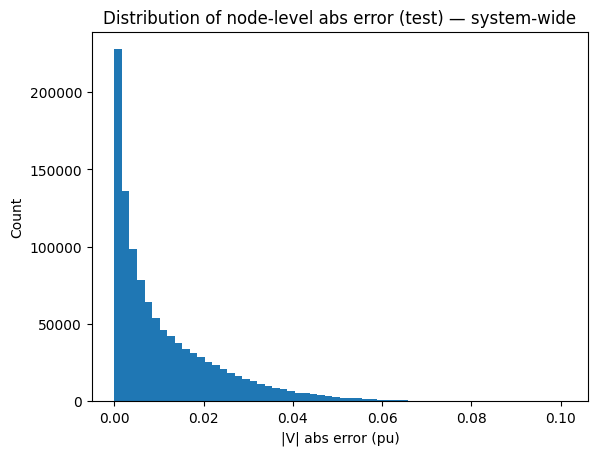

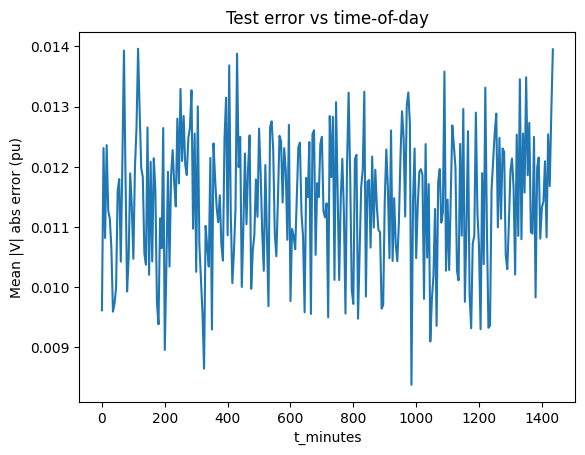


Plotting 95 node histograms across 5 figure(s). XMAX=0.0694 pu


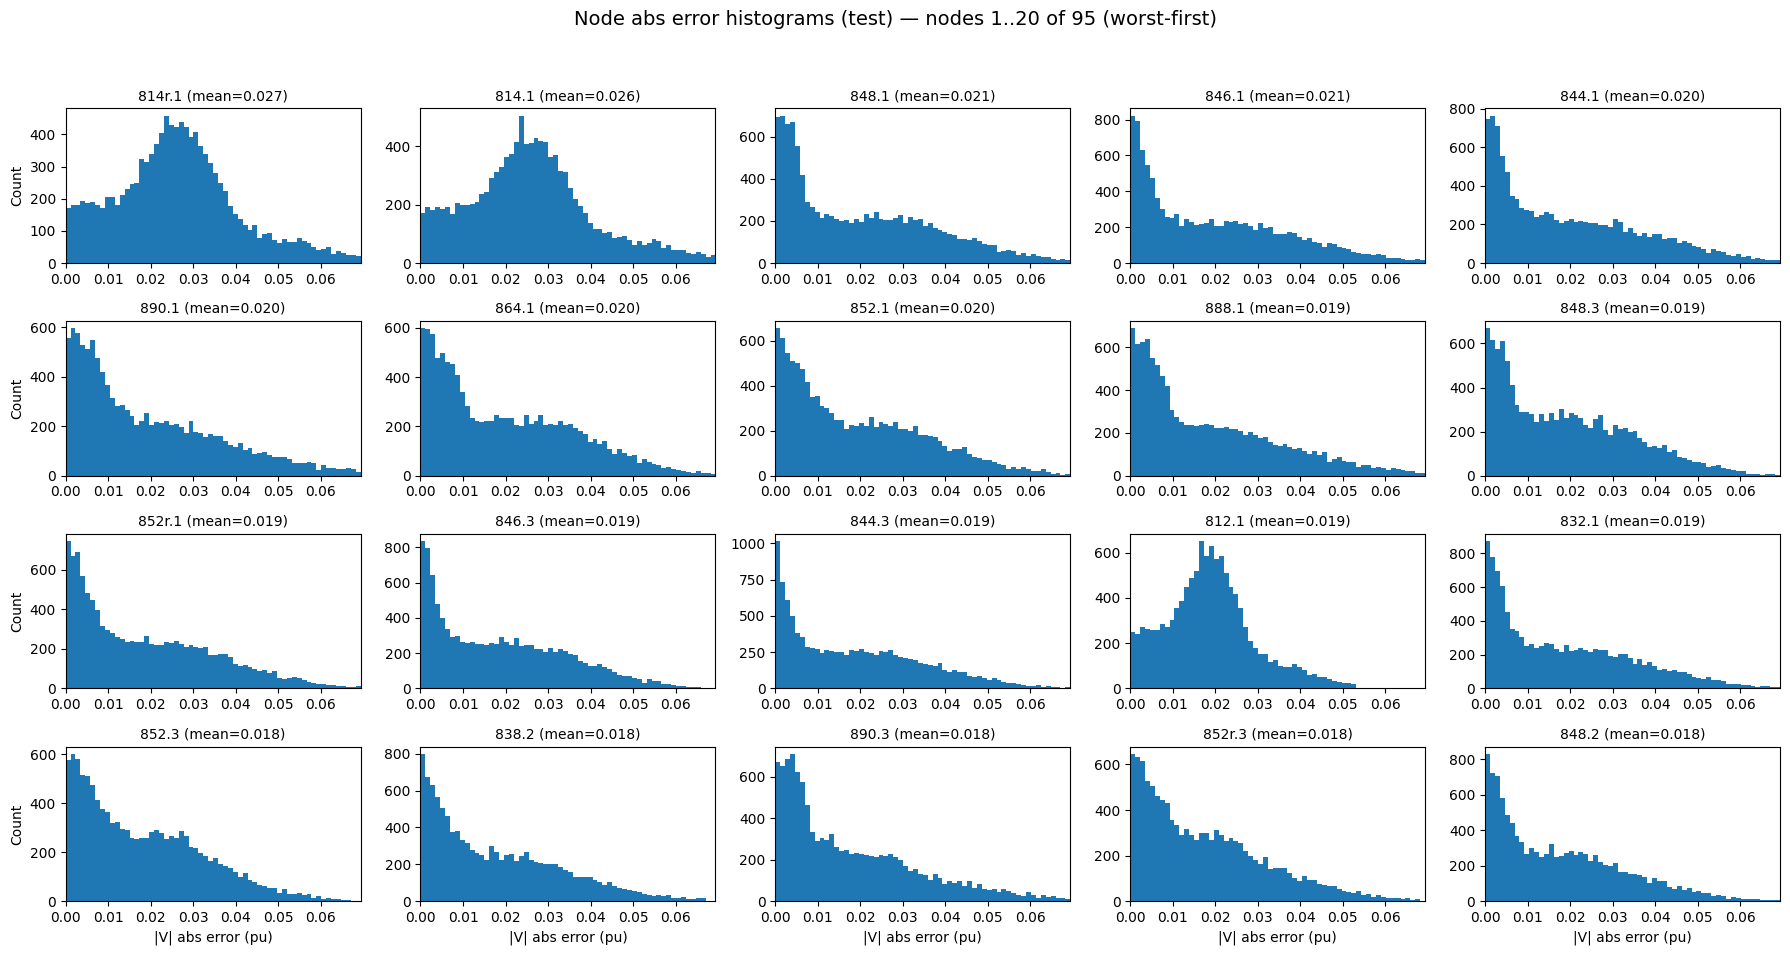

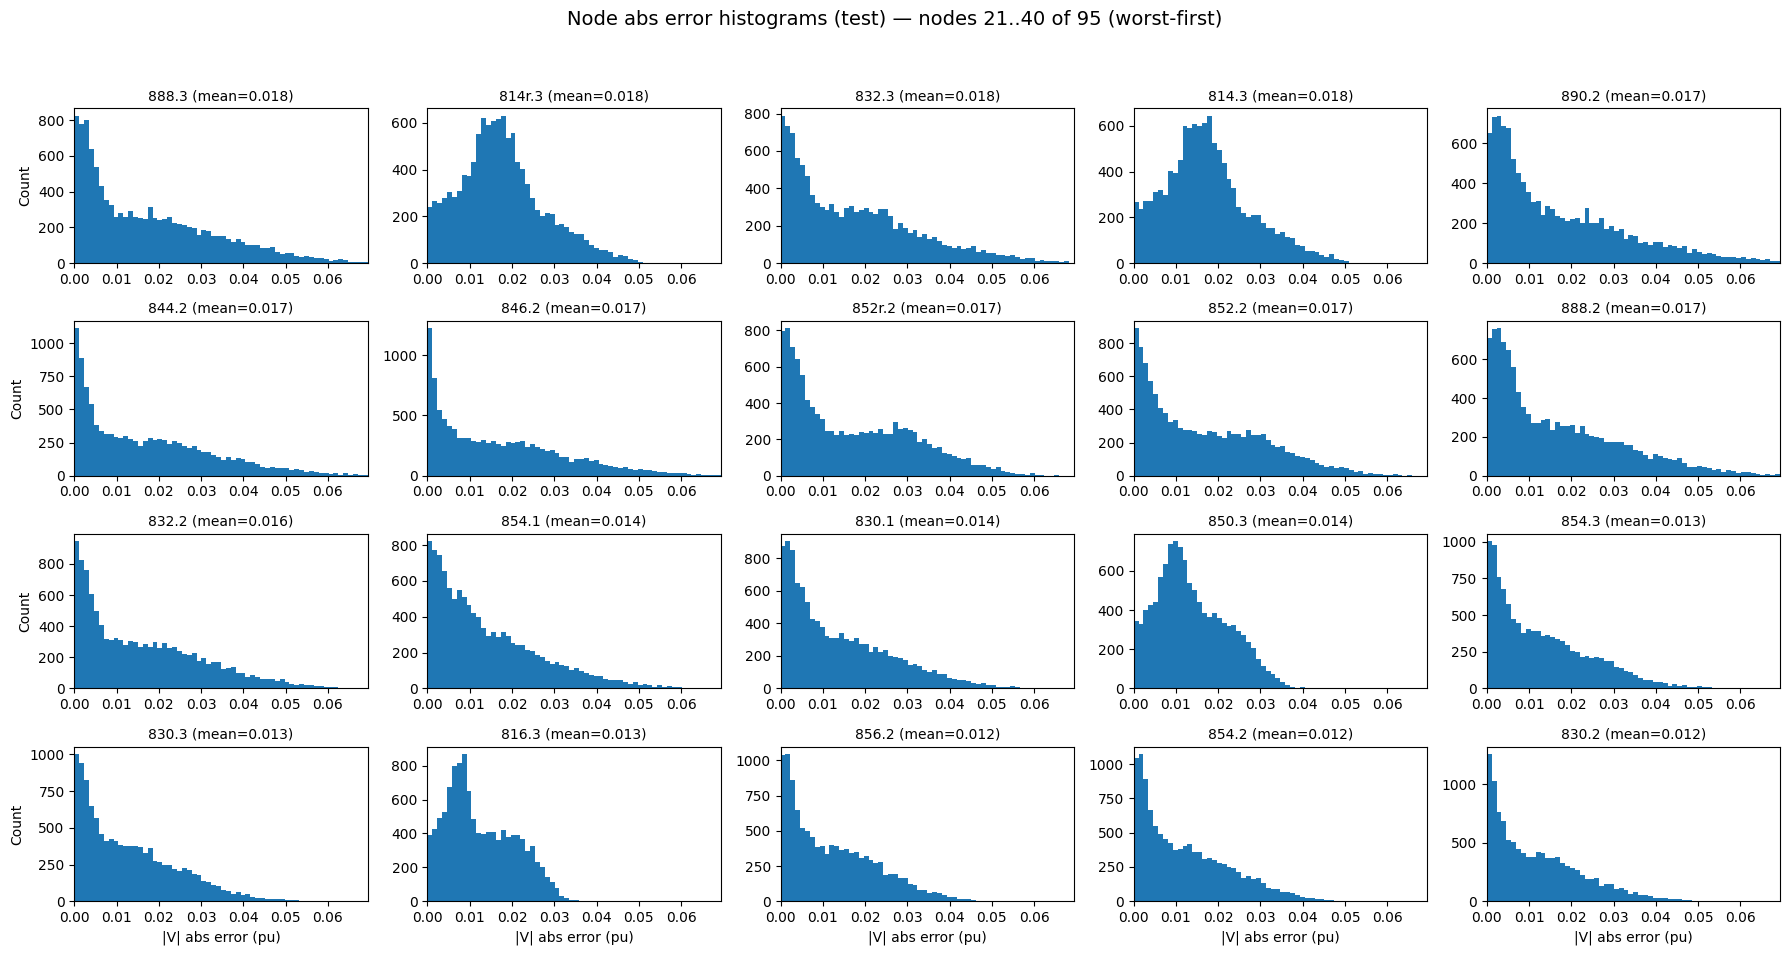

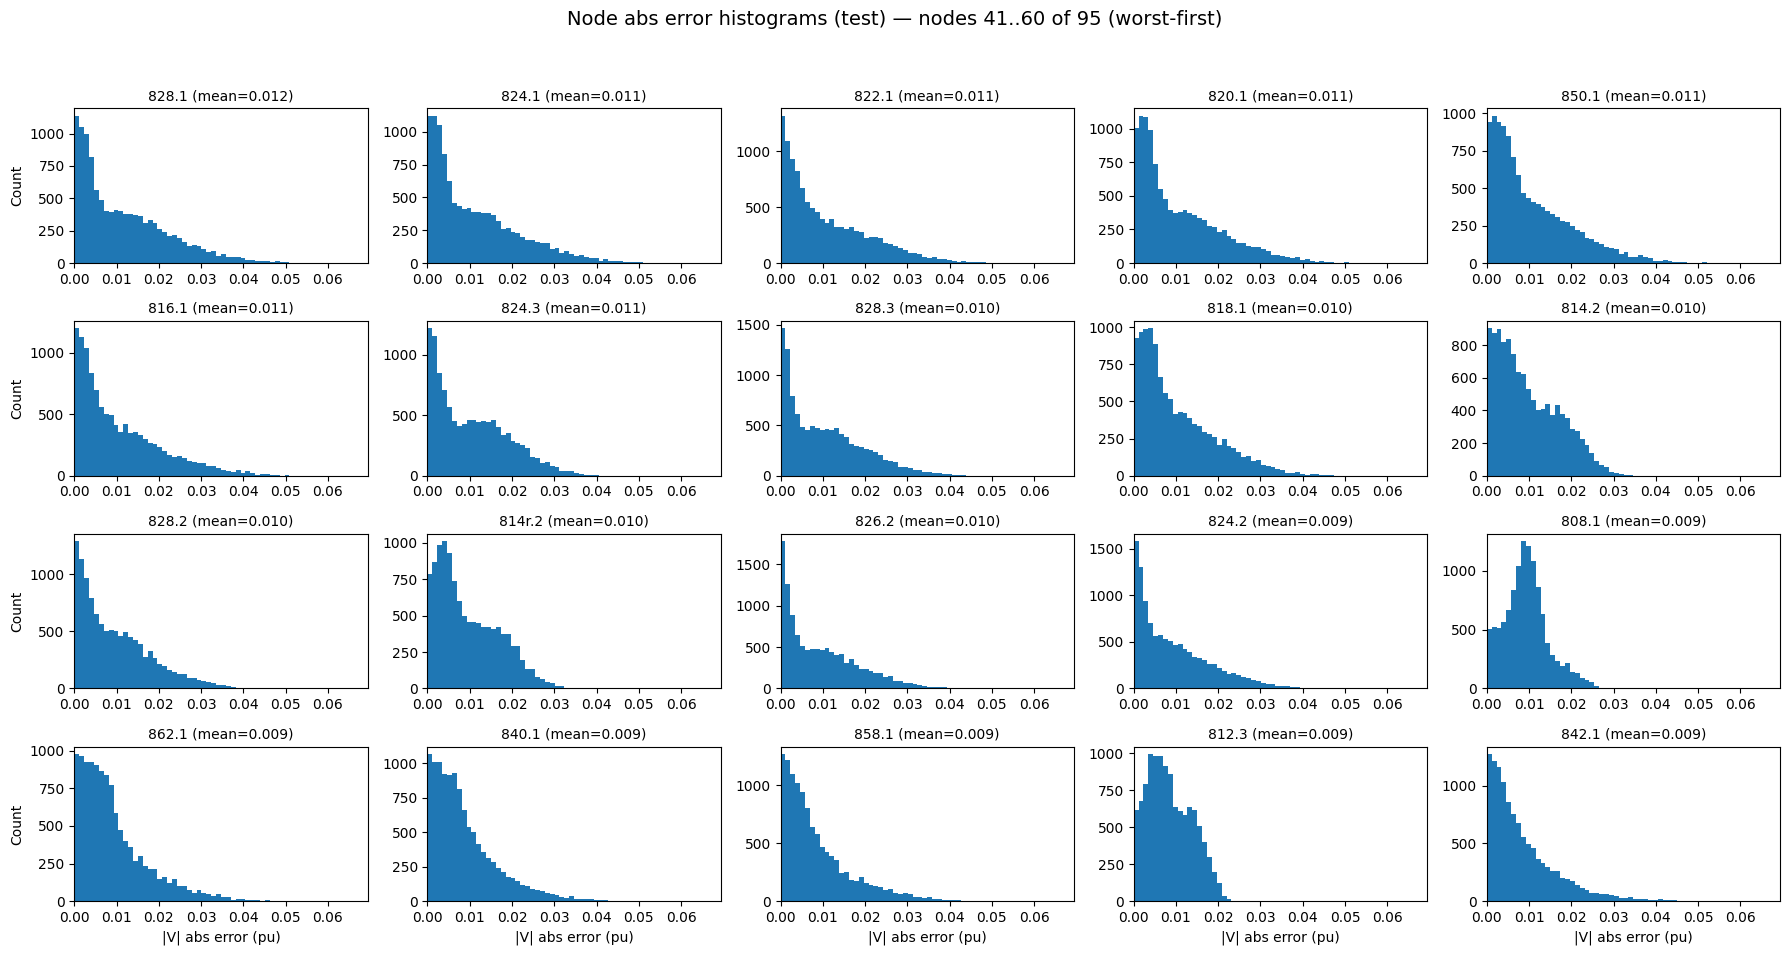

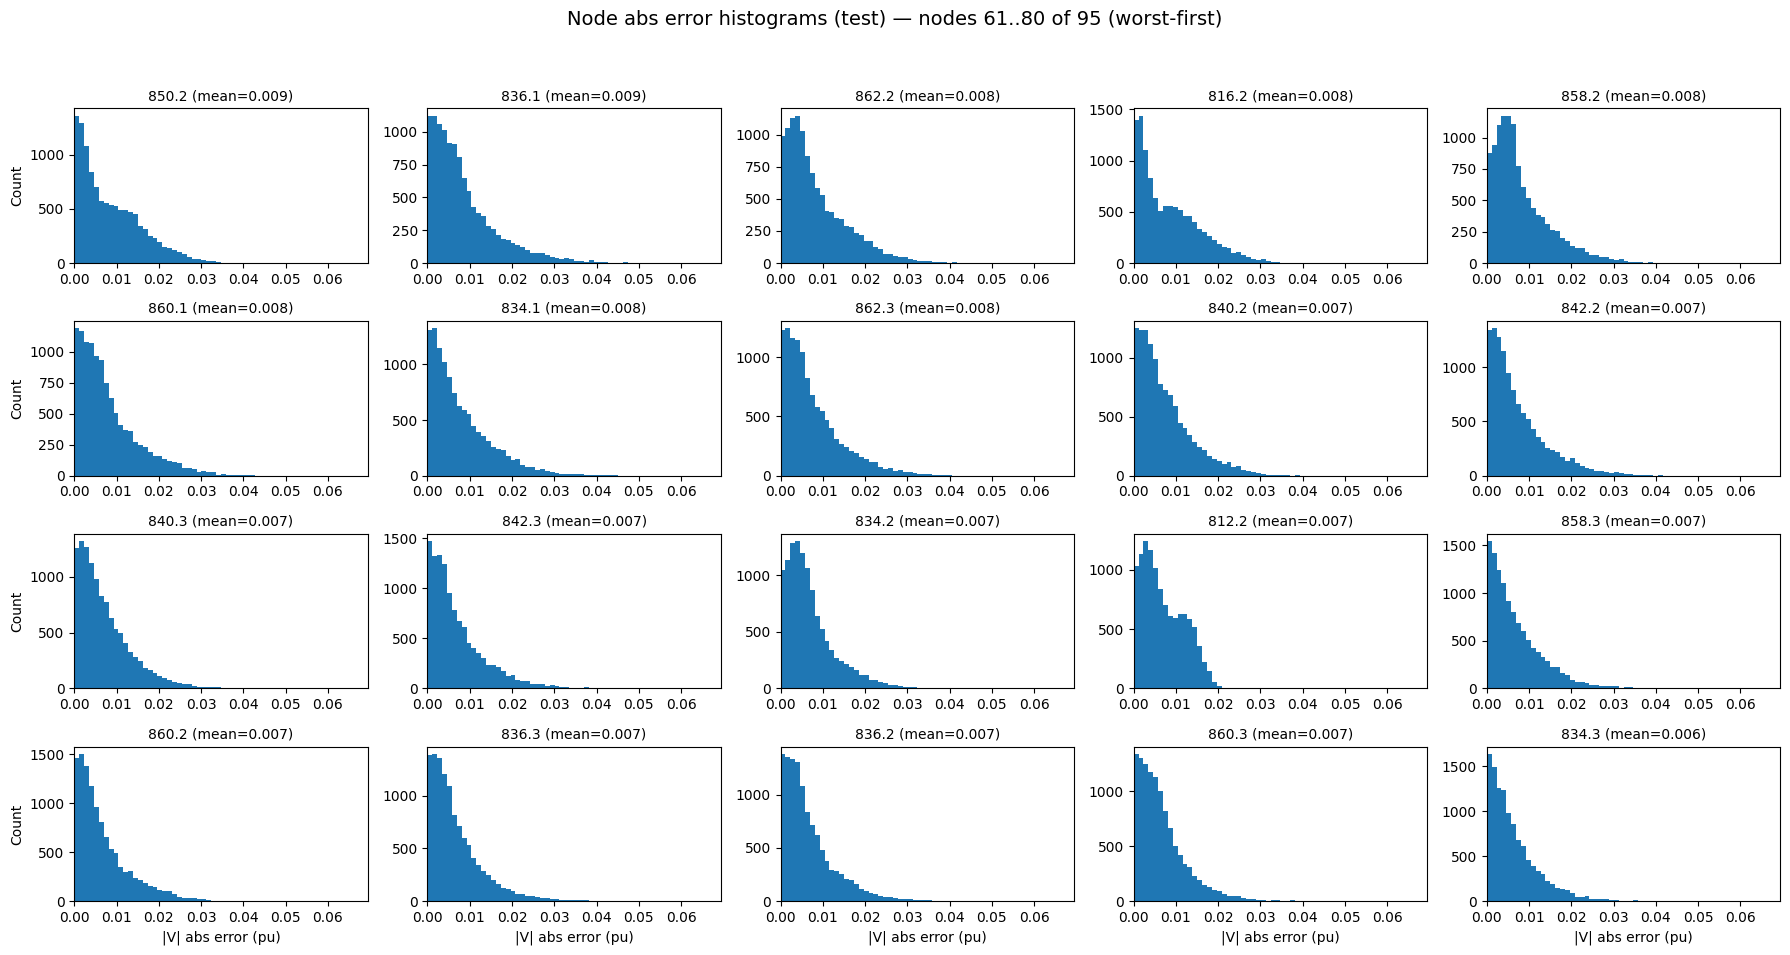

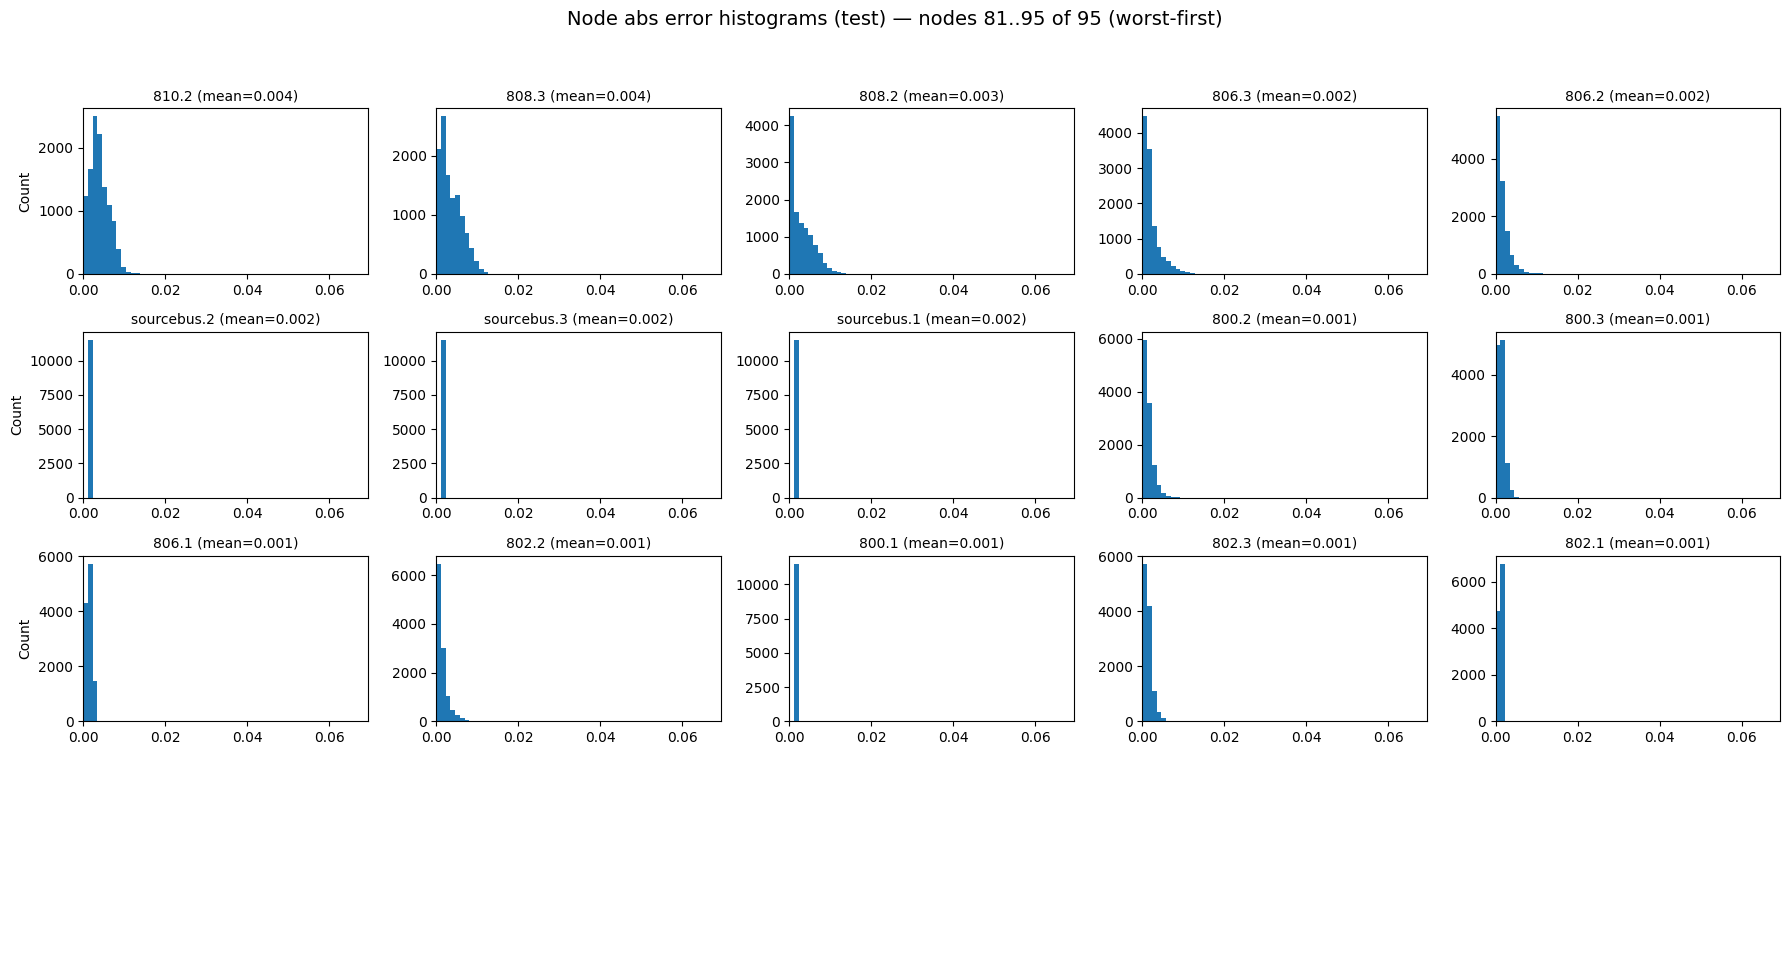


Done.


In [ ]:
# ============================================================
# Comprehensive error inspection for vmag-only GNN
# - rebuilds test split exactly like training (SEED, TEST_FRAC)
# - runs inference on test set
# - produces:
#   (1) worst node ranking (bus-phase)
#   (2) worst bus ranking (aggregate phases)
#   (3) worst snapshot ranking (sample_id)
#   (4) system-wide histogram
#   (5) error vs time-of-day curve (if sample meta available)
#   (6) per-node histograms (paged grids, worst-first)
# - saves: gnn_samples_out/test_node_errors_detailed.csv
# ============================================================

import os, math
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

from torch_geometric.data import Data
from torch_geometric.loader import DataLoader

# ----------------------------
# User-config
# ----------------------------
OUT_DIR = "gnn_samples_out"
EDGE_CSV   = os.path.join(OUT_DIR, "gnn_edges_phase_static.csv")
NODE_CSV   = os.path.join(OUT_DIR, "gnn_node_features_and_targets.csv")
SAMPLE_CSV = os.path.join(OUT_DIR, "gnn_sample_meta.csv")
CKPT_PATH  = os.path.join(OUT_DIR, "checkpoints", "pf_identity_gnn_vmag_only_best.pt")

SEED = 20260130
TEST_FRAC = 0.20
BATCH_SIZE = 64

# Per-node histogram paging
NODES_LIMIT = None   # e.g., 30 to only plot top-30 worst nodes; None => all
BINS = 60
COLS, ROWS = 5, 4     # hist grid per page
PER_FIG = COLS * ROWS

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print("DEVICE:", DEVICE)

# ----------------------------
# Safety checks
# ----------------------------
for p in [EDGE_CSV, NODE_CSV, CKPT_PATH]:
    if not os.path.exists(p):
        raise FileNotFoundError(f"Missing: {p}")

df_s = pd.read_csv(SAMPLE_CSV) if os.path.exists(SAMPLE_CSV) else None

# ============================================================
# Load model for inference (re-declare architecture from ckpt config)
# ============================================================
def load_model_for_inference(path, device=DEVICE):
    ckpt = torch.load(path, map_location="cpu")
    cfg = ckpt["config"]

    import torch.nn as nn
    from torch_geometric.nn import MessagePassing

    HIDDEN = int(cfg["h_dim"])
    NUM_LAYERS = int(cfg["num_layers"])
    NODE_EMB_DIM = int(cfg["node_emb_dim"])
    EDGE_EMB_DIM = int(cfg["edge_emb_dim"])
    DROPOUT = float(cfg.get("dropout", 0.0))

    class MLP(nn.Module):
        def __init__(self, in_dim, out_dim, hidden=HIDDEN, dropout=DROPOUT):
            super().__init__()
            layers = [nn.Linear(in_dim, hidden), nn.ReLU()]
            if dropout and dropout > 0:
                layers.append(nn.Dropout(dropout))
            layers += [nn.Linear(hidden, hidden), nn.ReLU()]
            if dropout and dropout > 0:
                layers.append(nn.Dropout(dropout))
            layers.append(nn.Linear(hidden, out_dim))
            self.net = nn.Sequential(*layers)
        def forward(self, x): return self.net(x)

    class EdgeIdentityMP(MessagePassing):
        # m_ji = psi([h_j || e_ji || r_ji]), aggr add
        def __init__(self, h_dim, edge_feat_dim, edge_emb_dim):
            super().__init__(aggr="add")
            self.psi = MLP(in_dim=h_dim + edge_feat_dim + edge_emb_dim, out_dim=h_dim)
        def forward(self, h, edge_index, edge_attr, edge_emb):
            return self.propagate(edge_index=edge_index, h=h, edge_attr=edge_attr, edge_emb=edge_emb)
        def message(self, h_j, edge_attr, edge_emb):
            return self.psi(torch.cat([h_j, edge_attr, edge_emb], dim=-1))

    class PFIdentityGNN(nn.Module):
        def __init__(self, num_nodes, num_edges,
                     node_in_dim=3, edge_in_dim=2, out_dim=1,
                     node_emb_dim=NODE_EMB_DIM, edge_emb_dim=EDGE_EMB_DIM,
                     h_dim=HIDDEN, num_layers=NUM_LAYERS):
            super().__init__()
            self.num_nodes = int(num_nodes)
            self.node_emb = nn.Embedding(num_nodes, node_emb_dim)  # z_i
            self.edge_emb = nn.Embedding(num_edges, edge_emb_dim)  # r_ij
            self.phi0 = MLP(in_dim=node_in_dim + node_emb_dim, out_dim=h_dim)

            self.mps = nn.ModuleList([
                EdgeIdentityMP(h_dim=h_dim, edge_feat_dim=edge_in_dim, edge_emb_dim=edge_emb_dim)
                for _ in range(num_layers)
            ])
            self.updates = nn.ModuleList([
                MLP(in_dim=h_dim + h_dim + node_emb_dim, out_dim=h_dim)
                for _ in range(num_layers)
            ])
            self.readout = MLP(in_dim=h_dim, out_dim=out_dim)

        def _local_node_ids_from_ptr(self, ptr: torch.Tensor) -> torch.Tensor:
            ids = []
            for g in range(ptr.numel() - 1):
                n0 = int(ptr[g].item())
                n1 = int(ptr[g + 1].item())
                n = n1 - n0
                if n != self.num_nodes:
                    raise RuntimeError(f"Batch graph {g} has {n} nodes != expected {self.num_nodes}.")
                ids.append(torch.arange(n, device=ptr.device))
            return torch.cat(ids, dim=0)

        def forward(self, data: Data) -> torch.Tensor:
            x = data.x
            edge_index = data.edge_index
            edge_attr = data.edge_attr
            edge_id = data.edge_id

            if not hasattr(data, "ptr") or data.ptr is None:
                node_ids = torch.arange(data.num_nodes, device=x.device)
            else:
                node_ids = self._local_node_ids_from_ptr(data.ptr.to(x.device))

            z = self.node_emb(node_ids)
            h = self.phi0(torch.cat([x, z], dim=-1))

            r = self.edge_emb(edge_id)

            for mp, upd in zip(self.mps, self.updates):
                m = mp(h=h, edge_index=edge_index, edge_attr=edge_attr, edge_emb=r)
                h = upd(torch.cat([h, m, z], dim=-1))

            return self.readout(h)

    mdl = PFIdentityGNN(
        num_nodes=int(cfg["N"]),
        num_edges=int(cfg["E"]),
        node_in_dim=int(cfg["node_in_dim"]),
        edge_in_dim=int(cfg["edge_in_dim"]),
        out_dim=int(cfg["out_dim"]),  # should be 1 for vmag-only
        node_emb_dim=int(cfg["node_emb_dim"]),
        edge_emb_dim=int(cfg["edge_emb_dim"]),
        h_dim=int(cfg["h_dim"]),
        num_layers=int(cfg["num_layers"]),
    ).to(device)

    mdl.load_state_dict(ckpt["state_dict"])
    mdl.eval()

    static = dict(
        N=int(cfg["N"]),
        E=int(cfg["E"]),
        edge_index=ckpt["edge_index"].to(device),
        edge_attr=ckpt["edge_attr"].to(device),
        edge_id=ckpt["edge_id"].to(device),
        node_idx_to_name=ckpt.get("node_idx_to_name", [f"node_{i}" for i in range(int(cfg["N"]))]),
        config=cfg,
    )
    return mdl, static

model, static = load_model_for_inference(CKPT_PATH, device=DEVICE)
N = static["N"]
edge_index = static["edge_index"]
edge_attr  = static["edge_attr"]
edge_id    = static["edge_id"]

# ============================================================
# Load node CSV and reconstruct (S, N, features) like training
# ============================================================
df_n = pd.read_csv(NODE_CSV)

needed_cols = ["sample_id", "node_idx", "p_load_kw", "q_load_kvar", "p_pv_kw", "vmag_pu"]
if "node" in df_n.columns:
    needed_cols.append("node")
df_n = df_n[needed_cols].copy()

# numeric cleanup
df_n["sample_id"] = pd.to_numeric(df_n["sample_id"], errors="coerce").astype("Int64")
df_n["node_idx"]  = pd.to_numeric(df_n["node_idx"],  errors="coerce").astype("Int64")
for c in ["p_load_kw","q_load_kvar","p_pv_kw","vmag_pu"]:
    df_n[c] = pd.to_numeric(df_n[c], errors="coerce")

df_n = df_n.replace([np.inf, -np.inf], np.nan).dropna().copy()
df_n["sample_id"] = df_n["sample_id"].astype(int)
df_n["node_idx"]  = df_n["node_idx"].astype(int)

# enforce sample/node ordering
df_n = df_n.sort_values(["sample_id", "node_idx"]).reset_index(drop=True)

# keep only samples that have exactly N node rows
counts = df_n.groupby("sample_id")["node_idx"].count()
good_ids = counts[counts == N].index.to_numpy()
df_n = df_n[df_n["sample_id"].isin(good_ids)].copy()
df_n = df_n.sort_values(["sample_id", "node_idx"]).reset_index(drop=True)

sample_ids = df_n["sample_id"].unique()
S = int(len(sample_ids))

# sanity check contiguity for a few samples
for sid in sample_ids[:5]:
    idxs = df_n.loc[df_n["sample_id"] == sid, "node_idx"].to_numpy()
    if not (idxs[0] == 0 and idxs[-1] == N - 1 and np.all(np.diff(idxs) == 1)):
        raise RuntimeError(f"Sample {sid} node_idx is not contiguous 0..N-1. Mapping/order mismatch persists.")

# build tensors
X_all = df_n[["p_load_kw","q_load_kvar","p_pv_kw"]].to_numpy(np.float32).reshape(S, N, 3)
Y_all = df_n[["vmag_pu"]].to_numpy(np.float32).reshape(S, N, 1)

# add node name if missing
if "node" not in df_n.columns:
    names = static["node_idx_to_name"]
    df_n["node"] = df_n["node_idx"].map(lambda i: names[int(i)])

# ============================================================
# Rebuild EXACT test split by sample index (same as training)
# ============================================================
rng = np.random.default_rng(SEED)
perm = rng.permutation(S)
n_test = int(np.floor(TEST_FRAC * S))
test_pos = perm[:n_test]   # positions in 0..S-1
train_pos = perm[n_test:]

test_sample_ids = [int(sample_ids[k]) for k in test_pos]

print(f"N nodes: {N}, E edges: {static['E']}, total samples: {S}")
print(f"Train samples: {len(train_pos)}, Test samples: {len(test_pos)}")

# ============================================================
# Build PyG test dataset (each graph = one snapshot)
# ============================================================
test_graphs = []
for k in test_pos:
    x = torch.tensor(X_all[k], dtype=torch.float32)
    y = torch.tensor(Y_all[k], dtype=torch.float32)
    g = Data(x=x, y=y, edge_index=edge_index, edge_attr=edge_attr, edge_id=edge_id, num_nodes=N)
    test_graphs.append(g)

loader = DataLoader(test_graphs, batch_size=BATCH_SIZE, shuffle=False)

# ============================================================
# Predict on test set and assemble df_test aligned to rows
# ============================================================
preds = []
trues = []

model.eval()
with torch.no_grad():
    for batch in loader:
        batch = batch.to(DEVICE)
        yhat = model(batch)                 # [B*N, 1]
        preds.append(yhat.detach().cpu().numpy())
        trues.append(batch.y.detach().cpu().numpy())

pred = np.vstack(preds).reshape(-1)
true = np.vstack(trues).reshape(-1)
err  = pred - true
abs_err = np.abs(err)

# Build df_test aligned with (sample_id,node_idx) order
df_test = df_n[df_n["sample_id"].isin(test_sample_ids)].copy()
df_test = df_test.sort_values(["sample_id","node_idx"]).reset_index(drop=True)

if len(df_test) != len(err):
    raise RuntimeError(f"Row mismatch: df_test rows={len(df_test)} vs predictions={len(err)}")

df_test["vmag_pred"] = pred
df_test["vmag_err"]  = err
df_test["vmag_abs_err"] = abs_err

# derive bus/phase
df_test["node"] = df_test["node"].astype(str)
df_test["bus"] = df_test["node"].str.split(".").str[0]
df_test["phase"] = df_test["node"].str.split(".").str[1].astype(int)

# join sample meta (time-of-day, profiles) if available
if df_s is not None and "sample_id" in df_s.columns:
    meta_cols = [c for c in ["sample_id","t_index","t_minutes","m_loadshape","m_irradshape","prof_net",
                             "P_load_time_kw","Q_load_time_kvar","P_pv_time_kw"] if c in df_s.columns]
    if meta_cols:
        df_test = df_test.merge(df_s[meta_cols], on="sample_id", how="left")

# save detailed errors
OUT_ERR = os.path.join(OUT_DIR, "test_node_errors_detailed.csv")
df_test.to_csv(OUT_ERR, index=False)
print(f"[SAVED] Detailed per-node test errors -> {OUT_ERR}")

# ============================================================
# (A) Rankings: worst nodes, worst buses, worst snapshots
# ============================================================
node_stats = (
    df_test.groupby("node")["vmag_abs_err"]
    .agg(["mean","median","max","count"])
    .sort_values("mean", ascending=False)
)
print("\n=== WORST 15 NODES (by mean abs error) ===")
print(node_stats.head(15))

bus_stats = (
    df_test.groupby("bus")["vmag_abs_err"]
    .agg(["mean","median","max","count"])
    .sort_values("mean", ascending=False)
)
print("\n=== WORST 15 BUSES (by mean abs error) ===")
print(bus_stats.head(15))

snap_stats = (
    df_test.groupby("sample_id")["vmag_abs_err"]
    .mean()
    .sort_values(ascending=False)
)
print("\n=== WORST 10 SNAPSHOTS (by mean node abs error) ===")
print(snap_stats.head(10))

print("\n=== 99th percentile abs error (test) ===")
print(float(np.quantile(df_test["vmag_abs_err"].values, 0.99)))

# Optional: inspect worst snapshot’s top-10 worst nodes
if len(snap_stats) > 0:
    worst_sid = int(snap_stats.index[0])
    print(f"\nInspecting worst sample_id={worst_sid}")
    cols_show = ["sample_id","node","p_load_kw","q_load_kvar","p_pv_kw","vmag_pu","vmag_pred","vmag_abs_err"]
    cols_show += [c for c in ["t_index","t_minutes","m_loadshape","m_irradshape","prof_net"] if c in df_test.columns]
    print(df_test[df_test["sample_id"] == worst_sid].sort_values("vmag_abs_err", ascending=False).head(10)[cols_show])

# ============================================================
# (B) Plots: system-wide histogram, error vs time-of-day
# ============================================================
plt.figure()
plt.hist(df_test["vmag_abs_err"].values, bins=60)
plt.xlabel("|V| abs error (pu)")
plt.ylabel("Count")
plt.title("Distribution of node-level abs error (test) — system-wide")
plt.show()

if "t_minutes" in df_test.columns and df_test["t_minutes"].notna().any():
    tod = (
        df_test.groupby("t_minutes")["vmag_abs_err"]
        .mean()
        .sort_index()
    )
    plt.figure()
    plt.plot(tod.index, tod.values)
    plt.xlabel("t_minutes")
    plt.ylabel("Mean |V| abs error (pu)")
    plt.title("Test error vs time-of-day")
    plt.show()
else:
    print("[INFO] No t_minutes found in df_test; skipping time-of-day plot.")

# ============================================================
# (C) Per-node histograms (paged grids, worst-first)
# ============================================================
# Order nodes by mean error descending (worst first)
node_order = node_stats.index.tolist()
if NODES_LIMIT is not None:
    node_order = node_order[:int(NODES_LIMIT)]

# Use a robust xmax so plots are comparable and not dominated by outliers
XMAX = float(np.quantile(df_test["vmag_abs_err"].values, 0.999))
XMAX = max(XMAX, 0.02)

n_nodes = len(node_order)
n_figs = int(math.ceil(n_nodes / PER_FIG))
print(f"\nPlotting {n_nodes} node histograms across {n_figs} figure(s). XMAX={XMAX:.4f} pu")

for fidx in range(n_figs):
    start = fidx * PER_FIG
    end = min((fidx + 1) * PER_FIG, n_nodes)
    chunk = node_order[start:end]

    fig, axes = plt.subplots(ROWS, COLS, figsize=(18, 10))
    axes = np.array(axes).reshape(-1)

    for ax_i, ax in enumerate(axes):
        if ax_i >= len(chunk):
            ax.axis("off")
            continue

        node = chunk[ax_i]
        vals = df_test.loc[df_test["node"] == node, "vmag_abs_err"].to_numpy(dtype=float)

        ax.hist(vals, bins=BINS, range=(0.0, XMAX))
        ax.set_title(f"{node} (mean={vals.mean():.3f})", fontsize=10)
        ax.set_xlim(0.0, XMAX)

        if ax_i % COLS == 0:
            ax.set_ylabel("Count")
        if ax_i >= (ROWS - 1) * COLS:
            ax.set_xlabel("|V| abs error (pu)")

    fig.suptitle(f"Node abs error histograms (test) — nodes {start+1}..{end} of {n_nodes} (worst-first)", fontsize=14)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

print("\nDone.")


with embedding vector
NODE_EMB_DIM = 16   # d_n
EDGE_EMB_DIM = 8    # d_e

In [ ]:
# ============================================================
# GNN training for IEEE34 bus-phase snapshots
# - node features: [p_load, q_load, p_pv]
# - edge features: [R_full, X_full]
# - outputs: [vmag_pu, vang_deg]
# - adds learnable node/edge identity embeddings (z_i, r_ij)
# - robust PyG batching: uses per-graph node ids via data.ptr
# - filters bad rows (NaNs / inf) safely before training
# ============================================================

import os
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F

from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
from torch_geometric.nn import MessagePassing

# ----------------------------
# Paths
# ----------------------------
OUT_DIR = "gnn_samples_out"
EDGE_CSV   = os.path.join(OUT_DIR, "gnn_edges_phase_static.csv")
NODE_CSV   = os.path.join(OUT_DIR, "gnn_node_features_and_targets.csv")
SAMPLE_CSV = os.path.join(OUT_DIR, "gnn_sample_meta.csv")  # optional

# ----------------------------
# Hyperparameters
# ----------------------------
SEED = 20260130

TEST_FRAC = 0.20
BATCH_SIZE = 16
EPOCHS = 150
LR = 1e-3
WEIGHT_DECAY = 1e-5

NODE_EMB_DIM = 16   # d_n
EDGE_EMB_DIM = 8    # d_e

HIDDEN = 64
NUM_LAYERS = 4
DROPOUT = 0.1

ALPHA_VMAG = 1.0
BETA_VANG  = 0

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# ============================================================
# Reproducibility
# ============================================================
def seed_all(seed=SEED):
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

seed_all(SEED)

# ============================================================
# Load CSVs
# ============================================================
if not os.path.exists(EDGE_CSV):
    raise FileNotFoundError(f"Missing {EDGE_CSV}. Run the data-generation block first.")
if not os.path.exists(NODE_CSV):
    raise FileNotFoundError(f"Missing {NODE_CSV}. Run the data-generation block first.")

df_e = pd.read_csv(EDGE_CSV)
df_n = pd.read_csv(NODE_CSV)

required_edge_cols = {"u_idx", "v_idx", "R_full", "X_full"}
required_node_cols = {"sample_id", "node_idx", "p_load_kw", "q_load_kvar", "p_pv_kw", "vmag_pu", "vang_deg"}

missing_e = required_edge_cols - set(df_e.columns)
missing_n = required_node_cols - set(df_n.columns)
if missing_e:
    raise RuntimeError(f"Edge CSV missing columns: {missing_e}")
if missing_n:
    raise RuntimeError(f"Node CSV missing columns: {missing_n}")

# Ensure numeric + integer indices
df_e["u_idx"] = pd.to_numeric(df_e["u_idx"], errors="raise").astype(int)
df_e["v_idx"] = pd.to_numeric(df_e["v_idx"], errors="raise").astype(int)
df_n["sample_id"] = pd.to_numeric(df_n["sample_id"], errors="raise").astype(int)
df_n["node_idx"] = pd.to_numeric(df_n["node_idx"], errors="raise").astype(int)

# Ensure float columns
for c in ["R_full", "X_full"]:
    df_e[c] = pd.to_numeric(df_e[c], errors="coerce")
for c in ["p_load_kw", "q_load_kvar", "p_pv_kw", "vmag_pu", "vang_deg"]:
    df_n[c] = pd.to_numeric(df_n[c], errors="coerce")

# Drop any rows with NaN/inf in required numeric fields
df_e = df_e.replace([np.inf, -np.inf], np.nan).dropna(subset=["u_idx", "v_idx", "R_full", "X_full"]).copy()
df_n = df_n.replace([np.inf, -np.inf], np.nan).dropna(subset=list(required_node_cols)).copy()

# ============================================================
# Build static edge tensors (shared by all snapshots)
# ============================================================
df_e = df_e.reset_index(drop=True).copy()
df_e["edge_id"] = np.arange(len(df_e), dtype=int)

edge_index = torch.tensor(df_e[["u_idx", "v_idx"]].to_numpy().T, dtype=torch.long)  # [2, E]
edge_attr  = torch.tensor(df_e[["R_full", "X_full"]].to_numpy(), dtype=torch.float) # [E, 2]
edge_id    = torch.tensor(df_e["edge_id"].to_numpy(), dtype=torch.long)             # [E]

E = int(edge_index.shape[1])

# Determine N from node_idx
N = int(df_n["node_idx"].max()) + 1

if int(edge_index.max()) >= N:
    raise RuntimeError(f"Edge index max {int(edge_index.max())} >= N {N}. Mapping mismatch still exists.")

# ============================================================
# Convert node table into per-sample tensors
# ============================================================
df_n = df_n.sort_values(["sample_id", "node_idx"]).reset_index(drop=True)

sample_ids = df_n["sample_id"].unique()
S = int(len(sample_ids))

# Check each sample has exactly N rows
counts = df_n.groupby("sample_id")["node_idx"].count()
bad = counts[counts != N]
if len(bad) > 0:
    # Keep only "good" sample_ids (helps if you filtered some badV rows during generation)
    good_ids = counts[counts == N].index.to_numpy()
    df_n = df_n[df_n["sample_id"].isin(good_ids)].copy()
    df_n = df_n.sort_values(["sample_id", "node_idx"]).reset_index(drop=True)
    sample_ids = df_n["sample_id"].unique()
    S = int(len(sample_ids))
    print(f"[WARN] Dropped {len(bad)} samples with !=N node rows. Remaining samples: {S}")

# Spot-check contiguity for a few samples
for sid in sample_ids[:10]:
    idxs = df_n.loc[df_n["sample_id"] == sid, "node_idx"].to_numpy()
    if not (idxs[0] == 0 and idxs[-1] == N - 1 and np.all(np.diff(idxs) == 1)):
        raise RuntimeError(f"Sample {sid} node_idx not contiguous 0..N-1. Mapping/order issue remains.")

# Extract X and Y arrays
X_all = df_n[["p_load_kw", "q_load_kvar", "p_pv_kw"]].to_numpy(dtype=np.float32)  # [S*N, 3]
Y_all = df_n[["vmag_pu", "vang_deg"]].to_numpy(dtype=np.float32)                 # [S*N, 2]

X_all = X_all.reshape(S, N, 3)
Y_all = Y_all.reshape(S, N, 2)

# ============================================================
# Train/test split (by sample index)
# ============================================================
rng = np.random.default_rng(SEED)
perm = rng.permutation(S)
n_test = int(np.floor(TEST_FRAC * S))
test_idx = perm[:n_test]
train_idx = perm[n_test:]

def make_dataset(indices):
    data_list = []
    for k in indices:
        x = torch.tensor(X_all[k], dtype=torch.float)  # [N,3]
        y = torch.tensor(Y_all[k], dtype=torch.float)  # [N,2]
        g = Data(
            x=x,
            y=y,
            edge_index=edge_index,
            edge_attr=edge_attr,
            edge_id=edge_id,
            num_nodes=N
        )
        data_list.append(g)
    return data_list

train_data = make_dataset(train_idx)
test_data  = make_dataset(test_idx)

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader  = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

print(f"N nodes: {N}, E edges: {E}, total samples: {S}")
print(f"Train samples: {len(train_data)}, Test samples: {len(test_data)}")
print(f"DEVICE: {DEVICE}")

# ============================================================
# Model blocks
# ============================================================
class MLP(nn.Module):
    def __init__(self, in_dim, out_dim, hidden=HIDDEN, dropout=DROPOUT):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, hidden),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden, hidden),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden, out_dim),
        )

    def forward(self, x):
        return self.net(x)

class EdgeIdentityMP(MessagePassing):
    """
    m_ji = psi([h_j || e_ji || r_ji])
    m_i  = sum_j m_ji
    """
    def __init__(self, h_dim, edge_feat_dim, edge_emb_dim):
        super().__init__(aggr="add")
        self.psi = MLP(in_dim=h_dim + edge_feat_dim + edge_emb_dim, out_dim=h_dim)

    def forward(self, h, edge_index, edge_attr, edge_emb):
        return self.propagate(edge_index=edge_index, h=h, edge_attr=edge_attr, edge_emb=edge_emb)

    def message(self, h_j, edge_attr, edge_emb):
        inp = torch.cat([h_j, edge_attr, edge_emb], dim=-1)
        return self.psi(inp)

class PFIdentityGNN(nn.Module):
    def __init__(self, num_nodes, num_edges,
                 node_in_dim=3, edge_in_dim=2, out_dim=2,
                 node_emb_dim=NODE_EMB_DIM, edge_emb_dim=EDGE_EMB_DIM,
                 h_dim=HIDDEN, num_layers=NUM_LAYERS):
        super().__init__()
        self.num_nodes = int(num_nodes)

        self.node_emb = nn.Embedding(num_nodes, node_emb_dim)  # z_i
        self.edge_emb = nn.Embedding(num_edges, edge_emb_dim)  # r_ij (edge_id)

        self.phi0 = MLP(in_dim=node_in_dim + node_emb_dim, out_dim=h_dim)

        self.mps = nn.ModuleList([
            EdgeIdentityMP(h_dim=h_dim, edge_feat_dim=edge_in_dim, edge_emb_dim=edge_emb_dim)
            for _ in range(num_layers)
        ])

        self.updates = nn.ModuleList([
            MLP(in_dim=h_dim + h_dim + node_emb_dim, out_dim=h_dim)
            for _ in range(num_layers)
        ])

        self.readout = MLP(in_dim=h_dim, out_dim=out_dim)

    def _local_node_ids_from_ptr(self, ptr: torch.Tensor) -> torch.Tensor:
        """
        ptr: [num_graphs+1] cumulative node counts in batch
        returns: [N_total] local ids 0..N-1 for each graph (robust, no modulo hacks)
        """
        ids = []
        for g in range(ptr.numel() - 1):
            n0 = int(ptr[g].item())
            n1 = int(ptr[g + 1].item())
            n = n1 - n0
            if n != self.num_nodes:
                # If you ever batch graphs with different node counts, you need per-graph embeddings.
                raise RuntimeError(f"Batch graph {g} has {n} nodes != expected {self.num_nodes}.")
            ids.append(torch.arange(n, device=ptr.device))
        return torch.cat(ids, dim=0)

    def forward(self, data: Data) -> torch.Tensor:
        x = data.x
        edge_index = data.edge_index
        edge_attr = data.edge_attr
        edge_id = data.edge_id

        # robust per-graph node ids
        if not hasattr(data, "ptr") or data.ptr is None:
            # single graph case
            node_ids = torch.arange(data.num_nodes, device=x.device)
        else:
            node_ids = self._local_node_ids_from_ptr(data.ptr.to(x.device))

        z = self.node_emb(node_ids)             # [N_total, d_n]
        h = self.phi0(torch.cat([x, z], dim=-1))

        r = self.edge_emb(edge_id)              # [E_total, d_e]

        for mp, upd in zip(self.mps, self.updates):
            m = mp(h=h, edge_index=edge_index, edge_attr=edge_attr, edge_emb=r)
            h = upd(torch.cat([h, m, z], dim=-1))

        return self.readout(h)                  # [N_total, 2]

# ============================================================
# Train + Eval utilities
# ============================================================
def compute_metrics(yhat, ytrue):
    err = yhat - ytrue
    mae = err.abs().mean(dim=0)  # [2]
    rmse = torch.sqrt((err**2).mean(dim=0))
    return mae, rmse

@torch.no_grad()
def evaluate(model, loader):
    model.eval()
    mae_sum = torch.zeros(2, device=DEVICE)
    rmse_sum = torch.zeros(2, device=DEVICE)
    n_batches = 0

    for data in loader:
        data = data.to(DEVICE)
        yhat = model(data)
        ytrue = data.y
        mae, rmse = compute_metrics(yhat, ytrue)
        mae_sum += mae
        rmse_sum += rmse
        n_batches += 1

    mae_avg = (mae_sum / max(1, n_batches)).cpu().numpy()
    rmse_avg = (rmse_sum / max(1, n_batches)).cpu().numpy()
    return mae_avg, rmse_avg

# ============================================================
# Model + Optim
# ============================================================
model = PFIdentityGNN(
    num_nodes=N,
    num_edges=E,
    node_in_dim=3,
    edge_in_dim=2,
    out_dim=2,
    node_emb_dim=NODE_EMB_DIM,
    edge_emb_dim=EDGE_EMB_DIM,
    h_dim=HIDDEN,
    num_layers=NUM_LAYERS
).to(DEVICE)

opt = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)

def loss_fn(yhat, ytrue):
    vmag_hat, vang_hat = yhat[:, 0], yhat[:, 1]
    vmag_true, vang_true = ytrue[:, 0], ytrue[:, 1]
    loss_vmag = F.mse_loss(vmag_hat, vmag_true)
    loss_vang = F.mse_loss(vang_hat, vang_true)
    return ALPHA_VMAG * loss_vmag + BETA_VANG * loss_vang

# ============================================================
# Train loop
# ============================================================
best_test = float("inf")
best_state = None

for epoch in range(1, EPOCHS + 1):
    model.train()
    total_loss = 0.0
    nb = 0

    for data in train_loader:
        data = data.to(DEVICE)
        opt.zero_grad()
        yhat = model(data)
        loss = loss_fn(yhat, data.y)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)
        opt.step()
        total_loss += float(loss.item())
        nb += 1

    train_loss = total_loss / max(1, nb)

    mae_test, rmse_test = evaluate(model, test_loader)
    score = float(ALPHA_VMAG * rmse_test[0] + BETA_VANG * rmse_test[1])

    if score < best_test:
        best_test = score
        best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}

    if epoch % 10 == 0 or epoch == 1:
        print(
            f"Epoch {epoch:03d} | train_loss={train_loss:.6f} | "
            f"test_MAE(vmag,ang)=({mae_test[0]:.6f},{mae_test[1]:.6f}) | "
            f"test_RMSE(vmag,ang)=({rmse_test[0]:.6f},{rmse_test[1]:.6f})"
        )

# Load best
if best_state is not None:
    model.load_state_dict(best_state)

mae_test, rmse_test = evaluate(model, test_loader)

print("\n=== FINAL TEST (best checkpoint) ===")
print(f"MAE  |V|    : {mae_test[0]:.6f} pu")
print(f"MAE  angle  : {mae_test[1]:.6f} deg")
print(f"RMSE |V|    : {rmse_test[0]:.6f} pu")
print(f"RMSE angle  : {rmse_test[1]:.6f} deg")


N nodes: 95, E edges: 80, total samples: 1920
Train samples: 1536, Test samples: 384
DEVICE: cpu
Epoch 001 | train_loss=0.131570 | test_MAE(vmag,ang)=(0.057126,79.529869) | test_RMSE(vmag,ang)=(0.064049,97.388374)
Epoch 010 | train_loss=0.004218 | test_MAE(vmag,ang)=(0.042774,79.522011) | test_RMSE(vmag,ang)=(0.047362,97.386848)
Epoch 020 | train_loss=0.003225 | test_MAE(vmag,ang)=(0.025776,79.522011) | test_RMSE(vmag,ang)=(0.030372,97.386848)
Epoch 030 | train_loss=0.002778 | test_MAE(vmag,ang)=(0.027252,79.522011) | test_RMSE(vmag,ang)=(0.031630,97.386848)
Epoch 040 | train_loss=0.002234 | test_MAE(vmag,ang)=(0.020750,79.522011) | test_RMSE(vmag,ang)=(0.026110,97.386848)
Epoch 050 | train_loss=0.001820 | test_MAE(vmag,ang)=(0.022267,79.522011) | test_RMSE(vmag,ang)=(0.027663,97.386848)
Epoch 060 | train_loss=0.001481 | test_MAE(vmag,ang)=(0.020846,79.522011) | test_RMSE(vmag,ang)=(0.026180,97.386848)
Epoch 070 | train_loss=0.001217 | test_MAE(vmag,ang)=(0.019588,79.522011) | test_RMS

with embedding vector
NODE_EMB_DIM = 32   # d_n
EDGE_EMB_DIM = 16    # d_e

In [ ]:
# ============================================================
# GNN training for IEEE34 bus-phase snapshots
# - node features: [p_load, q_load, p_pv]
# - edge features: [R_full, X_full]
# - outputs: [vmag_pu, vang_deg]
# - adds learnable node/edge identity embeddings (z_i, r_ij)
# - robust PyG batching: uses per-graph node ids via data.ptr
# - filters bad rows (NaNs / inf) safely before training
# ============================================================

import os
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F

from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
from torch_geometric.nn import MessagePassing

# ----------------------------
# Paths
# ----------------------------
OUT_DIR = "gnn_samples_out"
EDGE_CSV   = os.path.join(OUT_DIR, "gnn_edges_phase_static.csv")
NODE_CSV   = os.path.join(OUT_DIR, "gnn_node_features_and_targets.csv")
SAMPLE_CSV = os.path.join(OUT_DIR, "gnn_sample_meta.csv")  # optional

# ----------------------------
# Hyperparameters
# ----------------------------
SEED = 20260130

TEST_FRAC = 0.20
BATCH_SIZE = 16
EPOCHS = 70
LR = 1e-3
WEIGHT_DECAY = 1e-5

NODE_EMB_DIM = 32   # d_n
EDGE_EMB_DIM = 16    # d_e

HIDDEN = 64
NUM_LAYERS = 4
DROPOUT = 0.1

ALPHA_VMAG = 1.0
BETA_VANG  = 0

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# ============================================================
# Reproducibility
# ============================================================
def seed_all(seed=SEED):
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

seed_all(SEED)

# ============================================================
# Load CSVs
# ============================================================
if not os.path.exists(EDGE_CSV):
    raise FileNotFoundError(f"Missing {EDGE_CSV}. Run the data-generation block first.")
if not os.path.exists(NODE_CSV):
    raise FileNotFoundError(f"Missing {NODE_CSV}. Run the data-generation block first.")

df_e = pd.read_csv(EDGE_CSV)
df_n = pd.read_csv(NODE_CSV)

required_edge_cols = {"u_idx", "v_idx", "R_full", "X_full"}
required_node_cols = {"sample_id", "node_idx", "p_load_kw", "q_load_kvar", "p_pv_kw", "vmag_pu", "vang_deg"}

missing_e = required_edge_cols - set(df_e.columns)
missing_n = required_node_cols - set(df_n.columns)
if missing_e:
    raise RuntimeError(f"Edge CSV missing columns: {missing_e}")
if missing_n:
    raise RuntimeError(f"Node CSV missing columns: {missing_n}")

# Ensure numeric + integer indices
df_e["u_idx"] = pd.to_numeric(df_e["u_idx"], errors="raise").astype(int)
df_e["v_idx"] = pd.to_numeric(df_e["v_idx"], errors="raise").astype(int)
df_n["sample_id"] = pd.to_numeric(df_n["sample_id"], errors="raise").astype(int)
df_n["node_idx"] = pd.to_numeric(df_n["node_idx"], errors="raise").astype(int)

# Ensure float columns
for c in ["R_full", "X_full"]:
    df_e[c] = pd.to_numeric(df_e[c], errors="coerce")
for c in ["p_load_kw", "q_load_kvar", "p_pv_kw", "vmag_pu", "vang_deg"]:
    df_n[c] = pd.to_numeric(df_n[c], errors="coerce")

# Drop any rows with NaN/inf in required numeric fields
df_e = df_e.replace([np.inf, -np.inf], np.nan).dropna(subset=["u_idx", "v_idx", "R_full", "X_full"]).copy()
df_n = df_n.replace([np.inf, -np.inf], np.nan).dropna(subset=list(required_node_cols)).copy()

# ============================================================
# Build static edge tensors (shared by all snapshots)
# ============================================================
df_e = df_e.reset_index(drop=True).copy()
df_e["edge_id"] = np.arange(len(df_e), dtype=int)

edge_index = torch.tensor(df_e[["u_idx", "v_idx"]].to_numpy().T, dtype=torch.long)  # [2, E]
edge_attr  = torch.tensor(df_e[["R_full", "X_full"]].to_numpy(), dtype=torch.float) # [E, 2]
edge_id    = torch.tensor(df_e["edge_id"].to_numpy(), dtype=torch.long)             # [E]

E = int(edge_index.shape[1])

# Determine N from node_idx
N = int(df_n["node_idx"].max()) + 1

if int(edge_index.max()) >= N:
    raise RuntimeError(f"Edge index max {int(edge_index.max())} >= N {N}. Mapping mismatch still exists.")

# ============================================================
# Convert node table into per-sample tensors
# ============================================================
df_n = df_n.sort_values(["sample_id", "node_idx"]).reset_index(drop=True)

sample_ids = df_n["sample_id"].unique()
S = int(len(sample_ids))

# Check each sample has exactly N rows
counts = df_n.groupby("sample_id")["node_idx"].count()
bad = counts[counts != N]
if len(bad) > 0:
    # Keep only "good" sample_ids (helps if you filtered some badV rows during generation)
    good_ids = counts[counts == N].index.to_numpy()
    df_n = df_n[df_n["sample_id"].isin(good_ids)].copy()
    df_n = df_n.sort_values(["sample_id", "node_idx"]).reset_index(drop=True)
    sample_ids = df_n["sample_id"].unique()
    S = int(len(sample_ids))
    print(f"[WARN] Dropped {len(bad)} samples with !=N node rows. Remaining samples: {S}")

# Spot-check contiguity for a few samples
for sid in sample_ids[:10]:
    idxs = df_n.loc[df_n["sample_id"] == sid, "node_idx"].to_numpy()
    if not (idxs[0] == 0 and idxs[-1] == N - 1 and np.all(np.diff(idxs) == 1)):
        raise RuntimeError(f"Sample {sid} node_idx not contiguous 0..N-1. Mapping/order issue remains.")

# Extract X and Y arrays
X_all = df_n[["p_load_kw", "q_load_kvar", "p_pv_kw"]].to_numpy(dtype=np.float32)  # [S*N, 3]
Y_all = df_n[["vmag_pu", "vang_deg"]].to_numpy(dtype=np.float32)                 # [S*N, 2]

X_all = X_all.reshape(S, N, 3)
Y_all = Y_all.reshape(S, N, 2)

# ============================================================
# Train/test split (by sample index)
# ============================================================
rng = np.random.default_rng(SEED)
perm = rng.permutation(S)
n_test = int(np.floor(TEST_FRAC * S))
test_idx = perm[:n_test]
train_idx = perm[n_test:]

def make_dataset(indices):
    data_list = []
    for k in indices:
        x = torch.tensor(X_all[k], dtype=torch.float)  # [N,3]
        y = torch.tensor(Y_all[k], dtype=torch.float)  # [N,2]
        g = Data(
            x=x,
            y=y,
            edge_index=edge_index,
            edge_attr=edge_attr,
            edge_id=edge_id,
            num_nodes=N
        )
        data_list.append(g)
    return data_list

train_data = make_dataset(train_idx)
test_data  = make_dataset(test_idx)

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader  = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

print(f"N nodes: {N}, E edges: {E}, total samples: {S}")
print(f"Train samples: {len(train_data)}, Test samples: {len(test_data)}")
print(f"DEVICE: {DEVICE}")

# ============================================================
# Model blocks
# ============================================================
class MLP(nn.Module):
    def __init__(self, in_dim, out_dim, hidden=HIDDEN, dropout=DROPOUT):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, hidden),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden, hidden),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden, out_dim),
        )

    def forward(self, x):
        return self.net(x)

class EdgeIdentityMP(MessagePassing):
    """
    m_ji = psi([h_j || e_ji || r_ji])
    m_i  = sum_j m_ji
    """
    def __init__(self, h_dim, edge_feat_dim, edge_emb_dim):
        super().__init__(aggr="add")
        self.psi = MLP(in_dim=h_dim + edge_feat_dim + edge_emb_dim, out_dim=h_dim)

    def forward(self, h, edge_index, edge_attr, edge_emb):
        return self.propagate(edge_index=edge_index, h=h, edge_attr=edge_attr, edge_emb=edge_emb)

    def message(self, h_j, edge_attr, edge_emb):
        inp = torch.cat([h_j, edge_attr, edge_emb], dim=-1)
        return self.psi(inp)

class PFIdentityGNN(nn.Module):
    def __init__(self, num_nodes, num_edges,
                 node_in_dim=3, edge_in_dim=2, out_dim=2,
                 node_emb_dim=NODE_EMB_DIM, edge_emb_dim=EDGE_EMB_DIM,
                 h_dim=HIDDEN, num_layers=NUM_LAYERS):
        super().__init__()
        self.num_nodes = int(num_nodes)

        self.node_emb = nn.Embedding(num_nodes, node_emb_dim)  # z_i
        self.edge_emb = nn.Embedding(num_edges, edge_emb_dim)  # r_ij (edge_id)

        self.phi0 = MLP(in_dim=node_in_dim + node_emb_dim, out_dim=h_dim)

        self.mps = nn.ModuleList([
            EdgeIdentityMP(h_dim=h_dim, edge_feat_dim=edge_in_dim, edge_emb_dim=edge_emb_dim)
            for _ in range(num_layers)
        ])

        self.updates = nn.ModuleList([
            MLP(in_dim=h_dim + h_dim + node_emb_dim, out_dim=h_dim)
            for _ in range(num_layers)
        ])

        self.readout = MLP(in_dim=h_dim, out_dim=out_dim)

    def _local_node_ids_from_ptr(self, ptr: torch.Tensor) -> torch.Tensor:
        """
        ptr: [num_graphs+1] cumulative node counts in batch
        returns: [N_total] local ids 0..N-1 for each graph (robust, no modulo hacks)
        """
        ids = []
        for g in range(ptr.numel() - 1):
            n0 = int(ptr[g].item())
            n1 = int(ptr[g + 1].item())
            n = n1 - n0
            if n != self.num_nodes:
                # If you ever batch graphs with different node counts, you need per-graph embeddings.
                raise RuntimeError(f"Batch graph {g} has {n} nodes != expected {self.num_nodes}.")
            ids.append(torch.arange(n, device=ptr.device))
        return torch.cat(ids, dim=0)

    def forward(self, data: Data) -> torch.Tensor:
        x = data.x
        edge_index = data.edge_index
        edge_attr = data.edge_attr
        edge_id = data.edge_id

        # robust per-graph node ids
        if not hasattr(data, "ptr") or data.ptr is None:
            # single graph case
            node_ids = torch.arange(data.num_nodes, device=x.device)
        else:
            node_ids = self._local_node_ids_from_ptr(data.ptr.to(x.device))

        z = self.node_emb(node_ids)             # [N_total, d_n]
        h = self.phi0(torch.cat([x, z], dim=-1))

        r = self.edge_emb(edge_id)              # [E_total, d_e]

        for mp, upd in zip(self.mps, self.updates):
            m = mp(h=h, edge_index=edge_index, edge_attr=edge_attr, edge_emb=r)
            h = upd(torch.cat([h, m, z], dim=-1))

        return self.readout(h)                  # [N_total, 2]

# ============================================================
# Train + Eval utilities
# ============================================================
def compute_metrics(yhat, ytrue):
    err = yhat - ytrue
    mae = err.abs().mean(dim=0)  # [2]
    rmse = torch.sqrt((err**2).mean(dim=0))
    return mae, rmse

@torch.no_grad()
def evaluate(model, loader):
    model.eval()
    mae_sum = torch.zeros(2, device=DEVICE)
    rmse_sum = torch.zeros(2, device=DEVICE)
    n_batches = 0

    for data in loader:
        data = data.to(DEVICE)
        yhat = model(data)
        ytrue = data.y
        mae, rmse = compute_metrics(yhat, ytrue)
        mae_sum += mae
        rmse_sum += rmse
        n_batches += 1

    mae_avg = (mae_sum / max(1, n_batches)).cpu().numpy()
    rmse_avg = (rmse_sum / max(1, n_batches)).cpu().numpy()
    return mae_avg, rmse_avg

# ============================================================
# Model + Optim
# ============================================================
model = PFIdentityGNN(
    num_nodes=N,
    num_edges=E,
    node_in_dim=3,
    edge_in_dim=2,
    out_dim=2,
    node_emb_dim=NODE_EMB_DIM,
    edge_emb_dim=EDGE_EMB_DIM,
    h_dim=HIDDEN,
    num_layers=NUM_LAYERS
).to(DEVICE)

opt = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)

def loss_fn(yhat, ytrue):
    vmag_hat, vang_hat = yhat[:, 0], yhat[:, 1]
    vmag_true, vang_true = ytrue[:, 0], ytrue[:, 1]
    loss_vmag = F.mse_loss(vmag_hat, vmag_true)
    loss_vang = F.mse_loss(vang_hat, vang_true)
    return ALPHA_VMAG * loss_vmag + BETA_VANG * loss_vang

# ============================================================
# Train loop
# ============================================================
best_test = float("inf")
best_state = None

for epoch in range(1, EPOCHS + 1):
    model.train()
    total_loss = 0.0
    nb = 0

    for data in train_loader:
        data = data.to(DEVICE)
        opt.zero_grad()
        yhat = model(data)
        loss = loss_fn(yhat, data.y)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)
        opt.step()
        total_loss += float(loss.item())
        nb += 1

    train_loss = total_loss / max(1, nb)

    mae_test, rmse_test = evaluate(model, test_loader)
    score = float(ALPHA_VMAG * rmse_test[0] + BETA_VANG * rmse_test[1])

    if score < best_test:
        best_test = score
        best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}

    if epoch % 10 == 0 or epoch == 1:
        print(
            f"Epoch {epoch:03d} | train_loss={train_loss:.6f} | "
            f"test_MAE(vmag,ang)=({mae_test[0]:.6f},{mae_test[1]:.6f}) | "
            f"test_RMSE(vmag,ang)=({rmse_test[0]:.6f},{rmse_test[1]:.6f})"
        )

# Load best
if best_state is not None:
    model.load_state_dict(best_state)

mae_test, rmse_test = evaluate(model, test_loader)

print("\n=== FINAL TEST (best checkpoint) ===")
print(f"MAE  |V|    : {mae_test[0]:.6f} pu")
print(f"MAE  angle  : {mae_test[1]:.6f} deg")
print(f"RMSE |V|    : {rmse_test[0]:.6f} pu")
print(f"RMSE angle  : {rmse_test[1]:.6f} deg")


N nodes: 95, E edges: 80, total samples: 1920
Train samples: 1536, Test samples: 384
DEVICE: cpu
Epoch 001 | train_loss=0.125018 | test_MAE(vmag,ang)=(0.042143,79.533913) | test_RMSE(vmag,ang)=(0.048195,97.389687)
Epoch 010 | train_loss=0.005801 | test_MAE(vmag,ang)=(0.044493,79.522011) | test_RMSE(vmag,ang)=(0.049598,97.386848)
Epoch 020 | train_loss=0.004492 | test_MAE(vmag,ang)=(0.039999,79.522011) | test_RMSE(vmag,ang)=(0.044740,97.386848)
Epoch 030 | train_loss=0.003810 | test_MAE(vmag,ang)=(0.041709,79.522011) | test_RMSE(vmag,ang)=(0.046550,97.386848)
Epoch 040 | train_loss=0.003218 | test_MAE(vmag,ang)=(0.030762,79.522011) | test_RMSE(vmag,ang)=(0.038072,97.386848)
Epoch 050 | train_loss=0.002717 | test_MAE(vmag,ang)=(0.031634,79.522011) | test_RMSE(vmag,ang)=(0.038741,97.386848)
Epoch 060 | train_loss=0.002278 | test_MAE(vmag,ang)=(0.029795,79.522011) | test_RMSE(vmag,ang)=(0.037742,97.386848)
Epoch 070 | train_loss=0.002032 | test_MAE(vmag,ang)=(0.029411,79.522011) | test_RMS

with embedding vector + regularization
NODE_EMB_DIM = 16   # d_n
EDGE_EMB_DIM = 8   # d_e

In [ ]:
# ============================================================
# GNN training for IEEE34 bus-phase snapshots
# - node features: [p_load, q_load, p_pv]
# - edge features: [R_full, X_full]
# - outputs: [vmag_pu, vang_deg]
# - adds learnable node/edge identity embeddings (z_i, r_ij)
# - robust PyG batching: uses per-graph node ids via data.ptr
# - filters bad rows (NaNs / inf) safely before training
# - NEW: explicit embedding regularization:
#     (1) L2 penalty on used node/edge embeddings per batch
#     (2) optional embedding dropout (forces model to not over-rely on IDs)
# ============================================================

import os
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F

from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
from torch_geometric.nn import MessagePassing

# ----------------------------
# Paths
# ----------------------------
OUT_DIR = "gnn_samples_out"
EDGE_CSV   = os.path.join(OUT_DIR, "gnn_edges_phase_static.csv")
NODE_CSV   = os.path.join(OUT_DIR, "gnn_node_features_and_targets.csv")
SAMPLE_CSV = os.path.join(OUT_DIR, "gnn_sample_meta.csv")  # optional

# ----------------------------
# Hyperparameters
# ----------------------------
SEED = 20260130

TEST_FRAC = 0.20
BATCH_SIZE = 16
EPOCHS = 70
LR = 1e-3
WEIGHT_DECAY = 1e-5

NODE_EMB_DIM = 16   # d_n
EDGE_EMB_DIM = 8   # d_e

HIDDEN = 64
NUM_LAYERS = 4
DROPOUT = 0.1

ALPHA_VMAG = 1.0
BETA_VANG  = 0.0

# ---- NEW: explicit embedding regularization ----
# L2 penalty weights (start small; increase if embeddings dominate/overfit)
LAMBDA_NODE_EMB_L2 = 1e-4
LAMBDA_EDGE_EMB_L2 = 1e-4

# Embedding dropout (0.0 disables). Often 0.05~0.20 is useful.
NODE_EMB_DROPOUT = 0.10
EDGE_EMB_DROPOUT = 0.10

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# ============================================================
# Reproducibility
# ============================================================
def seed_all(seed=SEED):
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

seed_all(SEED)

# ============================================================
# Load CSVs
# ============================================================
if not os.path.exists(EDGE_CSV):
    raise FileNotFoundError(f"Missing {EDGE_CSV}. Run the data-generation block first.")
if not os.path.exists(NODE_CSV):
    raise FileNotFoundError(f"Missing {NODE_CSV}. Run the data-generation block first.")

df_e = pd.read_csv(EDGE_CSV)
df_n = pd.read_csv(NODE_CSV)

required_edge_cols = {"u_idx", "v_idx", "R_full", "X_full"}
required_node_cols = {"sample_id", "node_idx", "p_load_kw", "q_load_kvar", "p_pv_kw", "vmag_pu", "vang_deg"}

missing_e = required_edge_cols - set(df_e.columns)
missing_n = required_node_cols - set(df_n.columns)
if missing_e:
    raise RuntimeError(f"Edge CSV missing columns: {missing_e}")
if missing_n:
    raise RuntimeError(f"Node CSV missing columns: {missing_n}")

# Ensure numeric + integer indices
df_e["u_idx"] = pd.to_numeric(df_e["u_idx"], errors="raise").astype(int)
df_e["v_idx"] = pd.to_numeric(df_e["v_idx"], errors="raise").astype(int)
df_n["sample_id"] = pd.to_numeric(df_n["sample_id"], errors="raise").astype(int)
df_n["node_idx"] = pd.to_numeric(df_n["node_idx"], errors="raise").astype(int)

# Ensure float columns
for c in ["R_full", "X_full"]:
    df_e[c] = pd.to_numeric(df_e[c], errors="coerce")
for c in ["p_load_kw", "q_load_kvar", "p_pv_kw", "vmag_pu", "vang_deg"]:
    df_n[c] = pd.to_numeric(df_n[c], errors="coerce")

# Drop any rows with NaN/inf in required numeric fields
df_e = df_e.replace([np.inf, -np.inf], np.nan).dropna(subset=["u_idx", "v_idx", "R_full", "X_full"]).copy()
df_n = df_n.replace([np.inf, -np.inf], np.nan).dropna(subset=list(required_node_cols)).copy()

# ============================================================
# Build static edge tensors (shared by all snapshots)
# ============================================================
df_e = df_e.reset_index(drop=True).copy()
df_e["edge_id"] = np.arange(len(df_e), dtype=int)

edge_index = torch.tensor(df_e[["u_idx", "v_idx"]].to_numpy().T, dtype=torch.long)  # [2, E]
edge_attr  = torch.tensor(df_e[["R_full", "X_full"]].to_numpy(), dtype=torch.float) # [E, 2]
edge_id    = torch.tensor(df_e["edge_id"].to_numpy(), dtype=torch.long)             # [E]

E = int(edge_index.shape[1])

# Determine N from node_idx
N = int(df_n["node_idx"].max()) + 1

if int(edge_index.max()) >= N:
    raise RuntimeError(f"Edge index max {int(edge_index.max())} >= N {N}. Mapping mismatch still exists.")

# ============================================================
# Convert node table into per-sample tensors
# ============================================================
df_n = df_n.sort_values(["sample_id", "node_idx"]).reset_index(drop=True)

sample_ids = df_n["sample_id"].unique()
S = int(len(sample_ids))

# Check each sample has exactly N rows
counts = df_n.groupby("sample_id")["node_idx"].count()
bad = counts[counts != N]
if len(bad) > 0:
    # Keep only "good" sample_ids (helps if you filtered some badV rows during generation)
    good_ids = counts[counts == N].index.to_numpy()
    df_n = df_n[df_n["sample_id"].isin(good_ids)].copy()
    df_n = df_n.sort_values(["sample_id", "node_idx"]).reset_index(drop=True)
    sample_ids = df_n["sample_id"].unique()
    S = int(len(sample_ids))
    print(f"[WARN] Dropped {len(bad)} samples with !=N node rows. Remaining samples: {S}")

# Spot-check contiguity for a few samples
for sid in sample_ids[:10]:
    idxs = df_n.loc[df_n["sample_id"] == sid, "node_idx"].to_numpy()
    if not (idxs[0] == 0 and idxs[-1] == N - 1 and np.all(np.diff(idxs) == 1)):
        raise RuntimeError(f"Sample {sid} node_idx not contiguous 0..N-1. Mapping/order issue remains.")

# Extract X and Y arrays
X_all = df_n[["p_load_kw", "q_load_kvar", "p_pv_kw"]].to_numpy(dtype=np.float32)  # [S*N, 3]
Y_all = df_n[["vmag_pu", "vang_deg"]].to_numpy(dtype=np.float32)                 # [S*N, 2]

X_all = X_all.reshape(S, N, 3)
Y_all = Y_all.reshape(S, N, 2)

# ============================================================
# Train/test split (by sample index)
# ============================================================
rng = np.random.default_rng(SEED)
perm = rng.permutation(S)
n_test = int(np.floor(TEST_FRAC * S))
test_idx = perm[:n_test]
train_idx = perm[n_test:]

def make_dataset(indices):
    data_list = []
    for k in indices:
        x = torch.tensor(X_all[k], dtype=torch.float)  # [N,3]
        y = torch.tensor(Y_all[k], dtype=torch.float)  # [N,2]
        g = Data(
            x=x,
            y=y,
            edge_index=edge_index,
            edge_attr=edge_attr,
            edge_id=edge_id,
            num_nodes=N
        )
        data_list.append(g)
    return data_list

train_data = make_dataset(train_idx)
test_data  = make_dataset(test_idx)

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader  = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

print(f"N nodes: {N}, E edges: {E}, total samples: {S}")
print(f"Train samples: {len(train_data)}, Test samples: {len(test_data)}")
print(f"DEVICE: {DEVICE}")

# ============================================================
# Model blocks
# ============================================================
class MLP(nn.Module):
    def __init__(self, in_dim, out_dim, hidden=HIDDEN, dropout=DROPOUT):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, hidden),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden, hidden),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden, out_dim),
        )

    def forward(self, x):
        return self.net(x)

class EdgeIdentityMP(MessagePassing):
    """
    m_ji = psi([h_j || e_ji || r_ji])
    m_i  = sum_j m_ji
    """
    def __init__(self, h_dim, edge_feat_dim, edge_emb_dim):
        super().__init__(aggr="add")
        self.psi = MLP(in_dim=h_dim + edge_feat_dim + edge_emb_dim, out_dim=h_dim)

    def forward(self, h, edge_index, edge_attr, edge_emb):
        return self.propagate(edge_index=edge_index, h=h, edge_attr=edge_attr, edge_emb=edge_emb)

    def message(self, h_j, edge_attr, edge_emb):
        inp = torch.cat([h_j, edge_attr, edge_emb], dim=-1)
        return self.psi(inp)

class PFIdentityGNN(nn.Module):
    def __init__(
        self,
        num_nodes,
        num_edges,
        node_in_dim=3,
        edge_in_dim=2,
        out_dim=2,
        node_emb_dim=NODE_EMB_DIM,
        edge_emb_dim=EDGE_EMB_DIM,
        h_dim=HIDDEN,
        num_layers=NUM_LAYERS,
        node_emb_dropout=NODE_EMB_DROPOUT,
        edge_emb_dropout=EDGE_EMB_DROPOUT,
    ):
        super().__init__()
        self.num_nodes = int(num_nodes)

        self.node_emb = nn.Embedding(num_nodes, node_emb_dim)  # z_i
        self.edge_emb = nn.Embedding(num_edges, edge_emb_dim)  # r_ij (edge_id)

        # NEW: dropout applied directly to embeddings (regularization)
        self.node_emb_do = nn.Dropout(node_emb_dropout) if node_emb_dropout > 0 else nn.Identity()
        self.edge_emb_do = nn.Dropout(edge_emb_dropout) if edge_emb_dropout > 0 else nn.Identity()

        self.phi0 = MLP(in_dim=node_in_dim + node_emb_dim, out_dim=h_dim)

        self.mps = nn.ModuleList([
            EdgeIdentityMP(h_dim=h_dim, edge_feat_dim=edge_in_dim, edge_emb_dim=edge_emb_dim)
            for _ in range(num_layers)
        ])

        self.updates = nn.ModuleList([
            MLP(in_dim=h_dim + h_dim + node_emb_dim, out_dim=h_dim)
            for _ in range(num_layers)
        ])

        self.readout = MLP(in_dim=h_dim, out_dim=out_dim)

    def _local_node_ids_from_ptr(self, ptr: torch.Tensor) -> torch.Tensor:
        """
        ptr: [num_graphs+1] cumulative node counts in batch
        returns: [N_total] local ids 0..N-1 for each graph
        """
        ids = []
        for g in range(ptr.numel() - 1):
            n0 = int(ptr[g].item())
            n1 = int(ptr[g + 1].item())
            n = n1 - n0
            if n != self.num_nodes:
                raise RuntimeError(f"Batch graph {g} has {n} nodes != expected {self.num_nodes}.")
            ids.append(torch.arange(n, device=ptr.device))
        return torch.cat(ids, dim=0)

    def forward(self, data: Data):
        x = data.x
        edge_index = data.edge_index
        edge_attr = data.edge_attr
        edge_id = data.edge_id

        # robust per-graph node ids
        if not hasattr(data, "ptr") or data.ptr is None:
            node_ids = torch.arange(data.num_nodes, device=x.device)
        else:
            node_ids = self._local_node_ids_from_ptr(data.ptr.to(x.device))

        # embeddings (with dropout regularization)
        z = self.node_emb_do(self.node_emb(node_ids))  # [N_total, d_n]
        h = self.phi0(torch.cat([x, z], dim=-1))

        r = self.edge_emb_do(self.edge_emb(edge_id))   # [E_total, d_e]

        for mp, upd in zip(self.mps, self.updates):
            m = mp(h=h, edge_index=edge_index, edge_attr=edge_attr, edge_emb=r)
            h = upd(torch.cat([h, m, z], dim=-1))

        yhat = self.readout(h)                         # [N_total, 2]
        return yhat, z, r  # NEW: return embeddings so loss can regularize the *used* ones

# ============================================================
# Train + Eval utilities
# ============================================================
def compute_metrics(yhat, ytrue):
    err = yhat - ytrue
    mae = err.abs().mean(dim=0)  # [2]
    rmse = torch.sqrt((err**2).mean(dim=0))
    return mae, rmse

@torch.no_grad()
def evaluate(model, loader):
    model.eval()
    mae_sum = torch.zeros(2, device=DEVICE)
    rmse_sum = torch.zeros(2, device=DEVICE)
    n_batches = 0

    for data in loader:
        data = data.to(DEVICE)
        yhat, _, _ = model(data)
        ytrue = data.y
        mae, rmse = compute_metrics(yhat, ytrue)
        mae_sum += mae
        rmse_sum += rmse
        n_batches += 1

    mae_avg = (mae_sum / max(1, n_batches)).cpu().numpy()
    rmse_avg = (rmse_sum / max(1, n_batches)).cpu().numpy()
    return mae_avg, rmse_avg

# ============================================================
# Model + Optim
# ============================================================
model = PFIdentityGNN(
    num_nodes=N,
    num_edges=E,
    node_in_dim=3,
    edge_in_dim=2,
    out_dim=2,
    node_emb_dim=NODE_EMB_DIM,
    edge_emb_dim=EDGE_EMB_DIM,
    h_dim=HIDDEN,
    num_layers=NUM_LAYERS,
    node_emb_dropout=NODE_EMB_DROPOUT,
    edge_emb_dropout=EDGE_EMB_DROPOUT,
).to(DEVICE)

opt = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)

def base_task_loss(yhat, ytrue):
    vmag_hat, vang_hat = yhat[:, 0], yhat[:, 1]
    vmag_true, vang_true = ytrue[:, 0], ytrue[:, 1]
    loss_vmag = F.mse_loss(vmag_hat, vmag_true)
    loss_vang = F.mse_loss(vang_hat, vang_true)
    return ALPHA_VMAG * loss_vmag + BETA_VANG * loss_vang

def embedding_l2_penalty(z_used: torch.Tensor, r_used: torch.Tensor):
    """
    Explicit L2 penalty on the embeddings actually used in the batch.
    Uses mean squared norm (stable w.r.t. batch size).
    """
    pen = 0.0
    if LAMBDA_NODE_EMB_L2 > 0:
        pen = pen + LAMBDA_NODE_EMB_L2 * (z_used.pow(2).mean())
    if LAMBDA_EDGE_EMB_L2 > 0:
        pen = pen + LAMBDA_EDGE_EMB_L2 * (r_used.pow(2).mean())
    return pen

def loss_fn(yhat, ytrue, z_used, r_used):
    return base_task_loss(yhat, ytrue) + embedding_l2_penalty(z_used, r_used)

# ============================================================
# Train loop
# ============================================================
best_test = float("inf")
best_state = None

for epoch in range(1, EPOCHS + 1):
    model.train()
    total_loss = 0.0
    nb = 0

    for data in train_loader:
        data = data.to(DEVICE)
        opt.zero_grad()

        yhat, z_used, r_used = model(data)
        loss = loss_fn(yhat, data.y, z_used, r_used)

        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)
        opt.step()

        total_loss += float(loss.item())
        nb += 1

    train_loss = total_loss / max(1, nb)

    mae_test, rmse_test = evaluate(model, test_loader)
    score = float(ALPHA_VMAG * rmse_test[0] + BETA_VANG * rmse_test[1])

    if score < best_test:
        best_test = score
        best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}

    if epoch % 10 == 0 or epoch == 1:
        print(
            f"Epoch {epoch:03d} | train_loss={train_loss:.6f} | "
            f"test_MAE(vmag,ang)=({mae_test[0]:.6f},{mae_test[1]:.6f}) | "
            f"test_RMSE(vmag,ang)=({rmse_test[0]:.6f},{rmse_test[1]:.6f}) | "
            f"embL2(node,edge)=({LAMBDA_NODE_EMB_L2:.1e},{LAMBDA_EDGE_EMB_L2:.1e}) "
            f"embDO(node,edge)=({NODE_EMB_DROPOUT:.2f},{EDGE_EMB_DROPOUT:.2f})"
        )

# Load best
if best_state is not None:
    model.load_state_dict(best_state)

mae_test, rmse_test = evaluate(model, test_loader)

print("\n=== FINAL TEST (best checkpoint) ===")
print(f"MAE  |V|    : {mae_test[0]:.6f} pu")
print(f"MAE  angle  : {mae_test[1]:.6f} deg")
print(f"RMSE |V|    : {rmse_test[0]:.6f} pu")
print(f"RMSE angle  : {rmse_test[1]:.6f} deg")


N nodes: 95, E edges: 80, total samples: 1920
Train samples: 1536, Test samples: 384
DEVICE: cpu
Epoch 001 | train_loss=0.131810 | test_MAE(vmag,ang)=(0.060822,79.530151) | test_RMSE(vmag,ang)=(0.067986,97.388420) | embL2(node,edge)=(1.0e-04,1.0e-04) embDO(node,edge)=(0.10,0.10)
Epoch 010 | train_loss=0.004247 | test_MAE(vmag,ang)=(0.056462,79.522011) | test_RMSE(vmag,ang)=(0.061901,97.386848) | embL2(node,edge)=(1.0e-04,1.0e-04) embDO(node,edge)=(0.10,0.10)
Epoch 020 | train_loss=0.003357 | test_MAE(vmag,ang)=(0.035253,79.522011) | test_RMSE(vmag,ang)=(0.039475,97.386848) | embL2(node,edge)=(1.0e-04,1.0e-04) embDO(node,edge)=(0.10,0.10)
Epoch 030 | train_loss=0.002768 | test_MAE(vmag,ang)=(0.026122,79.522011) | test_RMSE(vmag,ang)=(0.030461,97.386848) | embL2(node,edge)=(1.0e-04,1.0e-04) embDO(node,edge)=(0.10,0.10)
Epoch 040 | train_loss=0.002282 | test_MAE(vmag,ang)=(0.026800,79.522011) | test_RMSE(vmag,ang)=(0.031079,97.386848) | embL2(node,edge)=(1.0e-04,1.0e-04) embDO(node,edge)=

without embedding vector

In [ ]:
# ============================================================
# BASELINE MODEL: No node/edge identity embeddings
# - node features only: [p_load, q_load, p_pv]
# - edge features only: [R_full, X_full]
# - outputs: [vmag_pu, vang_deg]
# ============================================================

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import MessagePassing

# ----------------------------
# Small helper: MLP
# ----------------------------
class MLP(nn.Module):
    def __init__(self, in_dim, out_dim, hidden=64, dropout=0.1):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, hidden),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden, hidden),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden, out_dim),
        )
    def forward(self, x):
        return self.net(x)

# ----------------------------
# Message Passing without edge identity
# m_ji = psi([h_j || e_ji])
# h_{i}^{l+1} = phi([h_i^l || sum_j m_ji])
# ----------------------------
class EdgeFeatMP(MessagePassing):
    def __init__(self, h_dim, edge_feat_dim):
        super().__init__(aggr="add")
        self.psi = MLP(in_dim=h_dim + edge_feat_dim, out_dim=h_dim)

    def forward(self, h, edge_index, edge_attr):
        return self.propagate(edge_index=edge_index, h=h, edge_attr=edge_attr)

    def message(self, h_j, edge_attr):
        return self.psi(torch.cat([h_j, edge_attr], dim=-1))

class PFNoIdentityGNN(nn.Module):
    def __init__(self, node_in_dim=3, edge_in_dim=2, out_dim=2,
                 h_dim=64, num_layers=4, dropout=0.1):
        super().__init__()
        self.phi0 = MLP(in_dim=node_in_dim, out_dim=h_dim, hidden=h_dim, dropout=dropout)

        self.mps = nn.ModuleList([EdgeFeatMP(h_dim=h_dim, edge_feat_dim=edge_in_dim) for _ in range(num_layers)])
        self.upd = nn.ModuleList([MLP(in_dim=h_dim + h_dim, out_dim=h_dim, hidden=h_dim, dropout=dropout) for _ in range(num_layers)])

        self.readout = MLP(in_dim=h_dim, out_dim=out_dim, hidden=h_dim, dropout=dropout)

    def forward(self, data):
        x = data.x
        h = self.phi0(x)

        for mp, upd in zip(self.mps, self.upd):
            m = mp(h=h, edge_index=data.edge_index, edge_attr=data.edge_attr)
            h = upd(torch.cat([h, m], dim=-1))

        return self.readout(h)

# ============================================================
# Train/Eval (same as your utilities)
# ============================================================
def compute_metrics(yhat, ytrue):
    err = yhat - ytrue
    mae = err.abs().mean(dim=0)
    rmse = torch.sqrt((err**2).mean(dim=0))
    return mae, rmse

@torch.no_grad()
def evaluate(model, loader, device):
    model.eval()
    mae_sum = torch.zeros(2, device=device)
    rmse_sum = torch.zeros(2, device=device)
    n_batches = 0
    for data in loader:
        data = data.to(device)
        yhat = model(data)
        mae, rmse = compute_metrics(yhat, data.y)
        mae_sum += mae
        rmse_sum += rmse
        n_batches += 1
    return (mae_sum / max(1, n_batches)).cpu().numpy(), (rmse_sum / max(1, n_batches)).cpu().numpy()

# ----------------------------
# Loss: keep your weights
# ----------------------------
ALPHA_VMAG = 1.0
BETA_VANG  = 0.0  # keep same as your current experiment

def loss_fn(yhat, ytrue):
    loss_vmag = F.mse_loss(yhat[:, 0], ytrue[:, 0])
    loss_vang = F.mse_loss(yhat[:, 1], ytrue[:, 1])
    return ALPHA_VMAG * loss_vmag + BETA_VANG * loss_vang

# ============================================================
# Run training
# ============================================================
EPOCHS = 60
LR = 1e-3
WEIGHT_DECAY = 1e-5

model = PFNoIdentityGNN(node_in_dim=3, edge_in_dim=2, out_dim=2, h_dim=64, num_layers=4, dropout=0.1).to(DEVICE)
opt = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)

best = float("inf")
best_state = None

for epoch in range(1, EPOCHS + 1):
    model.train()
    total = 0.0
    nb = 0
    for data in train_loader:
        data = data.to(DEVICE)
        opt.zero_grad()
        yhat = model(data)
        loss = loss_fn(yhat, data.y)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), 5.0)
        opt.step()
        total += float(loss.item())
        nb += 1

    train_loss = total / max(1, nb)
    mae_t, rmse_t = evaluate(model, test_loader, DEVICE)
    score = float(ALPHA_VMAG * rmse_t[0] + BETA_VANG * rmse_t[1])

    if score < best:
        best = score
        best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}

    if epoch % 10 == 0 or epoch == 1:
        print(f"[NoID] Epoch {epoch:03d} | train_loss={train_loss:.6f} | "
              f"test_MAE(vmag,ang)=({mae_t[0]:.6f},{mae_t[1]:.6f}) | "
              f"test_RMSE(vmag,ang)=({rmse_t[0]:.6f},{rmse_t[1]:.6f})")

if best_state is not None:
    model.load_state_dict(best_state)

mae_t, rmse_t = evaluate(model, test_loader, DEVICE)
print("\n[NoID] === FINAL TEST (best checkpoint) ===")
print(f"MAE  |V|    : {mae_t[0]:.6f} pu")
print(f"MAE  angle  : {mae_t[1]:.6f} deg")
print(f"RMSE |V|    : {rmse_t[0]:.6f} pu")
print(f"RMSE angle  : {rmse_t[1]:.6f} deg")


[NoID] Epoch 001 | train_loss=0.102444 | test_MAE(vmag,ang)=(0.056805,79.515671) | test_RMSE(vmag,ang)=(0.063895,97.385689)
[NoID] Epoch 010 | train_loss=0.004899 | test_MAE(vmag,ang)=(0.036308,79.522011) | test_RMSE(vmag,ang)=(0.042676,97.386848)
[NoID] Epoch 020 | train_loss=0.003882 | test_MAE(vmag,ang)=(0.031162,79.522011) | test_RMSE(vmag,ang)=(0.038890,97.386848)
[NoID] Epoch 030 | train_loss=0.003313 | test_MAE(vmag,ang)=(0.030741,79.522011) | test_RMSE(vmag,ang)=(0.040490,97.386848)
[NoID] Epoch 040 | train_loss=0.002906 | test_MAE(vmag,ang)=(0.030300,79.522011) | test_RMSE(vmag,ang)=(0.041509,97.386848)
[NoID] Epoch 050 | train_loss=0.002359 | test_MAE(vmag,ang)=(0.029799,79.522011) | test_RMSE(vmag,ang)=(0.037531,97.386848)
[NoID] Epoch 060 | train_loss=0.002064 | test_MAE(vmag,ang)=(0.029362,79.522011) | test_RMSE(vmag,ang)=(0.037456,97.386848)

[NoID] === FINAL TEST (best checkpoint) ===
MAE  |V|    : 0.028149 pu
MAE  angle  : 79.522011 deg
RMSE |V|    : 0.036674 pu
RMSE an

Residual GNN + LayerNorm + Skip connections

In [ ]:
# ============================================================
# STRONGER MODEL: Residual + LayerNorm + Edge gating
# (Still uses ONLY edge_attr, not identity embeddings)
# ============================================================

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import MessagePassing

class MLP(nn.Module):
    def __init__(self, in_dim, out_dim, hidden=64, dropout=0.1):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, hidden),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden, hidden),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden, out_dim),
        )
    def forward(self, x):
        return self.net(x)

class GatedEdgeMP(MessagePassing):
    """
    m_ji = gate(e_ji) * psi([h_j || e_ji])
    gate in (0,1) learned from edge features
    """
    def __init__(self, h_dim, edge_feat_dim, dropout=0.1):
        super().__init__(aggr="add")
        self.msg = MLP(in_dim=h_dim + edge_feat_dim, out_dim=h_dim, hidden=h_dim, dropout=dropout)
        self.gate = nn.Sequential(
            nn.Linear(edge_feat_dim, h_dim),
            nn.Sigmoid()
        )

    def forward(self, h, edge_index, edge_attr):
        return self.propagate(edge_index=edge_index, h=h, edge_attr=edge_attr)

    def message(self, h_j, edge_attr):
        g = self.gate(edge_attr)                # [E, h_dim]
        m = self.msg(torch.cat([h_j, edge_attr], dim=-1))
        return g * m

class PFResidualGNN(nn.Module):
    def __init__(self, node_in_dim=3, edge_in_dim=2, out_dim=2,
                 h_dim=64, num_layers=6, dropout=0.1):
        super().__init__()
        self.phi0 = nn.Sequential(
            nn.Linear(node_in_dim, h_dim),
            nn.ReLU()
        )

        self.mps = nn.ModuleList([GatedEdgeMP(h_dim=h_dim, edge_feat_dim=edge_in_dim, dropout=dropout)
                                  for _ in range(num_layers)])
        self.upd = nn.ModuleList([MLP(in_dim=h_dim + h_dim, out_dim=h_dim, hidden=h_dim, dropout=dropout)
                                  for _ in range(num_layers)])
        self.norm = nn.ModuleList([nn.LayerNorm(h_dim) for _ in range(num_layers)])

        self.readout = MLP(in_dim=h_dim, out_dim=out_dim, hidden=h_dim, dropout=dropout)

    def forward(self, data):
        h = self.phi0(data.x)

        for mp, upd, ln in zip(self.mps, self.upd, self.norm):
            m = mp(h=h, edge_index=data.edge_index, edge_attr=data.edge_attr)
            dh = upd(torch.cat([h, m], dim=-1))
            h = ln(h + dh)      # residual + normalization

        return self.readout(h)

# ============================================================
# Train/Eval utilities
# ============================================================
def compute_metrics(yhat, ytrue):
    err = yhat - ytrue
    mae = err.abs().mean(dim=0)
    rmse = torch.sqrt((err**2).mean(dim=0))
    return mae, rmse

@torch.no_grad()
def evaluate(model, loader, device):
    model.eval()
    mae_sum = torch.zeros(2, device=device)
    rmse_sum = torch.zeros(2, device=device)
    n_batches = 0
    for data in loader:
        data = data.to(device)
        yhat = model(data)
        mae, rmse = compute_metrics(yhat, data.y)
        mae_sum += mae
        rmse_sum += rmse
        n_batches += 1
    return (mae_sum / max(1, n_batches)).cpu().numpy(), (rmse_sum / max(1, n_batches)).cpu().numpy()

# ----------------------------
# Loss (same weights as your run)
# ----------------------------
ALPHA_VMAG = 1.0
BETA_VANG  = 0.0

def loss_fn(yhat, ytrue):
    loss_vmag = F.mse_loss(yhat[:, 0], ytrue[:, 0])
    loss_vang = F.mse_loss(yhat[:, 1], ytrue[:, 1])
    return ALPHA_VMAG * loss_vmag + BETA_VANG * loss_vang

# ============================================================
# Train
# ============================================================
EPOCHS = 150
LR = 1e-3
WEIGHT_DECAY = 1e-5

model = PFResidualGNN(node_in_dim=3, edge_in_dim=2, out_dim=2, h_dim=64, num_layers=6, dropout=0.1).to(DEVICE)
opt = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)

best = float("inf")
best_state = None

for epoch in range(1, EPOCHS + 1):
    model.train()
    total = 0.0
    nb = 0
    for data in train_loader:
        data = data.to(DEVICE)
        opt.zero_grad()
        yhat = model(data)
        loss = loss_fn(yhat, data.y)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), 5.0)
        opt.step()
        total += float(loss.item())
        nb += 1

    train_loss = total / max(1, nb)
    mae_t, rmse_t = evaluate(model, test_loader, DEVICE)
    score = float(ALPHA_VMAG * rmse_t[0] + BETA_VANG * rmse_t[1])

    if score < best:
        best = score
        best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}

    if epoch % 10 == 0 or epoch == 1:
        print(f"[ResLN] Epoch {epoch:03d} | train_loss={train_loss:.6f} | "
              f"test_MAE(vmag,ang)=({mae_t[0]:.6f},{mae_t[1]:.6f}) | "
              f"test_RMSE(vmag,ang)=({rmse_t[0]:.6f},{rmse_t[1]:.6f})")

if best_state is not None:
    model.load_state_dict(best_state)

mae_t, rmse_t = evaluate(model, test_loader, DEVICE)
print("\n[ResLN] === FINAL TEST (best checkpoint) ===")
print(f"MAE  |V|    : {mae_t[0]:.6f} pu")
print(f"MAE  angle  : {mae_t[1]:.6f} deg")
print(f"RMSE |V|    : {rmse_t[0]:.6f} pu")
print(f"RMSE angle  : {rmse_t[1]:.6f} deg")


[ResLN] Epoch 001 | train_loss=0.055321 | test_MAE(vmag,ang)=(0.045665,79.521805) | test_RMSE(vmag,ang)=(0.053491,97.385986)
[ResLN] Epoch 010 | train_loss=0.005974 | test_MAE(vmag,ang)=(0.048093,79.522011) | test_RMSE(vmag,ang)=(0.054420,97.386848)
[ResLN] Epoch 020 | train_loss=0.004368 | test_MAE(vmag,ang)=(0.065815,79.522011) | test_RMSE(vmag,ang)=(0.072185,97.386848)
[ResLN] Epoch 030 | train_loss=0.003345 | test_MAE(vmag,ang)=(0.041089,79.522011) | test_RMSE(vmag,ang)=(0.047259,97.386848)
[ResLN] Epoch 040 | train_loss=0.002595 | test_MAE(vmag,ang)=(0.028017,79.522011) | test_RMSE(vmag,ang)=(0.036233,97.386848)
[ResLN] Epoch 050 | train_loss=0.002084 | test_MAE(vmag,ang)=(0.027515,79.522011) | test_RMSE(vmag,ang)=(0.035543,97.386848)
[ResLN] Epoch 060 | train_loss=0.001714 | test_MAE(vmag,ang)=(0.024929,79.522011) | test_RMSE(vmag,ang)=(0.033603,97.386848)
[ResLN] Epoch 070 | train_loss=0.001535 | test_MAE(vmag,ang)=(0.025775,79.522011) | test_RMSE(vmag,ang)=(0.033659,97.386848)


>>> 01_light_Original (P=1415 kW, Q=835 kvar, Ppv=1000 kW)
GNN MODEL DESCRIPTION (from checkpoint)
  Architecture: PFIdentityGNN (MessagePassing + MLP readout)
  num_nodes (N): 95
  num_edges (E): 184
  node_in_dim: 3
  edge_in_dim: 2
  out_dim: 1
  h_dim (hidden): 32
  num_layers: 2
  node_emb_dim: 8
  edge_emb_dim: 4
  dropout: 0.1
  best_RMSE (training): 0.033338 pu

VERIFY NODE MAPPING [01_light_Original]
observed_node      : 840.1
  -> bus           : 840
  -> phase         : 1
MASTER node_idx    : 65 (0-based)
MASTER node at idx : 840.1
DSS contains node  : True

[t=000 | hr= 0.00] node=840.1 idx=65 x=[Pld=9.74, Qld=6.63, Ppv=0.00]  DSS|V|=0.9704  GNN|V|=0.9843
[t=001 | hr= 0.08] node=840.1 idx=65 x=[Pld=9.69, Qld=6.60, Ppv=0.00]  DSS|V|=0.9716  GNN|V|=0.9853
[t=002 | hr= 0.17] node=840.1 idx=65 x=[Pld=9.64, Qld=6.57, Ppv=0.00]  DSS|V|=0.9727  GNN|V|=0.9862
[t=003 | hr= 0.25] node=840.1 idx=65 x=[Pld=9.60, Qld=6.54, Ppv=0.00]  DSS|V|=0.9738  GNN|V|=0.9870
[t=004 | hr= 0.33] node=

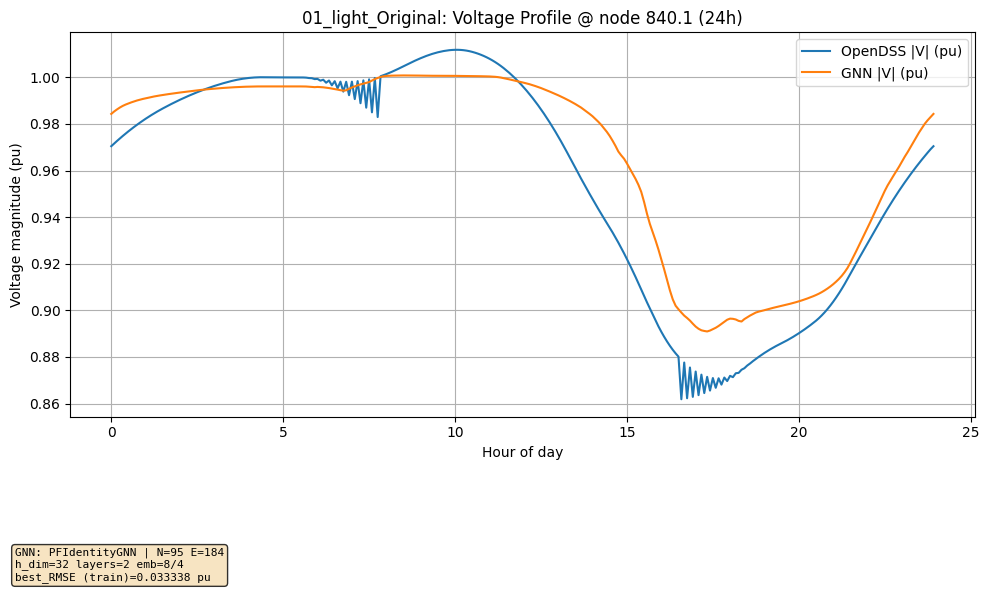

>>> 02_medium_Original (P=1415 kW, Q=835 kvar, Ppv=1000 kW)
[saved] gnn_samples_out/overlay_24h_02_medium_Original.png


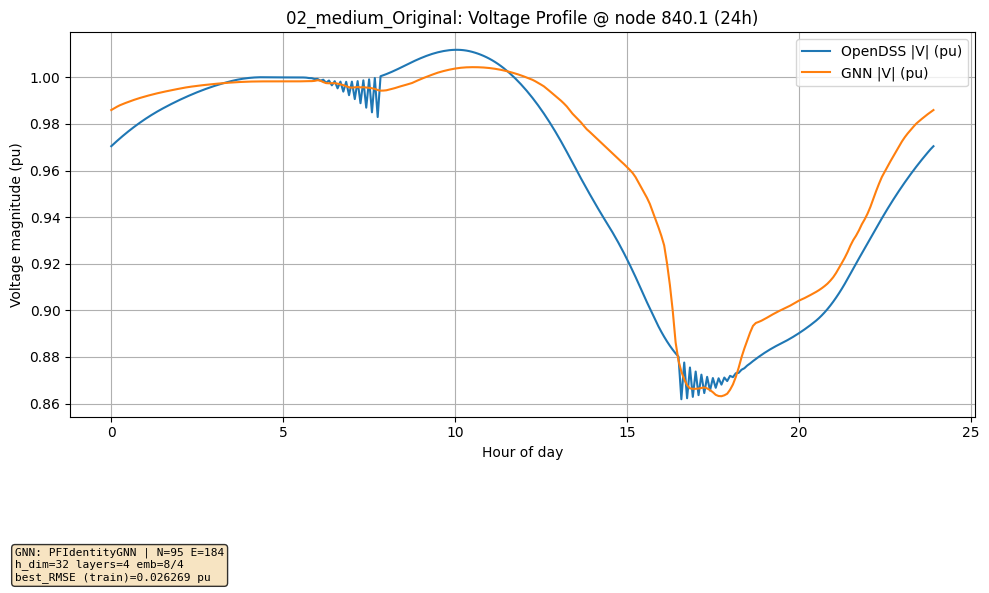

>>> 03_heavy_Original (P=1415 kW, Q=835 kvar, Ppv=1000 kW)
[saved] gnn_samples_out/overlay_24h_03_heavy_Original.png


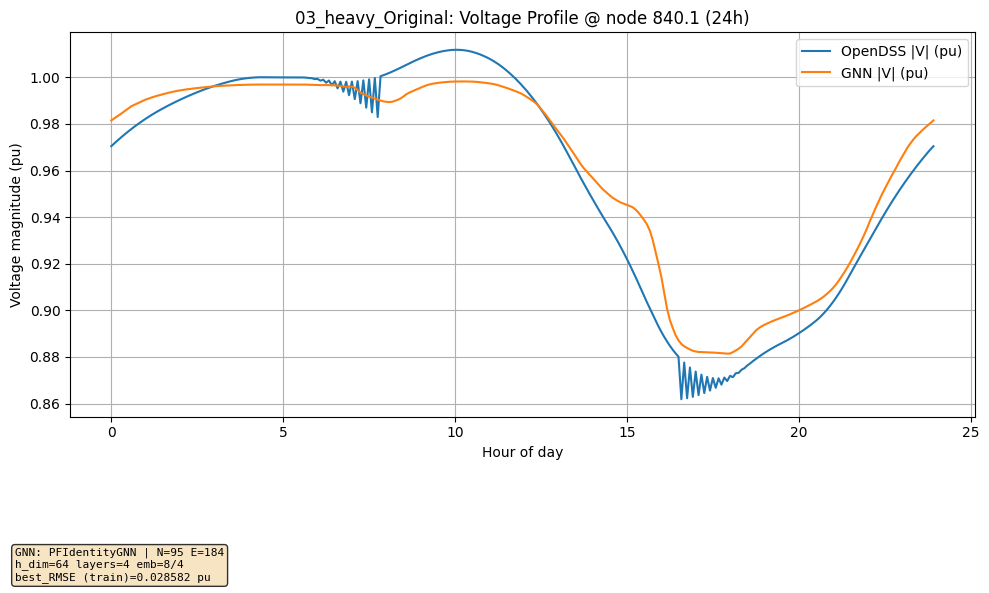

>>> 04_deep_Original (P=1415 kW, Q=835 kvar, Ppv=1000 kW)
[saved] gnn_samples_out/overlay_24h_04_deep_Original.png


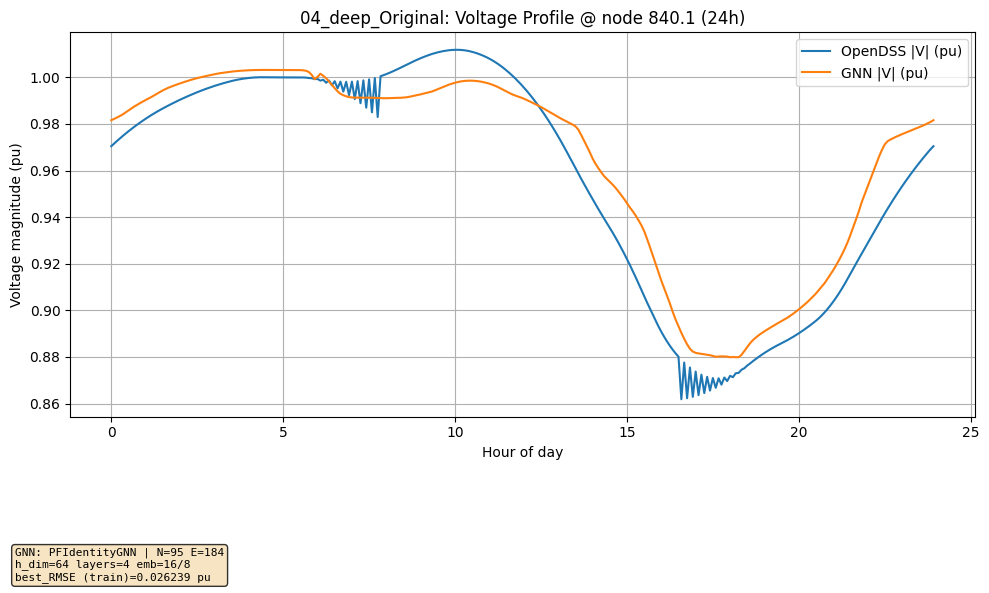

>>> 05_light_Derived (P=1415 kW, Q=835 kvar, Ppv=1000 kW)
[saved] gnn_samples_out/overlay_24h_05_light_Derived.png


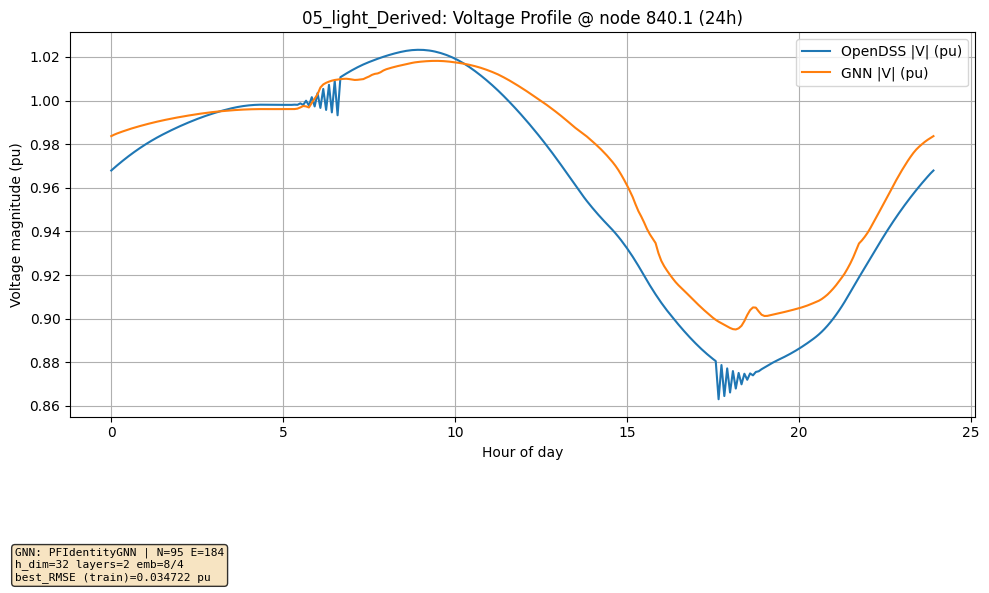

>>> 06_medium_Derived (P=1415 kW, Q=835 kvar, Ppv=1000 kW)
[saved] gnn_samples_out/overlay_24h_06_medium_Derived.png


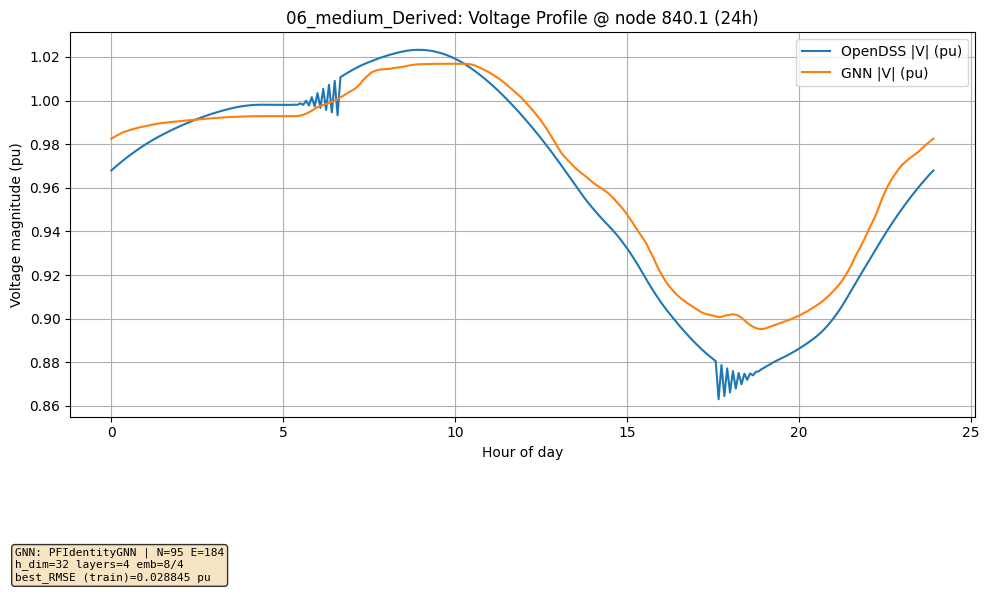

>>> 07_heavy_Derived (P=1415 kW, Q=835 kvar, Ppv=1000 kW)
[saved] gnn_samples_out/overlay_24h_07_heavy_Derived.png


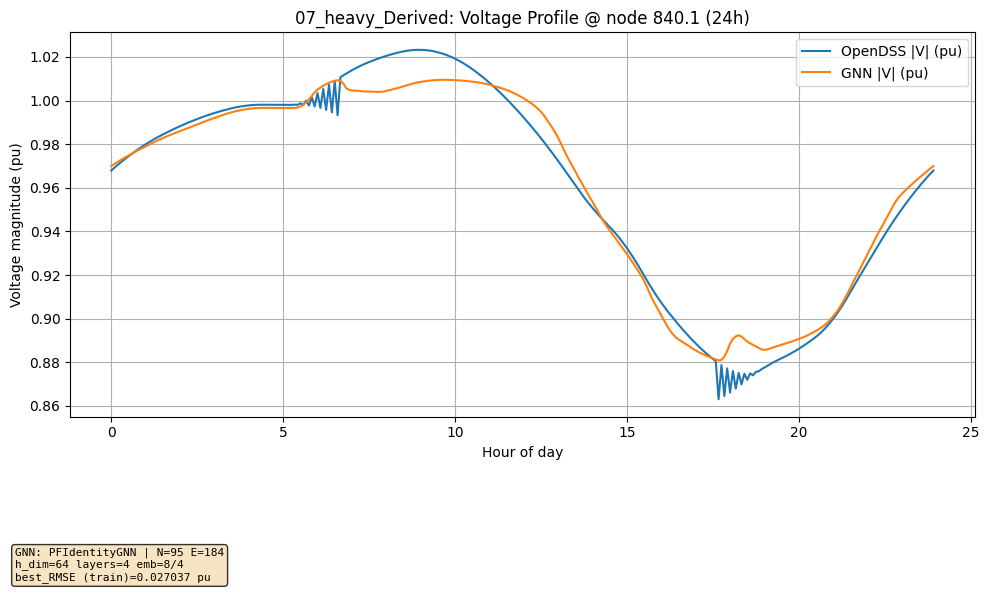

>>> 08_deep_Derived (P=1415 kW, Q=835 kvar, Ppv=1000 kW)
[saved] gnn_samples_out/overlay_24h_08_deep_Derived.png


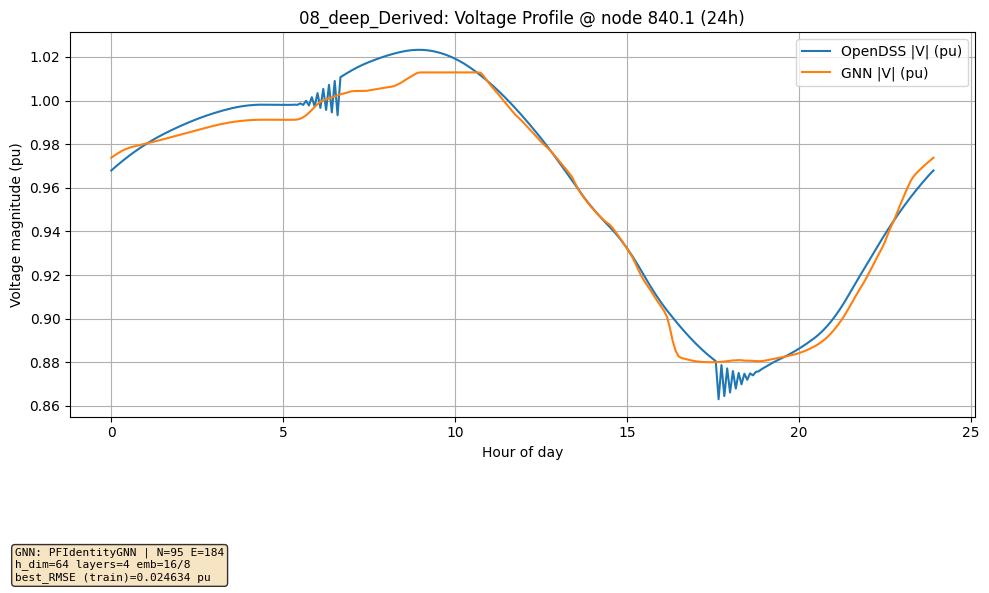

>>> 09_light_LoadType (P=1415 kW, Q=835 kvar, Ppv=1000 kW)
[saved] gnn_samples_out/overlay_24h_09_light_LoadType.png


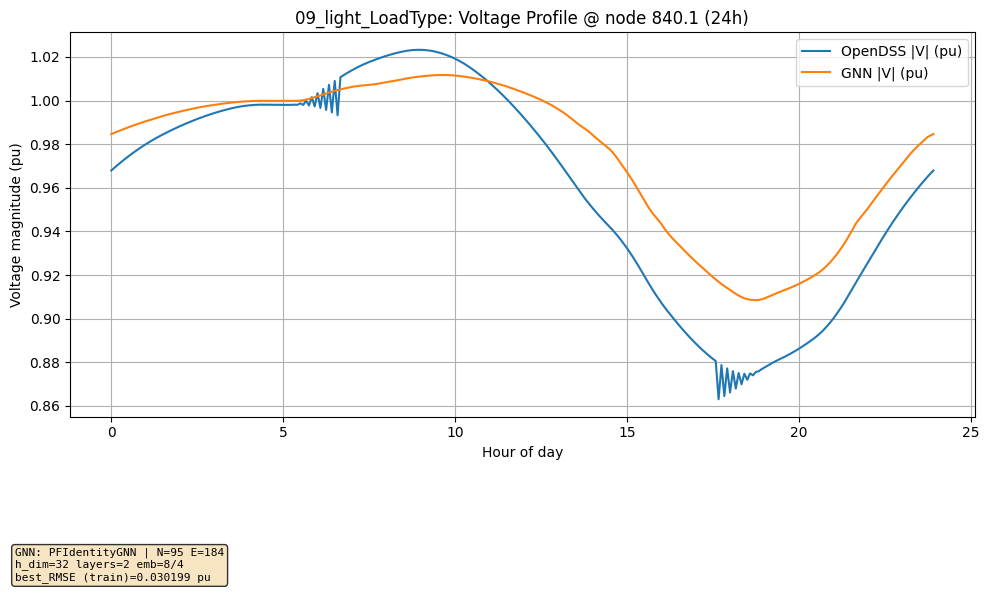

>>> 10_medium_LoadType (P=1415 kW, Q=835 kvar, Ppv=1000 kW)
[saved] gnn_samples_out/overlay_24h_10_medium_LoadType.png


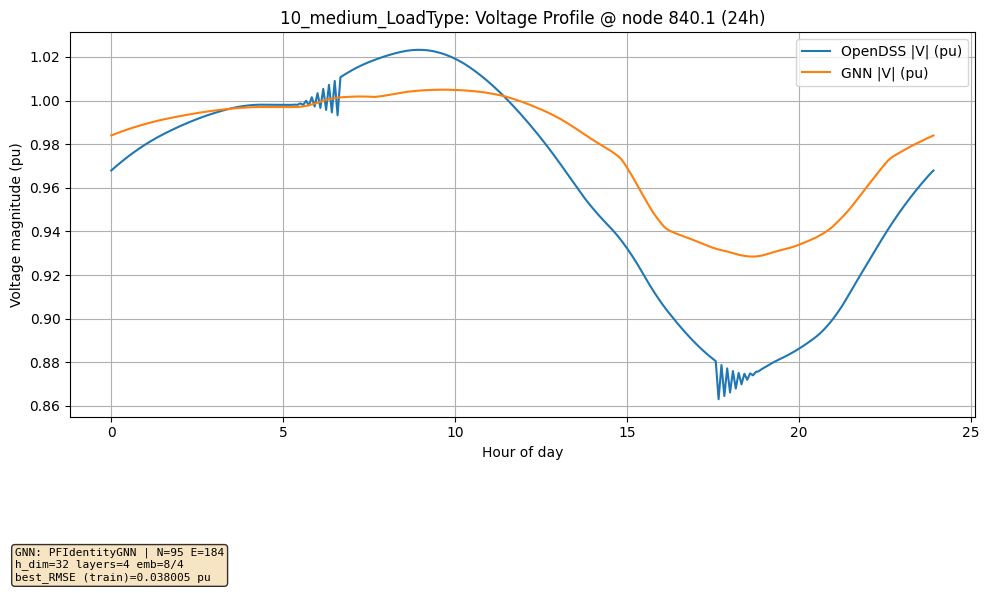

>>> 11_heavy_LoadType (P=1415 kW, Q=835 kvar, Ppv=1000 kW)
[saved] gnn_samples_out/overlay_24h_11_heavy_LoadType.png


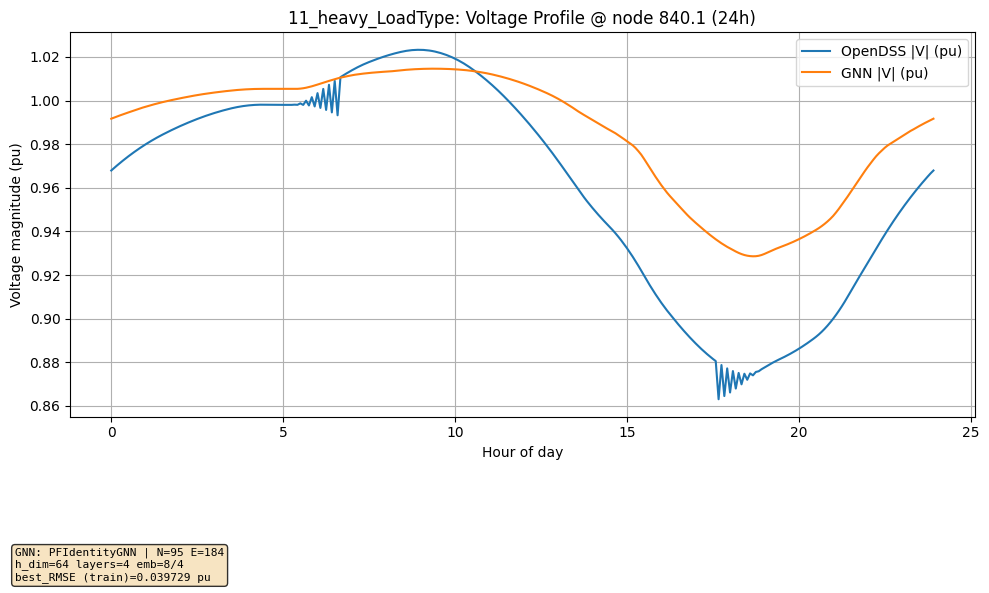

>>> 12_deep_LoadType (P=1415 kW, Q=835 kvar, Ppv=1000 kW)
[saved] gnn_samples_out/overlay_24h_12_deep_LoadType.png


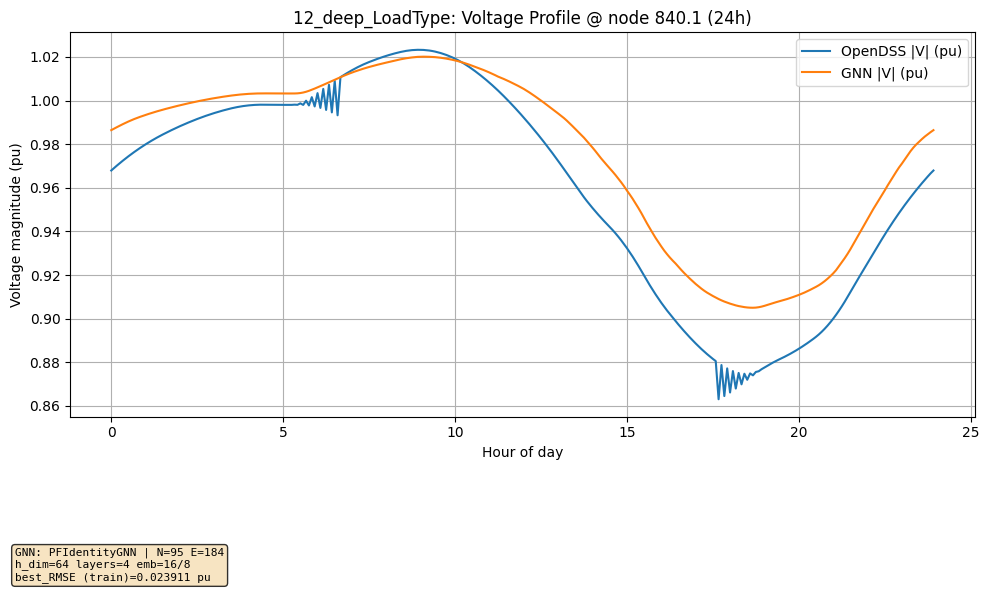


INFERENCE SPEEDS AND TIMES (24h = 288 steps per scenario)
  01_light_Original: OpenDSS total=0.047s | GNN total=1.791s | GNN mean/step=6.22ms
  02_medium_Original: OpenDSS total=0.055s | GNN total=2.422s | GNN mean/step=8.41ms
  03_heavy_Original: OpenDSS total=0.044s | GNN total=2.433s | GNN mean/step=8.45ms
  04_deep_Original: OpenDSS total=0.037s | GNN total=2.193s | GNN mean/step=7.61ms
  05_light_Derived: OpenDSS total=0.033s | GNN total=1.223s | GNN mean/step=4.25ms
  06_medium_Derived: OpenDSS total=0.033s | GNN total=1.927s | GNN mean/step=6.69ms
  07_heavy_Derived: OpenDSS total=0.047s | GNN total=1.680s | GNN mean/step=5.83ms
  08_deep_Derived: OpenDSS total=0.041s | GNN total=2.535s | GNN mean/step=8.80ms
  09_light_LoadType: OpenDSS total=0.033s | GNN total=0.591s | GNN mean/step=2.05ms
  10_medium_LoadType: OpenDSS total=0.032s | GNN total=0.655s | GNN mean/step=2.27ms
  11_heavy_LoadType: OpenDSS total=0.037s | GNN total=2.464s | GNN mean/step=8.56ms
  12_deep_LoadType: 

In [ ]:
# ============================================================
# 24h voltage profile overlay (OpenDSS vs trained GNN) — NO NOISE
#
# Flow: ONE fixed P/Q/P_pv profile (same loadshape, irradshape for all).
# 12 scenarios = 12 DIFFERENT TRAINED MODELS (from unified block: 4 configs x 3 datasets).
# For each model: run same 24h day, compare GNN vs OpenDSS (gold standard).
# Goal: see effect of architecture (hidden layers, embedding dims) on daily profile prediction.
# NOTE: Only Original (3 feat) models supported here; Derived/Load-type need different feature builders.
# (legacy) Verification that BOTH curves refer to the SAME electrical node:
#        - observed_node is validated against MASTER node list AND DSS node list
#        - bus/phase consistency checks
#        - optional extra: compare MASTER ordering vs current DSS ordering for that node
#
#   ✅ Trust/verification diagnostics printed + optionally saved:
#        - confirms node index mapping (node -> node_idx -> observed node)
#        - prints a small per-time debug sample (first few timesteps)
#        - checks convergence each step and reports any non-converged count
#        - reports feature magnitudes for the observed node (p_load, q_load, p_pv)
#
#   ✅ Timing / performance reporting:
#        - wall-clock time for DSS solve loop (per step and total)
#        - wall-clock time for GNN forward (per step and total)
#        - if device == "cuda": uses torch.cuda.Event for accurate GPU timing
#
# NOTES:
#   - “Inference time” for OpenDSS here = time spent in dss.Solution.Solve()
#   - “Inference time” for GNN here = time spent in model(Data(...)) forward pass
#   - Feature construction time is reported separately (optional, enabled below)
# ============================================================

import os
import re
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import opendssdirect as dss

import torch
from torch_geometric.data import Data

# For Derived (2 feat) and Load-type (13 feat) feature builders
import run_injection_dataset as inj
import run_loadtype_dataset as lt

CAP_Q_KVAR = {"844": 100.0, "848": 150.0}
SOURCE_BUSES = ("sourcebus", "800")

# ----------------------------
# Paths
# ----------------------------
OUT_DIR = "gnn_samples_out"
# Fixed operating condition (same for ALL models)
P_BASE, Q_BASE, PV_BASE = 1415.2, 835.2, 1000.0
# 12 model scenarios = 4 configs x 3 datasets from unified block
# Same P/Q/Ppv profile for ALL — compare architecture (hidden layers, emb dims) vs OpenDSS gold standard
# NOTE: Only Original (3 feat) supported in voltage_profile_overlay_24h; Derived/Load-type need feature builders
DIR_ORIG = "gnn_samples_out"
DIR_DERIVED = "gnn_samples_inj_full"
DIR_LOADTYPE = "gnn_samples_loadtype_full"
MODEL_SCENARIOS = [
    (os.path.join(DIR_ORIG, "checkpoints", "pf_identity_gnn_unified_light.pt"), "01_light_Original"),
    (os.path.join(DIR_ORIG, "checkpoints", "pf_identity_gnn_unified_medium.pt"), "02_medium_Original"),
    (os.path.join(DIR_ORIG, "checkpoints", "pf_identity_gnn_unified_heavy.pt"), "03_heavy_Original"),
    (os.path.join(DIR_ORIG, "checkpoints", "pf_identity_gnn_unified_deep.pt"), "04_deep_Original"),
    (os.path.join(DIR_DERIVED, "checkpoints", "pf_identity_gnn_unified_light.pt"), "05_light_Derived"),
    (os.path.join(DIR_DERIVED, "checkpoints", "pf_identity_gnn_unified_medium.pt"), "06_medium_Derived"),
    (os.path.join(DIR_DERIVED, "checkpoints", "pf_identity_gnn_unified_heavy.pt"), "07_heavy_Derived"),
    (os.path.join(DIR_DERIVED, "checkpoints", "pf_identity_gnn_unified_deep.pt"), "08_deep_Derived"),
    (os.path.join(DIR_LOADTYPE, "checkpoints", "pf_identity_gnn_unified_light.pt"), "09_light_LoadType"),
    (os.path.join(DIR_LOADTYPE, "checkpoints", "pf_identity_gnn_unified_medium.pt"), "10_medium_LoadType"),
    (os.path.join(DIR_LOADTYPE, "checkpoints", "pf_identity_gnn_unified_heavy.pt"), "11_heavy_LoadType"),
    (os.path.join(DIR_LOADTYPE, "checkpoints", "pf_identity_gnn_unified_deep.pt"), "12_deep_LoadType"),
]

NODE_INDEX_CSV = os.path.join(OUT_DIR, "gnn_node_index_master.csv")   # source of truth
EDGE_CSV       = os.path.join(OUT_DIR, "gnn_edges_phase_static.csv")  # optional sanity check

# ----------------------------
# OpenDSS daily simulation config
# ----------------------------
DSS_FILE  = "ieee34Mod1_with_loadshape.dss"
NPTS      = 288
STEP_MIN  = 5

# IMPORTANT: same shares as training/data-gen
BUS_P_SHARE = {
    "890": 0.2544, "844": 0.2442, "860": 0.0984, "834": 0.0503,
    "820": 0.0478, "848": 0.0404, "822": 0.0382, "836": 0.0345,
    "830": 0.0274, "840": 0.0266, "846": 0.0192, "802": 0.0155,
    "806": 0.0155, "858": 0.0138, "824": 0.0138, "826": 0.0113,
    "818": 0.0096, "838": 0.0079, "862": 0.0079, "810": 0.0045,
    "808": 0.0045, "832": 0.0042, "828": 0.0031, "842": 0.0025,
    "816": 0.0014, "854": 0.0011, "856": 0.0011, "864": 0.0006,
}
BUS_Q_SHARE = {
    "890": 0.2155, "844": 0.3151, "860": 0.1015, "834": 0.0431,
    "820": 0.0417, "848": 0.0512, "822": 0.0335, "836": 0.0302,
    "830": 0.0206, "840": 0.0297, "846": 0.0163, "802": 0.0139,
    "806": 0.0139, "858": 0.0120, "824": 0.0115, "826": 0.0096,
    "818": 0.0081, "838": 0.0067, "862": 0.0067, "810": 0.0038,
    "808": 0.0038, "832": 0.0034, "828": 0.0024, "842": 0.0024,
    "816": 0.0010, "854": 0.0010, "856": 0.0010, "864": 0.0005,
}
PV_SHARE = {"pv840": 0.5, "pv860": 0.5}  # must match DSS PV names


# ----------------------------
# Diagnostics / toggles
# ----------------------------
PRINT_DEBUG_FIRST_K = 5          # print first K timesteps diagnostics
TRACK_FEATURE_BUILD_TIME = True  # report feature-build time separately
SAVE_OVERLAY_IMAGES = True       # save 12 scenario plots to OUT_DIR
OVERLAY_IMAGE_DIR = OUT_DIR


# ============================================================
# DSS compile + time utilities
# ============================================================
def compile_once():
    dss.Basic.ClearAll()
    dss_path = os.path.abspath(DSS_FILE)
    if not os.path.exists(dss_path):
        raise FileNotFoundError(f"DSS file not found: {dss_path}")
    dss.Text.Command(f'compile "{dss_path}"')
    return dss_path

def setup_daily():
    dss.Text.Command("set mode=daily")
    dss.Text.Command(f"set stepsize={STEP_MIN}m")
    dss.Text.Command("set number=1")
    dss.Text.Command("set hour=0")
    dss.Text.Command("set sec=0")

def set_time_index(t):
    total_sec = int(t * STEP_MIN * 60)
    dss.Solution.Hour(total_sec // 3600)
    dss.Solution.Seconds(total_sec % 3600)

def get_all_node_voltage_pu_and_angle_dict():
    node_names = list(dss.Circuit.AllNodeNames())
    nodes_by_bus = {}
    for n in node_names:
        if "." not in n:
            continue
        bus, ph = n.split(".")
        try:
            iph = int(ph)
        except Exception:
            continue
        if iph not in (1, 2, 3):
            continue
        nodes_by_bus.setdefault(bus, set()).add(iph)

    bus_cache = {}
    for bus in nodes_by_bus.keys():
        dss.Circuit.SetActiveBus(bus)
        bus_nodes = list(dss.Bus.Nodes())

        if hasattr(dss.Bus, "puVmagAngle"):
            arr = list(dss.Bus.puVmagAngle())
            mags = arr[0::2]
            angs = arr[1::2]
            tmp = {int(nn): (float(m), float(a)) for nn, m, a in zip(bus_nodes, mags, angs)}
        else:
            arr = list(dss.Bus.VMagAngle())
            mags_v = arr[0::2]
            angs = arr[1::2]
            kvbase = float(dss.Bus.kVBase())
            vbase = kvbase * 1000.0 if kvbase > 0 else np.nan
            tmp = {int(nn): (float(mv) / vbase, float(a)) for nn, mv, a in zip(bus_nodes, mags_v, angs)}

        bus_cache[bus] = tmp

    out = {}
    for bus, phs in nodes_by_bus.items():
        for ph in phs:
            nm = f"{bus}.{ph}"
            if ph in bus_cache.get(bus, {}):
                out[nm] = bus_cache[bus][ph]
    return out


# ============================================================
# Loadshape CSV parsing
# ============================================================
def _strip_quotes(s):
    s = s.strip()
    if (s.startswith('"') and s.endswith('"')) or (s.startswith("'") and s.endswith("'")):
        return s[1:-1]
    return s

def find_loadshape_csv_in_dss(dss_path, loadshape_name):
    txt = open(dss_path, "r", encoding="utf-8", errors="ignore").read()
    pat = re.compile(rf"(?im)^\s*new\s+loadshape\.{re.escape(loadshape_name)}\b.*?$", re.MULTILINE)
    m = pat.search(txt)
    if not m:
        raise RuntimeError(f"Could not find 'New Loadshape.{loadshape_name}' in DSS file.")
    line = m.group(0)
    m2 = re.search(r"(?i)\bcsvfile\s*=\s*([^\s]+)", line)
    if not m2:
        raise RuntimeError(f"Loadshape.{loadshape_name} found, but no csvfile=... on that line:\n{line}")
    csv_token = _strip_quotes(m2.group(1))
    return csv_token, line

def resolve_csv_path(csv_token, dss_path):
    csv_token = csv_token.replace("\\", "/")
    if os.path.isabs(csv_token):
        return csv_token
    base = os.path.dirname(dss_path)
    return os.path.abspath(os.path.join(base, csv_token))

def read_profile_csv_two_col_noheader(csv_path, npts=NPTS):
    df = pd.read_csv(csv_path, header=None)
    if df.shape[1] < 2:
        raise RuntimeError(f"{csv_path} must have at least 2 columns (time,value).")
    t = pd.to_numeric(df.iloc[:, 0], errors="coerce").to_numpy()
    y = pd.to_numeric(df.iloc[:, 1], errors="coerce").to_numpy()
    ok = np.isfinite(t) & np.isfinite(y)
    y = y[ok]
    if len(y) < npts:
        raise RuntimeError(f"{csv_path} has {len(y)} valid points < required {npts}")
    return y[:npts]


# ============================================================
# Feature pipeline (same as training)
# ============================================================
def parse_bus_spec(bus_full):
    parts = bus_full.split(".")
    bus = parts[0]
    phs = []
    for p in parts[1:]:
        try:
            ip = int(p)
            if ip in (1, 2, 3):
                phs.append(ip)
        except Exception:
            pass
    return bus, sorted(list(set(phs)))

def load_device_phase_weights(load_name, bus_to_phases):
    dss.Loads.Name(load_name)
    dss.Circuit.SetActiveElement(f"Load.{load_name}")
    bus_full = dss.CktElement.BusNames()[0]
    bus, phs = parse_bus_spec(bus_full)

    phs_present = bus_to_phases.get(bus, [])
    if len(phs) == 0:
        phs = phs_present if len(phs_present) > 0 else [1, 2, 3]
    else:
        if len(phs_present) > 0:
            phs = [ph for ph in phs if ph in phs_present] or phs

    phs = sorted(list(dict.fromkeys(phs)))
    per = 1.0 / float(len(phs))
    wP = {ph: per for ph in phs}
    wQ = {ph: per for ph in phs}
    return bus, phs, wP, wQ

def build_bus_to_phases_from_master_nodes(node_names_master):
    bus_to_phases = {}
    for n in node_names_master:
        bus, phs = n.split(".")
        ph = int(phs)
        bus_to_phases.setdefault(bus, set()).add(ph)
    return {b: sorted(list(s)) for b, s in bus_to_phases.items()}

def build_load_allocation_fractions(bus_to_phases):
    loads = list(dss.Loads.AllNames())
    load_meta = {}
    contribP = {}
    contribQ = {}

    for ln in loads:
        dss.Loads.Name(ln)
        base_kw = float(dss.Loads.kW())
        base_kvar = float(dss.Loads.kvar())

        bus, phs, wP, wQ = load_device_phase_weights(ln, bus_to_phases)
        load_meta[ln] = dict(bus=bus, phs=phs, wP=wP, wQ=wQ)

        for ph in phs:
            contribP.setdefault((bus, ph), {})[ln] = contribP.get((bus, ph), {}).get(ln, 0.0) + base_kw * wP[ph]
            contribQ.setdefault((bus, ph), {})[ln] = contribQ.get((bus, ph), {}).get(ln, 0.0) + base_kvar * wQ[ph]

    dev_fracP = {}
    dev_fracQ = {}
    for key, dct in contribP.items():
        denom = sum(dct.values())
        dev_fracP[key] = {ln: (v / denom) if denom > 0 else 1.0 / len(dct) for ln, v in dct.items()}

    for key, dct in contribQ.items():
        denom = sum(dct.values())
        dev_fracQ[key] = {ln: (v / denom) if denom > 0 else 1.0 / len(dct) for ln, v in dct.items()}

    return loads, load_meta, dev_fracP, dev_fracQ

def pv_device_phase_weights(pv_name, bus_to_phases):
    dss.PVsystems.Name(pv_name)
    dss.Circuit.SetActiveElement(f"PVSystem.{pv_name}")
    bus_full = dss.CktElement.BusNames()[0]
    bus, phs = parse_bus_spec(bus_full)

    if len(phs) == 0:
        phs = bus_to_phases.get(bus, [1, 2, 3])
        if len(phs) == 0:
            phs = [1, 2, 3]
    phs = sorted(list(dict.fromkeys(phs)))
    per = 1.0 / float(len(phs))
    wP = {ph: per for ph in phs}
    wQ = {ph: per for ph in phs}
    return bus, phs, wP, wQ

def apply_snapshot_timeconditioned(
    P_load_total_kw, Q_load_total_kvar, P_pv_total_kw,
    mL_t, mPV_t,
    loads, load_meta, dev_fracP, dev_fracQ,
    bus_to_phases,
):
    P_load_t = float(P_load_total_kw) * float(mL_t)
    Q_load_t = float(Q_load_total_kvar) * float(mL_t)
    P_pv_t   = float(P_pv_total_kw) * float(mPV_t)

    P_bus = {b: float(BUS_P_SHARE.get(b, 0.0) * P_load_t) for b in bus_to_phases.keys()}
    Q_bus = {b: float(BUS_Q_SHARE.get(b, 0.0) * Q_load_t) for b in bus_to_phases.keys()}

    bus_phase_P = {}
    bus_phase_Q = {}
    for b, phs in bus_to_phases.items():
        if len(phs) == 0:
            continue
        phsP = [ph for ph in phs if (b, ph) in dev_fracP] or phs
        phsQ = [ph for ph in phs if (b, ph) in dev_fracQ] or phs
        for ph in phsP:
            bus_phase_P[(b, ph)] = P_bus.get(b, 0.0) / float(len(phsP))
        for ph in phsQ:
            bus_phase_Q[(b, ph)] = Q_bus.get(b, 0.0) / float(len(phsQ))

    devP0 = {ln: 0.0 for ln in loads}
    devQ0 = {ln: 0.0 for ln in loads}

    for (b, ph), Pph in bus_phase_P.items():
        if (b, ph) not in dev_fracP:
            continue
        for ln, frac in dev_fracP[(b, ph)].items():
            devP0[ln] += float(Pph) * float(frac)

    for (b, ph), Qph in bus_phase_Q.items():
        if (b, ph) not in dev_fracQ:
            continue
        for ln, frac in dev_fracQ[(b, ph)].items():
            devQ0[ln] += float(Qph) * float(frac)

    busphP_load = {}
    busphQ_load = {}

    for ln in loads:
        p_set = float(devP0[ln])
        q_set = float(devQ0[ln])

        dss.Loads.Name(ln)
        dss.Loads.kW(p_set)
        dss.Loads.kvar(q_set)

        meta = load_meta[ln]
        b = meta["bus"]
        for ph in meta["phs"]:
            busphP_load[(b, ph)] = busphP_load.get((b, ph), 0.0) + p_set * meta["wP"].get(ph, 0.0)
            busphQ_load[(b, ph)] = busphQ_load.get((b, ph), 0.0) + q_set * meta["wQ"].get(ph, 0.0)

    busphP_pv = {}
    busphQ_pv = {}
    pv_names = list(dss.PVsystems.AllNames())

    for pv in pv_names:
        base_pmpp_t = float(PV_SHARE.get(pv, 0.0) * P_pv_t)
        pmpp_set = float(base_pmpp_t)

        dss.PVsystems.Name(pv)
        dss.PVsystems.Pmpp(pmpp_set)

        b, phs, wP, wQ = pv_device_phase_weights(pv, bus_to_phases)
        for ph in phs:
            busphP_pv[(b, ph)] = busphP_pv.get((b, ph), 0.0) + pmpp_set * wP[ph]
            busphQ_pv[(b, ph)] = busphQ_pv.get((b, ph), 0.0) + 0.0

    return busphP_load, busphQ_load, busphP_pv, busphQ_pv


# ============================================================
# Model loader
# ============================================================
def load_model_for_inference(path, device=None):
    if device is None:
        device = "cuda" if torch.cuda.is_available() else "cpu"

    ckpt = torch.load(path, map_location="cpu")
    cfg = ckpt["config"]

    import torch.nn as nn
    from torch_geometric.nn import MessagePassing

    HIDDEN = int(cfg["h_dim"])
    NUM_LAYERS = int(cfg["num_layers"])
    NODE_EMB_DIM = int(cfg["node_emb_dim"])
    EDGE_EMB_DIM = int(cfg["edge_emb_dim"])
    DROPOUT = float(cfg.get("dropout", 0.1))

    class MLP(nn.Module):
        def __init__(self, in_dim, out_dim, hidden=HIDDEN, dropout=DROPOUT):
            super().__init__()
            self.net = nn.Sequential(
                nn.Linear(in_dim, hidden),
                nn.ReLU(),
                nn.Dropout(dropout),
                nn.Linear(hidden, hidden),
                nn.ReLU(),
                nn.Dropout(dropout),
                nn.Linear(hidden, out_dim),
            )
        def forward(self, x):
            return self.net(x)

    class EdgeIdentityMP(MessagePassing):
        def __init__(self, h_dim, edge_feat_dim, edge_emb_dim):
            super().__init__(aggr="add")
            self.psi = MLP(in_dim=h_dim + edge_feat_dim + edge_emb_dim, out_dim=h_dim)
        def forward(self, h, edge_index, edge_attr, edge_emb):
            return self.propagate(edge_index=edge_index, h=h, edge_attr=edge_attr, edge_emb=edge_emb)
        def message(self, h_j, edge_attr, edge_emb):
            return self.psi(torch.cat([h_j, edge_attr, edge_emb], dim=-1))

    class PFIdentityGNN(nn.Module):
        def __init__(self, num_nodes, num_edges,
                     node_in_dim=3, edge_in_dim=2, out_dim=2,
                     node_emb_dim=NODE_EMB_DIM, edge_emb_dim=EDGE_EMB_DIM,
                     h_dim=HIDDEN, num_layers=NUM_LAYERS):
            super().__init__()
            self.node_emb = nn.Embedding(int(num_nodes), node_emb_dim)
            self.edge_emb = nn.Embedding(int(num_edges), edge_emb_dim)
            self.phi0 = MLP(in_dim=node_in_dim + node_emb_dim, out_dim=h_dim)
            self.mps = nn.ModuleList([
                EdgeIdentityMP(h_dim=h_dim, edge_feat_dim=edge_in_dim, edge_emb_dim=edge_emb_dim)
                for _ in range(num_layers)
            ])
            self.updates = nn.ModuleList([
                MLP(in_dim=h_dim + h_dim + node_emb_dim, out_dim=h_dim)
                for _ in range(num_layers)
            ])
            self.readout = MLP(in_dim=h_dim, out_dim=out_dim)

        def forward(self, data: Data) -> torch.Tensor:
            x = data.x
            edge_index = data.edge_index
            edge_attr = data.edge_attr
            edge_id = data.edge_id

            node_ids = torch.arange(data.num_nodes, device=x.device)
            z = self.node_emb(node_ids)
            h = self.phi0(torch.cat([x, z], dim=-1))
            r = self.edge_emb(edge_id)

            for mp, upd in zip(self.mps, self.updates):
                m = mp(h=h, edge_index=edge_index, edge_attr=edge_attr, edge_emb=r)
                h = upd(torch.cat([h, m, z], dim=-1))

            return self.readout(h)

    mdl = PFIdentityGNN(
        num_nodes=int(cfg["N"]),
        num_edges=int(cfg["E"]),
        node_in_dim=int(cfg["node_in_dim"]),
        edge_in_dim=int(cfg["edge_in_dim"]),
        out_dim=int(cfg["out_dim"]),
        node_emb_dim=int(cfg["node_emb_dim"]),
        edge_emb_dim=int(cfg["edge_emb_dim"]),
        h_dim=int(cfg["h_dim"]),
        num_layers=int(cfg["num_layers"]),
    ).to(device)

    mdl.load_state_dict(ckpt["state_dict"])
    mdl.eval()

    best_rmse = ckpt.get("best_score") or ckpt.get("rmse_test")
    if best_rmse is not None:
        best_rmse = float(best_rmse)
    static = dict(
        N=int(cfg["N"]),
        E=int(cfg["E"]),
        edge_index=ckpt["edge_index"].to(device),
        edge_attr=ckpt["edge_attr"].to(device),
        edge_id=ckpt["edge_id"].to(device),
        config=cfg,
        best_rmse=best_rmse,
    )
    return mdl, static


# ============================================================
# Build node features in MASTER ordering
# ============================================================
def build_gnn_x_master(node_names_master, busphP_load, busphQ_load, busphP_pv):
    X = np.zeros((len(node_names_master), 3), dtype=np.float32)
    for i, n in enumerate(node_names_master):
        bus, phs = n.split(".")
        ph = int(phs)
        X[i, 0] = float(busphP_load.get((bus, ph), 0.0))
        X[i, 1] = float(busphQ_load.get((bus, ph), 0.0))
        X[i, 2] = float(busphP_pv.get((bus, ph), 0.0))
    return X


def build_gnn_x_derived(node_names_master, busphP_load, busphQ_load, busphP_pv, P_grid, Q_grid):
    """Derived (2 feat): p_inj, q_inj. Source bus gets P_grid/3, Q_grid/3; others: p_inj=p_pv-p_load, q_inj=-q_load+cap."""
    X = np.zeros((len(node_names_master), 2), dtype=np.float32)
    P_grid_per_ph = float(P_grid) / 3.0
    Q_grid_per_ph = float(Q_grid) / 3.0
    for i, n in enumerate(node_names_master):
        bus, phs = n.split(".")
        ph = int(phs)
        p_load = float(busphP_load.get((bus, ph), 0.0))
        q_load = float(busphQ_load.get((bus, ph), 0.0))
        p_pv = float(busphP_pv.get((bus, ph), 0.0))
        if bus in SOURCE_BUSES:
            X[i, 0] = P_grid_per_ph
            X[i, 1] = Q_grid_per_ph
        else:
            X[i, 0] = p_pv - p_load
            X[i, 1] = -q_load + float(CAP_Q_KVAR.get(bus, 0.0))
    return X


def build_gnn_x_loadtype(node_names_master, busph_per_type, busphP_pv, node_to_electrical_dist,
                         p_sys_balance, q_sys_balance):
    """Load-type (13 feat): electrical_distance, m1_p, m1_q, m2_p, m2_q, m4_p, m4_q, m5_p, m5_q, q_cap, p_pv, p_sys, q_sys."""
    X = np.zeros((len(node_names_master), 13), dtype=np.float32)
    for i, n in enumerate(node_names_master):
        bus, phs = n.split(".")
        ph = int(phs)
        m1_p = float(busph_per_type[1][0].get((bus, ph), 0.0))
        m1_q = float(busph_per_type[1][1].get((bus, ph), 0.0))
        m2_p = float(busph_per_type[2][0].get((bus, ph), 0.0))
        m2_q = float(busph_per_type[2][1].get((bus, ph), 0.0))
        m4_p = float(busph_per_type[4][0].get((bus, ph), 0.0))
        m4_q = float(busph_per_type[4][1].get((bus, ph), 0.0))
        m5_p = float(busph_per_type[5][0].get((bus, ph), 0.0))
        m5_q = float(busph_per_type[5][1].get((bus, ph), 0.0))
        q_cap = float(CAP_Q_KVAR.get(bus, 0.0))
        p_pv = float(busphP_pv.get((bus, ph), 0.0))
        X[i, 0] = float(node_to_electrical_dist.get(n, 0.0))
        X[i, 1], X[i, 2] = m1_p, m1_q
        X[i, 3], X[i, 4] = m2_p, m2_q
        X[i, 5], X[i, 6] = m4_p, m4_q
        X[i, 7], X[i, 8] = m5_p, m5_q
        X[i, 9] = q_cap
        X[i, 10] = p_pv
        X[i, 11] = p_sys_balance
        X[i, 12] = q_sys_balance
    return X


# ============================================================
# Timing helpers
# ============================================================
def _torch_gpu_timer_available(device: str) -> bool:
    return (str(device).startswith("cuda") and torch.cuda.is_available())

def _sync_if_cuda(device: str):
    if _torch_gpu_timer_available(device):
        torch.cuda.synchronize()


# ============================================================
# Main overlay with verification + timing
# ============================================================
@torch.no_grad()
def voltage_profile_overlay_24h(
    P_load_total_kw,
    Q_load_total_kvar,
    P_pv_total_kw,
    observed_node,              # e.g. "840.1"
    ckpt_path=None,            # required: path to checkpoint (no default)
    device=None,
    loadshape_name="5minDayShape",
    irradshape_name="IrradShape",
    scenario_name=None,         # e.g. "scenario1" for image naming
    verbose=True,               # False to suppress per-scenario prints when batching
):
    if ckpt_path is None:
        raise ValueError("ckpt_path is required")
    if device is None:
        device = "cuda" if torch.cuda.is_available() else "cpu"

    # ---- 1) load model + static graph
    model, static = load_model_for_inference(ckpt_path, device=device)
    cfg = static["config"]
    node_in_dim = int(cfg["node_in_dim"])
    if verbose:
        print("========================================")
        print("GNN MODEL DESCRIPTION (from checkpoint)")
        print("========================================")
        print(f"  Architecture: PFIdentityGNN (MessagePassing + MLP readout)")
        print(f"  num_nodes (N): {cfg['N']}")
        print(f"  num_edges (E): {cfg['E']}")
        print(f"  node_in_dim: {cfg['node_in_dim']}")
        print(f"  edge_in_dim: {cfg['edge_in_dim']}")
        print(f"  out_dim: {cfg['out_dim']}")
        print(f"  h_dim (hidden): {cfg['h_dim']}")
        print(f"  num_layers: {cfg['num_layers']}")
        print(f"  node_emb_dim: {cfg['node_emb_dim']}")
        print(f"  edge_emb_dim: {cfg['edge_emb_dim']}")
        print(f"  dropout: {cfg.get('dropout', 0.1)}")
        best_rmse = static.get("best_rmse")
        if best_rmse is not None:
            print(f"  best_RMSE (training): {best_rmse:.6f} pu")
        print("========================================\n")
    edge_index = static["edge_index"]
    edge_attr  = static["edge_attr"]
    edge_id    = static["edge_id"]
    N_expected = static["N"]

    # ---- 2) load MASTER node ordering (training ordering)
    if not os.path.exists(NODE_INDEX_CSV):
        raise FileNotFoundError(
            f"Missing {NODE_INDEX_CSV}. This must be produced by dataset generation."
        )
    master_df = pd.read_csv(NODE_INDEX_CSV)
    master_df["node_idx"] = pd.to_numeric(master_df["node_idx"], errors="raise").astype(int)
    master_df = master_df.sort_values("node_idx").reset_index(drop=True)
    node_names_master = master_df["node"].astype(str).tolist()

    if len(node_names_master) != N_expected:
        raise RuntimeError(
            f"MASTER node count {len(node_names_master)} != model expects {N_expected}."
        )

    # ---- 3) observed node verification (MASTER + formatting)
    if observed_node not in set(node_names_master):
        raise RuntimeError(
            f"observed_node='{observed_node}' not found in MASTER node list.\n"
            f"Example master nodes: {node_names_master[:12]}"
        )
    if "." not in observed_node:
        raise RuntimeError("observed_node must look like 'bus.ph' (e.g., '840.1').")

    obs_bus, obs_phs = observed_node.split(".")
    obs_ph = int(obs_phs)

    node_to_idx = {n: i for i, n in enumerate(node_names_master)}
    obs_idx = node_to_idx[observed_node]

    # ---- 4) compile DSS + verify DSS also contains the node
    # Use inj.compile_once for Derived/Load-type (matches training data gen; includes voltage bases)
    if node_in_dim in (2, 13):
        dss_path = inj.compile_once()
        inj.setup_daily()
    else:
        dss_path = compile_once()
        setup_daily()

    # DSS node list existence check (same bus, same phase)
    dss_nodes_now = set(n for n in dss.Circuit.AllNodeNames() if "." in n)
    if observed_node not in dss_nodes_now:
        # If DSS gives extra stuff, show closest info
        dss_bus_nodes = sorted([n for n in dss_nodes_now if n.startswith(f"{obs_bus}.")])
        raise RuntimeError(
            f"observed_node='{observed_node}' exists in MASTER but NOT in current DSS AllNodeNames().\n"
            f"DSS nodes at bus {obs_bus}: {dss_bus_nodes[:10]}"
        )

    # ---- 5) read profiles (time-conditioning)
    csvL_token, _ = find_loadshape_csv_in_dss(dss_path, loadshape_name)
    csvPV_token, _ = find_loadshape_csv_in_dss(dss_path, irradshape_name)
    mL  = read_profile_csv_two_col_noheader(resolve_csv_path(csvL_token, dss_path),  npts=NPTS)
    mPV = read_profile_csv_two_col_noheader(resolve_csv_path(csvPV_token, dss_path), npts=NPTS)

    # ---- 6) Build bus_to_phases; precompute allocation (Original vs Derived/Load-type)
    bus_to_phases = build_bus_to_phases_from_master_nodes(node_names_master)
    if node_in_dim == 3:
        loads, load_meta, dev_fracP, dev_fracQ = build_load_allocation_fractions(bus_to_phases)
        inj_maps = None
        node_to_electrical_dist = None
    elif node_in_dim in (2, 13):
        loads_dss, dev_to_dss_load, dev_to_busph_load = inj.build_load_device_maps(bus_to_phases)
        pv_dss, pv_to_dss, pv_to_busph = inj.build_pv_device_maps()
        inj_maps = (loads_dss, dev_to_dss_load, dev_to_busph_load, pv_dss, pv_to_dss, pv_to_busph)
        rng_det = np.random.default_rng(0)
        if node_in_dim == 13:
            edge_csv_lt = os.path.join(DIR_LOADTYPE, "gnn_edges_phase_static.csv")
            node_to_electrical_dist = lt._compute_electrical_distance_from_source(node_names_master, edge_csv_lt)
        else:
            node_to_electrical_dist = None
        loads, load_meta, dev_fracP, dev_fracQ = None, None, None, None
    else:
        raise ValueError(f"Unsupported node_in_dim={node_in_dim}; expected 2, 3, or 13")

    # ---- 7) Trust / verification header
    if verbose:
        print("========================================")
        print("VERIFY NODE MAPPING" + (f" [{scenario_name}]" if scenario_name else ""))
        print(f"observed_node      : {observed_node}")
        print(f"  -> bus           : {obs_bus}")
        print(f"  -> phase         : {obs_ph}")
        print(f"MASTER node_idx    : {obs_idx} (0-based)")
        print(f"MASTER node at idx : {node_names_master[obs_idx]}")
        print(f"DSS contains node  : {observed_node in dss_nodes_now}")
        print("========================================\n")

    # ---- 8) timing accumulators
    dss_solve_times = []
    gnn_times = []
    feat_times = []

    nonconv = 0

    t_hours, vmag_dss, vmag_gnn = [], [], []

    # GPU timing events if CUDA
    use_cuda_timer = _torch_gpu_timer_available(device)

    for t in range(NPTS):
        set_time_index(t)

        # (A) feature + setpoint application timing
        if TRACK_FEATURE_BUILD_TIME:
            t0_feat = time.perf_counter()

        if node_in_dim == 3:
            busphP_load, busphQ_load, busphP_pv, busphQ_pv = apply_snapshot_timeconditioned(
                P_load_total_kw=P_load_total_kw,
                Q_load_total_kvar=Q_load_total_kvar,
                P_pv_total_kw=P_pv_total_kw,
                mL_t=float(mL[t]),
                mPV_t=float(mPV[t]),
                loads=loads,
                load_meta=load_meta,
                dev_fracP=dev_fracP,
                dev_fracQ=dev_fracQ,
                bus_to_phases=bus_to_phases,
            )
            busph_per_type = None
        elif node_in_dim == 2:
            ld, dev_dss, dev_busph, pvd, pv_to, pv_busph = inj_maps
            _, busphP_load, busphQ_load, busphP_pv, busphQ_pv = inj.apply_snapshot_timeconditioned(
                P_load_total_kw=P_load_total_kw,
                Q_load_total_kvar=Q_load_total_kvar,
                P_pv_total_kw=P_pv_total_kw,
                mL_t=float(mL[t]),
                mPV_t=float(mPV[t]),
                loads_dss=ld,
                dev_to_dss_load=dev_dss,
                dev_to_busph_load=dev_busph,
                pv_dss=pvd,
                pv_to_dss=pv_to,
                pv_to_busph=pv_busph,
                sigma_load=0.0,
                sigma_pv=0.0,
                rng=rng_det,
            )
            busph_per_type = None
        else:  # node_in_dim == 13
            ld, dev_dss, dev_busph, pvd, pv_to, pv_busph = inj_maps
            _, busphP_load, busphQ_load, busphP_pv, busphQ_pv, busph_per_type = lt._apply_snapshot_with_per_type(
                P_load_total_kw=P_load_total_kw,
                Q_load_total_kvar=Q_load_total_kvar,
                P_pv_total_kw=P_pv_total_kw,
                mL_t=float(mL[t]),
                mPV_t=float(mPV[t]),
                loads_dss=ld,
                dev_to_dss_load=dev_dss,
                dev_to_busph_load=dev_busph,
                pv_dss=pvd,
                pv_to_dss=pv_to,
                pv_to_busph=pv_busph,
                sigma_load=0.0,
                sigma_pv=0.0,
                rng=rng_det,
            )

        if TRACK_FEATURE_BUILD_TIME:
            feat_times.append(time.perf_counter() - t0_feat)

        # (B) OpenDSS solve timing
        t0_dss = time.perf_counter()
        dss.Solution.Solve()
        dss_solve_times.append(time.perf_counter() - t0_dss)

        if not dss.Solution.Converged():
            nonconv += 1
            # still record NaNs so lengths match, but you can also choose to skip
            t_hours.append(t * STEP_MIN / 60.0)
            vmag_dss.append(np.nan)
            vmag_gnn.append(np.nan)
            gnn_times.append(np.nan)
            continue

        # DSS voltage at observed node (this is DEFINITELY for observed_node string)
        vdict = get_all_node_voltage_pu_and_angle_dict()
        vm_dss, _ = vdict[observed_node]

        # (C) Build X in MASTER order (training features) — branch by node_in_dim
        if node_in_dim == 3:
            X = build_gnn_x_master(node_names_master, busphP_load, busphQ_load, busphP_pv)
        elif node_in_dim == 2:
            pwr = dss.Circuit.TotalPower()
            P_grid = -float(pwr[0])
            Q_grid = -float(pwr[1])
            X = build_gnn_x_derived(node_names_master, busphP_load, busphQ_load, busphP_pv, P_grid, Q_grid)
        else:  # node_in_dim == 13
            sum_p_load = float(sum(busphP_load.values()))
            sum_q_load = float(sum(busphQ_load.values()))
            sum_p_pv = float(sum(busphP_pv.values()))
            sum_q_cap = float(sum(CAP_Q_KVAR.values()))
            p_sys_balance = sum_p_load - sum_p_pv
            q_sys_balance = sum_q_load - sum_q_cap
            X = build_gnn_x_loadtype(
                node_names_master, busph_per_type, busphP_pv,
                node_to_electrical_dist, p_sys_balance, q_sys_balance,
            )
        x_t = torch.tensor(X, dtype=torch.float32, device=device)

        g = Data(
            x=x_t,
            edge_index=edge_index,
            edge_attr=edge_attr,
            edge_id=edge_id,
            num_nodes=N_expected
        )

        # (D) GNN timing
        if use_cuda_timer:
            _sync_if_cuda(device)
            start = torch.cuda.Event(enable_timing=True)
            end   = torch.cuda.Event(enable_timing=True)
            start.record()
            yhat = model(g)
            end.record()
            _sync_if_cuda(device)
            gnn_ms = float(start.elapsed_time(end))  # milliseconds
            gnn_times.append(gnn_ms / 1000.0)        # store seconds
        else:
            t0_gnn = time.perf_counter()
            yhat = model(g)
            gnn_times.append(time.perf_counter() - t0_gnn)

        vm_gnn = float(yhat[obs_idx, 0].item())

        # log
        t_hours.append(t * STEP_MIN / 60.0)
        vmag_dss.append(float(vm_dss))
        vmag_gnn.append(vm_gnn)

        # ---- quick trust debug (first few steps)
        if verbose and t < PRINT_DEBUG_FIRST_K:
            # show observed-node features (what the GNN sees for that node)
            x_obs = X[obs_idx, :]
            print(f"[t={t:03d} | hr={t_hours[-1]:5.2f}] "
                  f"node={observed_node} idx={obs_idx} "
                  f"x=[Pld={x_obs[0]:.2f}, Qld={x_obs[1]:.2f}, Ppv={x_obs[2]:.2f}]  "
                  f"DSS|V|={vm_dss:.4f}  GNN|V|={vm_gnn:.4f}")

    # ---- 9) timing summary
    dss_total = float(np.nansum(dss_solve_times))
    gnn_total = float(np.nansum(gnn_times))
    feat_total = float(np.nansum(feat_times)) if TRACK_FEATURE_BUILD_TIME else 0.0

    def _summ(name, arr):
        arr = np.asarray(arr, dtype=float)
        arr = arr[np.isfinite(arr)]
        if arr.size == 0:
            return f"{name}: no valid samples"
        return (f"{name}: total={arr.sum():.4f}s | mean/step={arr.mean():.6f}s | "
                f"p50={np.percentile(arr,50):.6f}s | p95={np.percentile(arr,95):.6f}s | "
                f"max={arr.max():.6f}s | n={arr.size}")

    if verbose:
        print("\n========================================")
        print("TIMING REPORT (24h = 288 steps)")
        print(_summ("OpenDSS Solve", dss_solve_times))
        print(_summ("GNN Forward ", gnn_times))
        if TRACK_FEATURE_BUILD_TIME:
            print(_summ("Feature+Setpoints", feat_times))
        print(f"Non-converged steps: {nonconv} / {NPTS}")
        print("========================================\n")

    # ---- 10) plot overlay (with GNN description on image)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(t_hours, vmag_dss, label="OpenDSS |V| (pu)")
    ax.plot(t_hours, vmag_gnn, label="GNN |V| (pu)")
    ax.set_xlabel("Hour of day")
    ax.set_ylabel("Voltage magnitude (pu)")
    title = f"Voltage Profile @ node {observed_node} (24h)"
    if scenario_name:
        title = f"{scenario_name}: {title}"
    ax.set_title(title)
    ax.grid(True)
    ax.legend()
    # GNN description text on image
    best_rmse = static.get("best_rmse")
    gnn_desc_lines = [
        f"GNN: PFIdentityGNN | N={cfg['N']} E={cfg['E']}",
        f"h_dim={cfg['h_dim']} layers={cfg['num_layers']} emb={cfg['node_emb_dim']}/{cfg['edge_emb_dim']}",
    ]
    if best_rmse is not None:
        gnn_desc_lines.append(f"best_RMSE (train)={best_rmse:.6f} pu")
    gnn_desc_str = "\n".join(gnn_desc_lines)
    fig.text(0.02, 0.02, gnn_desc_str, fontsize=8, family="monospace",
             verticalalignment="bottom", bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.8))
    plt.tight_layout(rect=[0, 0.2, 1, 1])  # leave bottom space for GNN description
    if SAVE_OVERLAY_IMAGES and scenario_name:
        os.makedirs(OVERLAY_IMAGE_DIR, exist_ok=True)
        img_path = os.path.join(OVERLAY_IMAGE_DIR, f"overlay_24h_{scenario_name}.png")
        fig.savefig(img_path, dpi=150, bbox_inches="tight")
        print(f"[saved] {img_path}")
    plt.show()

    # ---- 11) return dataframe (plus timings)
    out = pd.DataFrame({
        "hour": t_hours,
        "vmag_dss_pu": vmag_dss,
        "vmag_gnn_pu": vmag_gnn,
        "t_dss_solve_s": dss_solve_times,
        "t_gnn_forward_s": gnn_times,
    })
    if TRACK_FEATURE_BUILD_TIME:
        # feat_times length equals NPTS; safe to attach
        out["t_feature_build_s"] = feat_times

    return out


# ============================================================
# 12 scenarios: 4 load levels x 3 PV levels (no noise)
# Base: P_load=1415.2 kW, Q_load=835.2 kvar, P_pv=1000 kW
# ============================================================
P_BASE, Q_BASE, PV_BASE = 1415.2, 835.2, 1000.0
# Same P/Q/Ppv profile for ALL models — compare architecture effect on daily voltage prediction
# All 3 datasets supported: Original (3 feat), Derived (2 feat), Load-type (13 feat).
results = {}
for i, (ckpt_path, name) in enumerate(MODEL_SCENARIOS):
    if not os.path.exists(ckpt_path):
        print(f"SKIP {name}: checkpoint not found: {ckpt_path}")
        continue
    print(f">>> {name} (P={P_BASE:.0f} kW, Q={Q_BASE:.0f} kvar, Ppv={PV_BASE:.0f} kW)")
    try:
        df_profile = voltage_profile_overlay_24h(
            P_load_total_kw=P_BASE,
            Q_load_total_kvar=Q_BASE,
            P_pv_total_kw=PV_BASE,
            observed_node="840.1",
            ckpt_path=ckpt_path,
            device="cpu",
            scenario_name=name,
            verbose=(i == 0),  # full GNN + verify print only for first scenario
        )
        results[name] = df_profile
    except Exception as e:
        print(f"SKIP {name}: {e}")

# ---- Inference speeds and times (printed, not image)
print("\n" + "=" * 70)
print("INFERENCE SPEEDS AND TIMES (24h = 288 steps per scenario)")
print("=" * 70)
for name, df in results.items():
    dss_s = df["t_dss_solve_s"].sum()
    gnn_s = df["t_gnn_forward_s"].sum()
    gnn_mean_ms = df["t_gnn_forward_s"].mean() * 1000
    print(f"  {name}: OpenDSS total={dss_s:.3f}s | GNN total={gnn_s:.3f}s | GNN mean/step={gnn_mean_ms:.2f}ms")
print("=" * 70)
